In [511]:
%load_ext autoreload
%autoreload 2
import numpy as np
from scipy.optimize import curve_fit

from typing import Literal, Union

from matplotlib.colors import LogNorm
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.gridspec as gridspec

from qs_mps.utils import create_sequential_colors
from qs_mps.applications.Z2.utils import find_closest_value, weighted_average
from qs_mps.applications.Z2.relevant_observables import (
                                                         n_order_kink_mass_varying_g,
                                                         n_order_kink_mass_varying_R,
                                                         get_fit_params,  
                                                         string_width_chis,
                                                         string_width_varying_g,
                                                         string_width_varying_R,
                                                         entropy,
                                                         time_entropy,
                                                         time_ev_string_width_occupation,
                                                         static_potential_chis, 
                                                         fitting,
                                                         fit_params_sys
                                                        )

plt.rcParams.update({
    'font.family': 'serif', 
    'font.size': 14,
    'text.usetex': True,
    'legend.handlelength': 1.5,
    'legend.handletextpad': 0.5,
    'legend.title_fontsize': 12,
    'legend.fontsize': 10
})

model = "Z2_dual"
bc = "pbc"
cx = None
cy = None
sector = "2_particle(s)_sector"
Ls = [30]
L = 30

# take the path and precision to save files
# if we want to save the tensors we save them locally because they occupy a lot of memory
path = "add_your_path_to_save_data"
path = "/Users/fradm/Desktop/vanilla_data"
path = "C:/Users/HP/Desktop/vanilla_data"
path = "C:/Users/HP/Desktop/projects/1_Z2"
path = "/Users/fradm/Desktop/projects/1_Z2"
path_figures = "add_you_path_to_save_figures"
path_figures = "/Users/fradm/Google Drive/My Drive/projects/1_Z2"
# path_figures = "D:/code/projects/1_Z2"

colors = ["yellowgreen", "darkcyan", "firebrick", "darkorchid"]
colors = ["#60A7F3","#9E76AB","#DC4563"]
colors = ["#4688CE","#916799","#DC4563"]
colors = ["#4688CE","#9B4DB7","#DC4563"]
# colors = ["#FC4778","#BB4BA2","#7A4ECB","#3952F5"]


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Potential

In [607]:
def plot_gamma(gs,Rs,l,chis,h_i,h_f,npoints,path,color,fit=3,param=1):
    gammas, gammas_err = get_fit_params(gs,Rs,l,Ls,chis,bc,sector,h_i,h_f,npoints,path, fit=fit, param=param)
    plt.plot(gs, -np.asarray(gammas), marker='', markersize=5, color=color, linestyle="-", linewidth=1, label=f"$l: {l}$")
    plt.fill_between(gs, y1=-np.asarray(gammas)-np.asarray(gammas_err),y2=-np.asarray(gammas)+np.asarray(gammas_err), color=color, alpha=0.4)

def plot_sigma(gs,Rs,l,chis,h_i,h_f,npoints,path,color,fit=3,param=0):
    sigmas, sigmas_err = get_fit_params(gs,Rs,l,Ls,chis,bc,sector,h_i,h_f,npoints,path, fit=fit, param=param)
    plt.plot(gs, np.asarray(sigmas), marker='', markersize=5, color=color, linestyle="-", linewidth=1, label=f"$l: {l}$")
    plt.fill_between(gs, y1=np.asarray(sigmas)-np.asarray(sigmas_err),y2=np.asarray(sigmas)+np.asarray(sigmas_err), color=color, alpha=0.4)

def plot_delta(gs,Rs,l,chis,h_i,h_f,npoints,path,color,fit=3,param=2):
    sigmas, sigmas_err = get_fit_params(gs,Rs,l,Ls,chis,bc,sector,h_i,h_f,npoints,path, fit=fit, param=0)
    deltas, deltas_err = get_fit_params(gs,Rs,l,Ls,chis,bc,sector,h_i,h_f,npoints,path, fit=fit, param=param)
    obs = - np.asarray(deltas)*np.asarray(sigmas)
    obs_err = np.sqrt((np.asarray(deltas)*np.asarray(sigmas_err))**2 + (np.asarray(sigmas)*np.asarray(deltas_err))**2)
    plt.plot(gs, obs, marker='', markersize=5, color=color, linestyle="-", linewidth=1, label=f"$l: {l}$")
    plt.fill_between(gs, y1=obs-obs_err,y2=obs+obs_err, color=color, alpha=0.4)


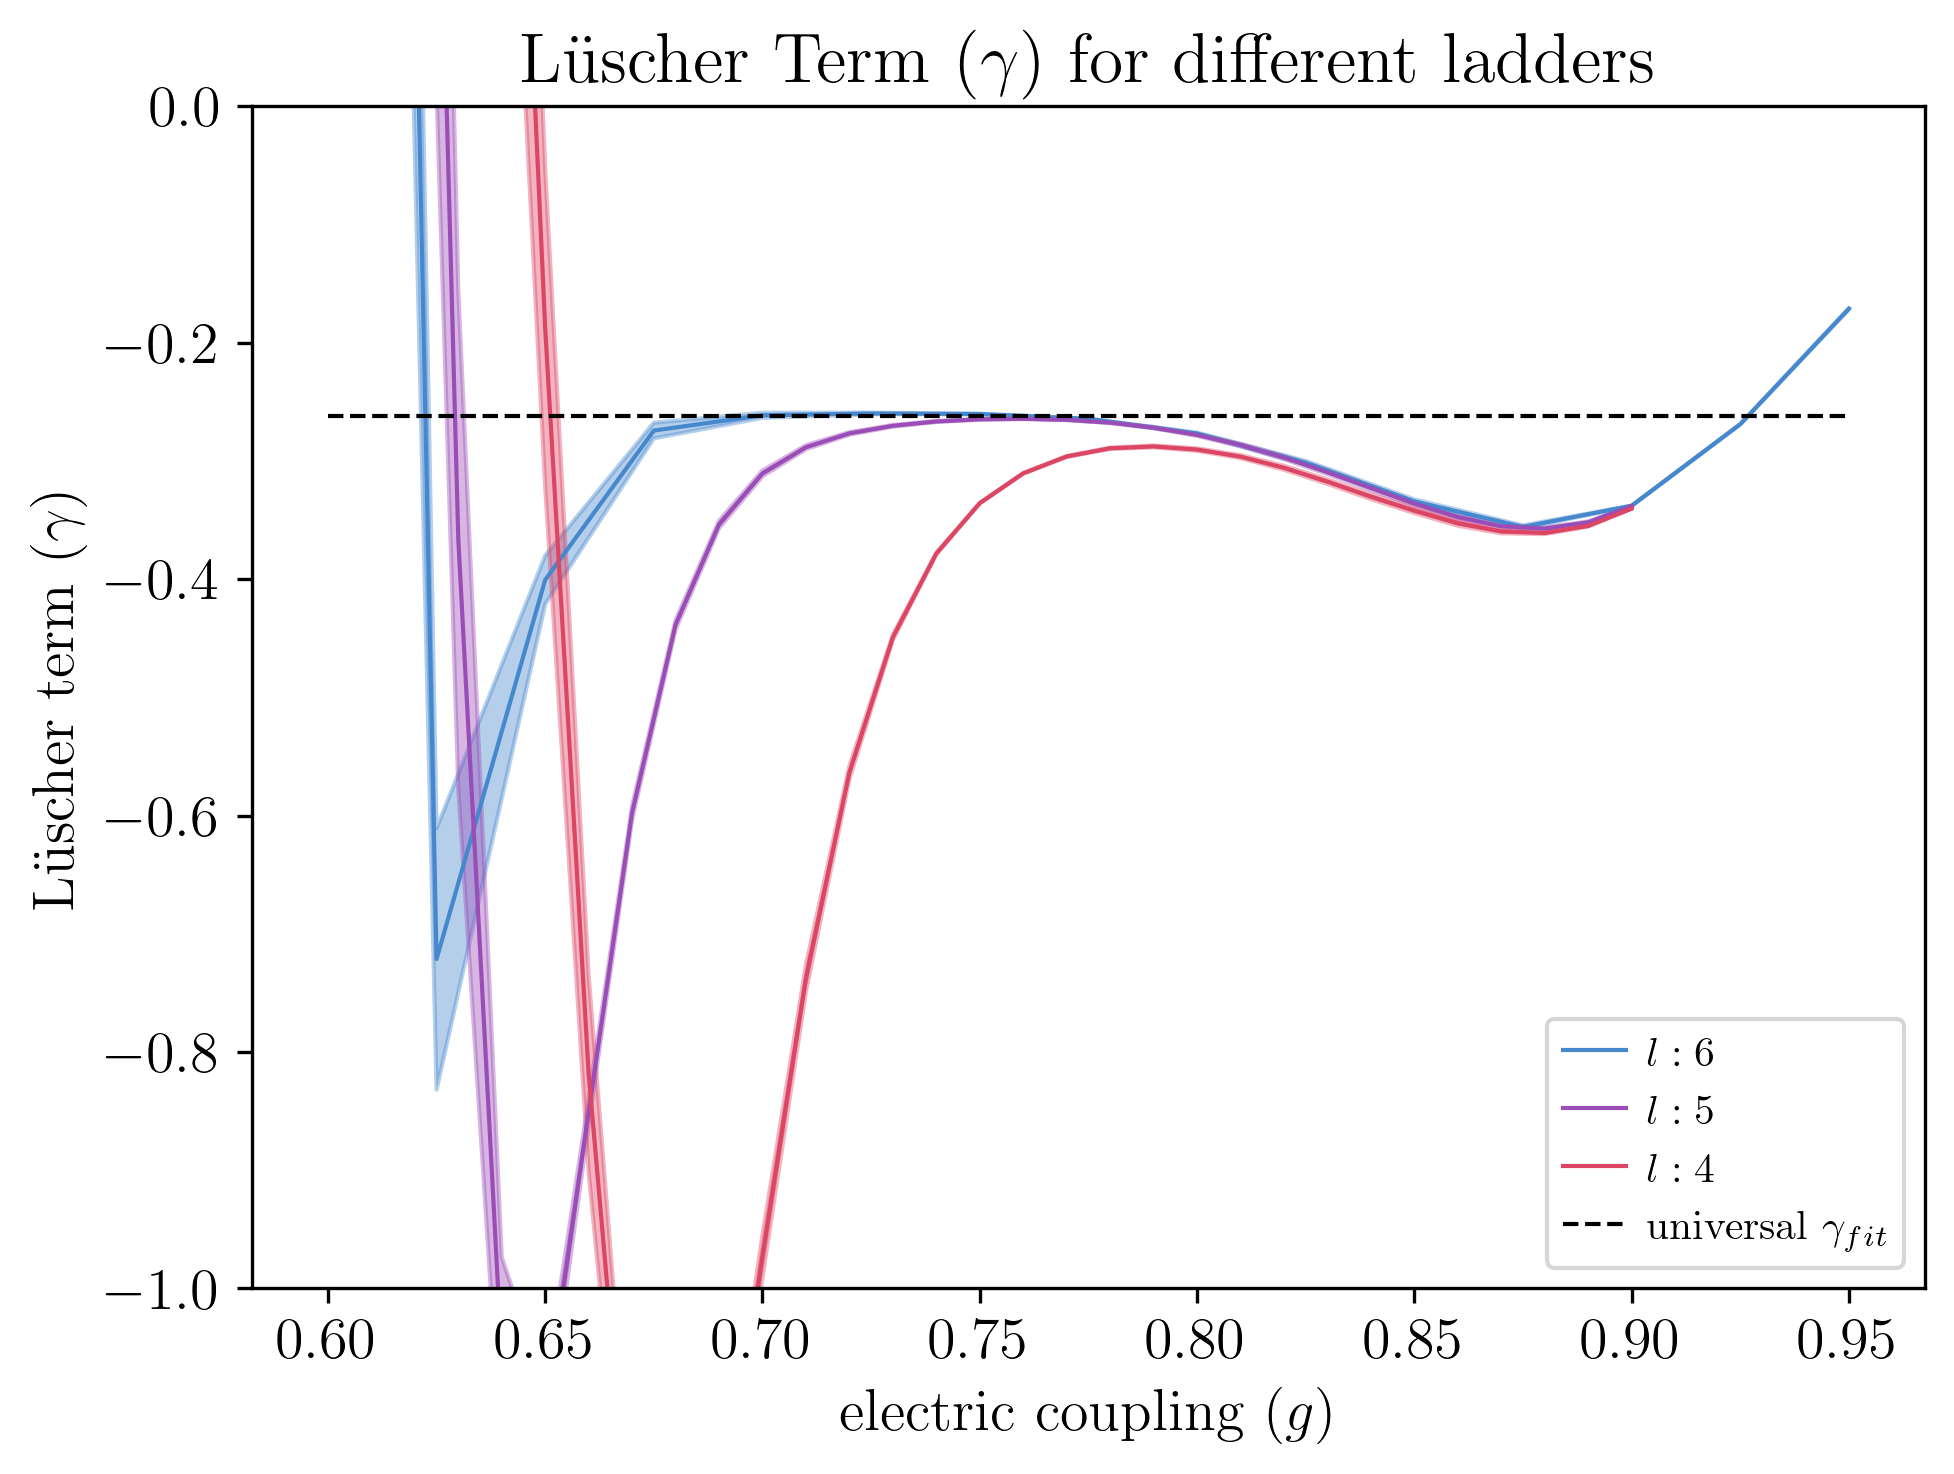

In [608]:
# h_i, h_f, npoints = 0.6, 0.8, 30
# gs = np.linspace(h_i,h_f,npoints)
# chis = [32,64,128]
# Rss = [10,12,14,16,18,20,22,24]
fit = 3

h_i, h_f, npoints = 0.6, 0.95, 15
gs = np.linspace(h_i,h_f,npoints)
chis = [32,64,128,256]
Rs = [7,8,9,10,11,12,13,14,15,16,17,19,21]
l = 6

plot_gamma(gs,Rs,l,chis,h_i,h_f,npoints,path,colors[0])


h_i, h_f, npoints = 0.6, 0.9, 31
gs = np.linspace(h_i,h_f,npoints)
chis = [32,64,128,256]
Rs = [7,8,9,10,11,13,15,17,19,21]
l = 5

plot_gamma(gs,Rs,l,chis,h_i,h_f,npoints,path,colors[1])


Rs = [7,8,9,10,11,12,14,16,18,20,22]
l = 4

plot_gamma(gs,Rs,l,chis,h_i,h_f,npoints,path,colors[2])



# plt.hlines(y=-np.pi/24, xmin=gs[0], xmax=gs[-1], linestyles="-.", colors='red', linestyle="--", linewidth=1, label="$\\gamma_{th}$, $d=3$")
plt.hlines(y=-2*np.pi/24, xmin=gs[0], xmax=0.95, linestyles="--", colors='black', linewidth=1, label="universal $\\gamma_{fit}$")
# plt.grid(True)
# plt.ylim((-0.4,-0.2))
# plt.ylim((-1,0))
plt.ylim((-1,0))
plt.title("Lüscher Term $(\\gamma)$ for different ladders")
plt.xlabel("electric coupling $(g)$")
plt.ylabel("Lüscher term $(\\gamma)$")
plt.legend()
plt.savefig(f"{path_figures}/figures/fluxtube/luscher_term_fit_ord_{fit}_vs_ladders_{[4,5,6]}_best_Rs_bc_{bc}_npoints_{npoints}_h_{h_i}-{h_f}_chi_{chis[-1]}.png")


<>:34: SyntaxWarning: invalid escape sequence '\s'
<>:34: SyntaxWarning: invalid escape sequence '\s'
/var/folders/d1/c6hqhfn161x458f4d0m3_rm80000gp/T/ipykernel_34512/2601444693.py:34: SyntaxWarning: invalid escape sequence '\s'
  plt.ylabel("String tension $(\sigma)$")


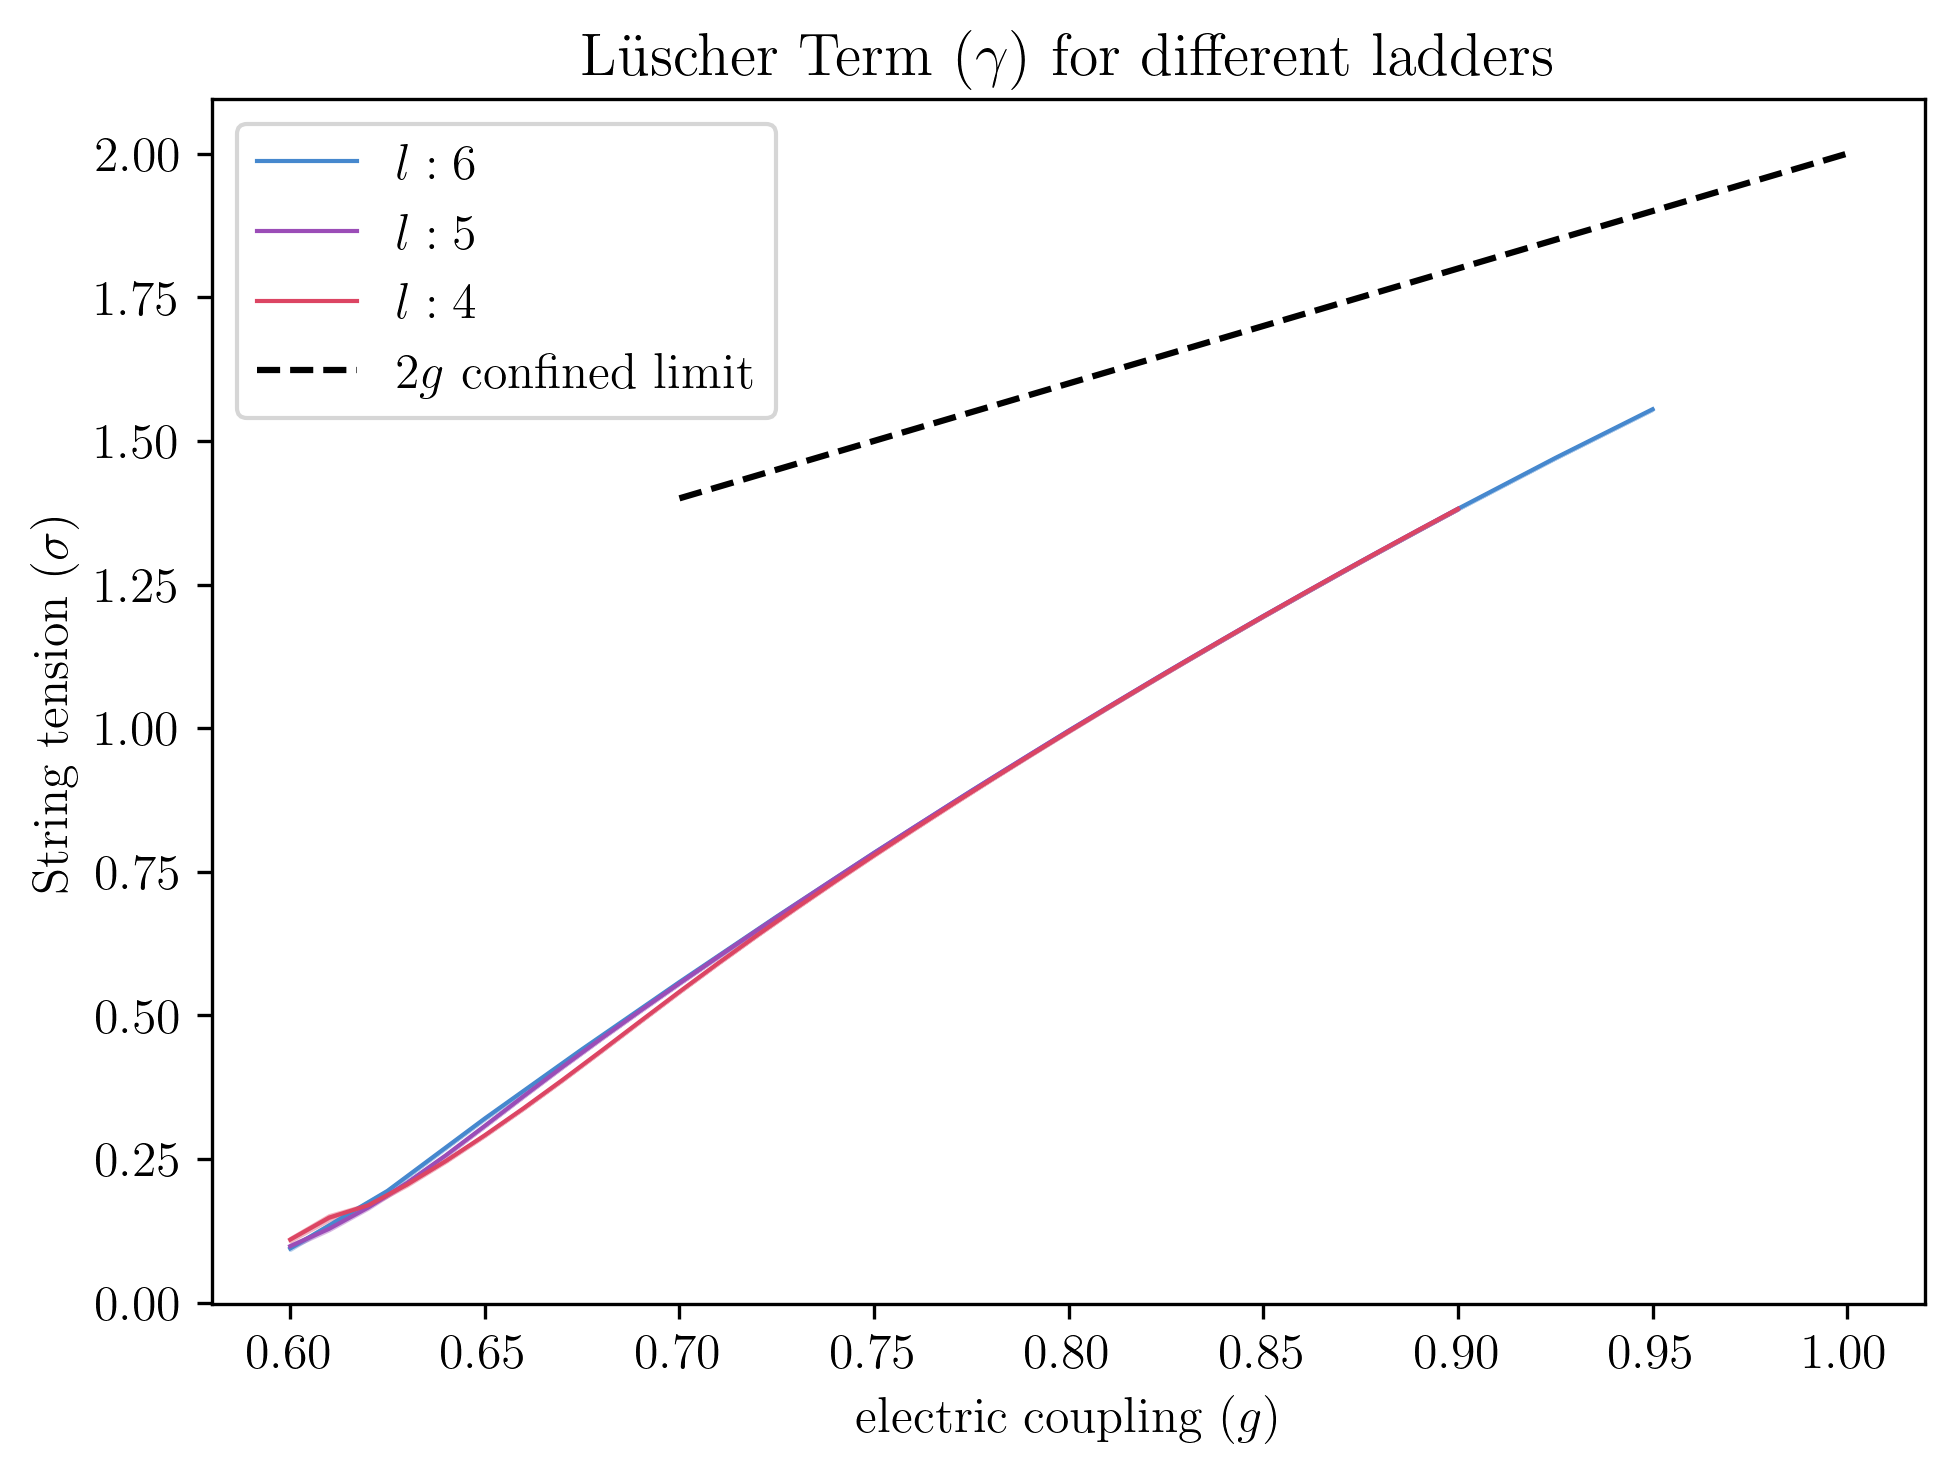

In [39]:
fit = 3

h_i, h_f, npoints = 0.6, 0.95, 15
gs = np.linspace(h_i,h_f,npoints)
chis = [32,64,128,256]
Rs = [7,8,9,10,11,12,13,14,15,16,17,19,21]
l = 6

plot_sigma(gs,Rs,l,chis,h_i,h_f,npoints,path,colors[0])


h_i, h_f, npoints = 0.6, 0.9, 31
gs = np.linspace(h_i,h_f,npoints)
chis = [32,64,128,256]
Rs = [7,8,9,10,11,13,15,17,19,21]
l = 5

plot_sigma(gs,Rs,l,chis,h_i,h_f,npoints,path,colors[1])


Rs = [7,8,9,10,11,12,14,16,18,20,22]
l = 4

plot_sigma(gs,Rs,l,chis,h_i,h_f,npoints,path,colors[2])



x = np.linspace(0.7,1)
plt.plot(x,2*x, linestyle="--", color="black", label="$2g$ confined limit")
# plt.grid(True)
# plt.ylim((-0.4,-0.2))
plt.title("Lüscher Term $(\\gamma)$ for different ladders")
plt.xlabel("electric coupling $(g)$")
plt.ylabel("String tension $(\sigma)$")
plt.legend()
plt.savefig(f"{path_figures}/figures/fluxtube/string_tension_fit_ord_{fit}_vs_ladders_{[4,5,6]}_best_Rs_bc_{bc}_npoints_{npoints}_h_{h_i}-{h_f}_chi_{chis[-1]}.png")

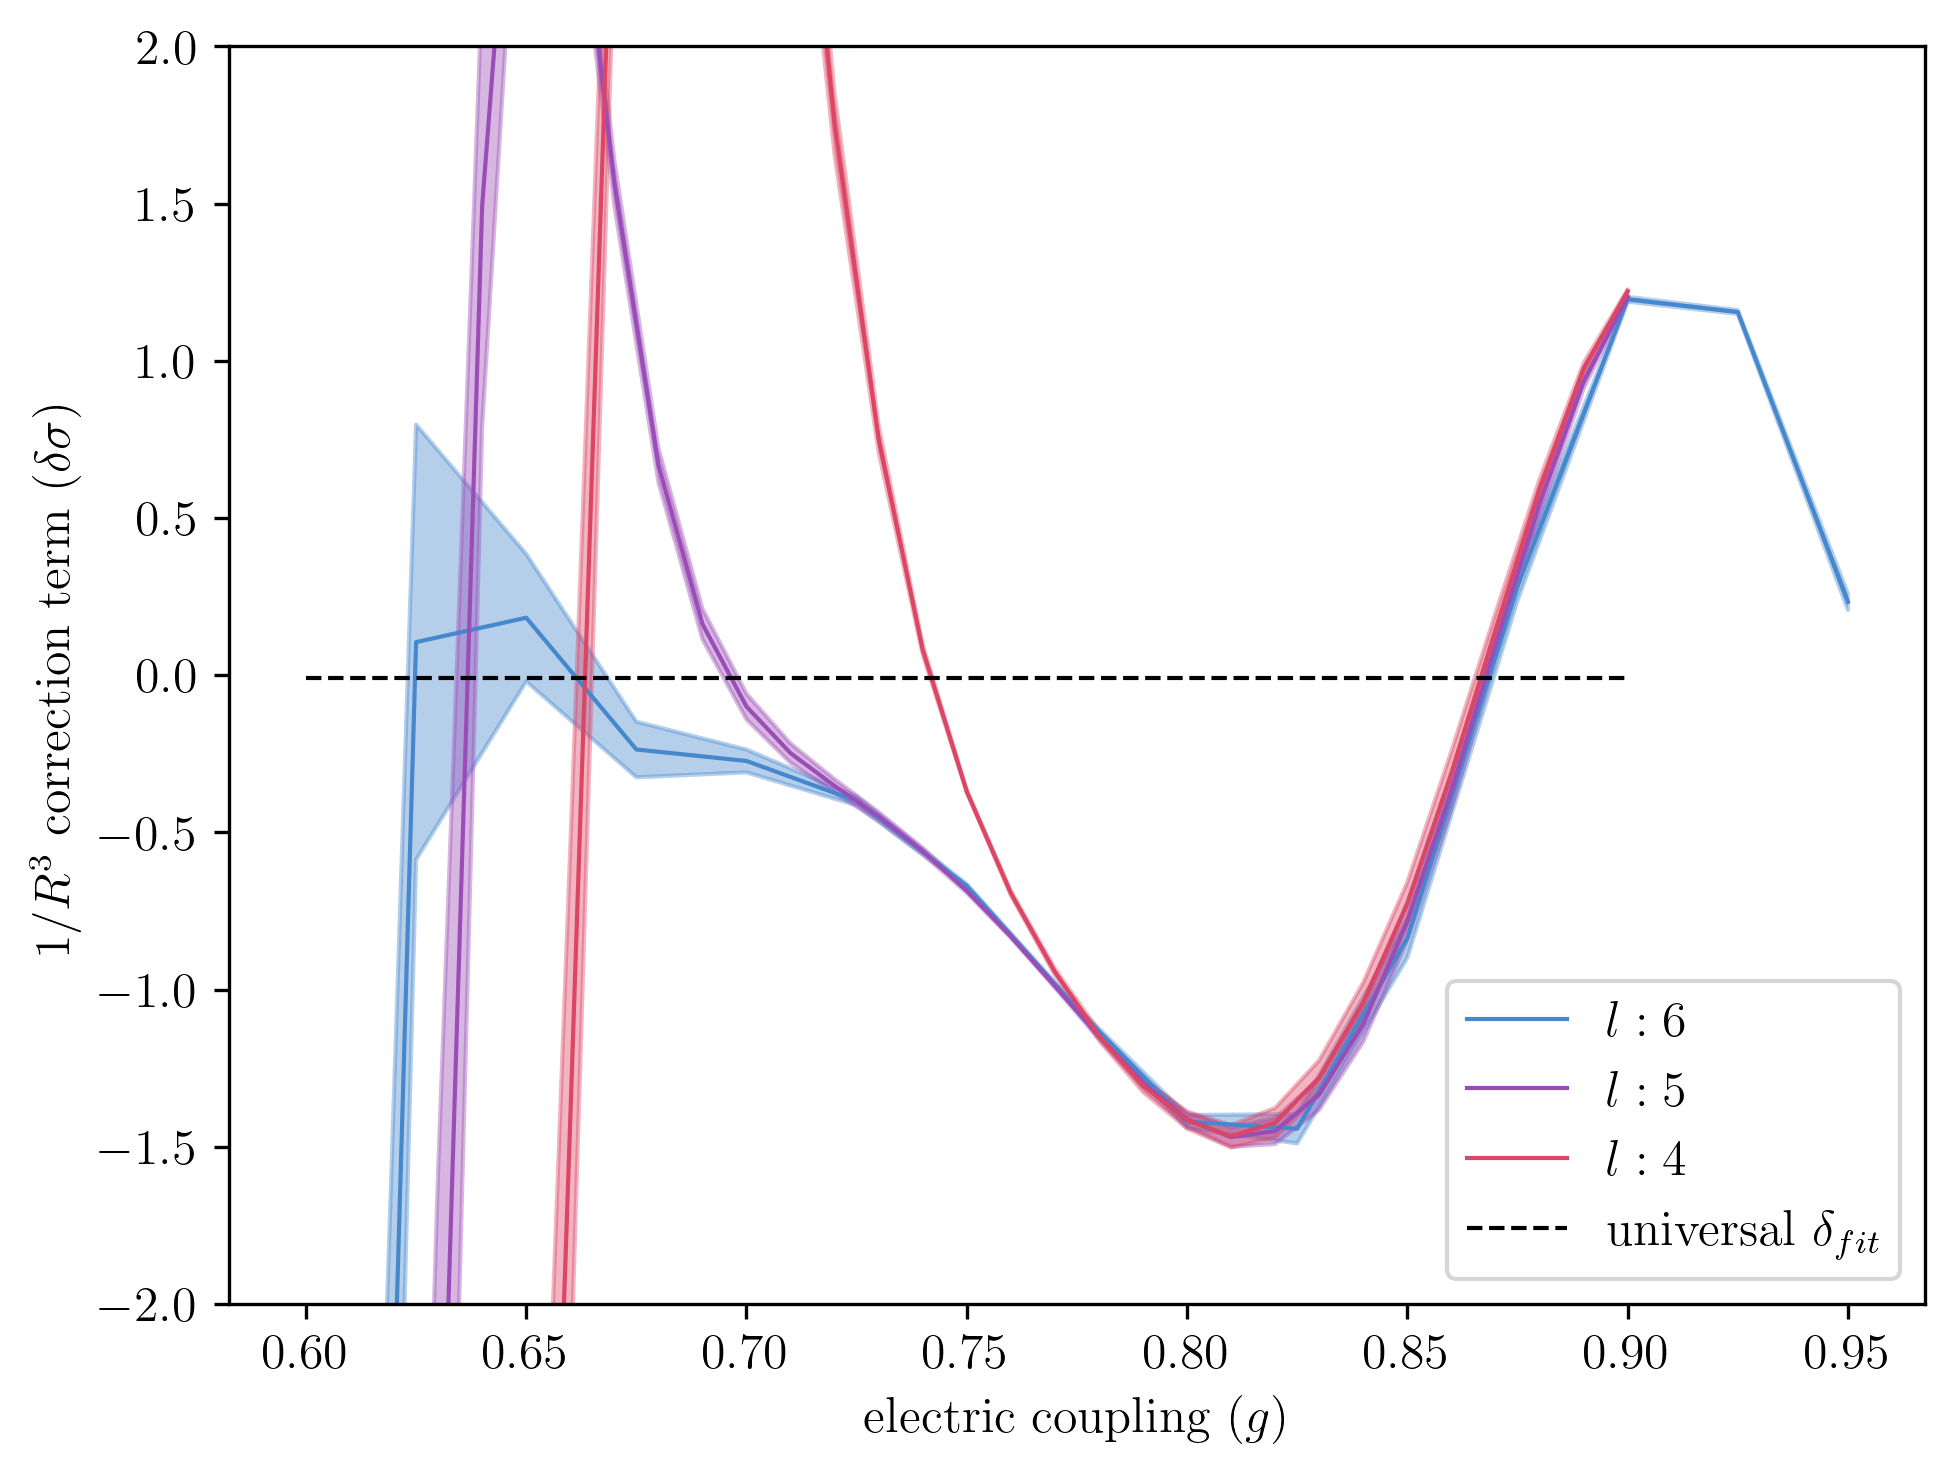

In [40]:
fit = 3

h_i, h_f, npoints = 0.6, 0.95, 15
gs = np.linspace(h_i,h_f,npoints)
chis = [32,64,128,256]
Rs = [7,8,9,10,11,12,13,14,15,16,17,19,21]
l = 6

plot_delta(gs,Rs,l,chis,h_i,h_f,npoints,path,colors[0])


h_i, h_f, npoints = 0.6, 0.9, 31
gs = np.linspace(h_i,h_f,npoints)
chis = [32,64,128,256]
Rs = [7,8,9,10,11,13,15,17,19,21]
l = 5

plot_delta(gs,Rs,l,chis,h_i,h_f,npoints,path,colors[1])


Rs = [7,8,9,10,11,12,14,16,18,20,22]
l = 4

plot_delta(gs,Rs,l,chis,h_i,h_f,npoints,path,colors[2])

plt.hlines(y=-(np.pi**2)/1152, xmin=gs[0], xmax=gs[-1], linestyles="--", colors='black', linewidth=1, label="universal $\\delta_{fit}$")

# plt.grid(True)
plt.ylim(-2,2)
plt.xlabel("electric coupling $(g)$")
plt.ylabel("$1/R^3$ correction term $(\\delta\\sigma)$")
plt.legend()
plt.savefig(f"{path_figures}/figures/fluxtube/second_potential_correction_fit_ord_{fit}_vs_ladders_{[4,5,6]}_best_Rs_bc_{bc}_npoints_{npoints}_h_{h_i}-{h_f}_chi_{chis[-1]}.png")

## String Width

<>:50: SyntaxWarning: invalid escape sequence '\i'
<>:50: SyntaxWarning: invalid escape sequence '\i'
C:\Users\HP\AppData\Local\Temp\ipykernel_25624\115216603.py:50: SyntaxWarning: invalid escape sequence '\i'
  plt.title(f"String width - bc: ${bc}$, $R \in [{Rs[0]},{Rs[-1]}]$")


g: 0.6
g: 0.625
g: 0.65
g: 0.6749999999999999
g: 0.7
g: 0.725
g: 0.75
g: 0.7749999999999999
g: 0.7999999999999999
g: 0.825
g: 0.85
g: 0.875
g: 0.8999999999999999
g: 0.9249999999999999
g: 0.95
g: 0.6
g: 0.625
g: 0.65
g: 0.6749999999999999
g: 0.7
g: 0.725
g: 0.75
g: 0.7749999999999999
g: 0.7999999999999999
g: 0.825
g: 0.85
g: 0.875
g: 0.8999999999999999
g: 0.9249999999999999
g: 0.95
g: 0.6
g: 0.625
g: 0.65
g: 0.6749999999999999
g: 0.7
g: 0.725
g: 0.75
g: 0.7749999999999999
g: 0.7999999999999999
g: 0.825
g: 0.85
g: 0.875
g: 0.8999999999999999
g: 0.9249999999999999
g: 0.95
g: 0.4
g: 0.54375
g: 0.6875
g: 0.83125
g: 0.975
g: 1.11875
g: 1.2625
g: 1.40625
g: 1.5499999999999998
g: 1.69375
g: 1.8375
g: 1.9812499999999997
g: 2.125
g: 2.26875
g: 2.4124999999999996
g: 2.55625
g: 2.6999999999999997
g: 2.8437499999999996
g: 2.9875
g: 3.1312499999999996
g: 3.275
g: 3.4187499999999997
g: 3.5624999999999996
g: 3.70625
g: 3.8499999999999996
g: 3.9937499999999995
g: 4.1375
g: 4.28125
g: 4.425
g: 4.56875
g

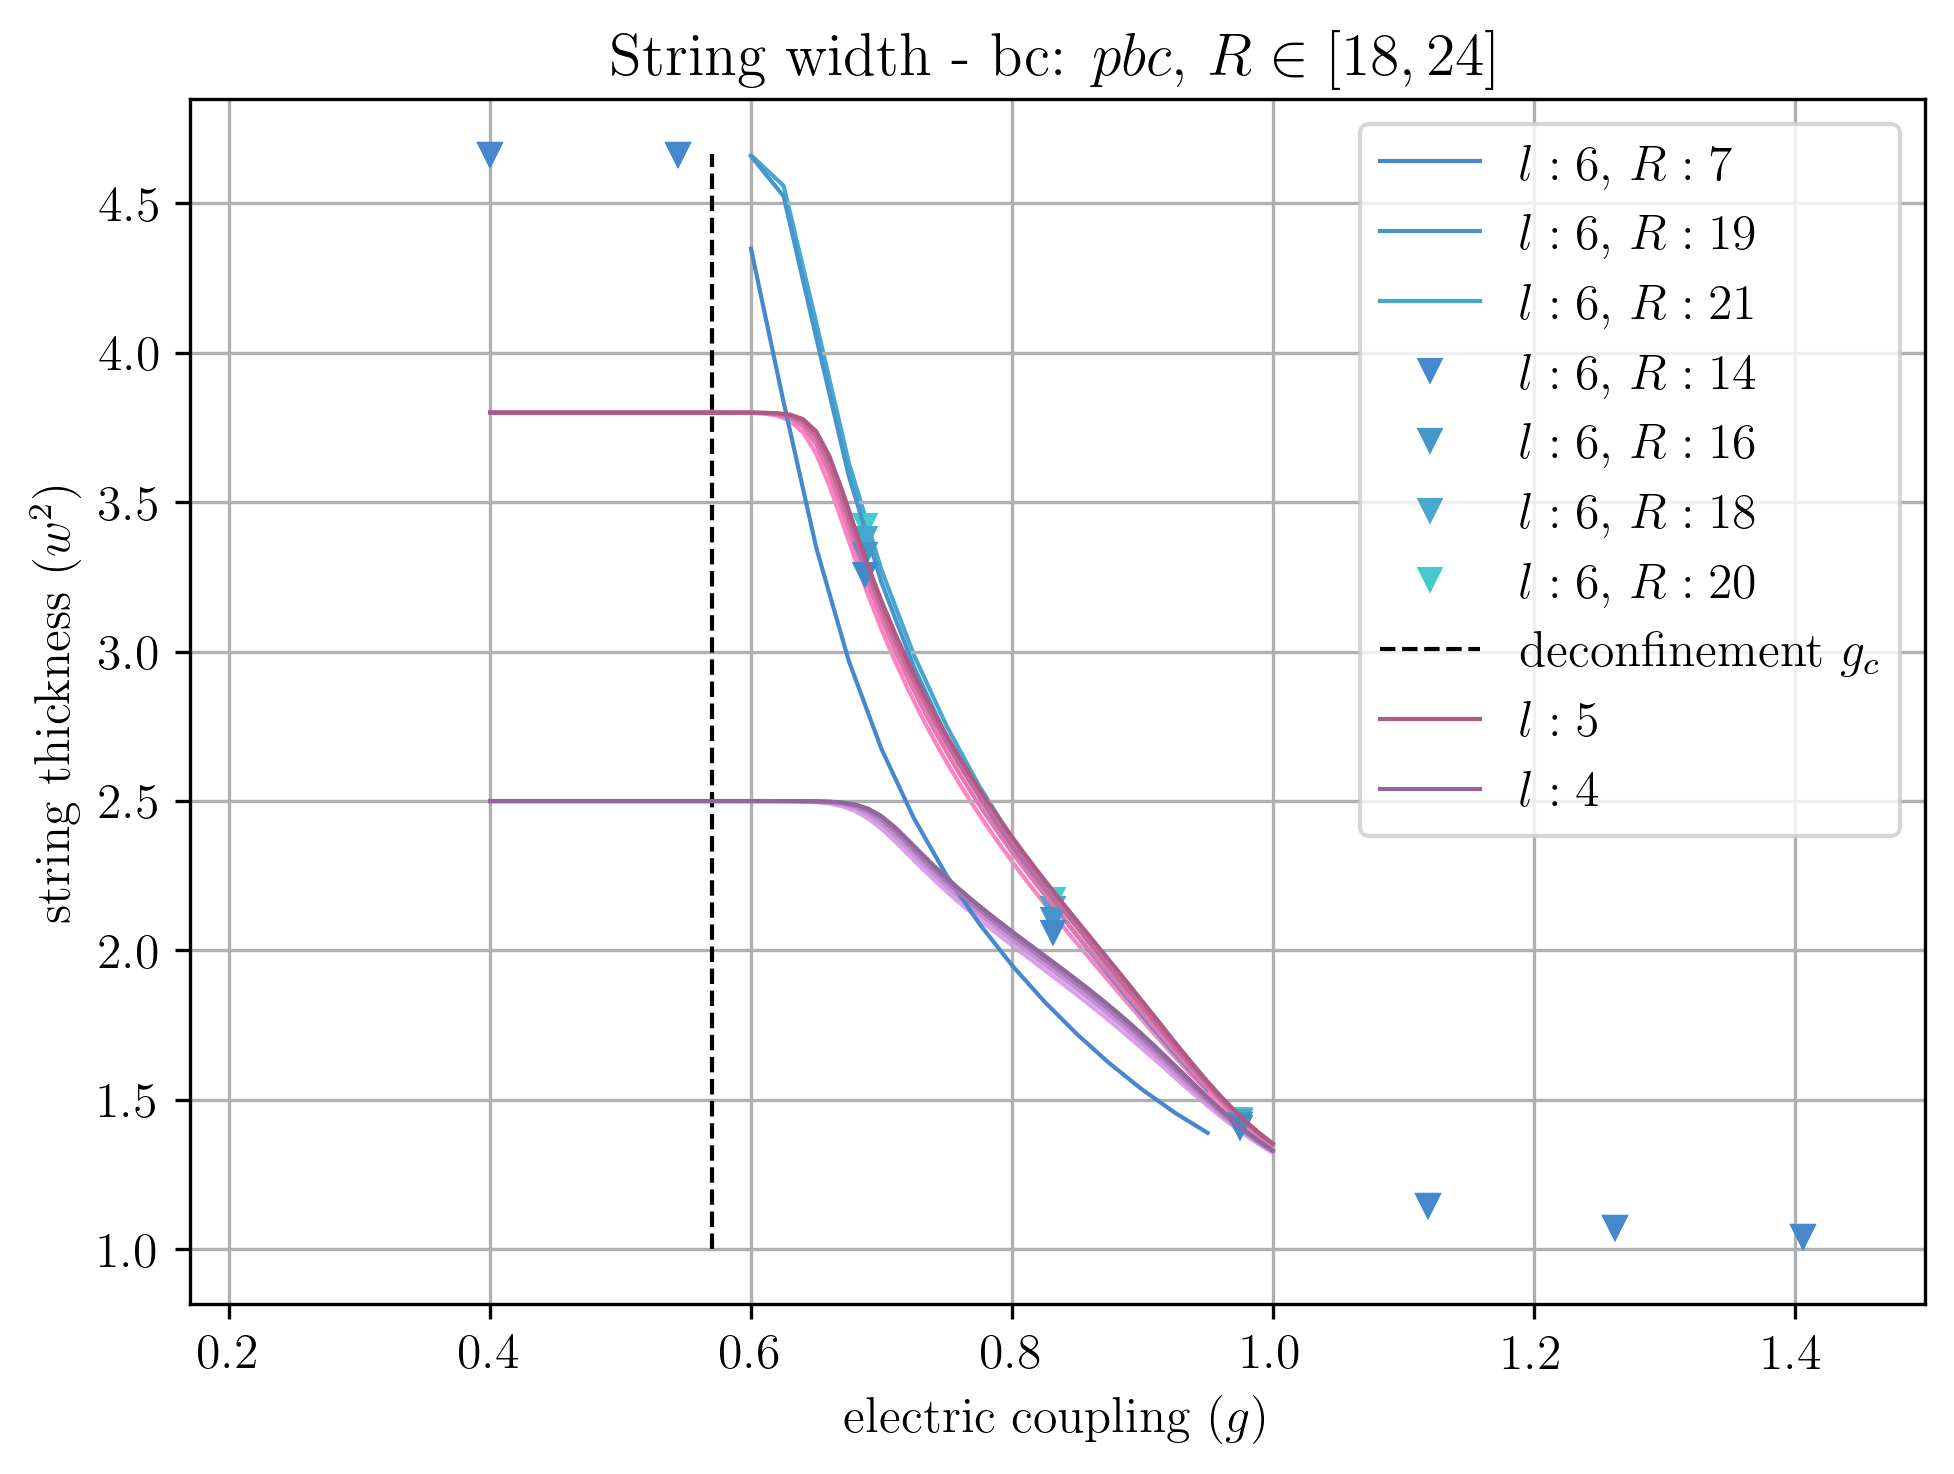

In [19]:
colors = ["#4688CE","#4696CE","#46A8CE","#46CACF"]
Rs = [19,21,23]
Rs.reverse()
h_i, h_f, npoints = 0.6, 0.95, 15
gs = np.linspace(h_i,h_f,npoints)
bc = "pbc"
sector = "2_particle(s)_sector"
l = 6
L = 30
Ls = [30]
chis = [64,128]
Rs = [7,19,21]

for i, R in enumerate(Rs):
    ws, err_ws = string_width_varying_g(gs,R,l,L,chis,bc,sector,h_i,h_f,npoints,path)
    plt.plot(gs, ws, markersize=5, color=colors[i], linestyle="-", linewidth=1, label=f"$l: {l}$, $R: {R}$", zorder=len(Rs)-i)
    # plt.fill_between(gs, y1=np.asarray(ws)+np.asarray(err_ws),y2=np.asarray(ws)-np.asarray(err_ws), color=colors[i], alpha=0.4)

h_i, h_f, npoints = 0.4, 5.0, 33
gs = np.linspace(h_i,h_f,npoints)
chis = [32,64,128]
Rs = [14,16,18,20]
l = 6
for i, R in enumerate(Rs):
    ws, err_ws = string_width_varying_g(gs,R,l,L,chis,bc,sector,h_i,h_f,npoints,path)
    plt.plot(gs, ws, marker='v', markersize=5, color=colors[i], linestyle="", linewidth=0, label=f"$l: {l}$, $R: {R}$", zorder=len(Rs)-i)
    # plt.fill_between(gs, y1=np.asarray(ws)+np.asarray(err_ws),y2=np.asarray(ws)-np.asarray(err_ws), color=colors[i+j+1], alpha=0.4)

plt.vlines(x=0.57, ymin=1, ymax=max(ws), linestyles="--", colors='black', linewidth=1, label="deconfinement $g_c$")

chis = [32,64]
Rs = [18,20,22,24]
Rs.reverse()
# colorss = [["#4688CE","#4696CE","#46A8CE","#46CACF"],["#9B4DB7","#BC4FBE","#CC50C2","#DC51C5"],["#DC4563","#E45A70","#ED7580","#F68F8F"]]
colorss = [["#AD5A85","#C86799","#E575AF","#FF82C3"],["#90679A","#A979B5","#C78FD5","#DD9FEC"],["#DC4563","#E45A70","#ED7580","#F68F8F"]]
ls = [5,4]
h_i, h_f, npoints = 0.4, 1.0, 61
gs = np.linspace(h_i,h_f,npoints)
for colors, l in zip(colorss, ls):
    for i, R in enumerate(Rs):
        ws, err_ws = string_width_varying_g(gs,R,l,L,chis,bc,sector,h_i,h_f,npoints,path)
        if R == 24:
            label = f"$l: {l}$"
        else: 
            label = None
        plt.plot(gs, ws, markersize=2, color=colors[i], linestyle="-", linewidth=1, label=label, zorder=len(Rs)-i)
        # plt.fill_between(gs, y1=np.asarray(ws)+np.asarray(err_ws),y2=np.asarray(ws)-np.asarray(err_ws), color=colors[i], alpha=0.4, zorder=len(Rs)-i)

Rs.reverse()
plt.title(f"String width - bc: ${bc}$, $R \in [{Rs[0]},{Rs[-1]}]$")
plt.xlabel("electric coupling $(g)$")
plt.ylabel("string thickness $(w^2)$")
plt.grid(True)
# plt.xscale("log")
plt.xlim(right=1.5)
plt.legend()

## String width occupation

[-1, 0, 1, 2]
[-1, 0, 1, 2]
[-1, 0, 1, 2]
[-1, 0, 1, 2]
[-1, 0, 1, 2]
[-1, 0, 1, 2]
[-1, 0, 1, 2]
[-1, 0, 1, 2]
[-1, 0, 1, 2]
[-1, 0, 1, 2]
[-1, 0, 1, 2]
[-1, 0, 1, 2]
[-1, 0, 1, 2]
[-1, 0, 1, 2]
[-1, 0, 1, 2]
[-1, 0, 1, 2]
[-1, 0, 1, 2]
[-1, 0, 1, 2]
[-1, 0, 1, 2]
[-1, 0, 1, 2]
[-1, 0, 1, 2]
[-1, 0, 1, 2]
[-1, 0, 1, 2]
[-1, 0, 1, 2]
[-1, 0, 1, 2]
[-1, 0, 1, 2]
[-1, 0, 1, 2]
[-1, 0, 1, 2]
[-1, 0, 1, 2]
[-1, 0, 1, 2]
[-1, 0, 1, 2]
[-1, 0, 1, 2]
[-1, 0, 1, 2]
[-1, 0, 1, 2]
[-1, 0, 1, 2]
[-1, 0, 1, 2]
[-1, 0, 1, 2]
[-1, 0, 1, 2]
[-1, 0, 1, 2]
[-1, 0, 1, 2]
[-1, 0, 1, 2]
[-1, 0, 1, 2]
[-1, 0, 1, 2]
[-1, 0, 1, 2]
[-1, 0, 1, 2]
[-1, 0, 1, 2]
[-1, 0, 1, 2]
[-1, 0, 1, 2]
[-1, 0, 1, 2]
[-1, 0, 1, 2]
[-1, 0, 1, 2]
[-1, 0, 1, 2]
[-1, 0, 1, 2]
[-1, 0, 1, 2]
[-1, 0, 1, 2]
[-1, 0, 1, 2]
[-1, 0, 1, 2]
[-1, 0, 1, 2]
[-1, 0, 1, 2]
[-1, 0, 1, 2]
[-1, 0, 1, 2]
[-1, 0, 1, 2]
[-1, 0, 1, 2]
[-1, 0, 1, 2]
[-1, 0, 1, 2]
[-1, 0, 1, 2]
[-1, 0, 1, 2]
[-1, 0, 1, 2]
[-1, 0, 1, 2]
[-1, 0, 1, 2]
[-1, 0, 1, 2]
[-1, 0

/var/folders/d1/c6hqhfn161x458f4d0m3_rm80000gp/T/ipykernel_1308/1965917118.py:66: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


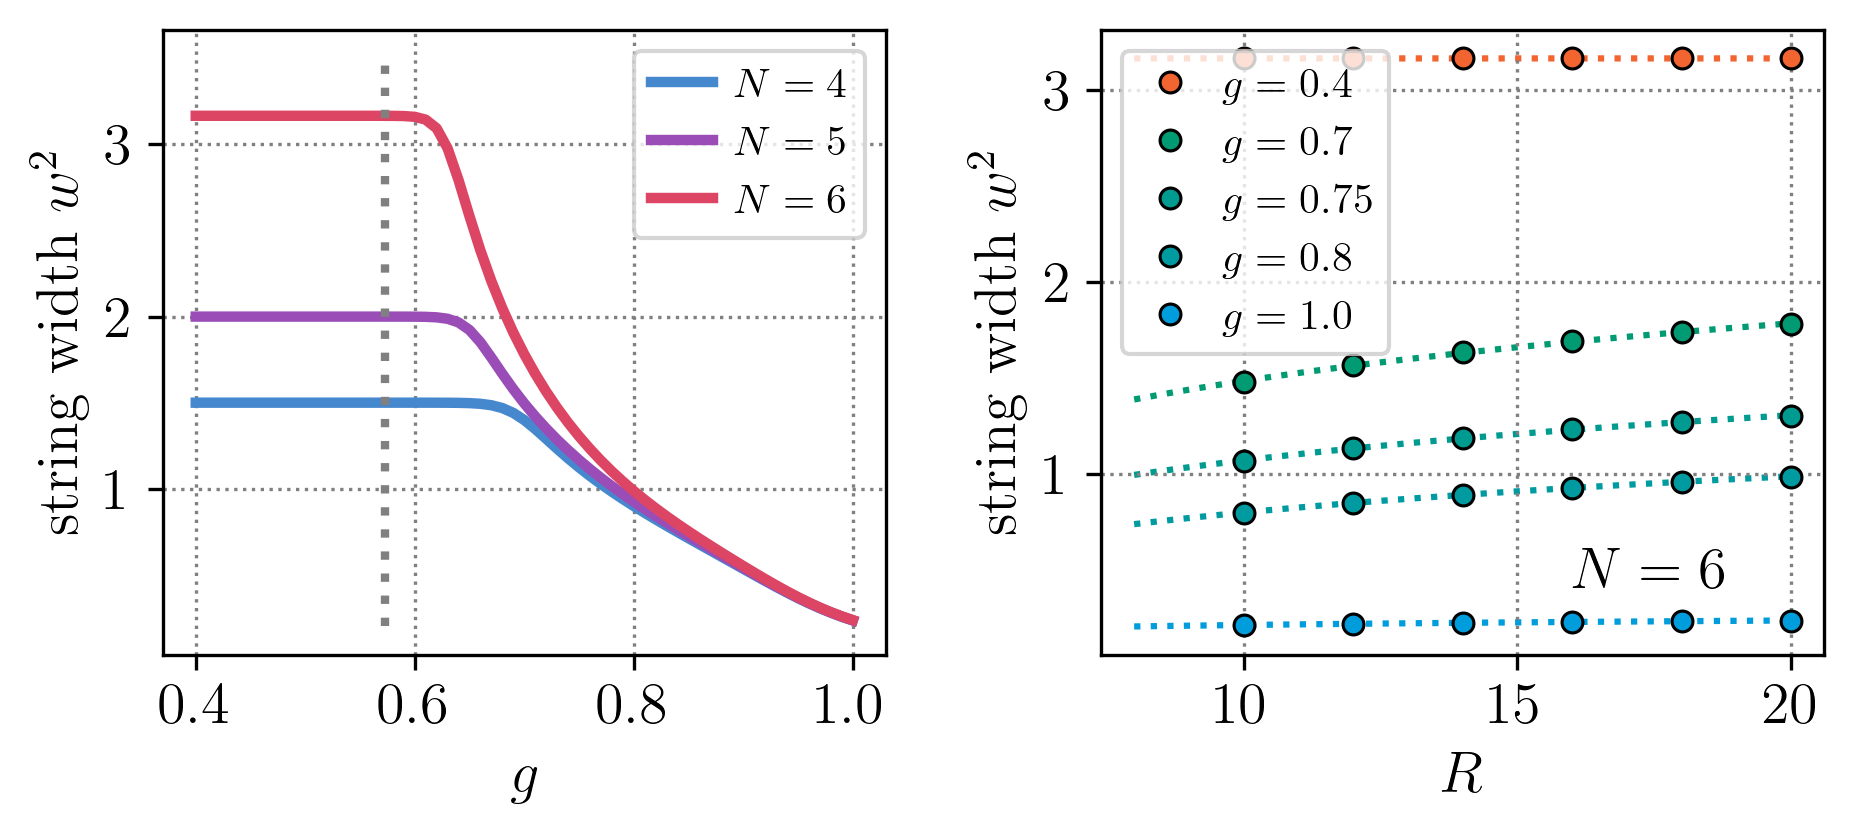

In [471]:
marker_opts = dict(
    marker='o',
    markeredgecolor='k',
    markeredgewidth=0.75,
    markersize=5,
    linestyle='',
)

theor_gc = 1 / np.sqrt(3.04438)
theor_gc
R_max = [20,20,20,19]

Rs = [10,12,14,16,18,20]
h_i, h_f, npoints = 0.4, 1.0, 61
gs = np.linspace(h_i, h_f, npoints)
chis = [64,128]

fig, axs = plt.subplots(1, 2, figsize=(6.4, 3))

for ax in axs:
    ax.grid(color="gray", linestyle=":")

colors = ["#4688CE","#9B4DB7","#DC4563"]

# String width vs coupling
i = 0
for N in [4, 5, 6]:
    Rmax = R_max[i]
    string_width, string_width_err = string_width_varying_g(gs, Rmax, N, L, chis, bc, sector, h_i, h_f, npoints, path, occupation=True)
    print(f"N = {N}, Rmax = {Rmax}")
    axs[0].plot(gs, string_width, color=colors[i], label=f"$N = {N}$", linewidth=2.5)
    i += 1
axs[0].legend()
axs[0].set_xlabel("$g$")
axs[0].set_ylabel("string width $w^2$")
axs[0].vlines(theor_gc, 0.2, 3.5, 'grey', ':', linewidth=2)
# axs[0].set_ylim(1, 4)


colors = ["#F26430", "#009B72", "#009B90", "#009BA1", "#009DDC"]

# String width vs separation R
k = 0
coupls = [1.0, 0.9, 0.8, 0.7, 0.4]
coupls = [1.0, 0.8, 0.7, 0.4]
coupls = [1.0, 0.8, 0.75, 0.7, 0.4]
coupls.reverse()

def log_fit(R, a, b):
    return a*np.log(R) + b

for g in coupls:
    string_width, string_width_err = string_width_varying_R(g, Rs, N, L, chis, bc, sector, h_i, h_f, npoints, path, occupation=True)
    axs[1].plot(Rs, string_width, color=colors[k], label=f"$g = {g}$", **marker_opts)
    
    plog, clog = curve_fit(log_fit, Rs, string_width)
    x_fit = np.linspace(8,20)
    axs[1].plot(x_fit, log_fit(x_fit,*plog), color=colors[k], linestyle=':', zorder=0)
    k += 1

axs[1].set_xlabel("$R$")
axs[1].set_ylabel("string width $w^2$")
axs[1].legend(loc="upper left")
axs[1].text(16, 0.4, f"$N = {N}$")

fig.tight_layout()
fig.savefig(f"{path_figures}/figures/fluxtube/string_width.pdf", bbox_inches='tight', format='pdf')

## Fidelity Susceptibility

12 [0.99625673 0.99648535 0.99668443 0.99685703 0.99700591 0.99713371
 0.9972431  0.99733697 0.99741853 0.9974914  0.99755949 0.99762681] [0.805 0.815 0.825 0.835 0.845 0.855 0.865 0.875 0.885 0.895 0.905 0.915]
12 [0.996189   0.99641856 0.99661792 0.99679003 0.99693756 0.99706298
 0.99716886 0.99725802 0.99733372 0.99739977 0.99746051 0.99752055] [0.805 0.815 0.825 0.835 0.845 0.855 0.865 0.875 0.885 0.895 0.905 0.915]
12 [0.99612134 0.99635192 0.99655167 0.99672344 0.99686977 0.99699299
 0.99709551 0.99718003 0.99724982 0.99730885 0.99736181 0.99741398] [0.805 0.815 0.825 0.835 0.845 0.855 0.865 0.875 0.885 0.895 0.905 0.915]
12 [0.99605371 0.99628539 0.99648561 0.99665718 0.99680245 0.99692362
 0.99702293 0.99710293 0.9971668  0.99721863 0.99726346 0.99730717] [0.805 0.815 0.825 0.835 0.845 0.855 0.865 0.875 0.885 0.895 0.905 0.915]
12 [0.99598609 0.99621894 0.9964197  0.99659116 0.99673551 0.9968548
 0.99695103 0.9970266  0.99708458 0.9971291  0.99716547 0.99720023] [0.805 0.815 0.

/var/folders/d1/c6hqhfn161x458f4d0m3_rm80000gp/T/ipykernel_1308/3958316393.py:136: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


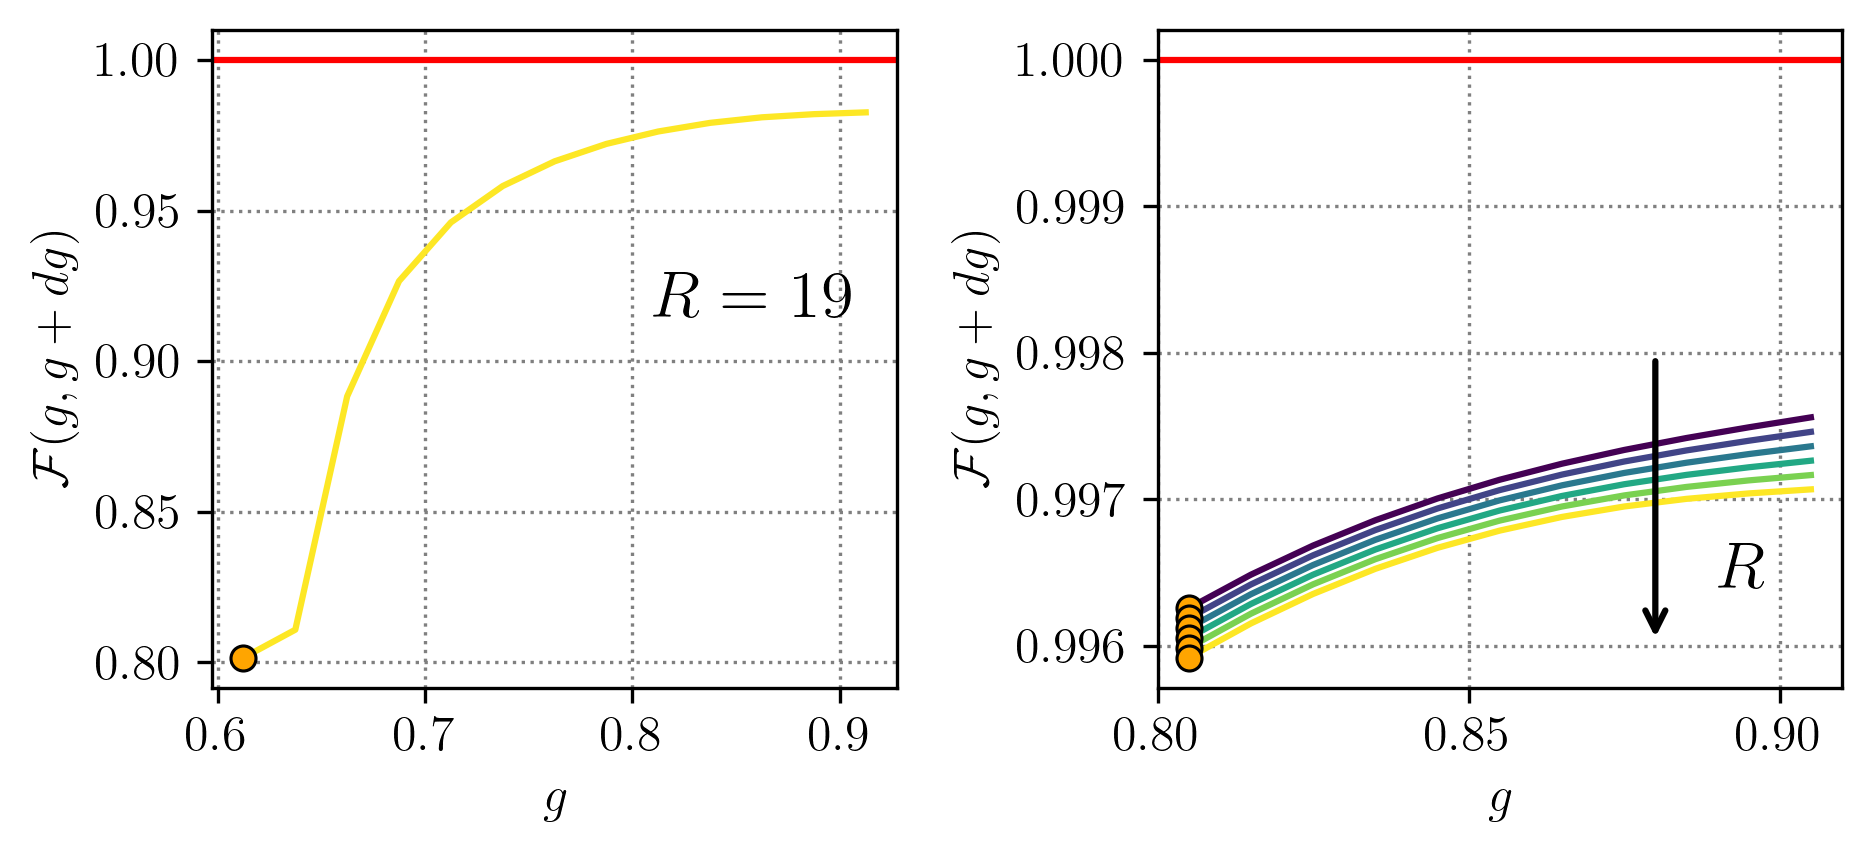

In [129]:
l = 6
L = 30 
bc = "pbc"
# h_i, h_f, npoints = 0.6, 0.95, 15
# Rs = [10,11,13,15,16,17,19,21]
# chi = 256

# h_i, h_f, npoints = 0.4, 1.0, 61
# gs = np.linspace(h_i,h_f,npoints-1)
# Rs = [10,12,13,14,15,16,17,18,19,20]
# chi = 128
# rng = [45,-2]
# x_arrow = 0.92
# y_bottom = -0.5e-5
# y_top = +1.5e-5

# l = 5
# h_i, h_f, npoints = 0.8, 1.0, 41
# gs = np.linspace(h_i,h_f,npoints-1)
# Rs = [10,12,13,14,15,16,17,18,19,20]
# chi = 128
# rng = [5,-5]
# x_arrow = 0.92
# y_bottom = -0.5e-6
# y_top = +1.3e-6

l = 6
h_i, h_f, npoints = 0.8, 0.92, 13
gs = np.linspace(h_i+5*1e-3,h_f-5*1e-3,npoints-1)
Rs = [15,16,17,18,19,20]
chi = 256
rng = [0,-1]
x_arrow = 0.88
y_bottom = 1-4e-3
y_top = 1-2e-3

peaks_opts = dict(
    zorder=20,
    marker="o", 
    facecolors="orange", 
    edgecolors="k",
    linewidths=0.75
)

colors = create_sequential_colors(len(Rs))
log = False
rdm = False
der = False

fig, axs = plt.subplots(1, 2, figsize=(6.4, 3))

for ax in axs:
    ax.grid(color="gray", linestyle=":")

min_g = []
for i, R in enumerate(Rs):
    fidelities = np.load(f"{path}/results/overlap/fidelity_susceptibility_log_{log}_rdm_{rdm}_der_{der}_{model}_{l}x{L}_bc_{bc}_R_{R}_npoints_{npoints}_h_{h_i}-{h_f}_chi_{chi}.npy")
    print(len(fidelities), fidelities, gs)
    # Susceptibility
    axs[1].plot(gs[rng[0]:rng[1]], fidelities[rng[0]:rng[1]], color=colors[i])
    axs[1].scatter(gs[rng[0]:rng[1]][np.argmin(fidelities[rng[0]:rng[1]])], np.min(fidelities[rng[0]:rng[1]]), **peaks_opts)
    # axs[1].set_ylabel(r"$\chi_M$")
    axs[1].set_ylabel("$\\mathcal{F}(g,g+dg)$")
    axs[1].set_xlabel(r"$g$")
    min_g.append(gs[rng[0]:rng[1]][np.argmin(fidelities[rng[0]:rng[1]])])

axs[1].axhline(y=1, color='r')
# Double-headed arrow
axs[1].annotate(
    '', xy=(x_arrow, y_bottom), xytext=(x_arrow, y_top),
    arrowprops=dict(arrowstyle='->', color='black', linewidth=1.5)
)

# Label next to the arrow
axs[1].text(
    x_arrow+0.01,(y_top + y_bottom) / 2 - 5e-4,  # small x shift, mid y
    r'$R$', fontsize=16, va='center'
)


l = 6
h_i, h_f, npoints = 0.6, 0.95, 15
R = 19
gs = np.linspace(h_i+0.0125,h_f-0.0125,npoints-1)
fidelities = np.load(f"{path}/results/overlap/fidelity_susceptibility_log_{log}_rdm_{rdm}_der_{der}_{model}_{l}x{L}_bc_{bc}_R_{R}_npoints_{npoints}_h_{h_i}-{h_f}_chi_{chi}.npy")
print(len(fidelities), fidelities, gs)
# Susceptibility
axs[0].plot(gs[rng[0]:rng[1]], fidelities[rng[0]:rng[1]], color=colors[i])
axs[0].scatter(gs[rng[0]:rng[1]][np.argmin(fidelities[rng[0]:rng[1]])], np.min(fidelities[rng[0]:rng[1]]), **peaks_opts)
axs[0].axhline(y=1, color='r')
axs[0].set_ylabel("$\\mathcal{F}(g,g+dg)$")
axs[0].set_xlabel(r"$g$")

axs[0].text(
    0.81,0.92,  # small x shift, mid y
    r'$R=19$', fontsize=16, va='center'
)
# err_g = (h_f - h_i) / (npoints - 1)
# labels=dict(
#         fit="$a L^{-1} + b$",
#         theor="$g_r^{\\mathrm{th}}$"
#     )
# theor_y0 = 0.855
# fss_plot_opts = dict(
#     fit_opts = dict(linestyle="--", linewidth=1, color="k"),
#     y0_opts = dict(fmt='s', elinewidth=1, ecolor="k", capsize=6, markersize=5, mfc="red", mec="k", mew=0.5, capthick=2),
#     theor_opts = dict(s=40, marker='X', facecolors="red", edgecolors="k", linewidths=0.5),
#     points_opts = dict(fmt='o', elinewidth=1, ecolor="k", capsize=6, ms=4, mfc="orange", mec="k", mew=0.75, capthick=2)
# )


# # Plot fitted function
# # xrange = np.linspace(0, 1/fss.data[fss.x].min())
# # fitted_fs = fss.fit_func(xrange, *fss.fit_params)
# # fit_plot, = ax.plot(xrange, fitted_fs, label=labels.get("fit", ""), **fit_opts)

# # Plot fss data
# axs[1].errorbar(
#     [1 / R for R in Rs],
#     min_g,
#     err_g,
#     label=labels.get("points", ""),
#     **fss_plot_opts["points_opts"]
# )

# # Theoretical value for y0
# axs[1].scatter([0.0], [theor_y0], label=labels.get("theor"), **fss_plot_opts["theor_opts"], zorder=20)

# # # Plot point at x = 0
# # axs[1].errorbar(0, fss.y0, fss.y0_err, label=labels.get("y0", ""), **y0_opts)

# axs[1].legend(title="$\\chi_M$")
# axs[1].set_ylabel("$g_r^{(R)}$")
# axs[1].set_xlabel(r"$1/R$")

fig.tight_layout()

# # Save figure
fig.savefig(f"{path_figures}/figures/fluxtube/fid_susc_{l}x{L}_different_ranges.pdf", bbox_inches="tight")

## Entanglement Entropy

In [131]:
bc = "pbc"
l = 6

### Tests, zoom plot

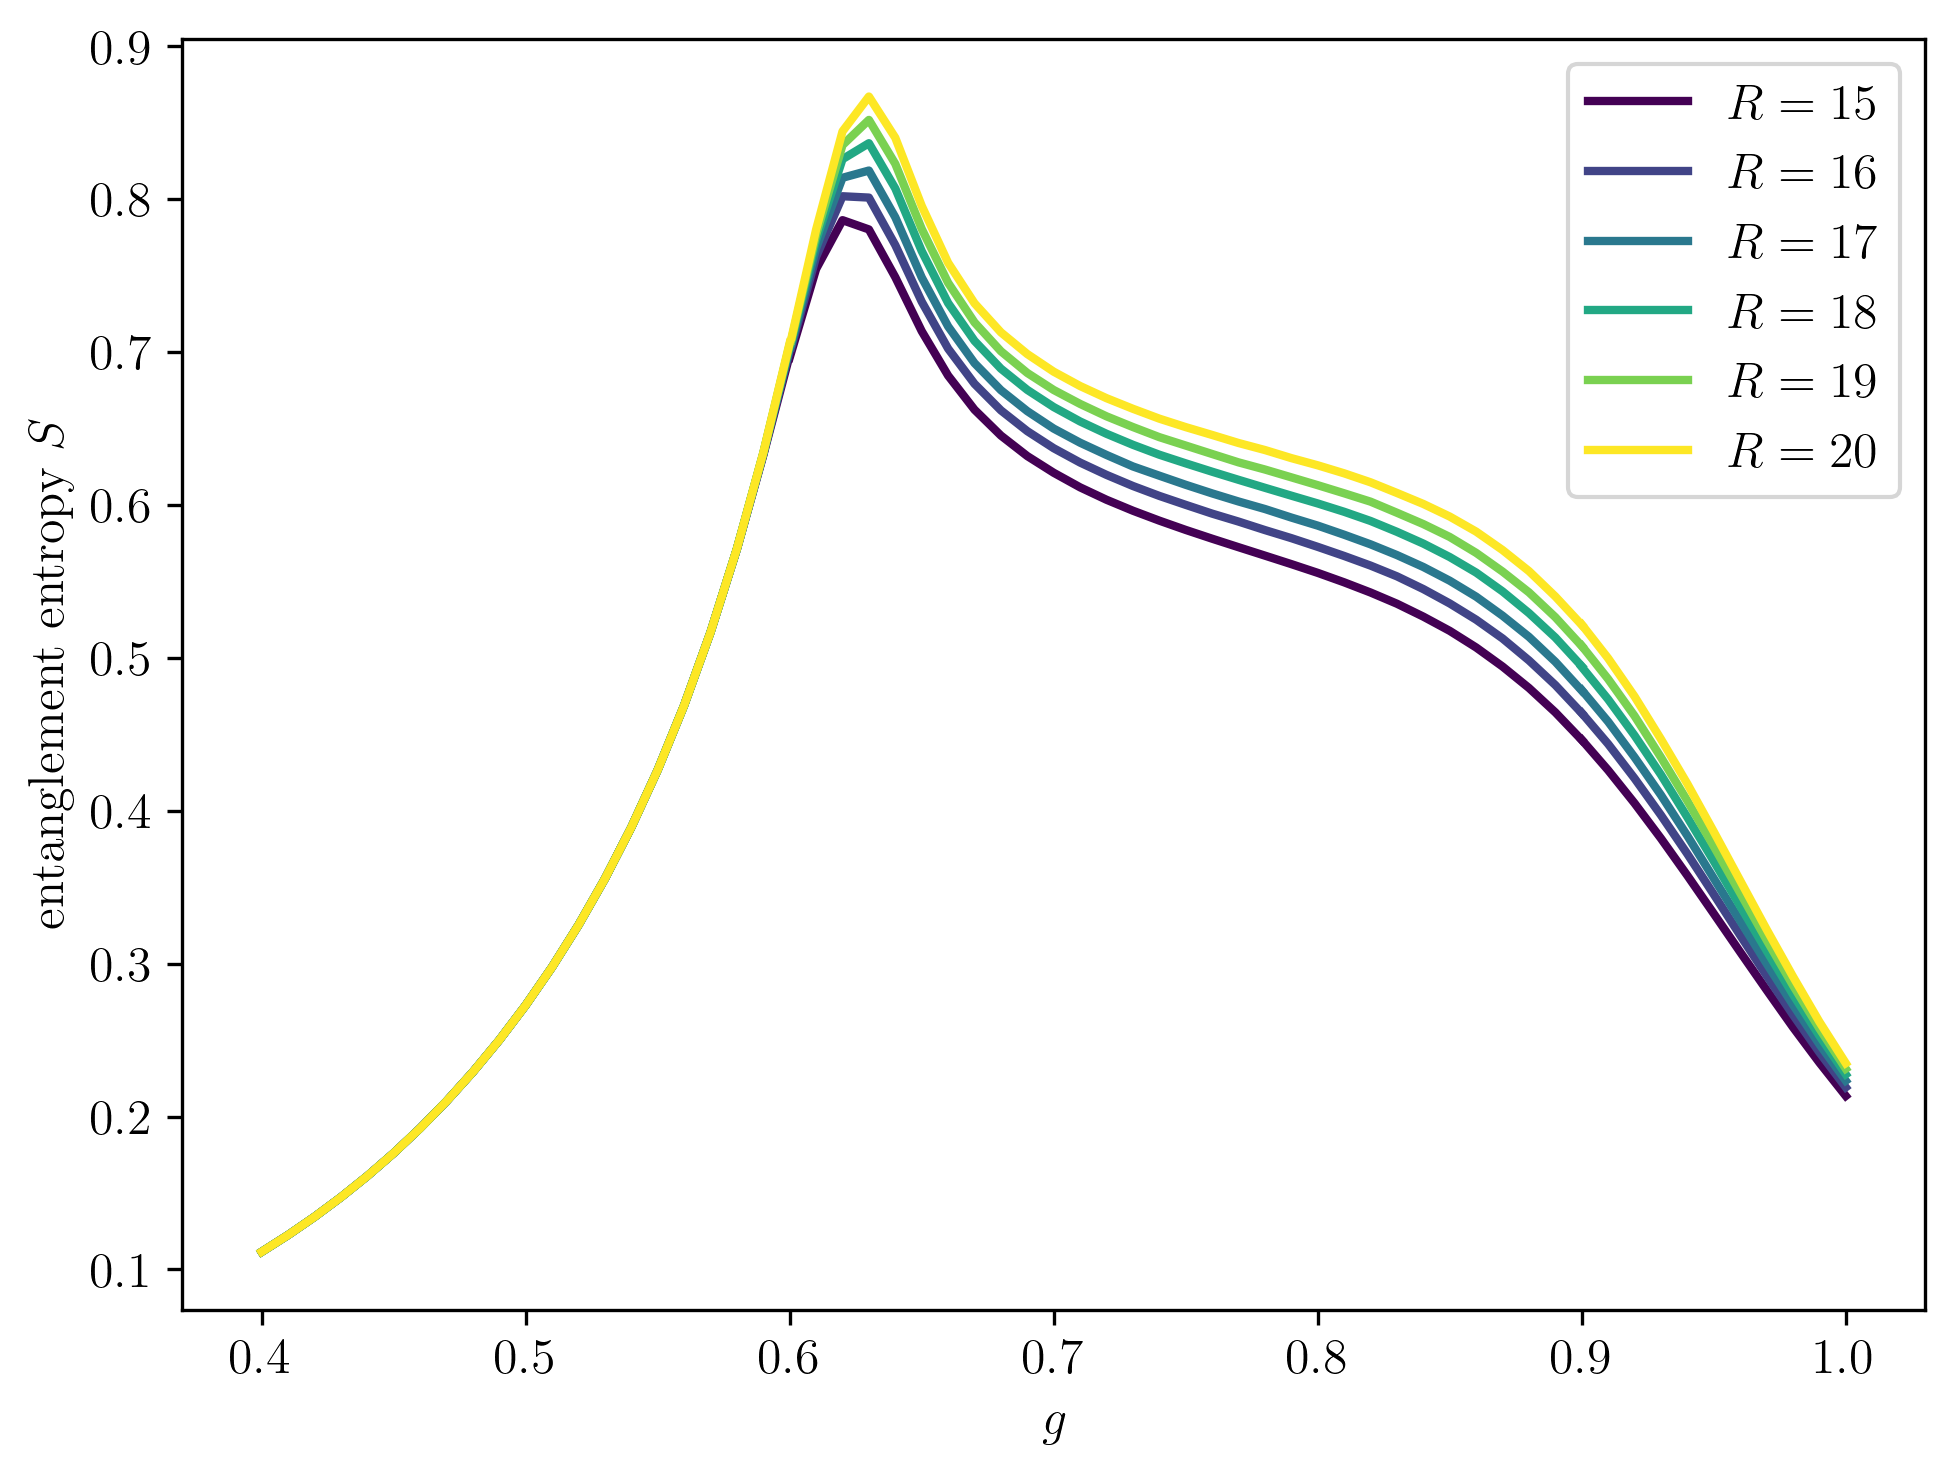

In [137]:
chi = 128
npoints, h_i, h_f = 31, 0.6, 0.9 
gs = np.linspace(h_i,h_f,npoints)
Rs = [15,16,17,18,19,20]
colors = create_sequential_colors(len(Rs))
for i, R in enumerate(Rs):
    s_pbc = entropy(R,l,L,chi,bc,sector,h_i,h_f,npoints,path)
    plt.plot(gs,s_pbc, color=colors[i], linewidth=2, linestyle='-', label=f"$R={R}$")

npoints, h_i, h_f = 21, 0.4, 0.6 
gs = np.linspace(h_i,h_f,npoints)
for i, R in enumerate(Rs):
    s_pbc = entropy(R,l,L,chi,bc,sector,h_i,h_f,npoints,path)
    plt.plot(gs,s_pbc, color=colors[i], linewidth=2, linestyle='-')

npoints, h_i, h_f = 11, 0.9, 1.0 
gs = np.linspace(h_i,h_f,npoints)
for i, R in enumerate(Rs):
    s_pbc = entropy(R,l,L,chi,bc,sector,h_i,h_f,npoints,path)
    plt.plot(gs,s_pbc, color=colors[i], linewidth=2, linestyle='-')

plt.xlabel(r"$g$")
plt.ylabel("entanglement entropy $S$")
plt.legend()

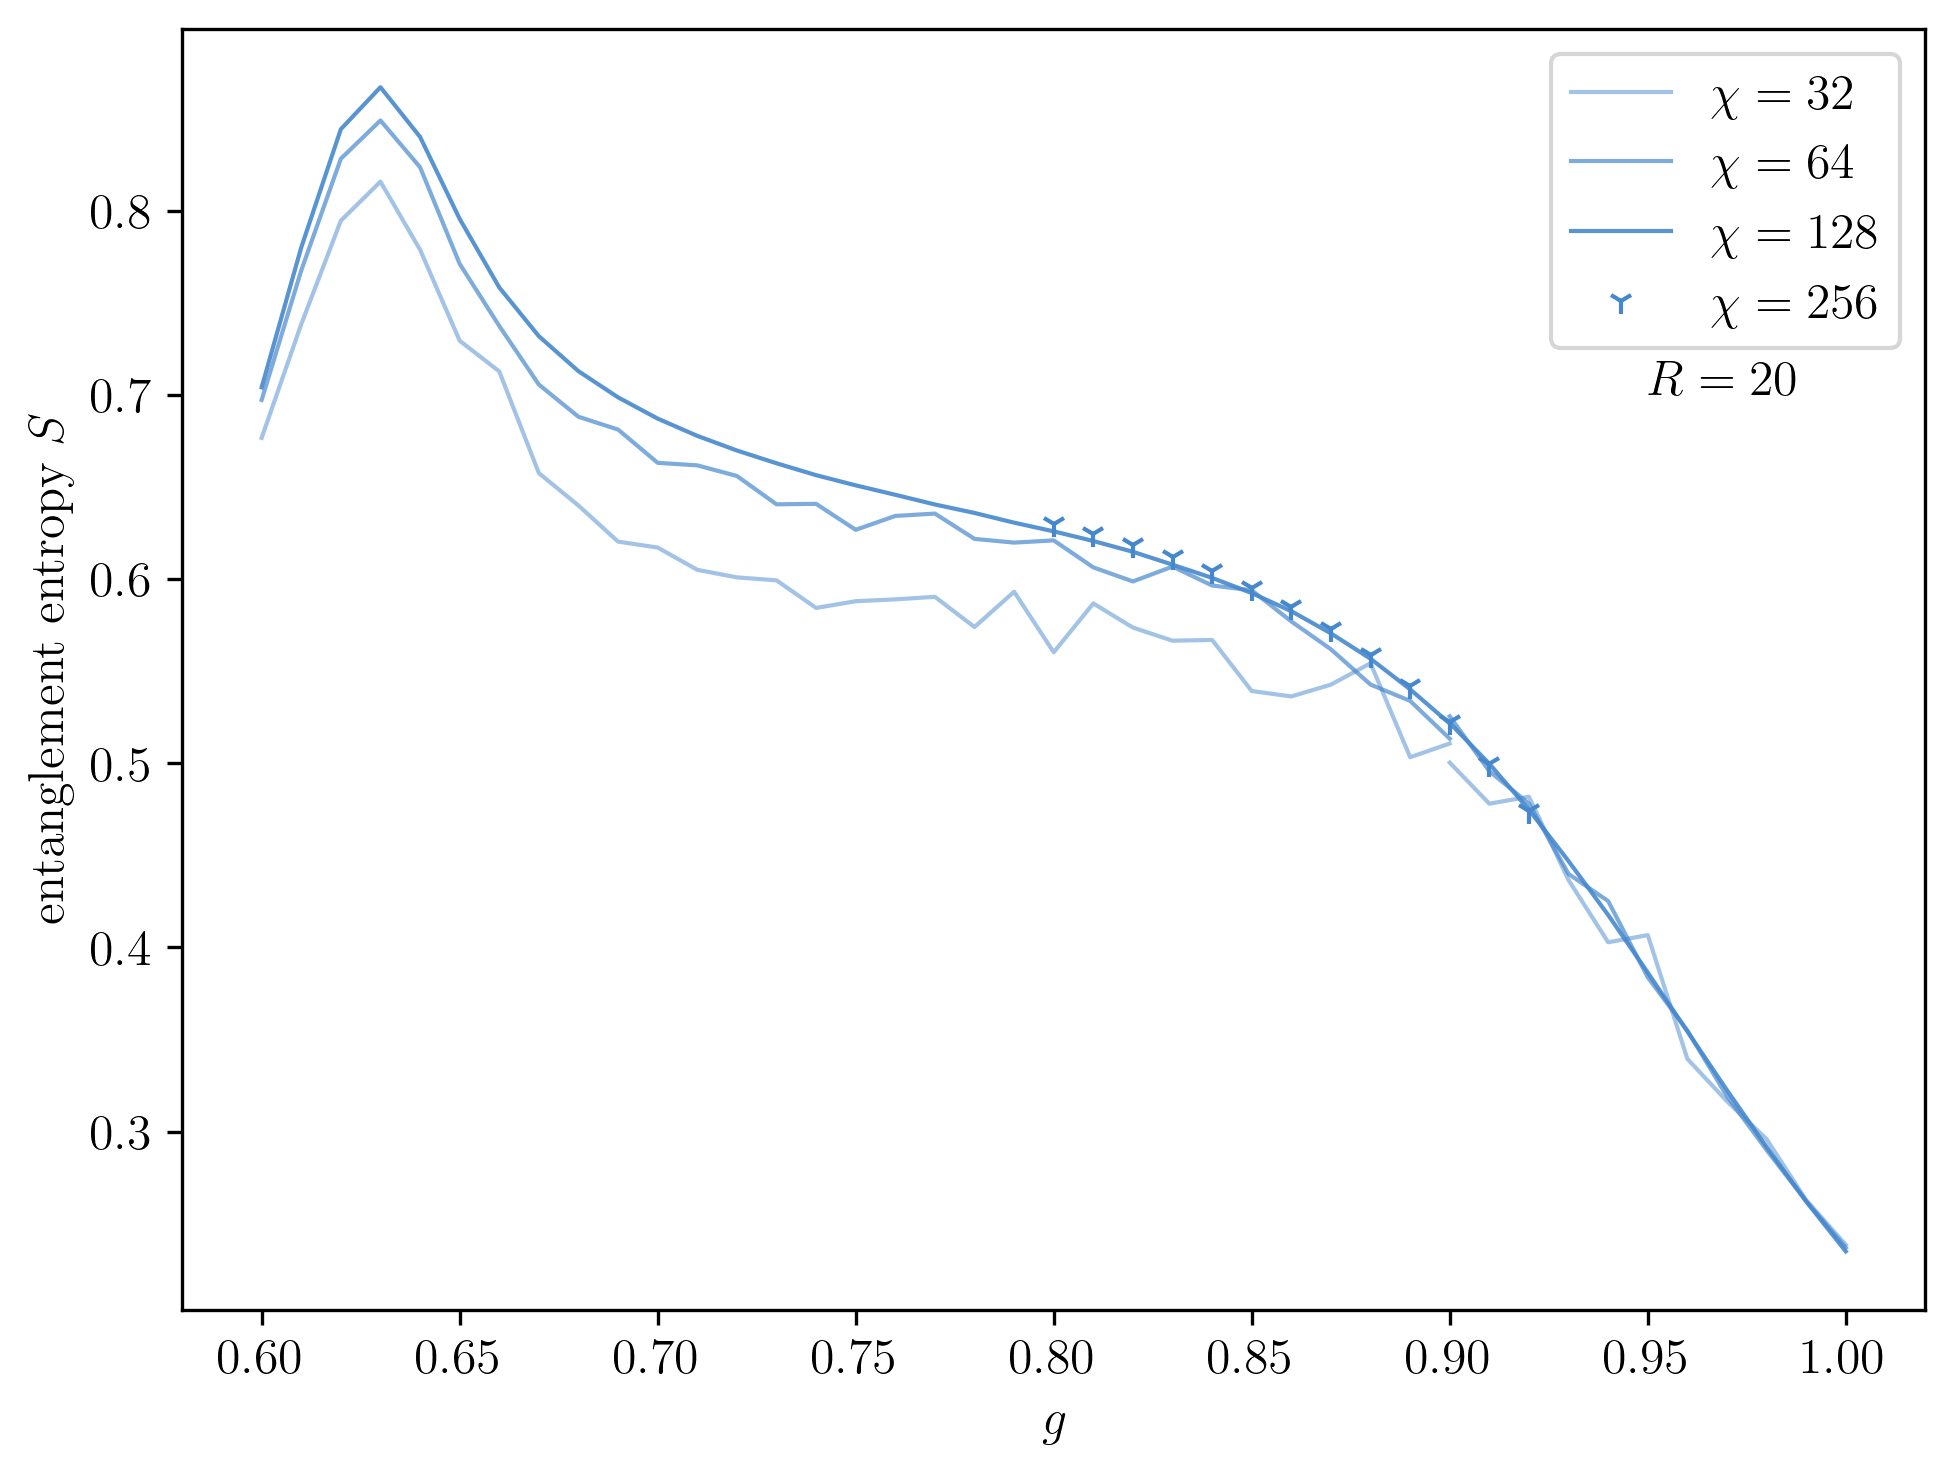

In [88]:
R = 20
chis = [32,64,128]
color = "#4688CE"
npoints, h_i, h_f = 31, 0.6, 0.9
gs = np.linspace(h_i,h_f,npoints)

for j, chi in enumerate(chis):
    s_pbc = entropy(R,l,L,chi,bc,sector,h_i,h_f,npoints,path)
    plt.plot(gs,s_pbc, color=color, linewidth=1, alpha=0.5+0.2*j, linestyle='-', label=f"$\\chi = {chi}$")

npoints, h_i, h_f = 11, 0.9, 1.0
gs = np.linspace(h_i,h_f,npoints)

for j, chi in enumerate(chis):
    s_pbc = entropy(R,l,L,chi,bc,sector,h_i,h_f,npoints,path)
    plt.plot(gs,s_pbc, color=color, linewidth=1, alpha=0.5+0.2*j, linestyle='-')

npoints, h_i, h_f = 2, 0.8, 0.85 
chi = 256
gs = np.linspace(h_i,h_f,npoints)
s_pbc = entropy(R,l,L,chi,bc,sector,h_i,h_f,npoints,path)
plt.plot(gs,s_pbc, color=color, linewidth=1, marker='1', linestyle='', label=f"$\\chi = {chi}$")

npoints, h_i, h_f = 4, 0.81, 0.84 
chi = 256
gs = np.linspace(h_i,h_f,npoints)
s_pbc = entropy(R,l,L,chi,bc,sector,h_i,h_f,npoints,path)
plt.plot(gs,s_pbc, color=color, linewidth=1, marker='1', linestyle='')

npoints, h_i, h_f = 4, 0.86, 0.89 
chi = 256
gs = np.linspace(h_i,h_f,npoints)
s_pbc = entropy(R,l,L,chi,bc,sector,h_i,h_f,npoints,path)
plt.plot(gs,s_pbc, color=color, linewidth=1, marker='1', linestyle='')

npoints, h_i, h_f = 1, 0.9, 0.9 
chi = 256
gs = np.linspace(h_i,h_f,npoints)
s_pbc = entropy(R,l,L,chi,bc,sector,h_i,h_f,npoints,path)
plt.plot(gs,s_pbc, color=color, linewidth=1, marker='1', linestyle='')

npoints, h_i, h_f = 2, 0.91, 0.92 
chi = 256
gs = np.linspace(h_i,h_f,npoints)
s_pbc = entropy(R,l,L,chi,bc,sector,h_i,h_f,npoints,path)
plt.plot(gs,s_pbc, color=color, linewidth=1, marker='1', linestyle='')

plt.text(x=0.95, y=0.7, s=f"$R={R}$")
plt.xlabel(r"$g$")
plt.ylabel("entanglement entropy $S$")
plt.legend()

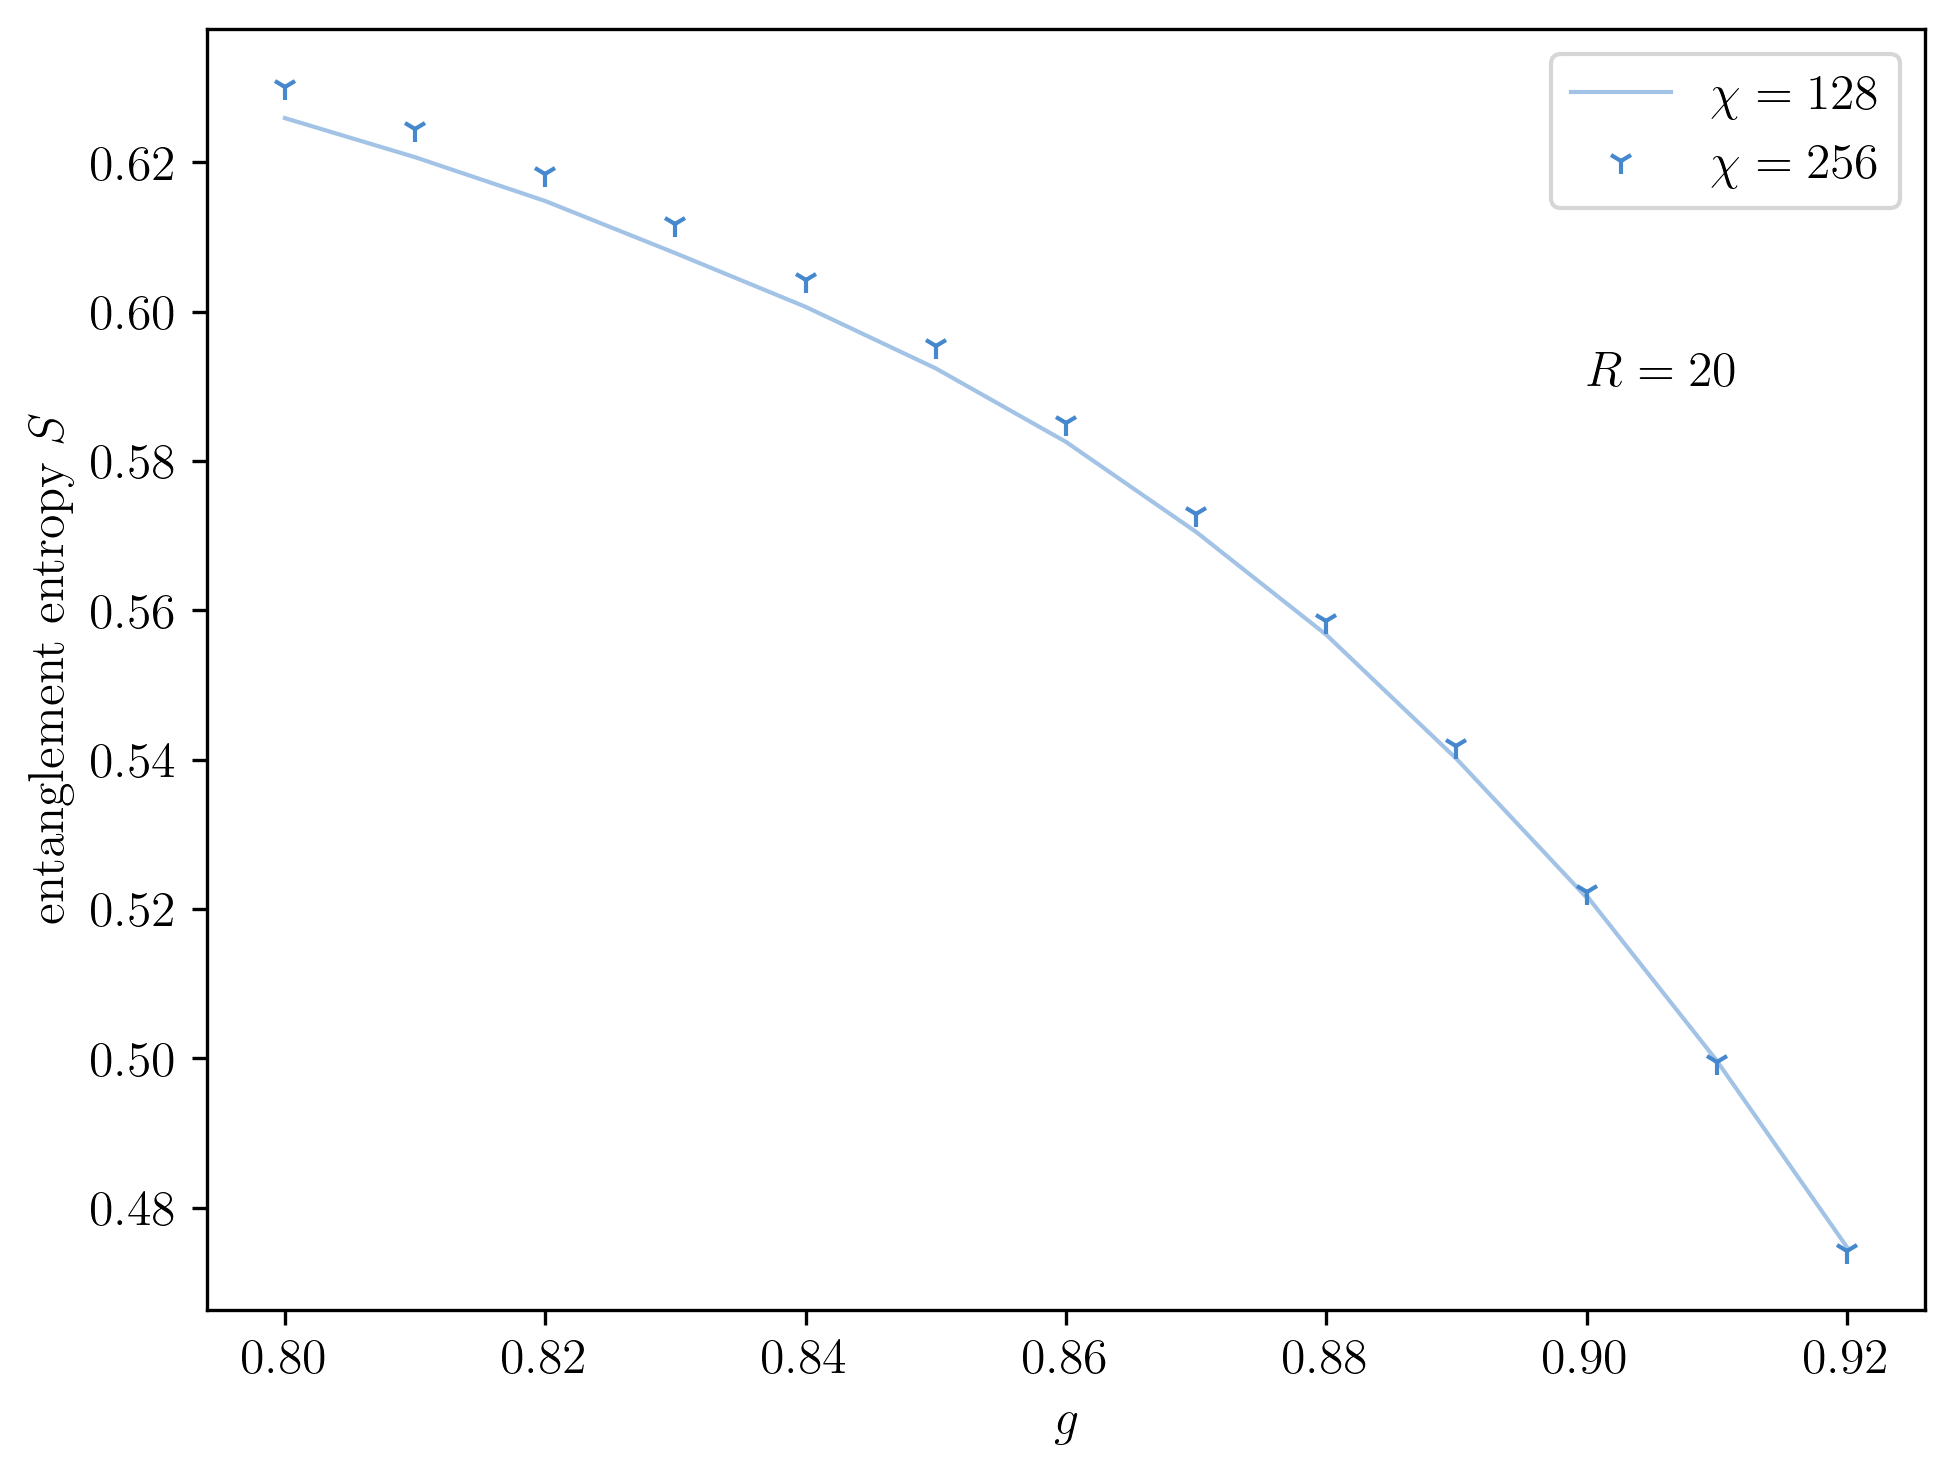

In [92]:
R = 20
chi = 128
color = "#4688CE"
npoints, h_i, h_f = 31, 0.6, 0.9
gs = np.linspace(h_i,h_f,npoints)

s_pbc = entropy(R,l,L,chi,bc,sector,h_i,h_f,npoints,path)
plt.plot(gs[20:],s_pbc[20:], color=color, linewidth=1, alpha=0.5, linestyle='-', label=f"$\\chi = {chi}$")

npoints, h_i, h_f = 11, 0.9, 1.0
gs = np.linspace(h_i,h_f,npoints)

s_pbc = entropy(R,l,L,chi,bc,sector,h_i,h_f,npoints,path)
plt.plot(gs[:3],s_pbc[:3], color=color, linewidth=1, alpha=0.5, linestyle='-')


npoints, h_i, h_f = 2, 0.8, 0.85 
chi = 256
gs = np.linspace(h_i,h_f,npoints)
s_pbc = entropy(R,l,L,chi,bc,sector,h_i,h_f,npoints,path)
plt.plot(gs,s_pbc, color=color, linewidth=1, marker='1', linestyle='', label=f"$\\chi = {chi}$")

npoints, h_i, h_f = 4, 0.81, 0.84 
chi = 256
gs = np.linspace(h_i,h_f,npoints)
s_pbc = entropy(R,l,L,chi,bc,sector,h_i,h_f,npoints,path)
plt.plot(gs,s_pbc, color=color, linewidth=1, marker='1', linestyle='')

npoints, h_i, h_f = 4, 0.86, 0.89 
chi = 256
gs = np.linspace(h_i,h_f,npoints)
s_pbc = entropy(R,l,L,chi,bc,sector,h_i,h_f,npoints,path)
plt.plot(gs,s_pbc, color=color, linewidth=1, marker='1', linestyle='')

npoints, h_i, h_f = 1, 0.9, 0.9 
chi = 256
gs = np.linspace(h_i,h_f,npoints)
s_pbc = entropy(R,l,L,chi,bc,sector,h_i,h_f,npoints,path)
plt.plot(gs,s_pbc, color=color, linewidth=1, marker='1', linestyle='')

npoints, h_i, h_f = 2, 0.91, 0.92
chi = 256
gs = np.linspace(h_i,h_f,npoints)
s_pbc = entropy(R,l,L,chi,bc,sector,h_i,h_f,npoints,path)
plt.plot(gs,s_pbc, color=color, linewidth=1, marker='1', linestyle='')

plt.text(x=0.9, y=0.59, s=f"$R={R}$")
plt.xlabel(r"$g$")
plt.ylabel("entanglement entropy $S$")
plt.legend()

/var/folders/d1/c6hqhfn161x458f4d0m3_rm80000gp/T/ipykernel_1308/2655865656.py:35: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
/var/folders/d1/c6hqhfn161x458f4d0m3_rm80000gp/T/ipykernel_1308/2655865656.py:35: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


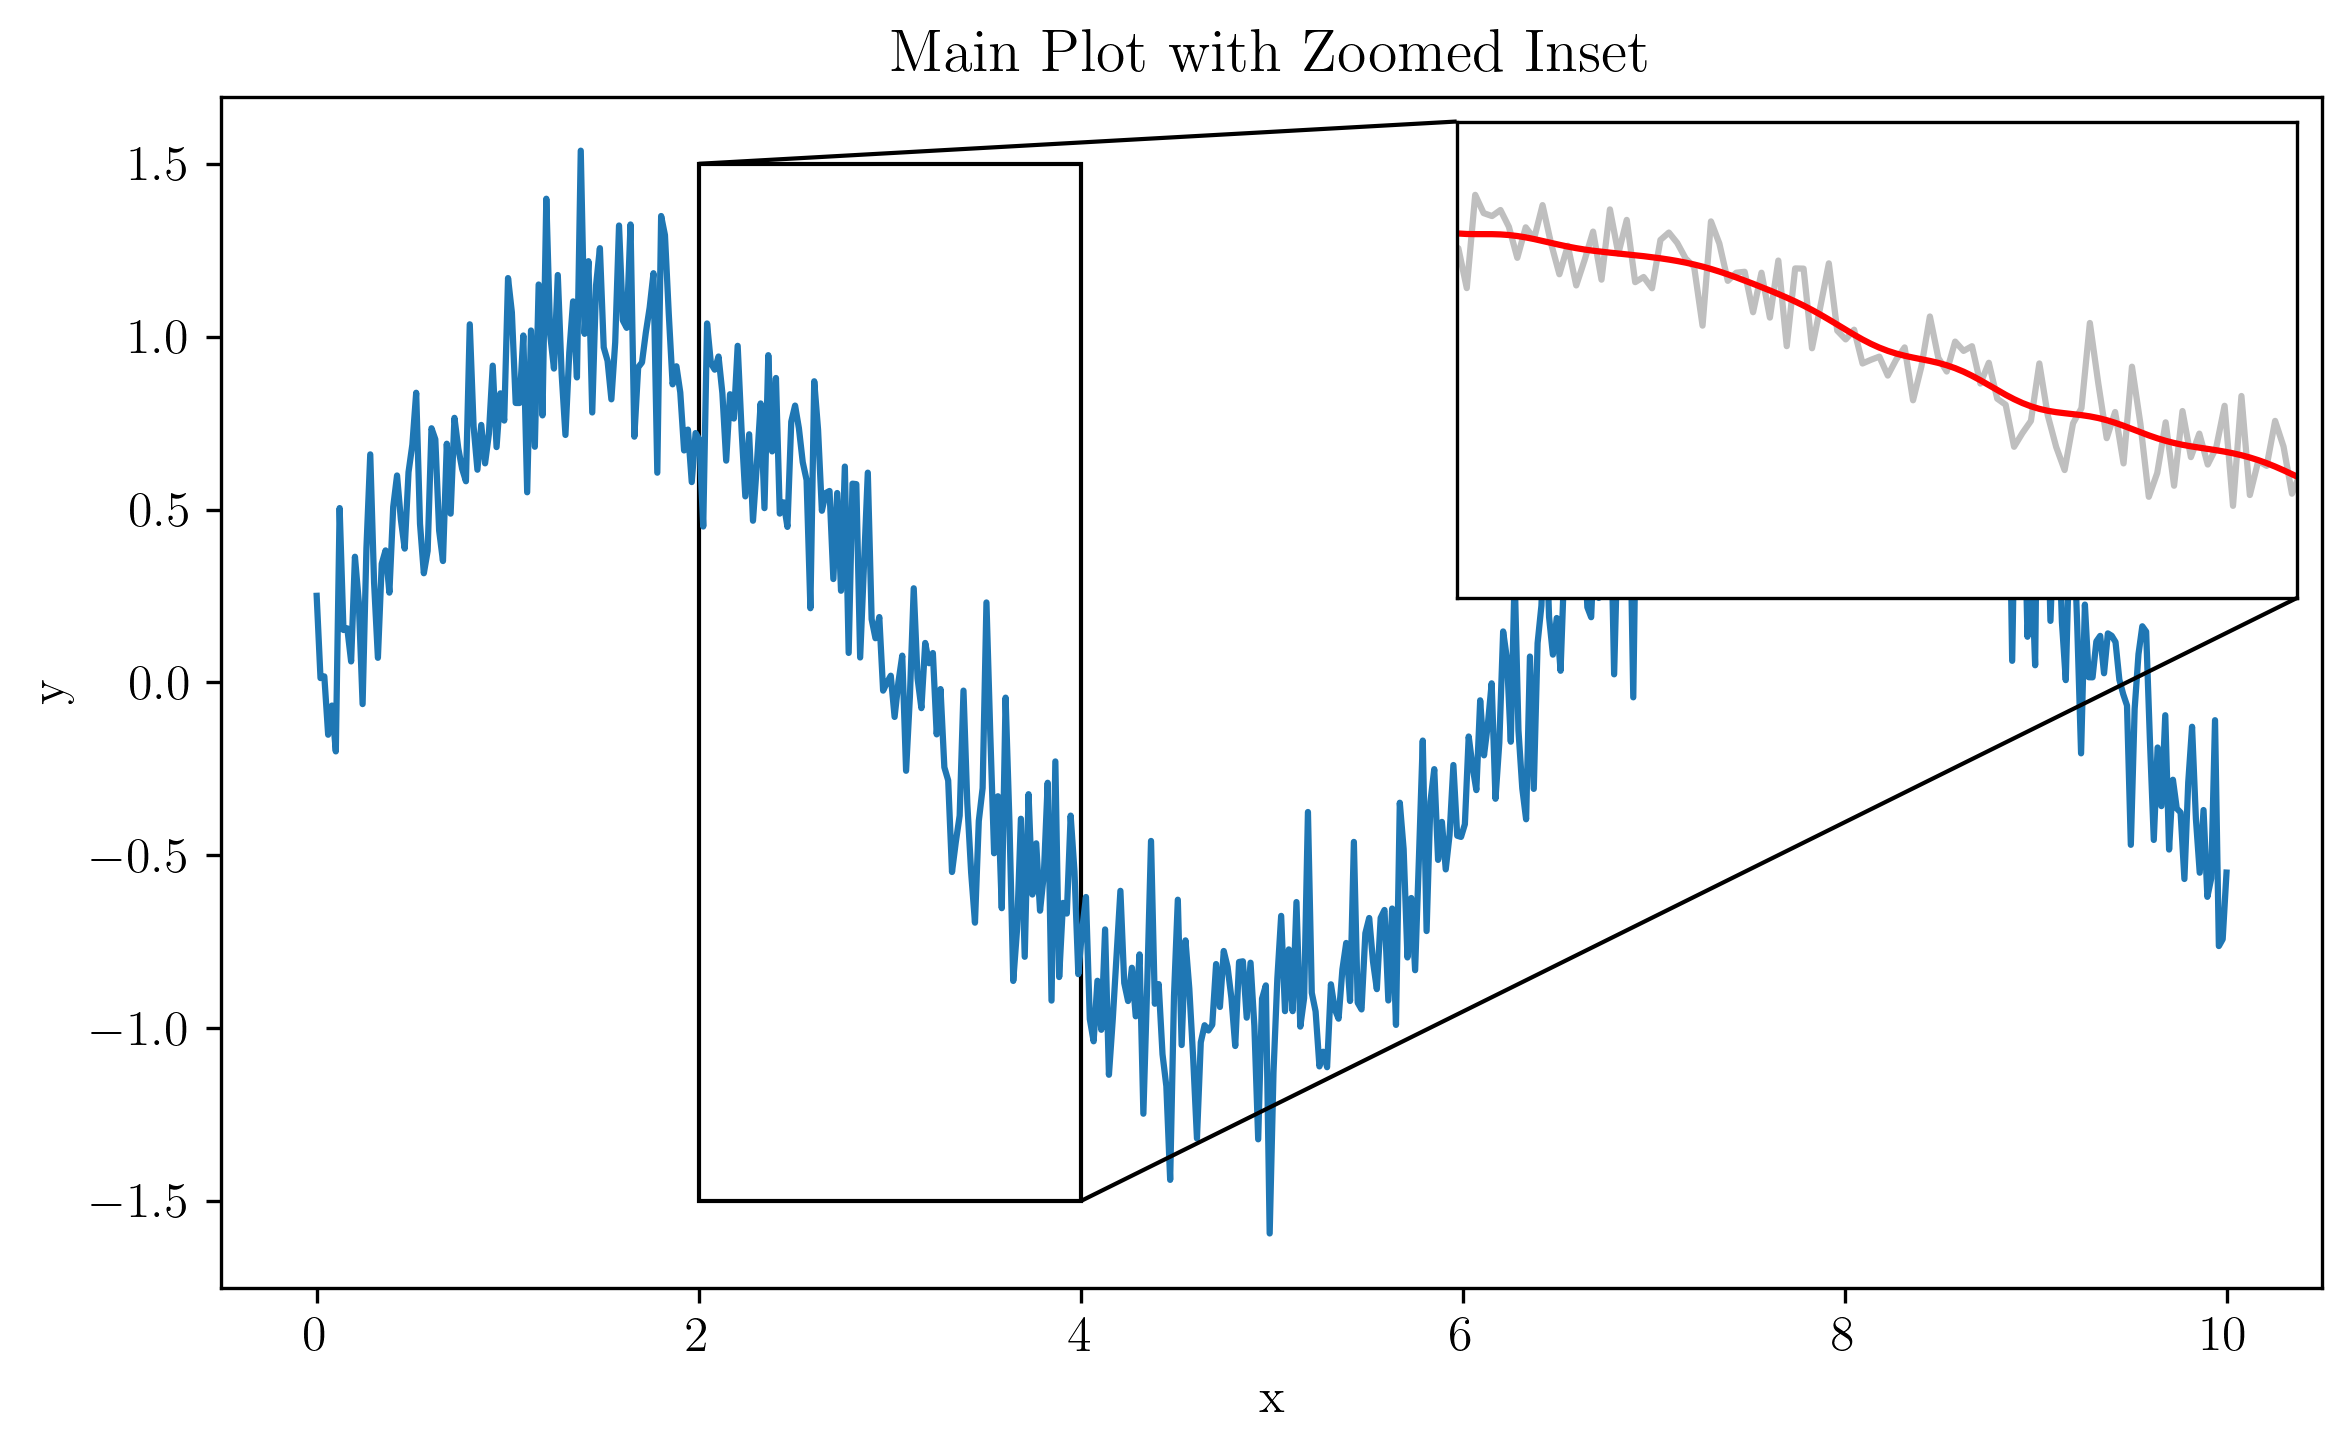

In [376]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset

# Sample data
x = np.linspace(0, 10, 500)
y = np.sin(x) + 0.2 * np.random.randn(500)

# Main plot
fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(x, y, label='Noisy Sine Wave')
ax.set_title('Main Plot with Zoomed Inset')
ax.set_xlabel('x')
ax.set_ylabel('y')

# Zoom region
x1, x2 = 2, 4
y1, y2 = -1.5, 1.5

# Inset plot (zoomed)
axins = inset_axes(ax, width="40%", height="40%", loc='upper right')
axins.plot(x, y, color='gray', alpha=0.5)  # Original curve
# Example of "different characteristic": smooth version
from scipy.ndimage import gaussian_filter1d
y_smooth = gaussian_filter1d(y, sigma=5)
axins.plot(x, y_smooth, color='red', label='Smoothed Curve')
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
axins.set_xticks([])
axins.set_yticks([])

# Mark the zoomed area with a rectangle and connecting lines
mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="black", lw=1)

plt.tight_layout()
plt.show()


/var/folders/d1/c6hqhfn161x458f4d0m3_rm80000gp/T/ipykernel_1308/2296221022.py:96: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()
/var/folders/d1/c6hqhfn161x458f4d0m3_rm80000gp/T/ipykernel_1308/2296221022.py:96: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


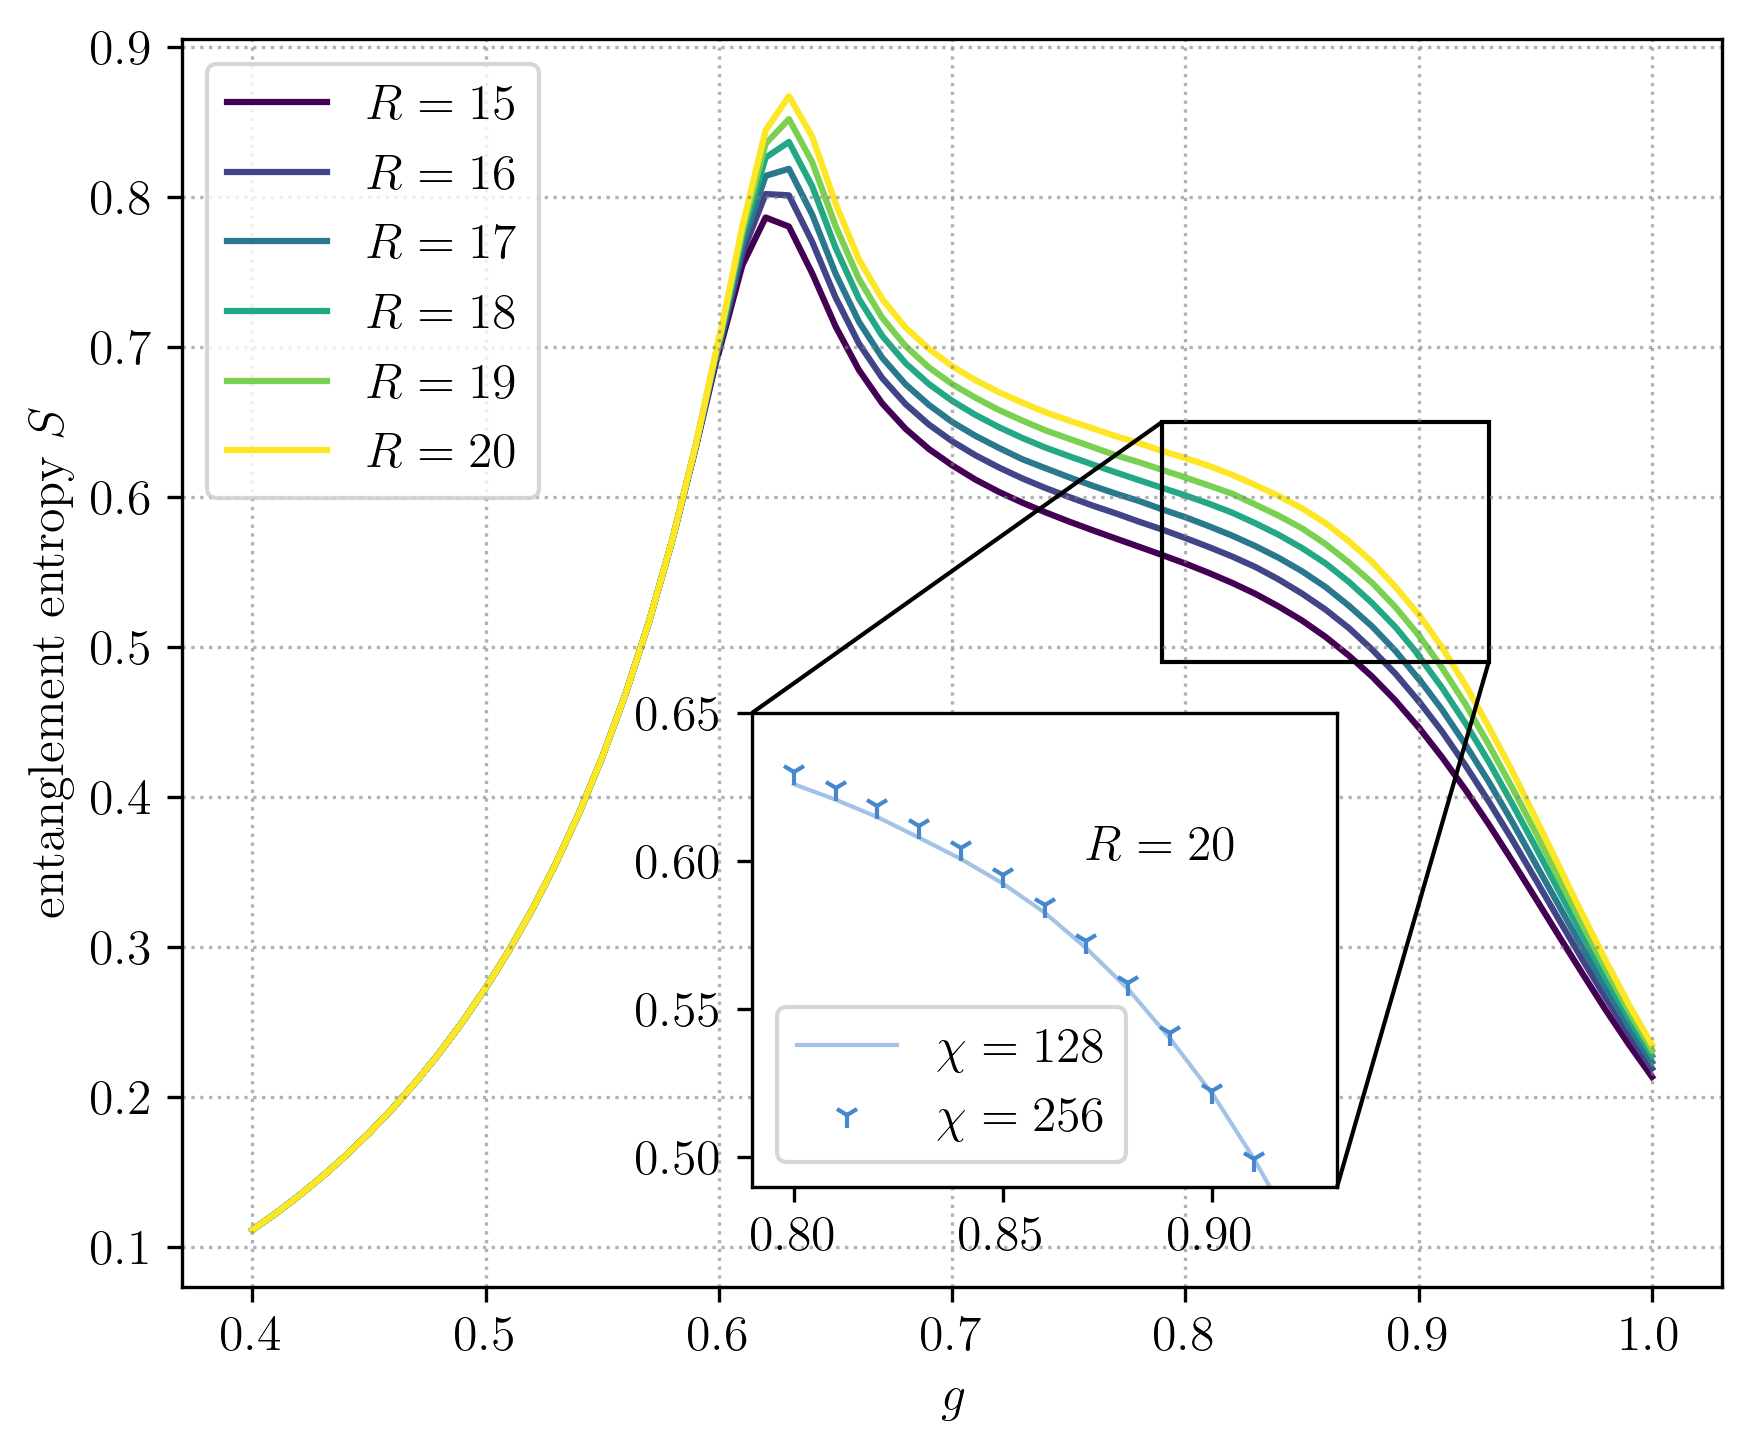

In [ ]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset

fig, ax = plt.subplots(figsize=(6, 5))
ax.grid(color="gray", linestyle=":", alpha=0.6)

chi = 128
npoints, h_i, h_f = 31, 0.6, 0.9 
gs = np.linspace(h_i,h_f,npoints)
Rs = [15,16,17,18,19,20]
colors = create_sequential_colors(len(Rs))
for i, R in enumerate(Rs):
    s_pbc = entropy(R,l,L,chi,bc,sector,h_i,h_f,npoints,path)
    ax.plot(gs,s_pbc, color=colors[i], linewidth=1.5, linestyle='-', label=f"$R={R}$", zorder=0)

npoints, h_i, h_f = 21, 0.4, 0.6 
gs = np.linspace(h_i,h_f,npoints)
for i, R in enumerate(Rs):
    s_pbc = entropy(R,l,L,chi,bc,sector,h_i,h_f,npoints,path)
    ax.plot(gs,s_pbc, color=colors[i], linewidth=1.5, linestyle='-', zorder=0)

npoints, h_i, h_f = 11, 0.9, 1.0 
gs = np.linspace(h_i,h_f,npoints)
for i, R in enumerate(Rs):
    s_pbc = entropy(R,l,L,chi,bc,sector,h_i,h_f,npoints,path)
    ax.plot(gs,s_pbc, color=colors[i], linewidth=1.5, linestyle='-', zorder=0)


# Zoom region
x1, x2 = 0.79, 0.93
y1, y2 = 0.49, 0.65

# Inset plot (zoomed)
axins = inset_axes(ax, width="38%", height="38%", bbox_to_anchor=(0.06, -0.23, 1, 1), 
                   bbox_transform=ax.transAxes, 
                   loc='center')

R = 20
chi = 128
color = "#4688CE"
npoints, h_i, h_f = 31, 0.6, 0.9
gs = np.linspace(h_i,h_f,npoints)

s_pbc = entropy(R,l,L,chi,bc,sector,h_i,h_f,npoints,path)
axins.plot(gs[20:],s_pbc[20:], color=color, linewidth=1, alpha=0.5, linestyle='-', label=f"$\\chi = {chi}$")

npoints, h_i, h_f = 11, 0.9, 1.0
gs = np.linspace(h_i,h_f,npoints)

s_pbc = entropy(R,l,L,chi,bc,sector,h_i,h_f,npoints,path)
axins.plot(gs[:3],s_pbc[:3], color=color, linewidth=1, alpha=0.5, linestyle='-')


npoints, h_i, h_f = 2, 0.8, 0.85 
chi = 256
gs = np.linspace(h_i,h_f,npoints)
s_pbc = entropy(R,l,L,chi,bc,sector,h_i,h_f,npoints,path)
axins.plot(gs,s_pbc, color=color, marker='1', markersize=6, linestyle='', label=f"$\\chi = {chi}$")

npoints, h_i, h_f = 4, 0.81, 0.84 
chi = 256
gs = np.linspace(h_i,h_f,npoints)
s_pbc = entropy(R,l,L,chi,bc,sector,h_i,h_f,npoints,path)
axins.plot(gs,s_pbc, color=color, marker='1', markersize=6, linestyle='')

npoints, h_i, h_f = 4, 0.86, 0.89 
chi = 256
gs = np.linspace(h_i,h_f,npoints)
s_pbc = entropy(R,l,L,chi,bc,sector,h_i,h_f,npoints,path)
axins.plot(gs,s_pbc, color=color, marker='1', markersize=6, linestyle='')

npoints, h_i, h_f = 1, 0.9, 0.9
chi = 256
gs = np.linspace(h_i,h_f,npoints)
s_pbc = entropy(R,l,L,chi,bc,sector,h_i,h_f,npoints,path)
axins.plot(gs,s_pbc, color=color, marker='1', markersize=6, linestyle='')

npoints, h_i, h_f = 2, 0.91, 0.92
chi = 256
gs = np.linspace(h_i,h_f,npoints)
s_pbc = entropy(R,l,L,chi,bc,sector,h_i,h_f,npoints,path)
axins.plot(gs,s_pbc, color=color, marker='1', markersize=6, linestyle='')

axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
axins.text(x=0.87, y=0.6, s=f"$R={R}$")

axins.legend()

# Mark the zoomed area with a rectangle and connecting lines
mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="black", lw=1)

ax.legend()
ax.set_xlabel(r"$g$")
ax.set_ylabel("entanglement entropy $S$")

fig.tight_layout()
fig.savefig(f"{path_figures}/figures/entropy/entropy_different_Rs_{l}x{L}_chis_128-256.pdf", bbox_inches="tight")


/var/folders/d1/c6hqhfn161x458f4d0m3_rm80000gp/T/ipykernel_1308/3242603923.py:135: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


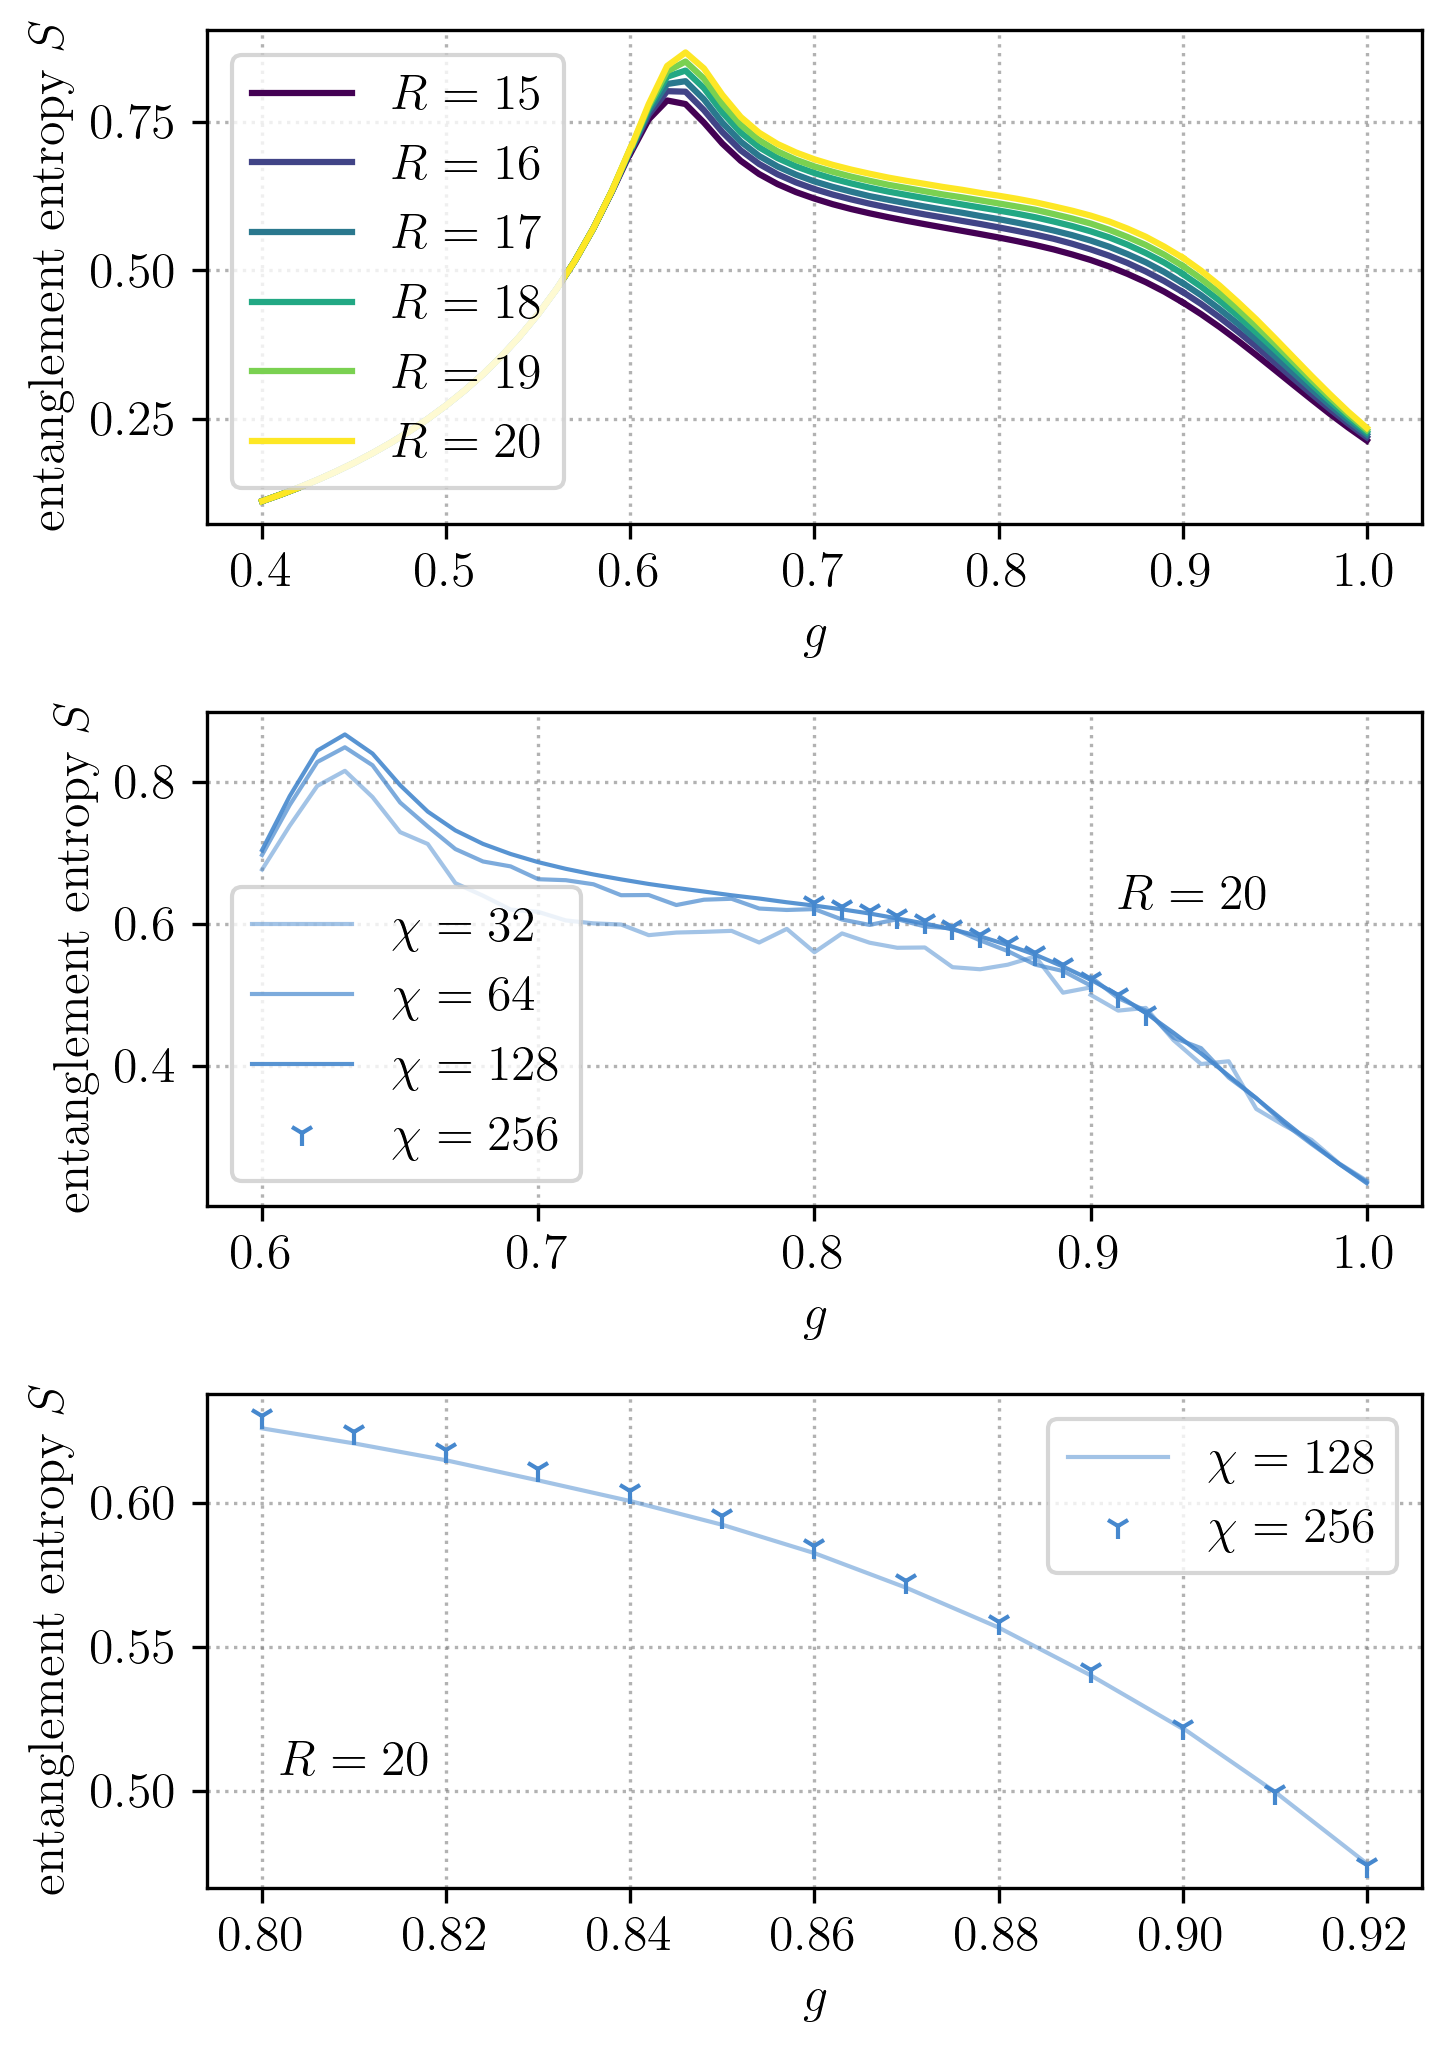

In [406]:
fig, axs = plt.subplots(3, 1, figsize=(5, 7))

for ax in axs:
    ax.grid(color="gray", linestyle=":", alpha=0.6)

chi = 128
npoints, h_i, h_f = 31, 0.6, 0.9 
gs = np.linspace(h_i,h_f,npoints)
Rs = [15,16,17,18,19,20]
colors = create_sequential_colors(len(Rs))
for i, R in enumerate(Rs):
    s_pbc = entropy(R,l,L,chi,bc,sector,h_i,h_f,npoints,path)
    axs[0].plot(gs,s_pbc, color=colors[i], linewidth=1.5, linestyle='-', label=f"$R={R}$")

npoints, h_i, h_f = 21, 0.4, 0.6 
gs = np.linspace(h_i,h_f,npoints)
for i, R in enumerate(Rs):
    s_pbc = entropy(R,l,L,chi,bc,sector,h_i,h_f,npoints,path)
    axs[0].plot(gs,s_pbc, color=colors[i], linewidth=1.5, linestyle='-')

npoints, h_i, h_f = 11, 0.9, 1.0 
gs = np.linspace(h_i,h_f,npoints)
for i, R in enumerate(Rs):
    s_pbc = entropy(R,l,L,chi,bc,sector,h_i,h_f,npoints,path)
    axs[0].plot(gs,s_pbc, color=colors[i], linewidth=1.5, linestyle='-')

axs[0].legend()
axs[0].set_xlabel(r"$g$")
axs[0].set_ylabel("entanglement entropy $S$")


R = 20
chis = [32,64,128]
color = "#4688CE"
npoints, h_i, h_f = 31, 0.6, 0.9
gs = np.linspace(h_i,h_f,npoints)

for j, chi in enumerate(chis):
    s_pbc = entropy(R,l,L,chi,bc,sector,h_i,h_f,npoints,path)
    axs[1].plot(gs,s_pbc, color=color, linewidth=1, alpha=0.5+0.2*j, linestyle='-', label=f"$\\chi = {chi}$")

npoints, h_i, h_f = 11, 0.9, 1.0
gs = np.linspace(h_i,h_f,npoints)

for j, chi in enumerate(chis):
    s_pbc = entropy(R,l,L,chi,bc,sector,h_i,h_f,npoints,path)
    axs[1].plot(gs,s_pbc, color=color, linewidth=1, alpha=0.5+0.2*j, linestyle='-')

npoints, h_i, h_f = 2, 0.8, 0.85 
chi = 256
gs = np.linspace(h_i,h_f,npoints)
s_pbc = entropy(R,l,L,chi,bc,sector,h_i,h_f,npoints,path)
axs[1].plot(gs,s_pbc, color=color, linewidth=1, marker='1', linestyle='', label=f"$\\chi = {chi}$")

npoints, h_i, h_f = 4, 0.81, 0.84 
chi = 256
gs = np.linspace(h_i,h_f,npoints)
s_pbc = entropy(R,l,L,chi,bc,sector,h_i,h_f,npoints,path)
axs[1].plot(gs,s_pbc, color=color, linewidth=1, marker='1', linestyle='')

npoints, h_i, h_f = 4, 0.86, 0.89 
chi = 256
gs = np.linspace(h_i,h_f,npoints)
s_pbc = entropy(R,l,L,chi,bc,sector,h_i,h_f,npoints,path)
axs[1].plot(gs,s_pbc, color=color, linewidth=1, marker='1', linestyle='')

npoints, h_i, h_f = 1, 0.9, 0.9 
chi = 256
gs = np.linspace(h_i,h_f,npoints)
s_pbc = entropy(R,l,L,chi,bc,sector,h_i,h_f,npoints,path)
axs[1].plot(gs,s_pbc, color=color, linewidth=1, marker='1', linestyle='')

npoints, h_i, h_f = 2, 0.91, 0.92 
chi = 256
gs = np.linspace(h_i,h_f,npoints)
s_pbc = entropy(R,l,L,chi,bc,sector,h_i,h_f,npoints,path)
axs[1].plot(gs,s_pbc, color=color, linewidth=1, marker='1', linestyle='')

axs[1].legend()
axs[1].set_xlabel(r"$g$")
axs[1].set_ylabel("entanglement entropy $S$")
axs[1].text(x=0.91, y=0.62, s=f"$R={R}$")

R = 20
chi = 128
color = "#4688CE"
npoints, h_i, h_f = 31, 0.6, 0.9
gs = np.linspace(h_i,h_f,npoints)

s_pbc = entropy(R,l,L,chi,bc,sector,h_i,h_f,npoints,path)
axs[2].plot(gs[20:],s_pbc[20:], color=color, linewidth=1, alpha=0.5, linestyle='-', label=f"$\\chi = {chi}$")

npoints, h_i, h_f = 11, 0.9, 1.0
gs = np.linspace(h_i,h_f,npoints)

s_pbc = entropy(R,l,L,chi,bc,sector,h_i,h_f,npoints,path)
axs[2].plot(gs[:3],s_pbc[:3], color=color, linewidth=1, alpha=0.5, linestyle='-')


npoints, h_i, h_f = 2, 0.8, 0.85 
chi = 256
gs = np.linspace(h_i,h_f,npoints)
s_pbc = entropy(R,l,L,chi,bc,sector,h_i,h_f,npoints,path)
axs[2].plot(gs,s_pbc, color=color, linewidth=1, marker='1', linestyle='', label=f"$\\chi = {chi}$")

npoints, h_i, h_f = 4, 0.81, 0.84 
chi = 256
gs = np.linspace(h_i,h_f,npoints)
s_pbc = entropy(R,l,L,chi,bc,sector,h_i,h_f,npoints,path)
axs[2].plot(gs,s_pbc, color=color, linewidth=1, marker='1', linestyle='')

npoints, h_i, h_f = 4, 0.86, 0.89 
chi = 256
gs = np.linspace(h_i,h_f,npoints)
s_pbc = entropy(R,l,L,chi,bc,sector,h_i,h_f,npoints,path)
axs[2].plot(gs,s_pbc, color=color, linewidth=1, marker='1', linestyle='')

npoints, h_i, h_f = 1, 0.9, 0.9 
chi = 256
gs = np.linspace(h_i,h_f,npoints)
s_pbc = entropy(R,l,L,chi,bc,sector,h_i,h_f,npoints,path)
axs[2].plot(gs,s_pbc, color=color, linewidth=1, marker='1', linestyle='')

npoints, h_i, h_f = 2, 0.91, 0.92
chi = 256
gs = np.linspace(h_i,h_f,npoints)
s_pbc = entropy(R,l,L,chi,bc,sector,h_i,h_f,npoints,path)
axs[2].plot(gs,s_pbc, color=color, linewidth=1, marker='1', linestyle='')

axs[2].legend()
axs[2].set_xlabel(r"$g$")
axs[2].set_ylabel("entanglement entropy $S$")
axs[2].text(x=0.802, y=0.505, s=f"$R={R}$")

fig.tight_layout()
fig.savefig(f"{path_figures}/figures/entropy/entropy_different_zooms_{l}x{L}_chis_32-64-128-256.pdf", bbox_inches="tight")

### EE obc vs pbc in two-particle sector

0.8500000000000001
0.8300000000000001
cy given: [3, 3]
0.8137931034482759


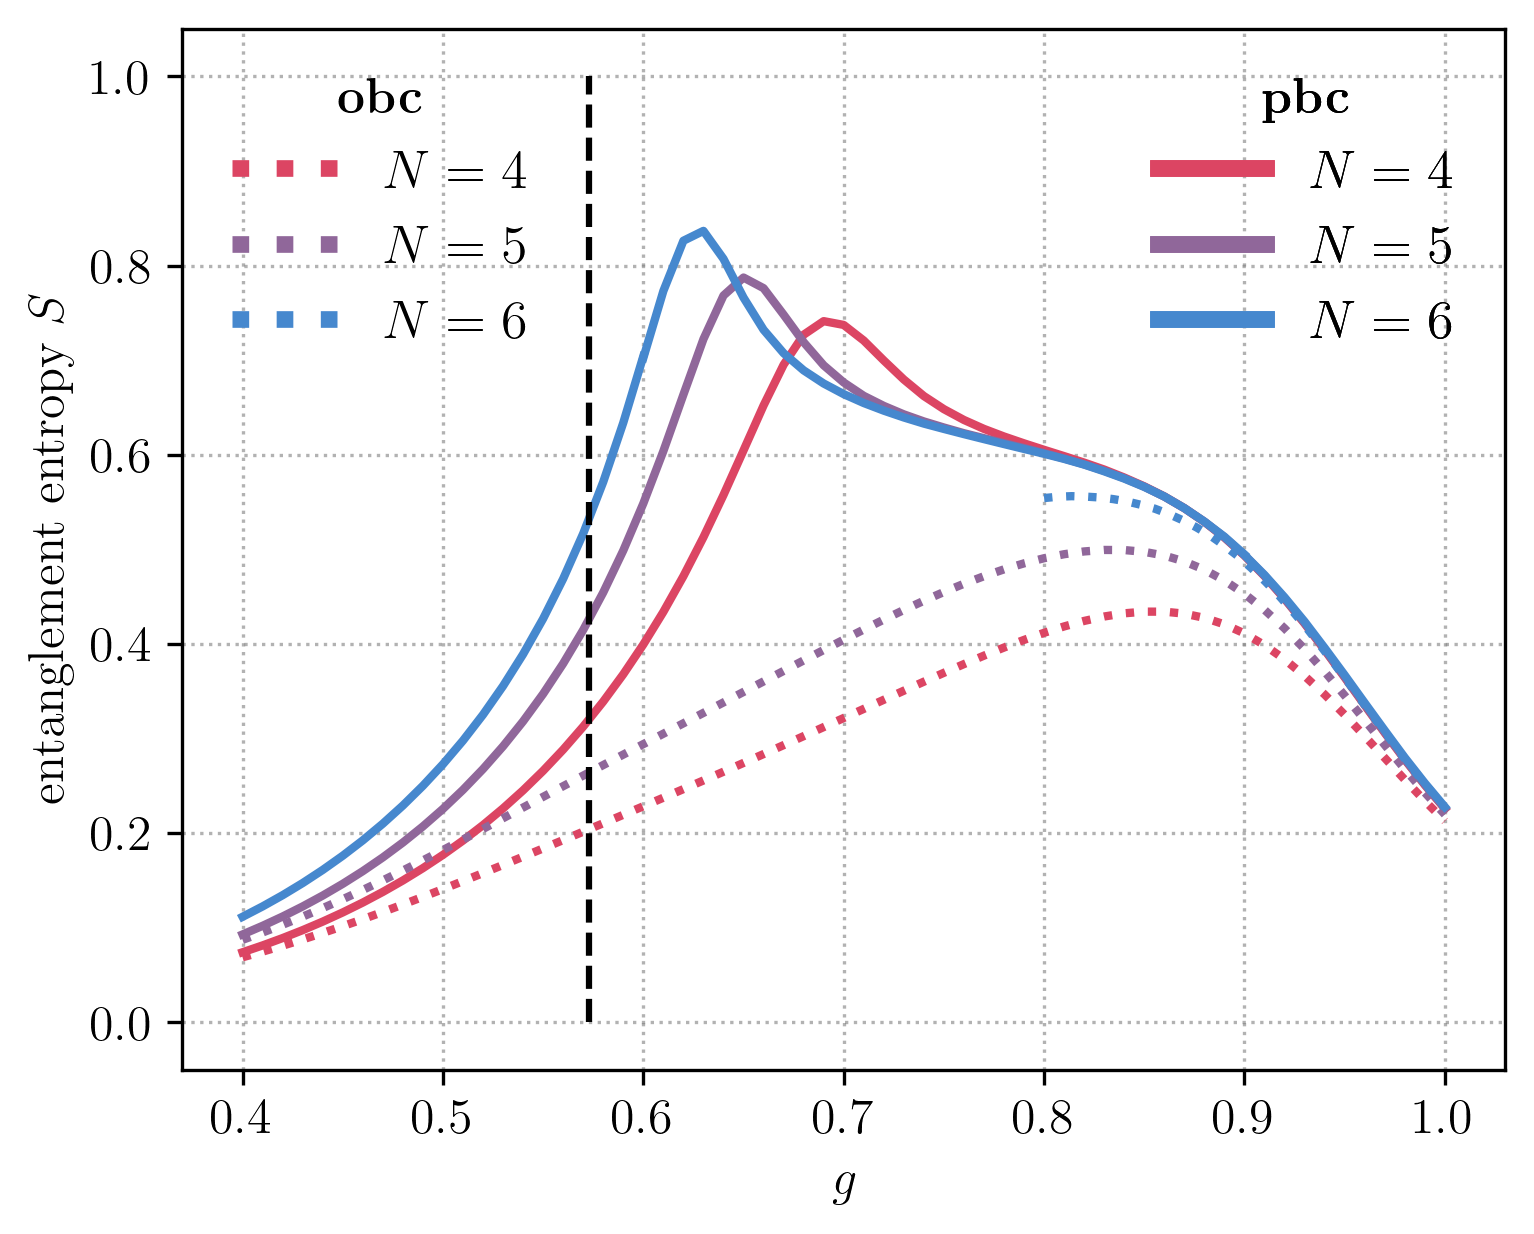

In [ ]:
colors = ["yellowgreen", "darkcyan", "firebrick", "darkorchid"]
colorss = [["#4688CE","#4696CE","#46A8CE","#46CACF"],["#AD5A85","#C86799","#E575AF","#FF82C3"],["#90679A","#A979B5","#C78FD5","#DD9FEC"],["#DC4563","#E45A70","#ED7580","#F68F8F"]]
colorss.reverse()

fig, ax = plt.subplots(figsize=(5, 4))
ax.grid(color="gray", linestyle=":", alpha=0.6)

chi = 128
npoints, h_i, h_f = 61, 0.4, 1.0
interval = np.linspace(h_i,h_f,npoints)
gs = interval
ls = [4,5]
L = 30
R_vac = 0
R = 18
Rs = [18, 20, 22, 24]
sector_vac = "vacuum_sector"
sector = "2_particle(s)_sector"
# cx = None
# cy = None


for i, l in enumerate(ls):
    bc = "obc"
    s_obc = entropy(R,l,L,chi,bc,sector,h_i,h_f,npoints,path)
    idx_max = np.argmax(s_obc)
    print(gs[idx_max])
    ax.plot(gs,s_obc, color=colorss[i][0], linewidth=2, markersize=5, linestyle=':', label=f"$l: {l}, \chi: {chi}$")
    
    bc = "pbc"
    # s_vac = entropy(R_vac,l,L,chi,bc,sector_vac,h_i,h_f,npoints,path_tensor)
    s_pbc = entropy(R,l,L,chi,bc,sector,h_i,h_f,npoints,path)
    ax.plot(gs,s_pbc, color=colorss[i][0], linewidth=2, markersize=5, linestyle='-', label=f"$l: {l}, \chi: {chi}$")
    # ax.plot(gs,s_vac, color=colors[i], linewidth=1, markersize=5, linestyle='-', label=f"vacuum $l: {l}$")


# free param
L = 30
# secondary fixed params

# fixed params
l = 6
i = 3

bc = "obc"

npoints, h_i, h_f = 30, 0.8, 1.0
# npoints, h_i, h_f = 51, 0.6, 1.2
chi = 128
# chi = 32
gs = np.linspace(h_i,h_f,npoints)
path_drive = "/Users/fradm/Google Drive/My Drive/projects/1_Z2"
s_obc = entropy(R,l,L,chi,bc,sector,h_i,h_f,npoints,path_drive, cy=[3,3])
idx_max = np.argmax(s_obc)
print(gs[idx_max])
ax.plot(gs,s_obc, color=colorss[i][0], linewidth=2, markersize=5, linestyle=':', label=f"$l: {l}, \chi: {chi}$")

bc = "pbc"
chi = 128
npoints, h_i, h_f = 21, 0.4, 0.6
gs = np.linspace(h_i,h_f,npoints)
s_pbc = entropy(R,l,L,chi,bc,sector,h_i,h_f,npoints,path)
ax.plot(gs,s_pbc, color=colorss[i][0], linewidth=2, markersize=5, linestyle='-', label=f"$l: {l}, \chi: {chi}$")

npoints, h_i, h_f = 31, 0.6, 0.9
gs = np.linspace(h_i,h_f,npoints)
s_pbc = entropy(R,l,L,chi,bc,sector,h_i,h_f,npoints,path)
ax.plot(gs,s_pbc, color=colorss[i][0], linewidth=2, markersize=5, linestyle='-')

npoints, h_i, h_f = 11, 0.9, 1.0
gs = np.linspace(h_i,h_f,npoints)
s_pbc = entropy(R,l,L,chi,bc,sector,h_i,h_f,npoints,path)
ax.plot(gs,s_pbc, color=colorss[i][0], linewidth=2, markersize=5, linestyle='-')

ax.vlines(x=0.5731, ymin=0, ymax=1, linestyles="--", colors='black', linewidth=1.5, label="deconfinement $g_c$")

ls = [4,5,6]

from matplotlib.lines import Line2D
# Create legend handles
colors = ["#DC4563","#90679A","#4688CE"]
handles1 = [Line2D([0], [0], color=colors[i], lw=4, ls=":", label=f'$N = {ls[i]}$') for i in range(len(ls))]
handles2 = [Line2D([0], [0], color=colors[i], lw=4, label=f'$N = {ls[i]}$') for i in range(len(ls))]

# Create the two separate legends
legend1 = ax.legend(handles=handles1, title='$\\bf{obc}$', loc='upper center',
                    bbox_to_anchor=(0.15, 1), frameon=False, fontsize=13)
legend2 = ax.legend(handles=handles2, title='$\\bf{pbc}$', loc='upper center',
                    bbox_to_anchor=(0.85, 1), frameon=False, fontsize=13)



ax.set_xlabel(r"$g$")
ax.set_ylabel("entanglement entropy $S$")
# Add both legends to the figure manually
fig.add_artist(legend1)
fig.add_artist(legend2)

# fig.tight_layout()
fig.savefig(f"{path_figures}/figures/potential/obc_vs_pbc_entropy.pdf", bbox_inches='tight', format='pdf')

### final plot - EE vs N,R

N = 4, Rmax = 20
N = 5, Rmax = 20
N = 6, Rmax = 20


/var/folders/d1/c6hqhfn161x458f4d0m3_rm80000gp/T/ipykernel_1308/1787304263.py:147: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


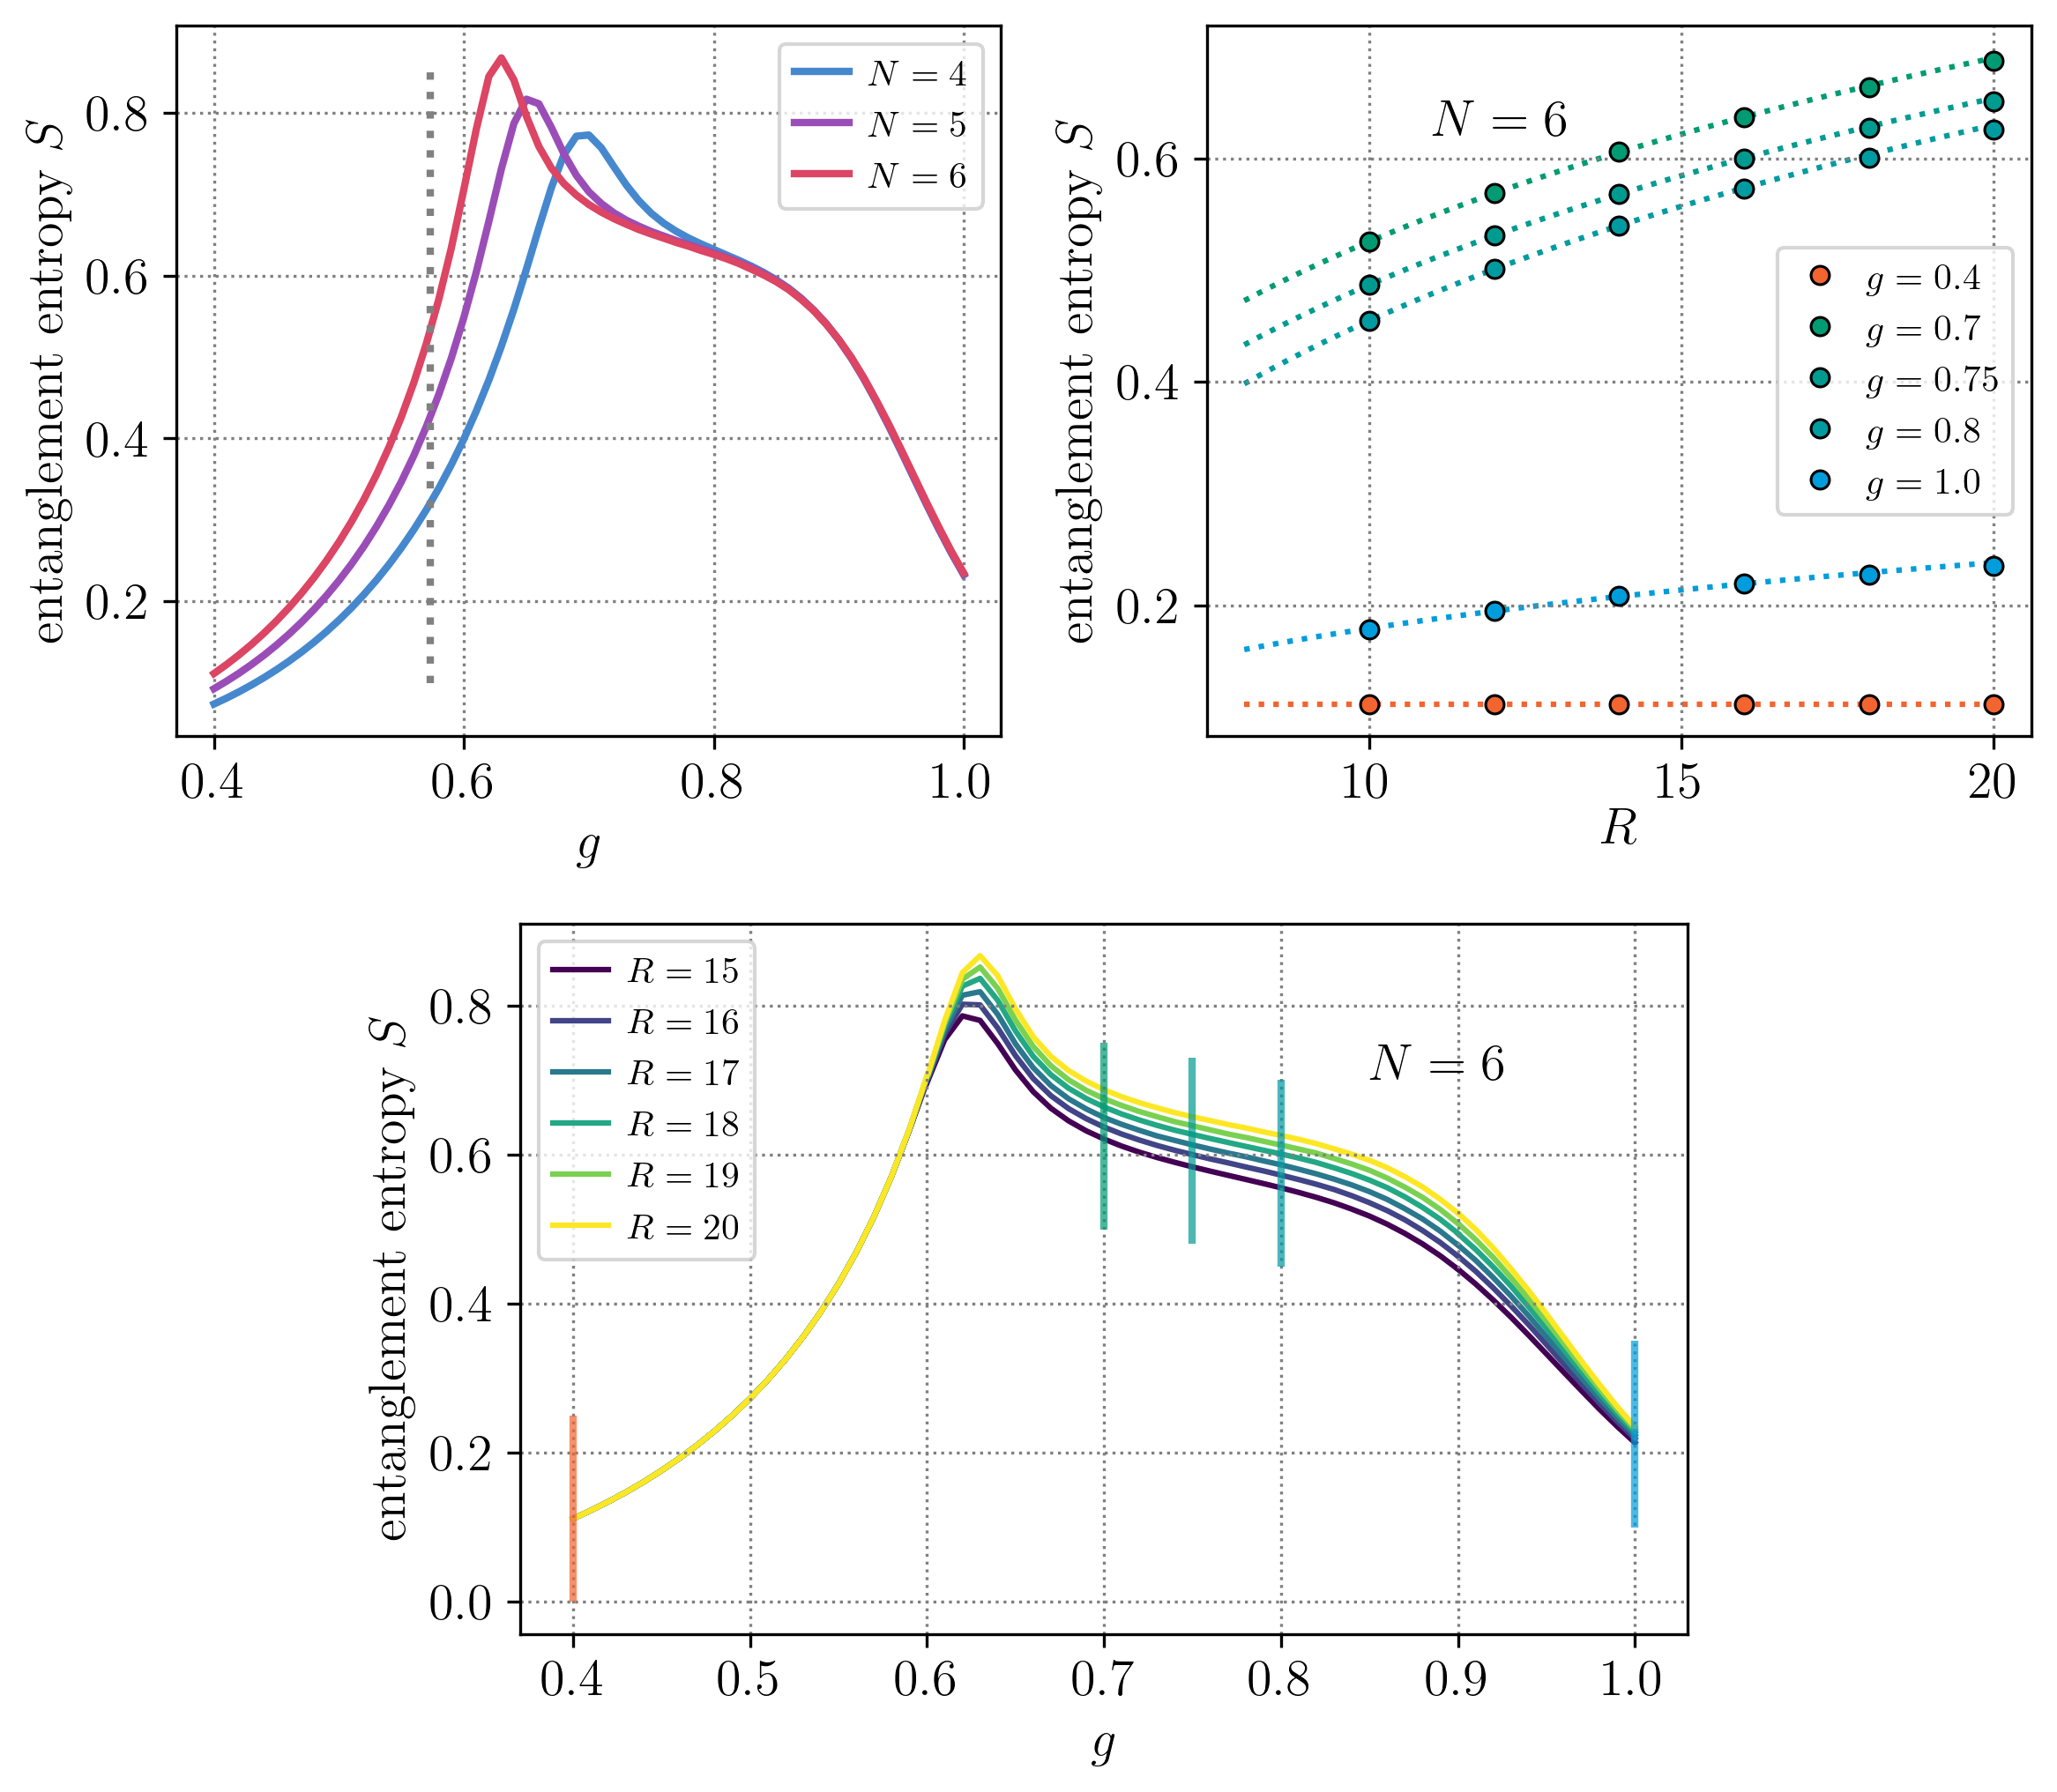

In [469]:
# Matplotlib settings

plt.rcParams.update({
    'font.family': 'serif', 
    'font.size': 14,
    'text.usetex': True,
    'legend.handlelength': 1.5,
    'legend.handletextpad': 0.5,
    'legend.title_fontsize': 12,
    'legend.fontsize': 10
})

marker_opts = dict(
    marker='o',
    markeredgecolor='k',
    markeredgewidth=0.75,
    markersize=5,
    linestyle='',
)

theor_gc = 1 / np.sqrt(3.04438)
theor_gc
R_max = [20,20,20]

h_i, h_f, npoints = 0.4, 1.0, 61
gs = np.linspace(h_i, h_f, npoints)
chis = [64,128]


# Create the figure
fig = plt.figure(figsize=(8, 7))

# Create a 2x4 grid
grdsp = gridspec.GridSpec(2, 6, width_ratios=[1, 1, 1, 1, 1, 1], height_ratios=[1, 1])


# Top row: two images side by side
ax1 = fig.add_subplot(grdsp[0, 0:3])  # Top-left
ax1.grid(color="gray", linestyle=":")

colors = ["#4688CE","#9B4DB7","#DC4563"]

# String width vs coupling
i = 0
for N in [4, 5, 6]:
    Rmax = R_max[i]
    if N == 6:
        h_i,h_f,npoints=0.4,0.6,21
        s_pbc1 = entropy(R,N,L,chi,bc,sector,h_i,h_f,npoints,path)

        h_i,h_f,npoints=0.6,0.9,31
        s_pbc2 = entropy(R,N,L,chi,bc,sector,h_i,h_f,npoints,path)

        h_i,h_f,npoints=0.9,1.0,11
        s_pbc3 = entropy(R,N,L,chi,bc,sector,h_i,h_f,npoints,path)

        gs = np.linspace(0.4,0.6,21).tolist() + np.linspace(0.6,0.9,31)[1:].tolist() + np.linspace(0.9,1.0,11)[1:].tolist()
        s_pbc = s_pbc1 + s_pbc2[1:] + s_pbc3[1:]
    else:
        s_pbc = entropy(R,N,L,chi,bc,sector,h_i,h_f,npoints,path)
    print(f"N = {N}, Rmax = {Rmax}")
    # axs[0].plot(gs,s_pbc, color=colors[i], linewidth=2, markersize=5, linestyle='-', label=f"$N: {N}, \chi: {chi}$")
    ax1.plot(gs, s_pbc, color=colors[i], label=f"$N = {N}$", linewidth=2)
    i += 1
ax1.legend()
ax1.set_xlabel("$g$")
ax1.set_ylabel("entanglement entropy $S$")
ax1.vlines(theor_gc, 0.1, 0.85, 'grey', ':', linewidth=2)
# axs[0].set_ylim(1, 4)


ax2 = fig.add_subplot(grdsp[0, 3:6])  # Top-right
ax2.grid(color="gray", linestyle=":")

colors = ["#F26430", "#009B72", "#009B90", "#009BA1", "#009DDC"]

# String width vs separation R
k = 0
coupls = [1.0, 0.9, 0.8, 0.7, 0.4]
coupls = [1.0, 0.8, 0.7, 0.4]
coupls = [0.4, 0.7, 0.75, 0.8, 1.0]
idxs = [0, 10, 15, 20, 10]
his = [0.4,0.6,0.6,0.6,0.9]
hfs = [0.6,0.9,0.9,0.9,1.0]
npointss = [21,31,31,31,11]
Rs = [10,12,14,16,18,20]

def log_fit(R, a, b):
    return a*np.log(R) + b

for g, h_i, h_f, npoints, idx in zip(coupls, his, hfs, npointss, idxs):

    entrs_g_max = [entropy(R,N,L,chis[1],bc,sector,h_i,h_f,npoints,path)[idx] for R in Rs]
    entrs_g_min = [entropy(R,N,L,chis[0],bc,sector,h_i,h_f,npoints,path)[idx] for R in Rs]
    entrs_g = entrs_g_max.copy()
    entrs_g_err = [np.abs(entrs_g_max[i] - entrs_g_min[i]) for i in range(len(Rs))]
    ax2.plot(Rs, entrs_g, color=colors[k], label=f"$g = {g}$", **marker_opts)
    
    plog, clog = curve_fit(log_fit, Rs, entrs_g, sigma=entrs_g_err)
    x_fit = np.linspace(8,20)
    ax2.plot(x_fit, log_fit(x_fit,*plog), color=colors[k], linestyle=':', zorder=0)
    k += 1

ax2.set_xlabel(r"$R$", labelpad=0)
ax2.set_ylabel("entanglement entropy $S$")
ax2.text(11, 0.62, f"$N = {N}$")
ax2.legend()

# Bottom row: one plot centered in columns [1,2]
fig.add_subplot(grdsp[1, 0]).axis('off')  # left spacer
ax3 = fig.add_subplot(grdsp[1, 1:5])      # centered plot
fig.add_subplot(grdsp[1, 5]).axis('off')  # right spacer
ax3.grid(color="gray", linestyle=":")

chi = 128
npoints, h_i, h_f = 31, 0.6, 0.9 
gs = np.linspace(h_i,h_f,npoints)
Rs = [15,16,17,18,19,20]
colors = create_sequential_colors(len(Rs))
for i, R in enumerate(Rs):
    s_pbc = entropy(R,l,L,chi,bc,sector,h_i,h_f,npoints,path)
    ax3.plot(gs,s_pbc, color=colors[i], linewidth=1.5, linestyle='-', label=f"$R={R}$", zorder=0)

npoints, h_i, h_f = 21, 0.4, 0.6 
gs = np.linspace(h_i,h_f,npoints)
for i, R in enumerate(Rs):
    s_pbc = entropy(R,l,L,chi,bc,sector,h_i,h_f,npoints,path)
    ax3.plot(gs,s_pbc, color=colors[i], linewidth=1.5, linestyle='-', zorder=0)

npoints, h_i, h_f = 11, 0.9, 1.0 
gs = np.linspace(h_i,h_f,npoints)
for i, R in enumerate(Rs):
    s_pbc = entropy(R,l,L,chi,bc,sector,h_i,h_f,npoints,path)
    ax3.plot(gs,s_pbc, color=colors[i], linewidth=1.5, linestyle='-', zorder=0)

colors = ["#F26430", "#009B72", "#009B90", "#009BA1", "#009DDC"]
ranges = [(0.00,0.25),(0.50,0.75),(0.48,0.73),(0.45,0.70),(0.10,0.35)]
for i in range(len(coupls)):
    ax3.vlines(coupls[i], ranges[i][0], ranges[i][1], linestyle='-', color=colors[i], alpha=0.7, linewidth=2)

# Add the legend to the main plot instead
ax3.set_xlabel(r"$g$")
ax3.set_ylabel("entanglement entropy $S$")
ax3.text(0.85, 0.7, f"$N = {N}$")
ax3.legend()

fig.tight_layout()
fig.savefig(f"{path_figures}/figures/entropy/entanglement_entropy_2p_sector_three_plots.pdf", bbox_inches='tight', format='pdf')

## Time

### Entropy

/var/folders/d1/c6hqhfn161x458f4d0m3_rm80000gp/T/ipykernel_4422/2687431629.py:134: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


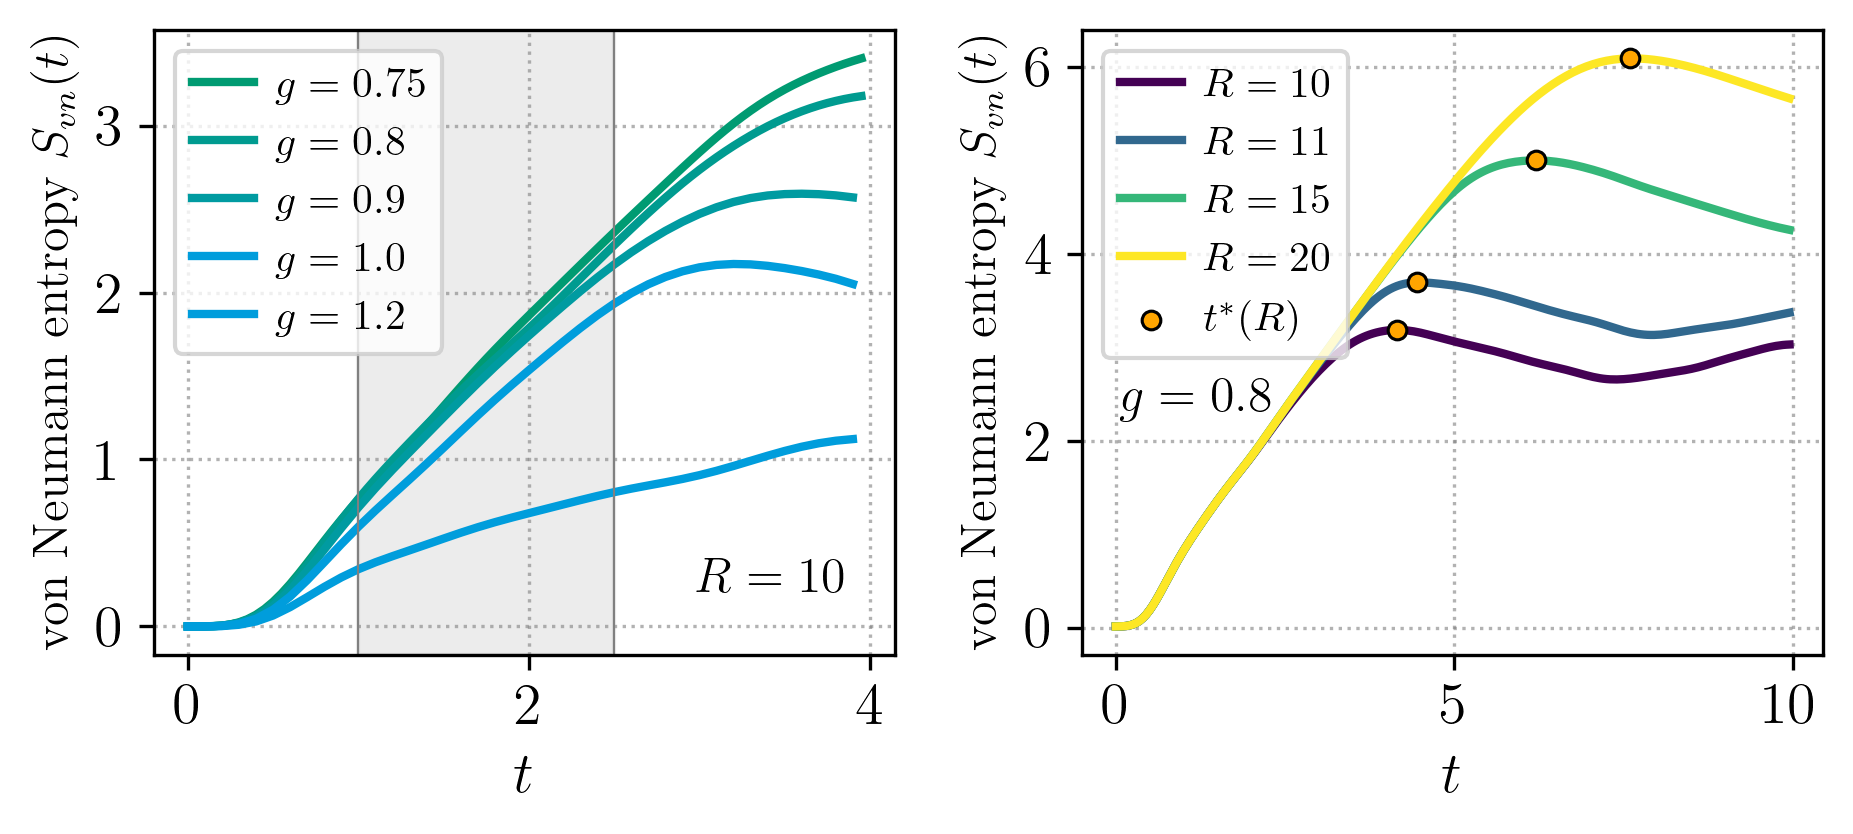

In [510]:
R = 10
chi = 128
of = 0.2

l = 5

plt.rcParams.update({
    'font.family': 'serif', 
    'font.size': 14,
    'text.usetex': True,
    'legend.handlelength': 1.5,
    'legend.handletextpad': 0.5,
    'legend.title_fontsize': 12,
    'legend.fontsize': 10
})

coupls = []
his = [0.75, 0.8]
coupls.append(his)
delta = 0.01
steps = 400

colors = create_sequential_colors(6)

colors = ["#009B72", "#009B90", "#009BA1", "#009DDC", "#009DDC"]

# fig, axs[0] = plt.subplots(figsize=(4.5, 3))
fig, axs = plt.subplots(1, 2, figsize=(6.4, 3))

#################
# ENTROPY vs g
#################
for ax in axs:
    ax.grid(color="gray", linestyle=":", alpha=0.6)

ws_g_rough = []
for j, h_i in enumerate(his):
    h_ev = h_i
    entr_t = time_entropy(R,l,L,chi,bc,sector,h_i,h_ev,path,delta=delta,trotter=steps)
    obs = (entr_t[1:] - entr_t[1])[::int(1/of)]
    ws_g_rough.append(obs)
    axs[0].plot(delta*np.arange(steps)[::int(1/of)], obs, color=colors[j], linestyle="-", linewidth=2, label=f"$g= {h_i}$")
    
delta = 0.02
steps = 200
his = [0.9, 1.0, 1.2]
coupls.append(his)
# his = [0.9, 1.0]

ws_g_conf = []
for i, h_i in enumerate(his):
    h_ev = h_i
    entr_t = time_entropy(R,l,L,chi,bc,sector,h_i,h_ev,path,delta=delta,trotter=steps)
    obs = (entr_t[1:] - entr_t[1])[::int(1/of)]
    ws_g_conf.append(obs)
    # ws_g_rough.append(obs)
    axs[0].plot(delta*np.arange(steps)[::int(1/of)], obs, color=colors[i+j+1], linestyle="-", linewidth=2, label=f"$g = {h_i}$")

x_start = 1.0
x_end = 2.5

# Add vertical lines
axs[0].axvline(x_start, color='gray', linestyle='-', linewidth=0.5)
axs[0].axvline(x_end, color='gray', linestyle='-', linewidth=0.5)

# Add shaded area
axs[0].axvspan(x_start, x_end, color='gray', alpha=0.15, zorder=0)


axs[0].set_xlabel(r"$t$")
# axs[0].set_ylabel("von Neumann entropy $S_{vn}(t)$")
# axs[0].text(delta*np.arange(steps)[-1]-1.0, 0.2, f"$R = {R}$")
axs[0].set_ylabel("von Neumann entropy $S_{vn}(t)$", fontsize=12)
axs[0].text(delta*np.arange(steps)[-1]-1.0, 0.2, f"$R = {R}$", fontsize=12)


# axs[0].text(0, 1.3, "$a t + b \\quad (t < R/2)$", fontsize=10)

axs[0].legend()


#################
# ENTROPY vs R
#################

peaks_opts = dict(
    zorder=20,
    marker="o", 
    facecolors="orange", 
    edgecolors="k",
    linewidths=0.75,
    s=20,
)

h_i, h_ev = 0.8, 0.8
delta = 0.05
steps = 200
chi = 256
l = 6
Rs = [10,11,15,20]

colors = create_sequential_colors(len(Rs))

saturation_idx = []
for i, R in enumerate(Rs):
    entr_t = time_entropy(R,l,L,chi,bc,sector,h_i,h_ev,path,delta=delta,trotter=steps)
    obs = entr_t[1:]
    saturation_idx.append(np.argmax(obs))
    axs[1].plot(delta*np.arange(steps), obs, color=colors[i], linestyle="-", linewidth=2, label=f"$R = {R}$")
    if R == Rs[-1]:
        label="$t^*(R)$"
    else:
        label=None
    axs[1].scatter(delta*np.arange(steps)[np.argmax(obs)], np.max(obs), label=label, **peaks_opts)

# for R in Rs:
#     axs[1].axvline(np.log(R), color='k', linestyle='-', linewidth=0.5)

# axs[1].axvline(10/2, color='k', linestyle='-', linewidth=0.5)
# # axs[1].text(10/2-3.3, 0.2, f"$(t < R/2)$")
# # axs[1].text(10/2+0.45, 0.2, f"$(t > R/2)$")
# axs[1].text(10/2-3.4, 0.2, f"$(t < R/2)$", fontsize=12)
# axs[1].text(10/2+0.45, 0.2, f"$(t > R/2)$", fontsize=12)

axs[1].set_xlabel(r"$t$")
# axs[1].set_ylabel("von Neumann entropy $S_{vn}(t)$")
# axs[1].text(0.05, 2.3, f"$g = {h_ev}$")

axs[1].set_ylabel("von Neumann entropy $S_{vn}(t)$", fontsize=12)
axs[1].text(0.05, 2.3, f"$g = {h_ev}$", fontsize=12)

axs[1].legend()

fig.tight_layout()
fig.savefig(f"{path_figures}/figures/fluxtube/entropy_in_time_{l}x{L}_Rs_{Rs}_gs_{coupls}_with_one_v_line.pdf", bbox_inches="tight")

In [511]:
slope_interval = [1,2.5] # in t
c = 1

def lin_func(x,a,b):
    return a*x + b

delta = 0.01
# delta = 0.02
steps = 400
# steps = 500
his = [ 0.75, 0.8]
# his = [0.8]
slopes = []
slopes_err = []
where_slope = np.argwhere([i if t in slope_interval else 0 for i,t in enumerate(delta*np.arange((steps)+1))])
xs = np.linspace(slope_interval[0], slope_interval[1], int(where_slope[1,0]*of)-int(where_slope[0,0]*of))
for j, ws_t in enumerate(ws_g_rough):
    ys = ws_t[int(where_slope[0,0]*of):int(where_slope[1,0]*of)]
    # plt.plot(xs, ys, marker='^', color=colors[j], label=f"$g: {his[j]}$")
    popt, cov = curve_fit(lin_func, xs, ys)
    err = np.sqrt(np.diag(cov))
    print(f"slope for g: {his[j]} is a: {popt[0]:.3f}+/-{err[0]:.3f}")
    
    slopes.append(popt[0])
    slopes_err.append(err[0])

h_i, h_ev = 0.8, 0.8
delta = 0.05
steps = 200

plin, clin = curve_fit(lin_func, Rs, [delta*np.arange(steps)[idx] for idx in saturation_idx])
err = np.sqrt(np.diag(clin))
for j, R in enumerate(Rs):
    print(f"saturation time t* for R: {Rs[j]} is: {delta*np.arange(steps)[saturation_idx[j]]}")

print(f"avg slope: {np.mean(slopes):.3f}+/-{np.sum(slopes_err):.3f}")
print(f"t* dependency on R: {plin[0]:.3f}+/-{err[0]:.3f}")


slope for g: 0.75 is a: 1.043+/-0.006
slope for g: 0.8 is a: 0.960+/-0.005
saturation time t* for R: 10 is: 4.15
saturation time t* for R: 11 is: 4.45
saturation time t* for R: 15 is: 6.2
saturation time t* for R: 20 is: 7.6000000000000005
avg slope: 1.001+/-0.011
t* dependency on R: 0.352+/-0.026


### String width

[-2, -1, 0, 1, 2]
[-2, -1, 0, 1, 2]
[-2, -1, 0, 1, 2]
[-2.9958962454894505e-14, 0.00046900621017370434, 0.016797477917434724, 0.05554602668593758, 0.1137477216865405, 0.1864128829412328, 0.268151423615342, 0.35431407475392623, 0.4406295857235481, 0.5229580070841058, 0.5982254013769616, 0.6780311391751465, 0.7371324294018149, 0.7914817727764616, 0.8423867987474448, 0.8902912950042566, 0.9351718239544137, 0.9769492933461076, 1.0154469895791278, 1.0501330523254717, 1.0801695518656431, 1.109189529619141, 1.1276950454608776, 1.1421818587348078, 1.154273844276544, 1.1655102910530686, 1.1768113856556364, 1.1882403627324307, 1.1991680771519464, 1.2087334438194208, 1.2163262704578188, 1.222725018778102, 1.2262774759952308, 1.2289304517003086, 1.2313644447850374, 1.2340266308898498, 1.2369243689133735, 1.239533336402349, 1.2409241003914264, 1.2400833876051889, 1.2350934968855674]
[-2, -1, 0, 1, 2]
[5.743789339498105e-14, 0.00037953918497551014, 0.013526890412379368, 0.044242272377285695, 0.08920

/var/folders/d1/c6hqhfn161x458f4d0m3_rm80000gp/T/ipykernel_4422/2117835751.py:124: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


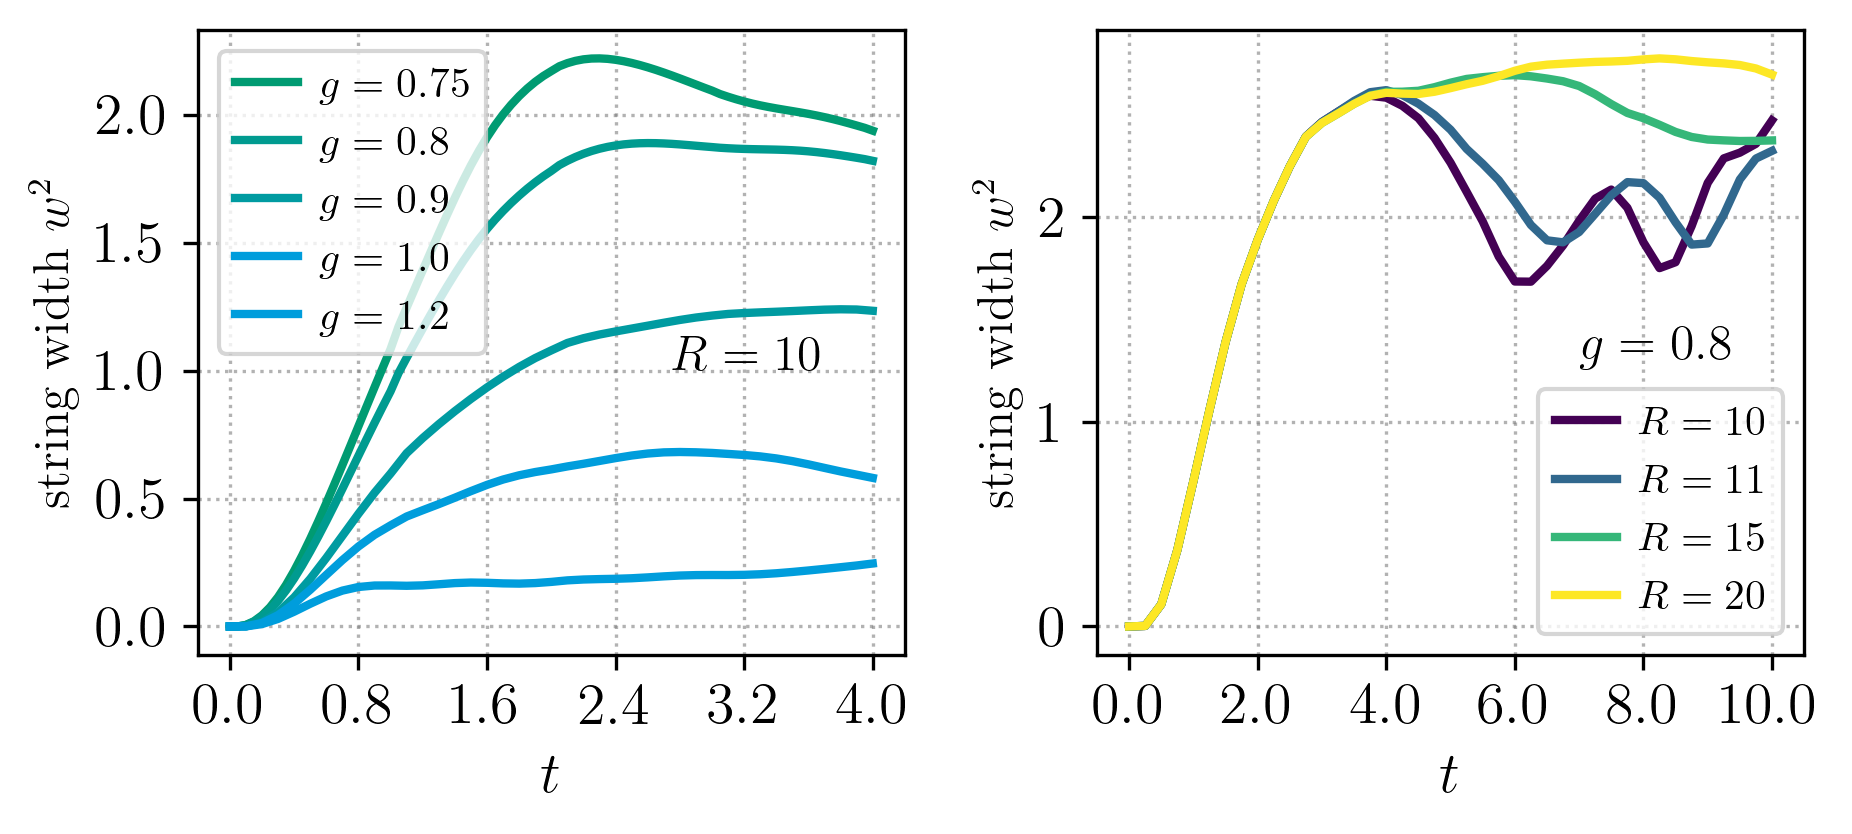

In [512]:
R = 10
chi = 128
of = 0.2

l = 5

coupls = []
his = [0.75, 0.8]
coupls.append(his)
delta = 0.01
steps = 400

colors = create_sequential_colors(6)

colors = ["#009B72", "#009B90", "#009BA1", "#009DDC", "#009DDC"]

# fig, axs[0] = plt.subplots(figsize=(4.5, 3))
fig, axs = plt.subplots(1, 2, figsize=(6.4, 3))

#################
# ENTROPY vs g
#################
for ax in axs:
    ax.grid(color="gray", linestyle=":", alpha=0.6)

ws_g_rough = []
for j, h_i in enumerate(his):
    h_ev = h_i
    entr_t = time_ev_string_width_occupation(R,l,L,chi,bc,sector,h_i,h_ev,1,delta=delta,trotter=steps, path_tensor=path)
    obs = entr_t
    # obs[0] = 1
    ws_g_rough.append(obs)
    axs[0].plot(delta*np.arange((steps*of)+1), obs, color=colors[j], linestyle="-", linewidth=2, label=f"$g= {h_i}$")
    
delta = 0.02
steps = 200
his = [0.9, 1.0, 1.2]
coupls.append(his)
# his = [0.9, 1.0]

ws_g_conf = []
for i, h_i in enumerate(his):
    h_ev = h_i
    entr_t = time_ev_string_width_occupation(R,l,L,chi,bc,sector,h_i,h_ev,1,delta=delta,trotter=steps, path_tensor=path)
    obs = entr_t
    # obs[0] = 1
    print(obs) 
    ws_g_conf.append(obs)
    # ws_g_rough.append(obs)
    axs[0].plot(delta*np.arange((steps*of)+1), obs, color=colors[i+j+1], linestyle="-", linewidth=2, label=f"$g = {h_i}$")

axs[0].set_xticks(ticks=(delta*np.arange(int((steps*of)+1)))[::int((steps*of+1)/5)], labels=delta*np.linspace(0,steps,int((steps*of)+1))[::int((steps*of+1)/5)])
axs[0].set_xlabel(r"$t$")
axs[0].set_ylabel("string width $w^2$", fontsize=12)
axs[0].text(0.55, 1, f"$R = {R}$", fontsize=12)


# x_start = 1.0
# x_end = 2.5

# # Add vertical lines
# axs[0].axvline(x_start, color='gray', linestyle='-', linewidth=0.5)
# axs[0].axvline(x_end, color='gray', linestyle='-', linewidth=0.5)

# # Add shaded area
# axs[0].axvspan(x_start, x_end, color='gray', alpha=0.15, zorder=0)


# axs[0].set_xlabel(r"$t$")
# axs[1].set_ylabel("string width $w^2$")
# axs[0].text(delta*np.arange(steps)[-1]-0.9, 0.2, f"$R = {R}$")
# # axs[0].text(0, 1.3, "$a t + b \\quad (t < R/2)$", fontsize=10)

axs[0].legend()


#################
# ENTROPY vs R
#################

peaks_opts = dict(
    zorder=20,
    marker="o", 
    facecolors="orange", 
    edgecolors="k",
    linewidths=0.75,
    s=20,
)

h_i, h_ev = 0.8, 0.8
delta = 0.05
steps = 200
chi = 256
l = 6
Rs = [10,11,15,20]

colors = create_sequential_colors(len(Rs))

saturation_idx = []
for i, R in enumerate(Rs):
    entr_t = time_ev_string_width_occupation(R,l,L,chi,bc,sector,h_i,h_ev,1,delta=delta,trotter=steps, path_tensor=path)
    obs = entr_t
    # obs[0] = 1
    print(obs) 
    saturation_idx.append(np.argmax(obs))
    axs[1].plot(delta*np.arange((steps*of)+1), obs, color=colors[i], linestyle="-", linewidth=2, label=f"$R = {R}$")
#     if R == Rs[-1]:
#         label="$t^*(R)$"
#     else:
#         label=None
#     axs[1].scatter(delta*np.arange((steps*of)+1)[np.argmax(obs)], np.max(obs), label=label, **peaks_opts)

# axs[1].axvline(10/2, color='k', linestyle='-', linewidth=0.5)
# axs[1].text(10/2-3.3, 0.2, f"$(t < R/2)$")
# axs[1].text(10/2+0.45, 0.2, f"$(t > R/2)$")

axs[1].set_xticks(ticks=(delta*np.arange(int((steps*of)+1)))[::int((steps*of+1)/5)], labels=delta*np.linspace(0,steps,int((steps*of)+1))[::int((steps*of+1)/5)])
axs[1].set_xlabel(r"$t$")
axs[1].set_ylabel("string width $w^2$", fontsize=12)
axs[1].text(1.4, 1.3, f"$g = {h_ev}$", fontsize=12)

axs[1].legend()

fig.tight_layout()
fig.savefig(f"{path_figures}/figures/fluxtube/string_width_in_time_{l}x{L}_Rs_{Rs}_gs_{coupls}_with_one_v_line.pdf", bbox_inches="tight")

### Entropy and string width

[-2, -1, 0, 1, 2]
[-2, -1, 0, 1, 2]
[-2, -1, 0, 1, 2]
[-2, -1, 0, 1, 2]
[-2, -1, 0, 1, 2]
[-2, -1, 0, 1, 2, 3]
[-2, -1, 0, 1, 2, 3]
[-2, -1, 0, 1, 2, 3]
[-2, -1, 0, 1, 2, 3]


/var/folders/d1/c6hqhfn161x458f4d0m3_rm80000gp/T/ipykernel_4422/1450088092.py:211: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


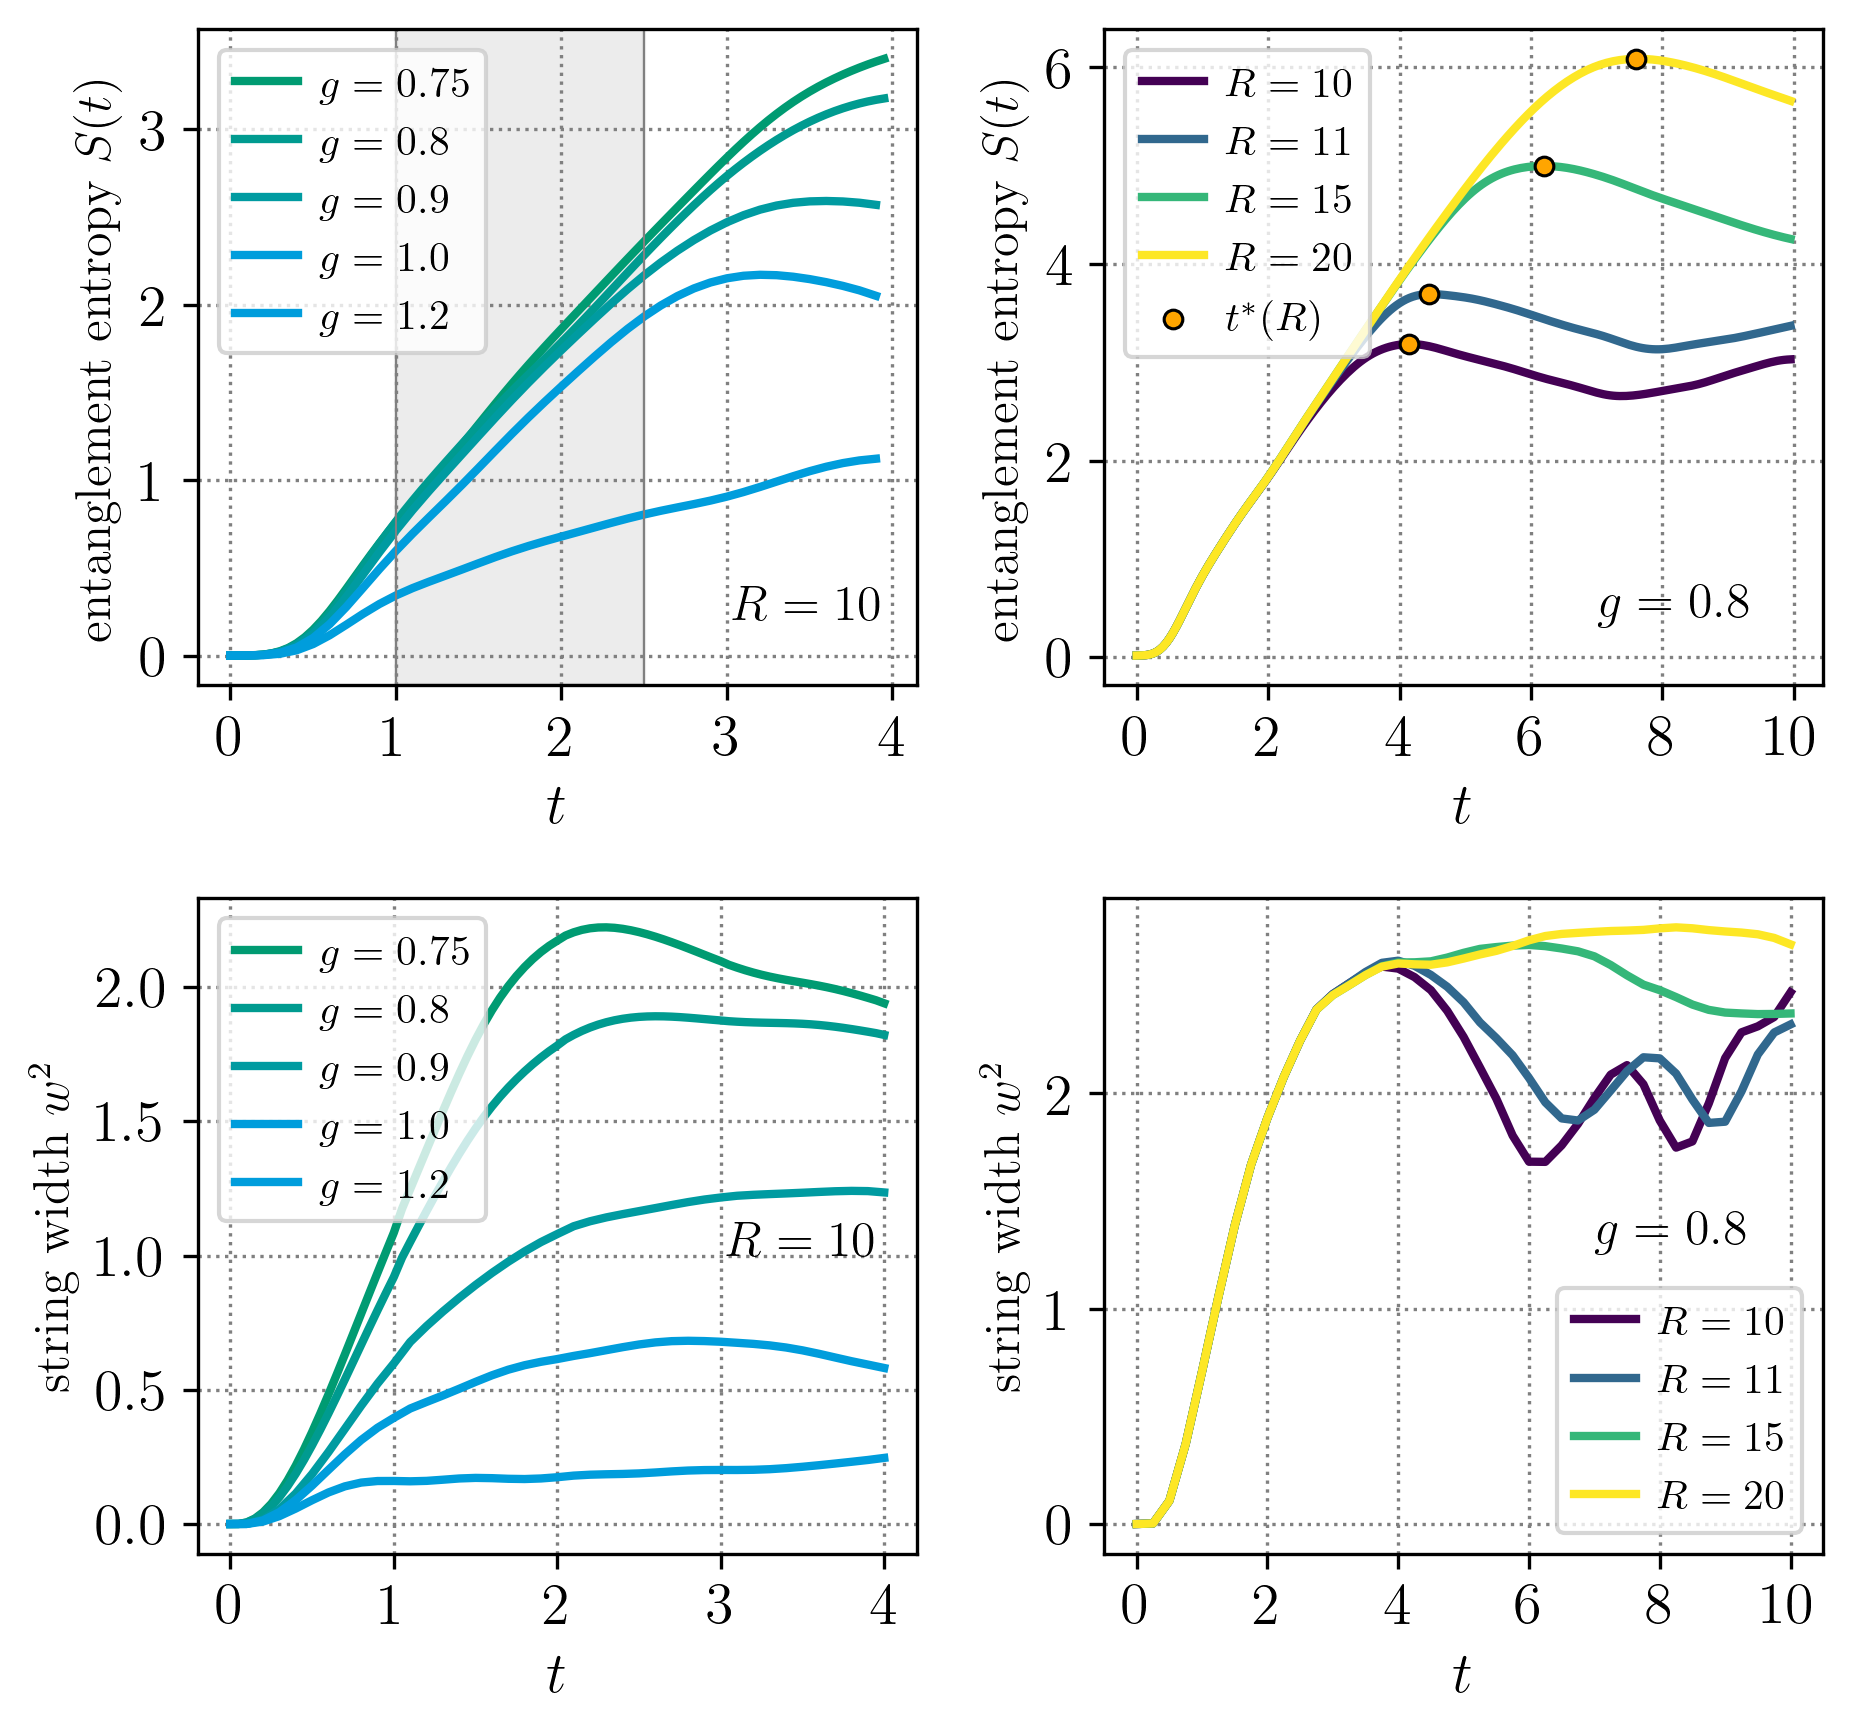

In [530]:
R = 10
chi = 128
of = 0.2

l = 5

plt.rcParams.update({
    'font.family': 'serif', 
    'font.size': 14,
    'text.usetex': True,
    'legend.handlelength': 1.5,
    'legend.handletextpad': 0.5,
    'legend.title_fontsize': 12,
    'legend.fontsize': 10
})

coupls = []
his = [0.75, 0.8]
coupls.append(his)
delta = 0.01
steps = 400

colors = create_sequential_colors(6)

colors = ["#009B72", "#009B90", "#009BA1", "#009DDC", "#009DDC"]

fig, axs = plt.subplots(2, 2, figsize=(6.4, 6.0))

#################
# ENTROPY vs g
#################

for ax in axs.flatten():
    ax.grid(color="gray", linestyle=":")

ws_g_rough = []
for j, h_i in enumerate(his):
    h_ev = h_i
    entr_t = time_entropy(R,l,L,chi,bc,sector,h_i,h_ev,path,delta=delta,trotter=steps)
    obs = (entr_t[1:] - entr_t[1])[::int(1/of)]
    ws_g_rough.append(obs)
    axs[0][0].plot(delta*np.arange(steps)[::int(1/of)], obs, color=colors[j], linestyle="-", linewidth=2, label=f"$g= {h_i}$")
    
delta = 0.02
steps = 200
his = [0.9, 1.0, 1.2]
coupls.append(his)
# his = [0.9, 1.0]

ws_g_conf = []
for i, h_i in enumerate(his):
    h_ev = h_i
    entr_t = time_entropy(R,l,L,chi,bc,sector,h_i,h_ev,path,delta=delta,trotter=steps)
    obs = (entr_t[1:] - entr_t[1])[::int(1/of)]
    ws_g_conf.append(obs)
    # ws_g_rough.append(obs)
    axs[0][0].plot(delta*np.arange(steps)[::int(1/of)], obs, color=colors[i+j+1], linestyle="-", linewidth=2, label=f"$g = {h_i}$")

x_start = 1.0
x_end = 2.5

# Add vertical lines
axs[0][0].axvline(x_start, color='gray', linestyle='-', linewidth=0.5)
axs[0][0].axvline(x_end, color='gray', linestyle='-', linewidth=0.5)

# Add shaded area
axs[0][0].axvspan(x_start, x_end, color='gray', alpha=0.15, zorder=0)


axs[0][0].set_xlabel(r"$t$")
# axs[0][0].set_ylabel("entanglement entropy $S(t)$")
# axs[0][0].text(delta*np.arange(steps)[-1]-1.0, 0.2, f"$R = {R}$")
axs[0][0].set_ylabel("entanglement entropy $S(t)$", fontsize=12)
axs[0][0].text(3.03, 0.2, f"$R = {R}$", fontsize=12)
axs[0][0].set_xticks(ticks=(delta*np.arange(steps+1))[::int((steps+1)/4)], labels=[int(delta*s) for s in np.arange(steps+1)][::int((steps+1)/4)])


# axs[0][0].text(0, 1.3, "$a t + b \\quad (t < R/2)$", fontsize=10)

axs[0][0].legend()


#################
# ENTROPY vs R
#################

peaks_opts = dict(
    zorder=20,
    marker="o", 
    facecolors="orange", 
    edgecolors="k",
    linewidths=0.75,
    s=20,
)

h_i, h_ev = 0.8, 0.8
delta = 0.05
steps = 200
chi = 256
l = 6
Rs = [10,11,15,20]

colors = create_sequential_colors(len(Rs))

saturation_idx_entr = []
for i, R in enumerate(Rs):
    entr_t = time_entropy(R,l,L,chi,bc,sector,h_i,h_ev,path,delta=delta,trotter=steps)
    obs = entr_t[1:]
    saturation_idx_entr.append(np.argmax(obs))
    axs[0][1].plot(delta*np.arange(steps), obs, color=colors[i], linestyle="-", linewidth=2, label=f"$R = {R}$")
    if R == Rs[-1]:
        label="$t^*(R)$"
    else:
        label=None
    axs[0][1].scatter(delta*np.arange(steps)[np.argmax(obs)], np.max(obs), label=label, **peaks_opts)

# axs[0][1].axvline(10/2, color='k', linestyle='-', linewidth=0.5)
# axs[0][1].text(10/2-3.4, 0.2, f"$(t < R/2)$", fontsize=12)
# axs[0][1].text(10/2+0.45, 0.2, f"$(t > R/2)$", fontsize=12)
axs[0][1].set_xlabel(r"$t$")
axs[0][1].set_ylabel("entanglement entropy $S(t)$", fontsize=12)
# axs[0][1].text(0.05, 2.3, f"$g = {h_ev}$", fontsize=12)
axs[0][1].text(7, 0.4, f"$g = {h_ev}$", fontsize=12)
axs[0][1].set_xticks(ticks=(delta*np.arange(steps+1))[::int((steps+1)/5)], labels=[int(delta*s) for s in np.arange(steps+1)][::int((steps+1)/5)])

axs[0][1].legend()

#################
# string width vs g
#################

R = 10
chi = 128
of = 0.2

l = 5

coupls = []
his = [0.75, 0.8]
coupls.append(his)
delta = 0.01
steps = 400

colors = create_sequential_colors(6)

colors = ["#009B72", "#009B90", "#009BA1", "#009DDC", "#009DDC"]

for j, h_i in enumerate(his):
    h_ev = h_i
    entr_t = time_ev_string_width_occupation(R,l,L,chi,bc,sector,h_i,h_ev,1,delta=delta,trotter=steps, path_tensor=path)
    obs = entr_t
    axs[1][0].plot(delta*np.arange((steps*of)+1), obs, color=colors[j], linestyle="-", linewidth=2, label=f"$g= {h_i}$")
    
delta = 0.02
steps = 200
his = [0.9, 1.0, 1.2]
coupls.append(his)

for i, h_i in enumerate(his):
    h_ev = h_i
    entr_t = time_ev_string_width_occupation(R,l,L,chi,bc,sector,h_i,h_ev,1,delta=delta,trotter=steps, path_tensor=path)
    obs = entr_t
    axs[1][0].plot(delta*np.arange((steps*of)+1), obs, color=colors[i+j+1], linestyle="-", linewidth=2, label=f"$g = {h_i}$")


# axs[1][0].set_xticks(ticks=(delta*np.arange(int((steps*of)+1)))[::int((steps*of+1)/5)], labels=delta*np.linspace(0,steps,int((steps*of)+1))[::int((steps*of+1)/5)])
axs[1][0].set_xticks(ticks=(delta*np.arange(int((steps*of)+1)))[::int((steps*of+1)/4)], labels=[int(delta*s) for s in np.linspace(0,steps,int((steps*of)+1))][::int((steps*of+1)/4)])
axs[1][0].set_xlabel(r"$t$")
axs[1][0].set_ylabel("string width $w^2$", fontsize=12)
axs[1][0].text(3.03*of, 1, f"$R = {R}$", fontsize=12)

axs[1][0].legend()


#################
# string width vs R
#################

peaks_opts = dict(
    zorder=20,
    marker="o", 
    facecolors="orange", 
    edgecolors="k",
    linewidths=0.75,
    s=20,
)

h_i, h_ev = 0.8, 0.8
delta = 0.05
steps = 200
chi = 256
l = 6
Rs = [10,11,15,20]

colors = create_sequential_colors(len(Rs))

saturation_idx_string = []
for i, R in enumerate(Rs):
    entr_t = time_ev_string_width_occupation(R,l,L,chi,bc,sector,h_i,h_ev,1,delta=delta,trotter=steps, path_tensor=path)
    obs = entr_t
    saturation_idx_string.append(np.argmax(obs))
    axs[1][1].plot(delta*np.arange((steps*of)+1), obs, color=colors[i], linestyle="-", linewidth=2, label=f"$R = {R}$")

axs[1][1].set_xticks(ticks=(delta*np.arange(int((steps*of)+1)))[::int((steps*of+1)/5)], labels=[int(delta*s) for s in np.linspace(0,steps,int((steps*of)+1))][::int((steps*of+1)/5)])
axs[1][1].set_xlabel(r"$t$")
axs[1][1].set_ylabel("string width $w^2$", fontsize=12)
axs[1][1].text(1.4, 1.3, f"$g = {h_ev}$", fontsize=12)

axs[1][1].legend()

fig.tight_layout()
fig.savefig(f"{path_figures}/figures/fluxtube/entropy_vs_string_width_in_time_{l}x{L}_Rs_{Rs}_gs_{coupls}.pdf", bbox_inches="tight")

### Lin $vs$ Log growth of entanglement

In [572]:
def lin_func(x,a,b):
    return a*x + b

def log_func(x,a,b):
    return a*np.log(x) + b

def lin_log_ent_growth(l,L,R,chi,delta,steps,h_i,bc,sector,path, slope_interval,color):
    h_ev = h_i
    entr_t = time_entropy(R,l,L,chi,bc,sector,h_i,h_ev,path,delta=delta,trotter=steps)
    obs = (entr_t[1:] - entr_t[1])[::int(1/of)]

    

    where_slope = np.argwhere([i if g in slope_interval else 0 for i,g in enumerate(delta*np.arange((steps)+1))])
    xs = np.linspace(slope_interval[0], slope_interval[1], int(where_slope[1,0]*of)-int(where_slope[0,0]*of))
    ys = obs[int(where_slope[0,0]*of):int(where_slope[1,0]*of)]
    ys_err = [delta]*len(ys)

    # plt.plot(xs, ys, marker='1', color=colors[-1], linestyle='', markersize=10, label=f"$g: {his[-1]}$")
    plt.errorbar(x=xs, y=ys, yerr=ys_err, color=color, marker='x', linestyle='', capsize=8, linewidth=1, markersize=5, label=f"$g= {h_ev:.2f}$", zorder=0)

    popt, cov = curve_fit(log_func, xs, ys, sigma=ys_err)
    y_fit = log_func(xs,*popt)
    residuals = (ys - y_fit)/ys_err
    RSS = np.sum(residuals**2)/(len(ys)-len(popt))
    RMSE = np.sqrt(np.mean(residuals**2))
    plt.plot(xs, log_func(xs,*popt), label="log fit $\\hspace{0.8cm}$"+f"$-$ WRMSE = ${RMSE:.4f}$")

    print(f"RSS log = {RSS:.7f}, RMSE log = {RMSE:.7f}")

    popt, cov = curve_fit(lin_func, xs, ys, sigma=ys_err)
    y_fit = lin_func(xs,*popt)
    residuals = (ys - y_fit)/ys_err
    RSS = np.sum(residuals**2)/(len(ys)-len(popt))
    RMSE = np.sqrt(np.mean(residuals**2))
    plt.plot(xs, lin_func(xs,*popt), label="lin fit $\\hspace{0.865cm}$"+f"$-$ WRMSE = ${RMSE:.4f}$")

    print(f"RSS lin = {RSS:.7f}, RMSE lin = {RMSE:.7f}")

    plt.xlabel("$t$")
    plt.ylabel("entanglement entropy $S(t)$")
    plt.legend()
    plt.show()

RSS log = 22.0193000, RMSE log = 4.5333593
RSS lin = 1.9005581, RMSE lin = 1.3318612


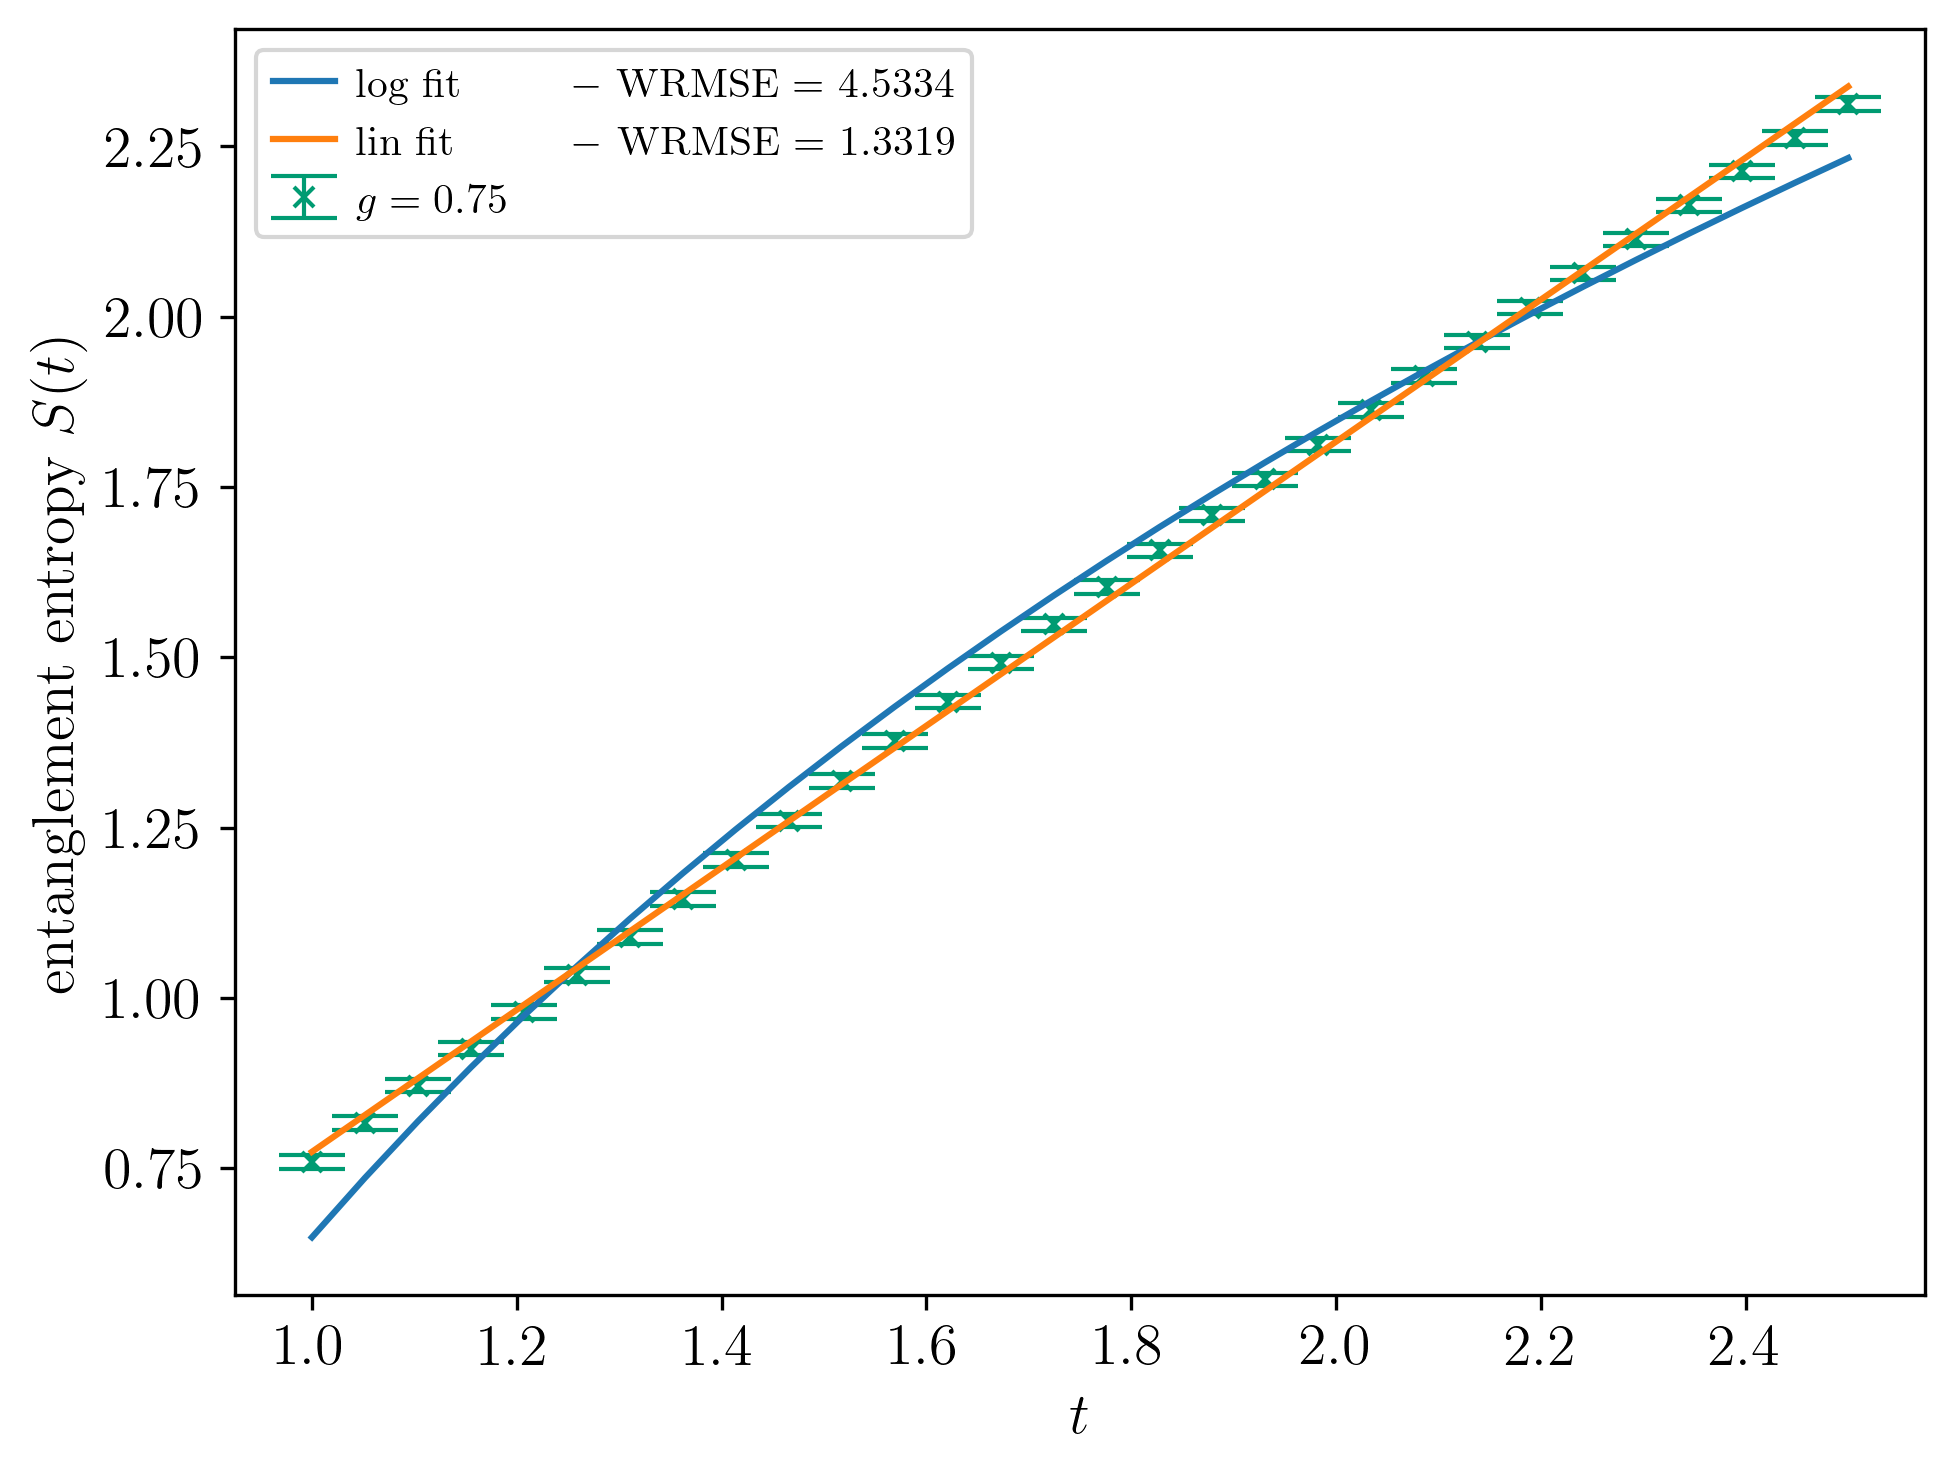

RSS log = 18.9135178, RMSE log = 4.2015017
RSS lin = 1.5799582, RMSE lin = 1.2143425


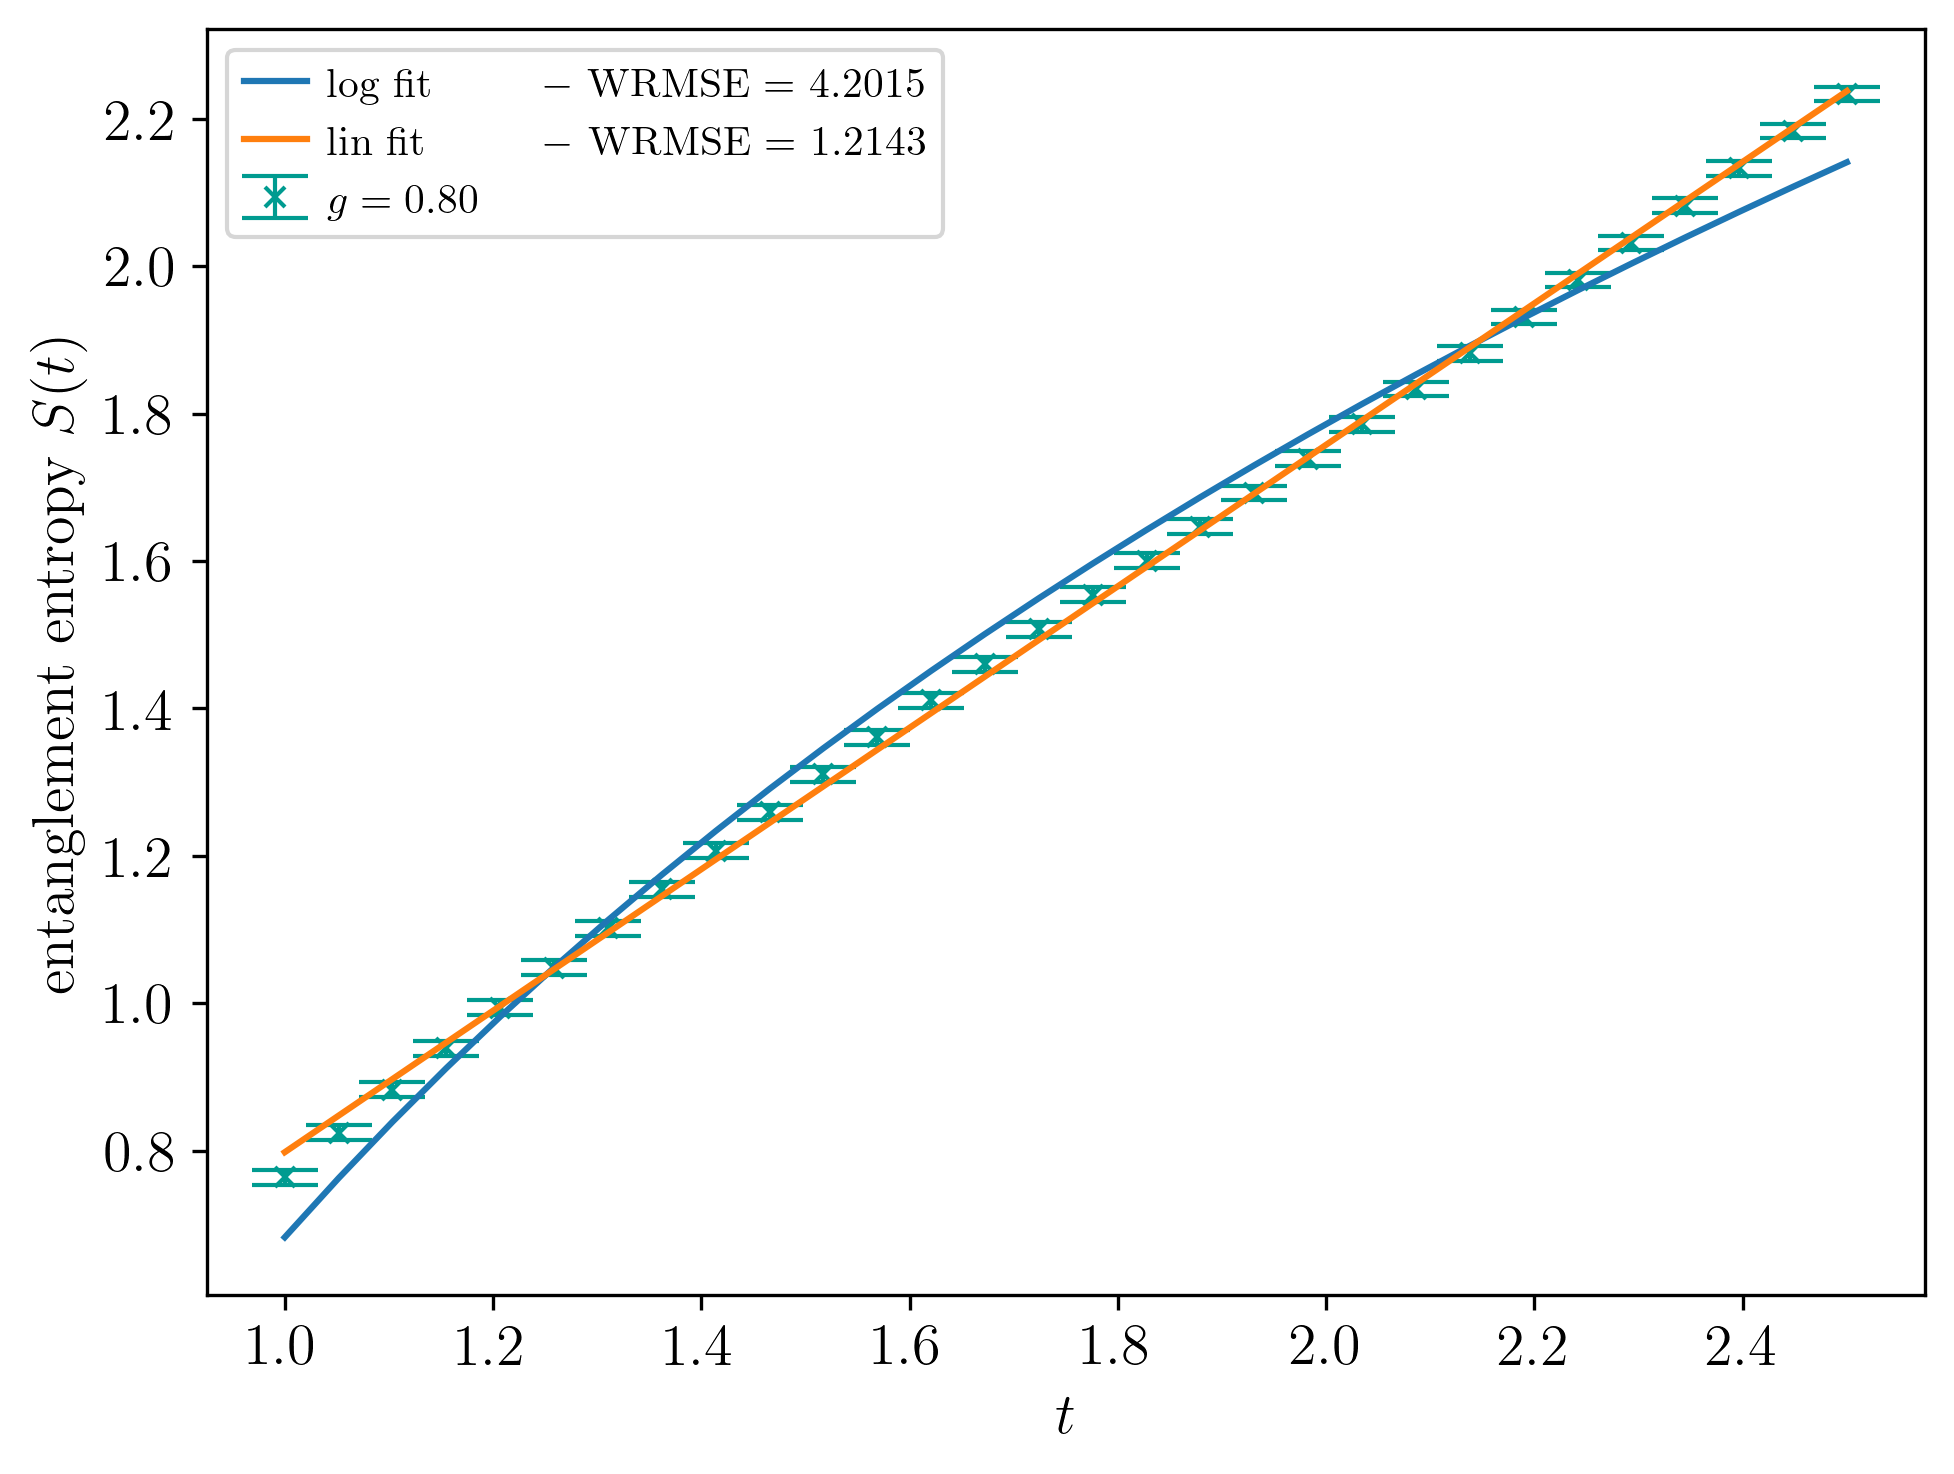

RSS log = 3.5524193, RMSE log = 1.7546405
RSS lin = 0.9785328, RMSE lin = 0.9209027


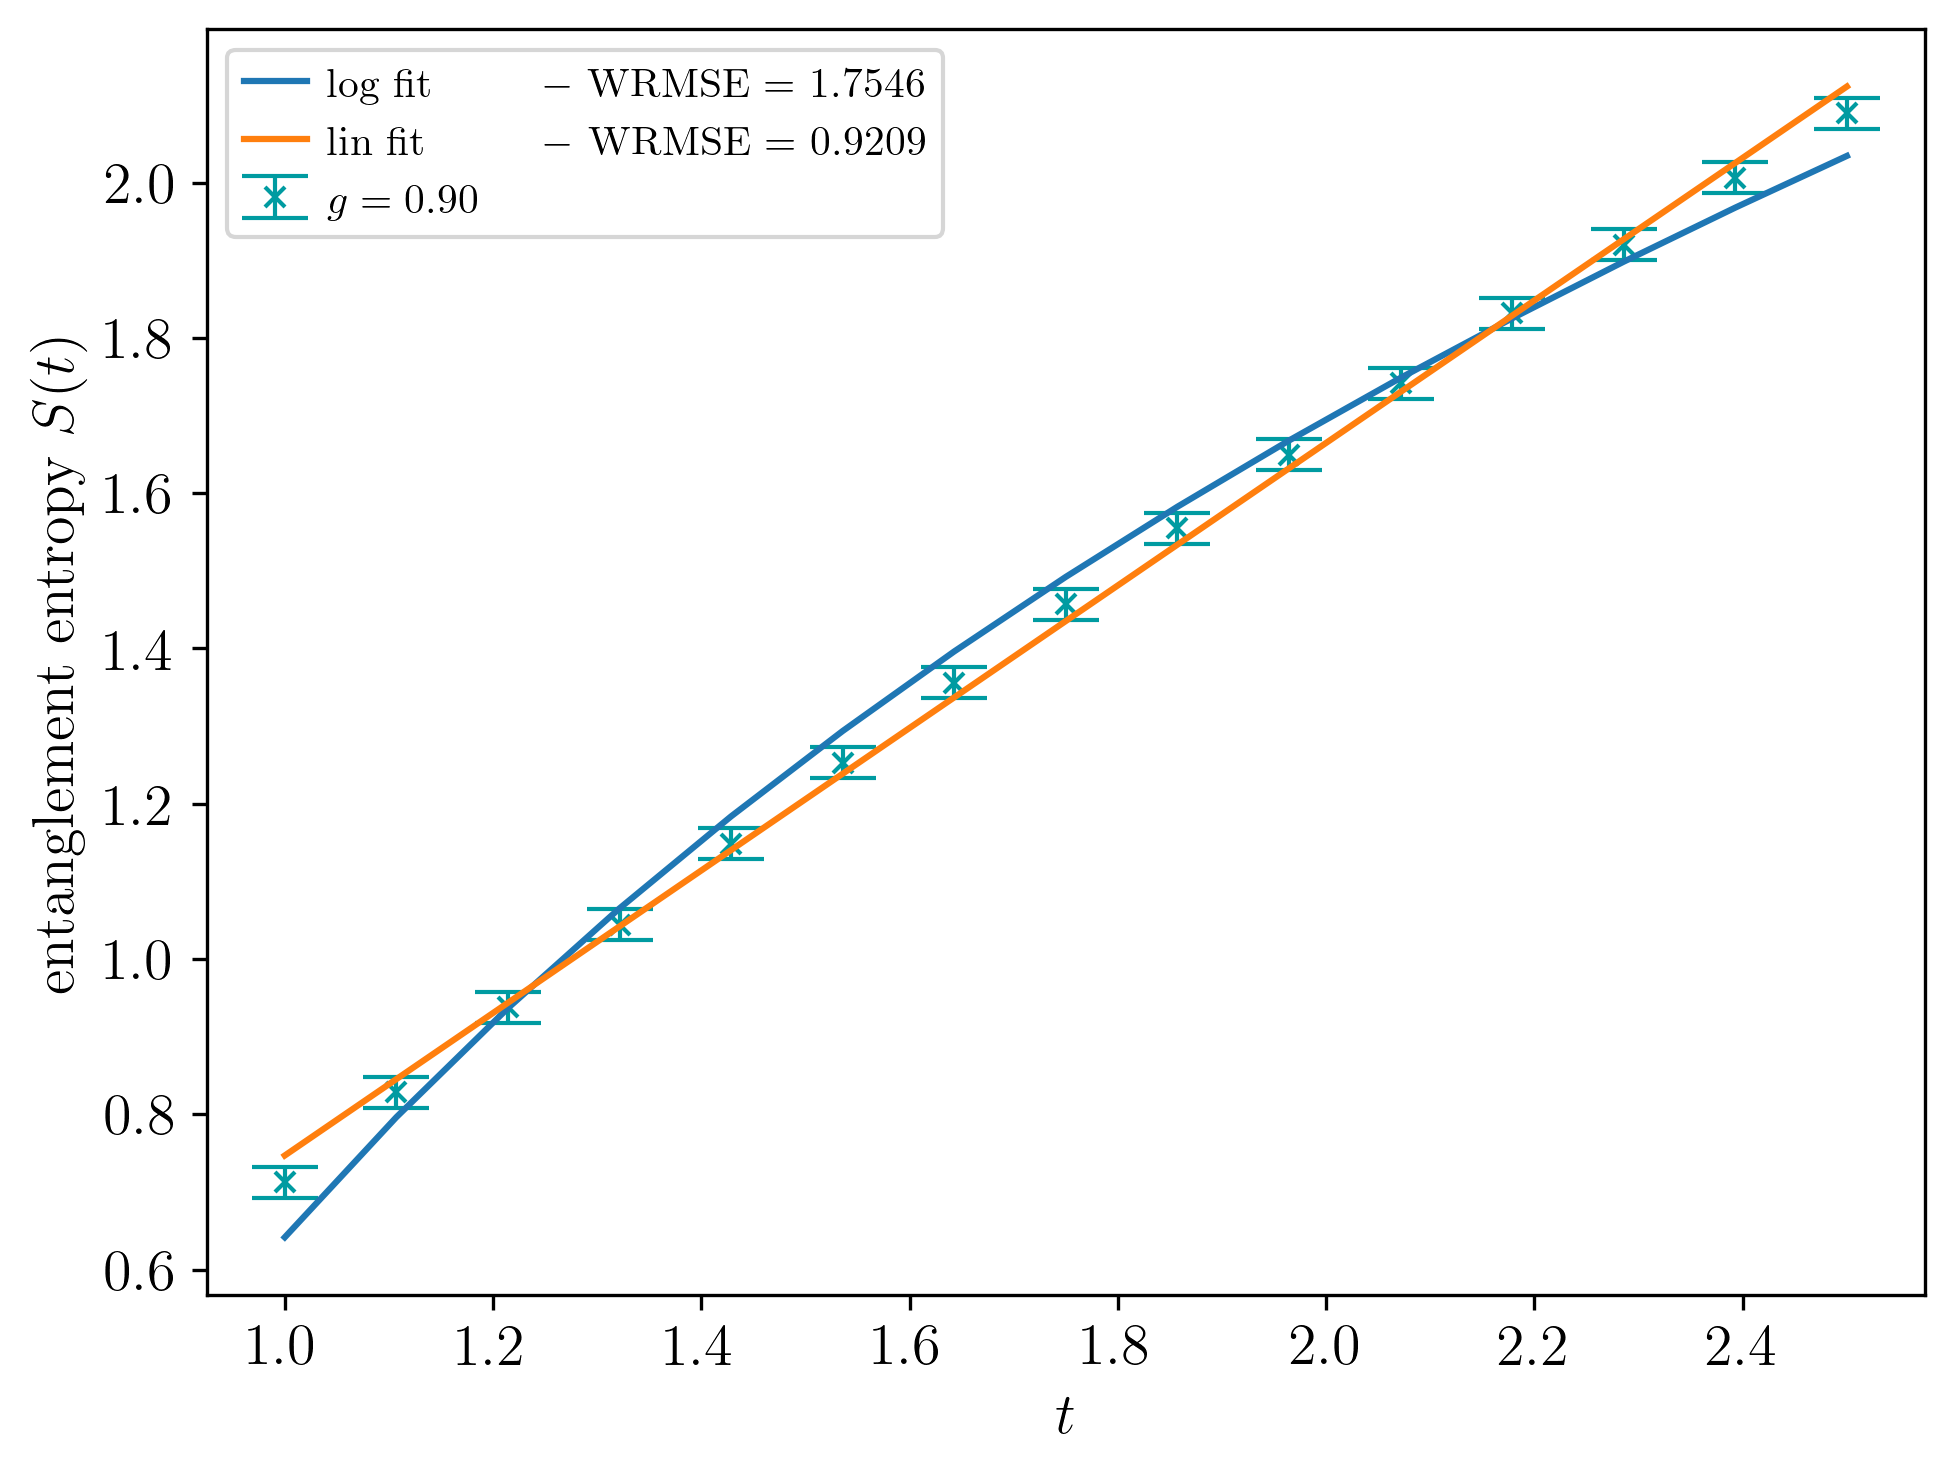

RSS log = 4.5708601, RMSE log = 1.9903296
RSS lin = 0.3883385, RMSE lin = 0.5801379


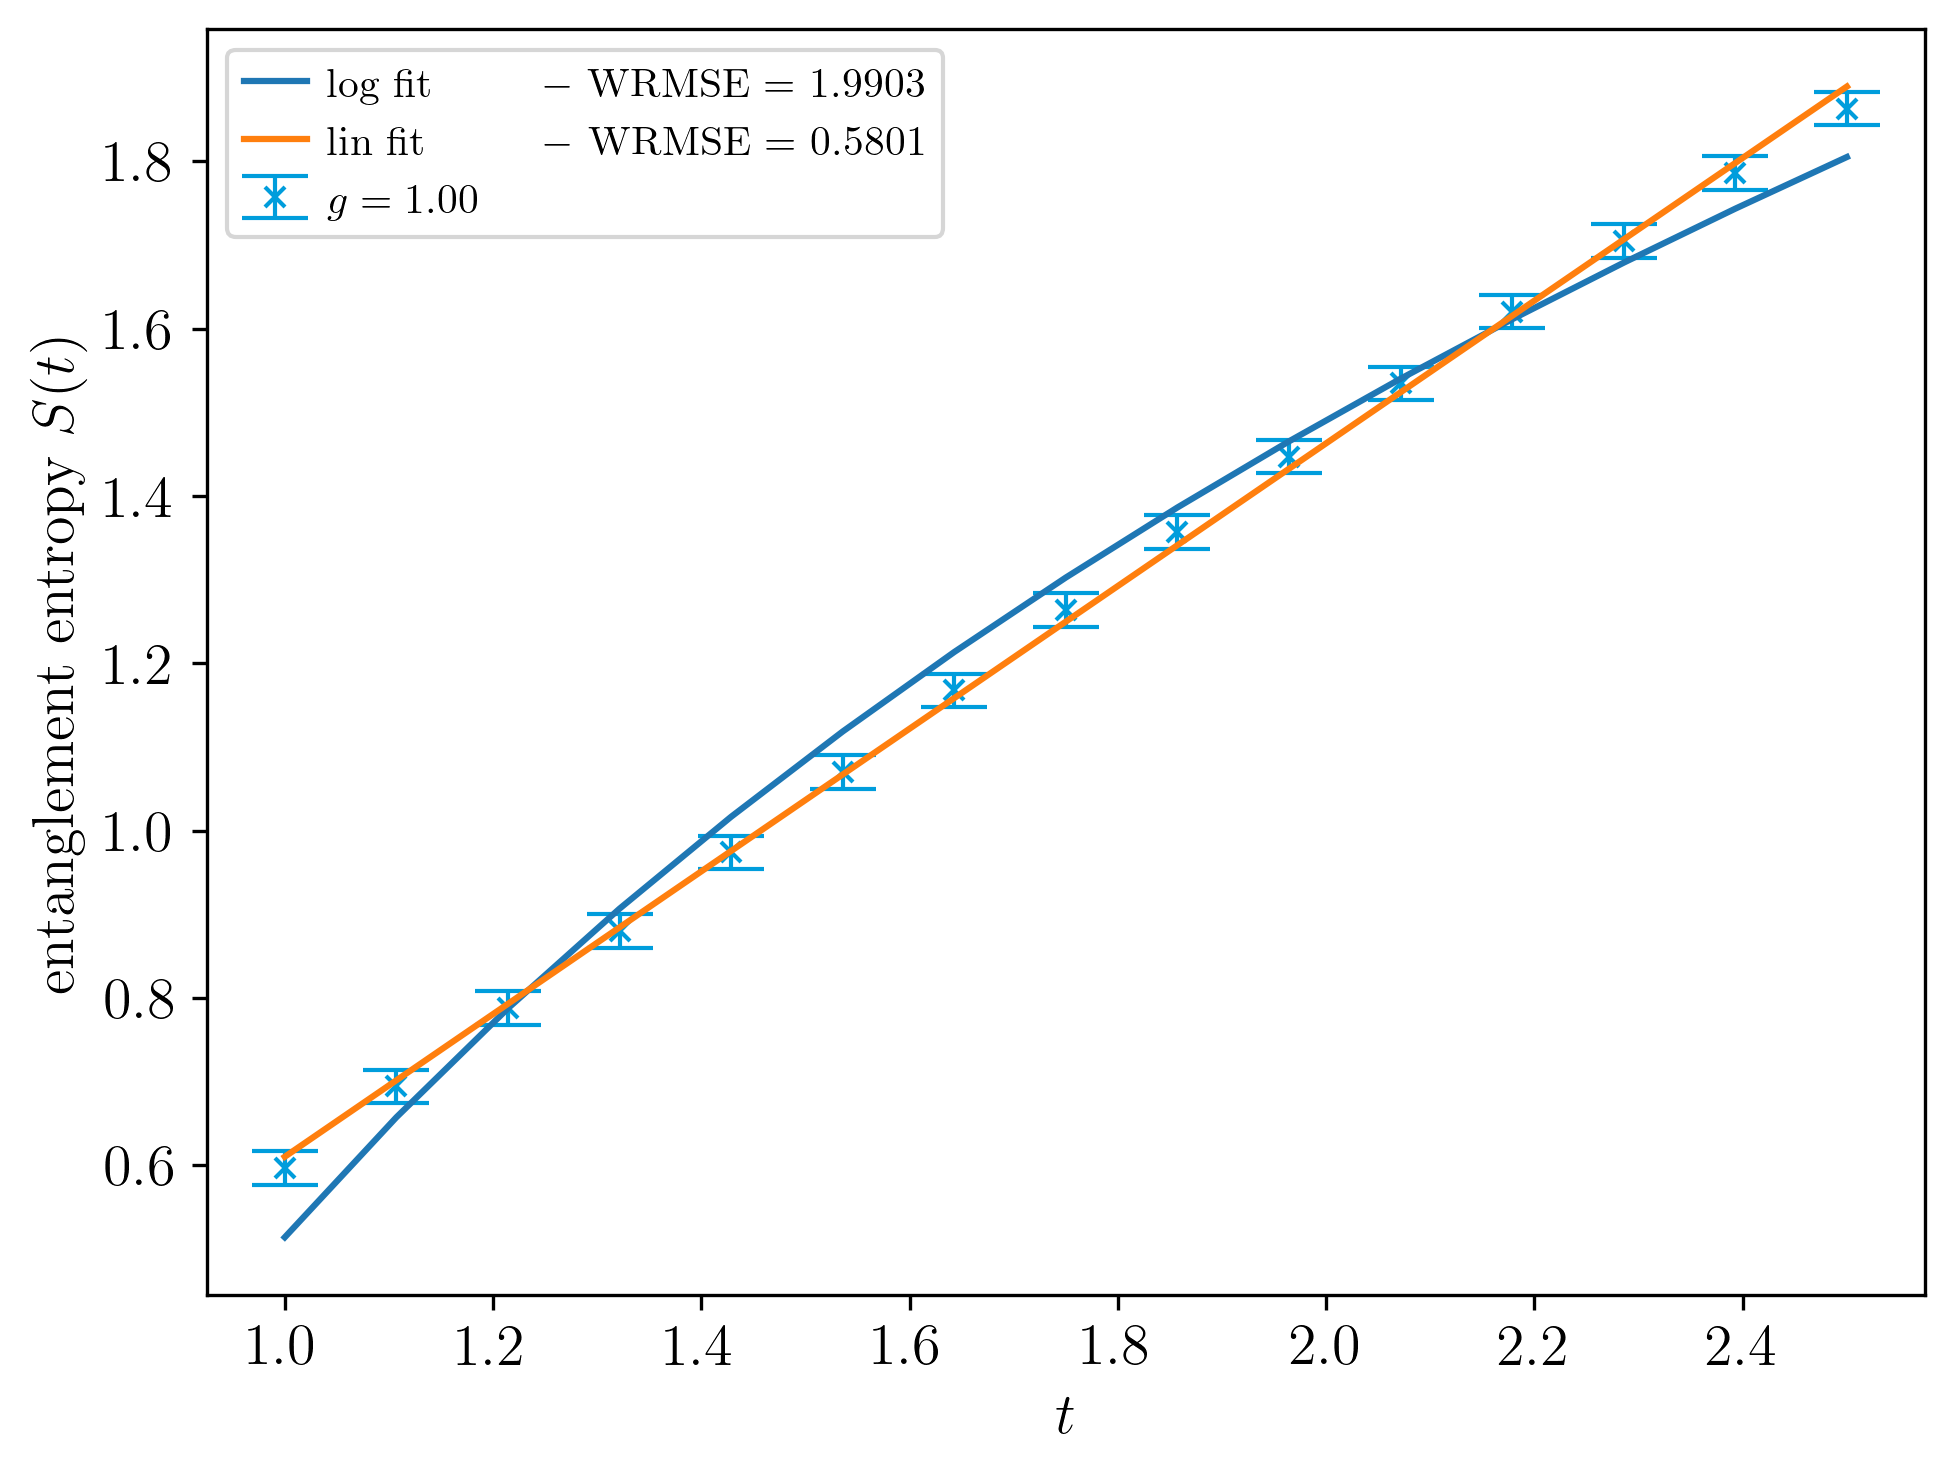

RSS log = 0.1385033, RMSE log = 0.3464624
RSS lin = 0.3133928, RMSE lin = 0.5211594


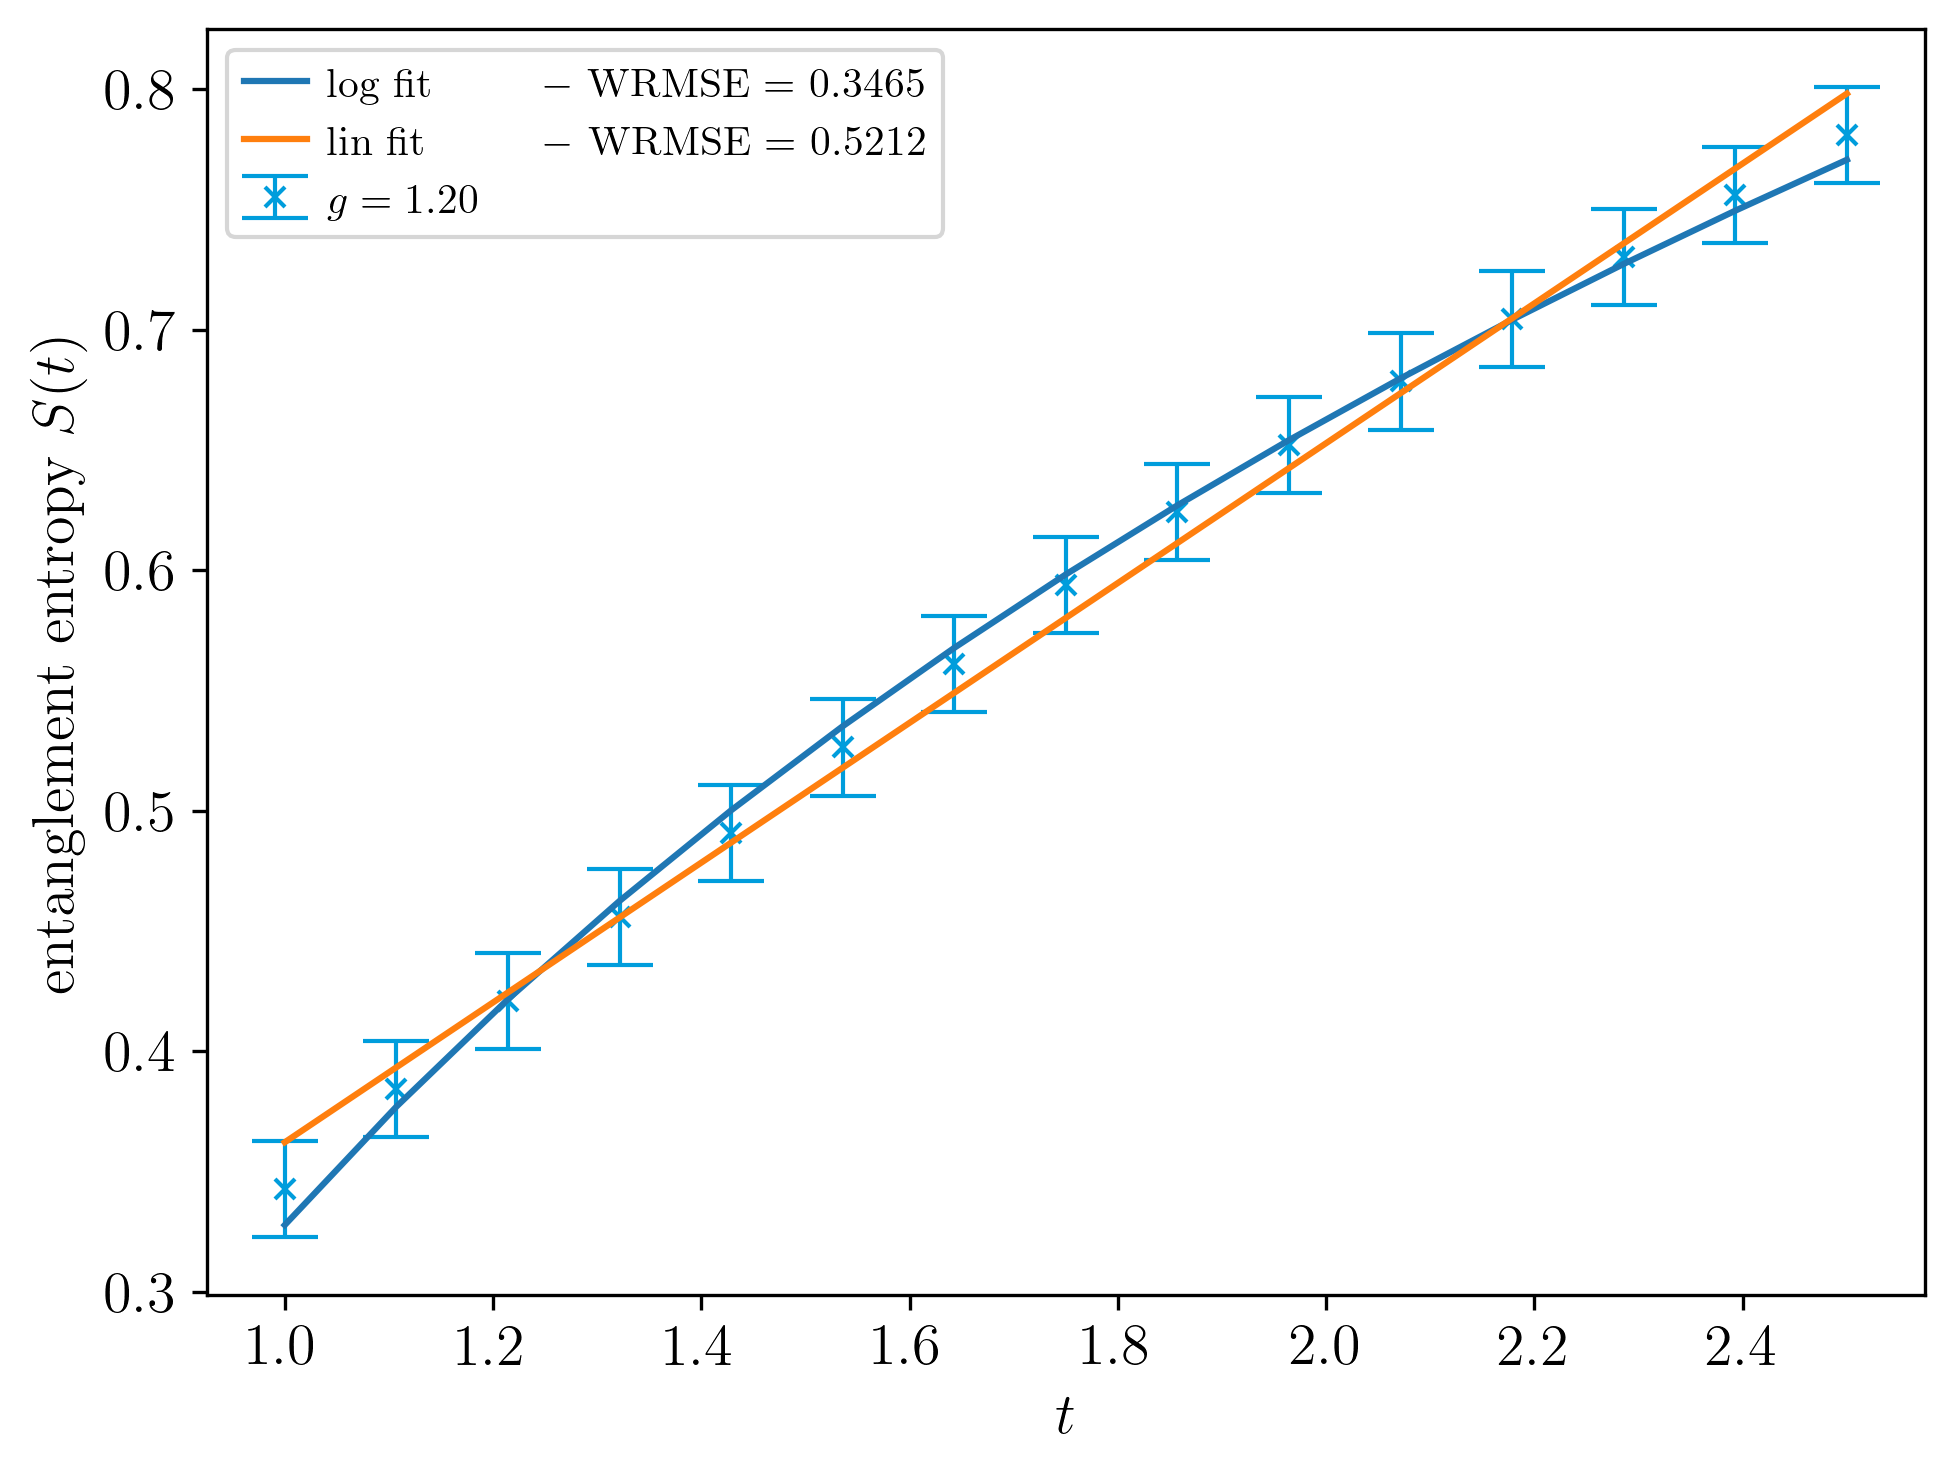

In [574]:
slope_interval = [1.0,2.5]
colors = ["#009B72", "#009B90", "#009BA1", "#009DDC", "#009DDC"]
i = 0
l, chi, R = 5, 128, 10
delta, steps = 0.01, 400
for h_i in [0.75,0.8]:
    lin_log_ent_growth(l,L,R,chi,delta,steps,h_i,bc,sector,path,slope_interval,colors[i])
    i += 1
delta, steps = 0.02, 200
for h_i in [0.9,1.0,1.2]:
    lin_log_ent_growth(l,L,R,chi,delta,steps,h_i,bc,sector,path,slope_interval,colors[i])
    i += 1

### Ehrenfest time scale nature

16.927419354838655
RSS lin = 33.8548387, RMSE lin = 2.9092456
7.4019351236851065
RSS sqrt(R) = 14.8038702, RMSE sqrt(R) = 1.9237899
4.2560755336620435
RSS log(R) = 8.5121511, RMSE log(R) = 1.4587795


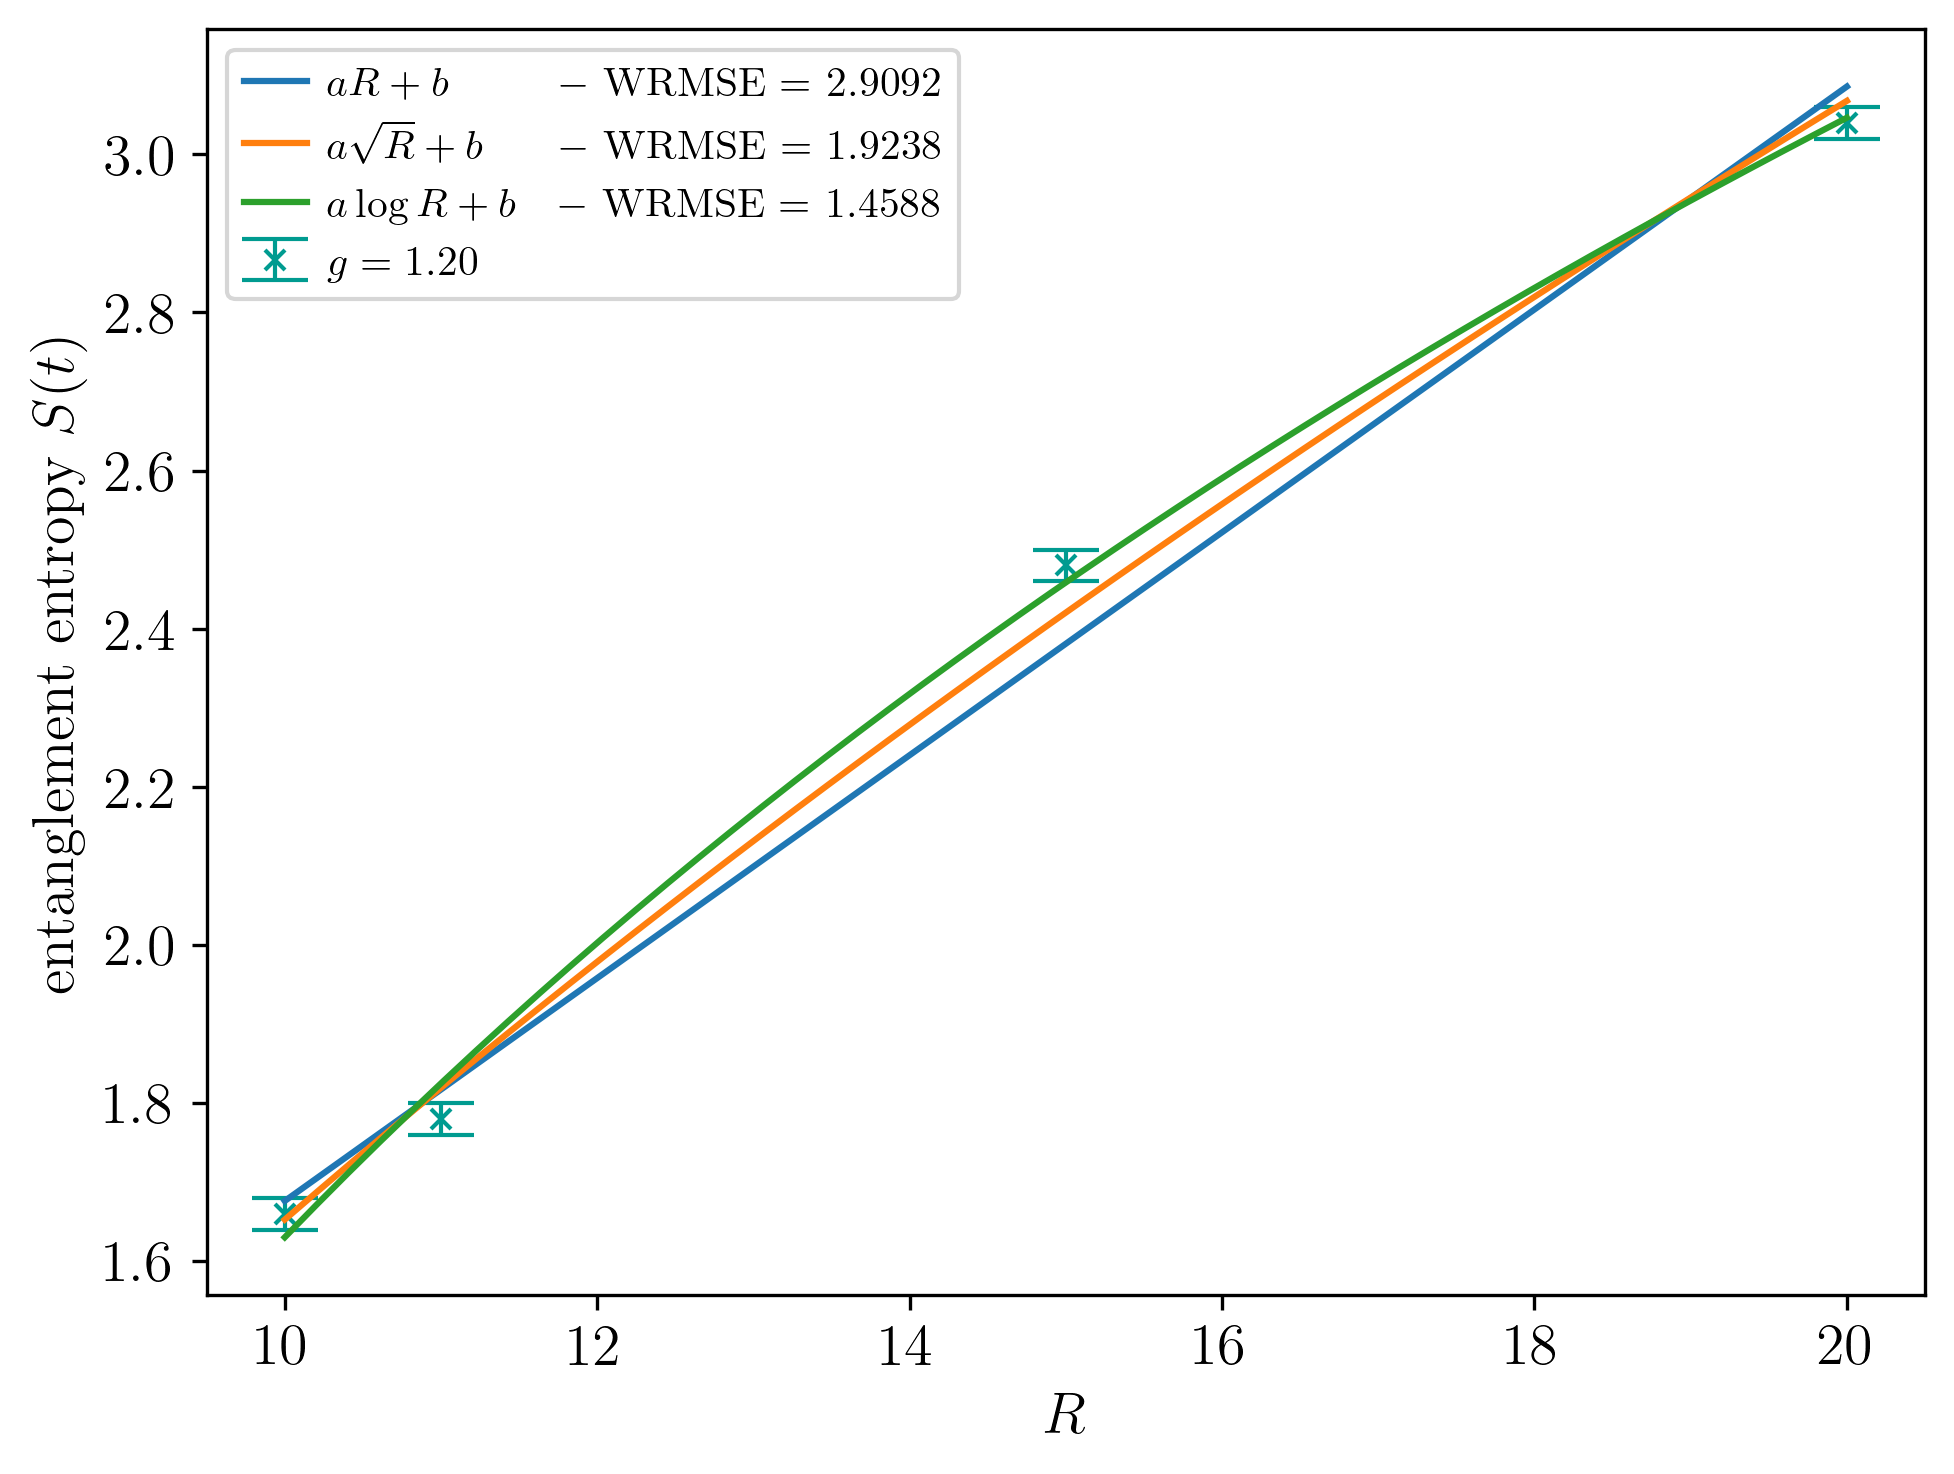

In [576]:
delta = 0.02
saturation_times = delta*np.arange(steps)[saturation_idx_entr]

def saturation_eq(R, a, b):
    return a*R + b

def log_func(R, a, b):
    return a*np.log(R) + b

def sqrt_func(R, a, b):
    return a*np.sqrt(R) + b


x_data = np.array(Rs)
y_data = saturation_times
y_data_err = [delta]*len(y_data)
# plt.plot(x_data, y_data, 'x', color="#009B90")
plt.errorbar(x=x_data, y=y_data, yerr=y_data_err, color="#009B90", marker='x', linestyle='', capsize=8, linewidth=1, markersize=5, label=f"$g= {h_ev:.2f}$", zorder=0)

popt, copt = curve_fit(saturation_eq, x_data, y_data, sigma=y_data_err)
xs = np.linspace(Rs[0], Rs[-1])

y_fit = saturation_eq(x_data,*popt)
residuals = y_data - y_fit
residuals = (y_data - y_fit)/y_data_err
RSS = np.sum(residuals**2)
RCS = np.sum(residuals**2)/(len(y_data) - len(popt))
print(RCS)
RMSE = np.sqrt(np.mean(residuals**2))
plt.plot(xs, saturation_eq(xs, *popt), '-', label="$a R + b$ $\\hspace{0.8cm}$"+f"$-$ WRMSE = ${RMSE:.4f}$")
print(f"RSS lin = {RSS:.7f}, RMSE lin = {RMSE:.7f}")

popt, copt = curve_fit(sqrt_func, x_data, y_data, sigma=y_data_err)
y_fit = sqrt_func(x_data,*popt)
residuals = y_data - y_fit
residuals = (y_data - y_fit)/y_data_err
RSS = np.sum(residuals**2)
RCS = np.sum(residuals**2)/(len(y_data) - len(popt))
RMSE = np.sqrt(np.mean(residuals**2))
plt.plot(xs, sqrt_func(xs, *popt), '-', label="$a \\sqrt{R} + b$ $\\hspace{0.51cm}$"+f"$-$ WRMSE = ${RMSE:.4f}$")
print(RCS)
print(f"RSS sqrt(R) = {RSS:.7f}, RMSE sqrt(R) = {RMSE:.7f}")

popt, copt = curve_fit(log_func, x_data, y_data, sigma=y_data_err)

y_fit = log_func(x_data,*popt)
residuals = y_data - y_fit
residuals = (y_data - y_fit)/y_data_err
RSS = np.sum(residuals**2)
RCS = np.sum(residuals**2)/(len(y_data) - len(popt))
RMSE = np.sqrt(np.mean(residuals**2))
plt.plot(xs, log_func(xs, *popt), '-', label="$a \\log{R} + b$ $\\hspace{0.22cm}$"+f"$-$ WRMSE = ${RMSE:.4f}$")
print(RCS)
print(f"RSS log(R) = {RSS:.7f}, RMSE log(R) = {RMSE:.7f}")
plt.xlabel(r'$R$')
plt.ylabel('entanglement entropy $S(t)$')
plt.legend()

## String Tension of Potential

[15, 16, 17, 18, 19, 20]
[16, 17, 18, 19, 20]
Weighted Average: 0.9956039553304852
Error in the Average: 7.370061484818923e-06
Weighted Average: 1.036550686658304
Error in the Average: 5.91815025663172e-06
Weighted Average: 1.076978057200136
Error in the Average: 6.169270947132676e-06
Weighted Average: 1.1168870692870712
Error in the Average: 6.856726740013073e-06
Weighted Average: 1.156279709381435
Error in the Average: 5.909057610949202e-06
Weighted Average: 1.195156740755132
Error in the Average: 5.683865586532996e-06
Weighted Average: 1.2335205185052465
Error in the Average: 4.096857771748959e-06
Weighted Average: 1.2713713937709519
Error in the Average: 2.9806324393245914e-06
Weighted Average: 1.3087094580305272
Error in the Average: 1.4206165289024916e-06
Weighted Average: 1.3455322672150245
Error in the Average: 1.3760249569715673e-06
Weighted Average: 1.3818339763673877
Error in the Average: 2.13216993643226e-06
[15, 16, 17, 18, 19, 20]
[16, 17, 18, 19, 20]
Weighted Average: 0.

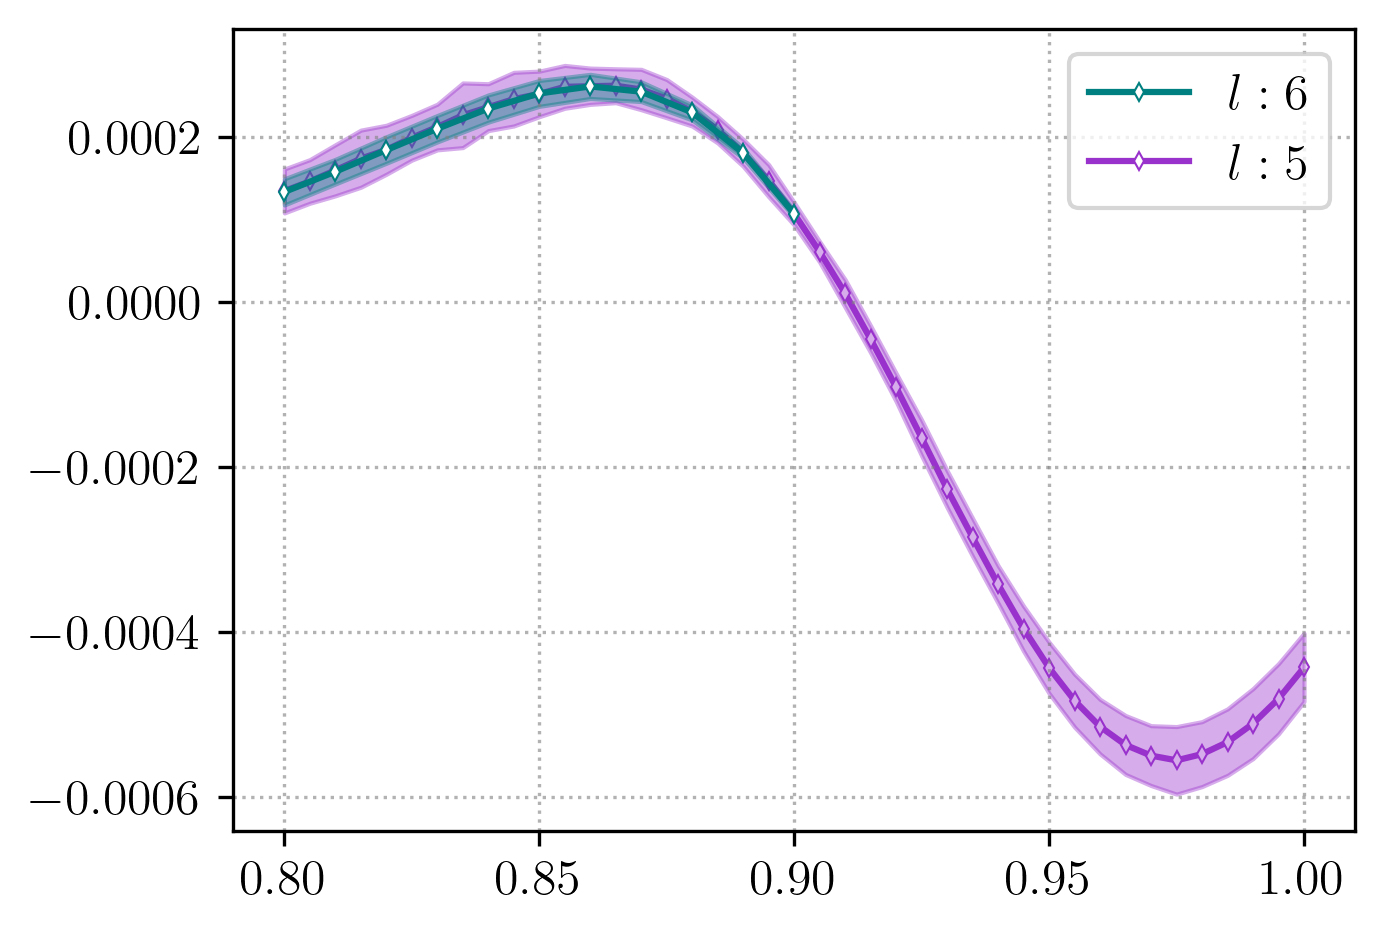

In [ ]:
param = 0
fit = 1
l = 6
h_i, h_f, npoints = 0.6, 0.95, 15
h_i, h_f, npoints = 0.8, 0.9, 11
gs = np.linspace(h_i,h_f,npoints)
chis = [128,256]
idx = 0
# chis = [64,128]
# idx = 8
Rss = [12,13,14,15,16,17,19]
Rss = [15,16,17,18,19,20]
euclidean = True
manhatten = False

# l = 5
# h_i, h_f, npoints = 0.8, 1.0, 41
# gs = np.linspace(h_i,h_f,npoints)
# chis = [64,128]
# Rss = [12,13,14,15,16,17,18,19,20]

cx = None
sigmas_on, sigmas_on_err = fit_params_sys(Rss, l, L, chis, bc, sector, h_i, h_f, npoints, path, cx, cy, param, fit)
Rss = [12,13,14,15,16,17,19]
cx = None
Rss = [15,16,17,18,19,20]
sigmas_off, sigmas_off_err = fit_params_sys(Rss, l, L, chis, bc, sector, h_i, h_f, npoints, path, cx, cy, param, fit, euclidean=euclidean, manhatten=manhatten)

obs = np.array(sigmas_off) - np.array(sigmas_on)
obs_err = np.array(sigmas_off_err) + np.array(sigmas_on_err)

fig, ax = plt.subplots(figsize=(4.5, 3))
ax.grid(color="gray", linestyle=":", alpha=0.6)

ax.plot(gs[idx:], obs[idx:], markersize=3, color="teal", marker='d', fillstyle=None, mew=0.5, mfc='w', label=f"$l: {l}$")
ax.fill_between(x=gs[idx:], y1=obs[idx:]-obs_err[idx:], y2=obs[idx:]+obs_err[idx:], color="teal", alpha=0.4)
ax.legend()


# h_i, h_f, npoints = 0.91, 0.94, 4
# gs = np.linspace(h_i,h_f,npoints)
# cx = None
# Rss = [15,16,17,18,19,20]
# sigmas_on, sigmas_on_err = fit_params_sys(Rss, l, L, chis, bc, sector, h_i, h_f, npoints, path, cx, cy, param, fit)
# cx = None
# Rss = [15,16,17,18,19,20]
# sigmas_off, sigmas_off_err = fit_params_sys(Rss, l, L, chis, bc, sector, h_i, h_f, npoints, path, cx, cy, param, fit, euclidean=euclidean, manhatten=manhatten)

# obs = np.array(sigmas_off) - np.array(sigmas_on)
# obs_err = np.array(sigmas_off_err) + np.array(sigmas_on_err)

# fig, ax = plt.subplots(figsize=(4.5, 3))
# ax.grid(color="gray", linestyle=":", alpha=0.6)

# ax.plot(gs[idx:], obs[idx:], markersize=3, color="teal", marker='d', fillstyle=None, mew=0.5, mfc='w')
# ax.fill_between(x=gs[idx:], y1=obs[idx:]-obs_err[idx:], y2=obs[idx:]+obs_err[idx:], color="teal", alpha=0.4)


# l = 5
# h_i, h_f, npoints = 1.0, 2.0, 11
# gs = np.linspace(h_i,h_f,npoints)
# chis = [64,128]
# Rss = [12,13,14,15,16,17,18,19,20]

l = 5
h_i, h_f, npoints = 0.8, 1.0, 41
gs = np.linspace(h_i,h_f,npoints)
chis = [64,128]
Rss = [12,13,14,15,16,17,19]
Rss = [15,16,17,18,19,20]

cx = None

sigmas_on, sigmas_on_err = fit_params_sys(Rss, l, L, chis, bc, sector, h_i, h_f, npoints, path, cx, cy, param, fit)
Rss = [12,13,14,15,16,17,19]
Rss = [15,16,17,18,19,20]
cx = None
sigmas_off, sigmas_off_err = fit_params_sys(Rss, l, L, chis, bc, sector, h_i, h_f, npoints, path, cx, cy, param, fit, euclidean=euclidean, manhatten=manhatten)

obs = np.array(sigmas_off) - np.array(sigmas_on)
obs_err = np.array(sigmas_off_err) + np.array(sigmas_on_err)

ax.plot(gs[0:], obs[0:], markersize=3, color="darkorchid", marker='d', fillstyle=None, mew=0.5, mfc='w', label=f"$l: {l}$", zorder=0)
ax.fill_between(x=gs[0:], y1=obs[0:]-obs_err[0:], y2=obs[0:]+obs_err[0:], color="darkorchid", alpha=0.4, zorder=0)
ax.legend()

[10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
[11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
[12, 13, 14, 15, 16, 17, 18, 19, 20]
[13, 14, 15, 16, 17, 18, 19, 20]
[14, 15, 16, 17, 18, 19, 20]
[15, 16, 17, 18, 19, 20]
Weighted Average: 0.995530876372104
Error in the Average: 9.892967390370126e-06
Weighted Average: 1.0160848503190145
Error in the Average: 9.455263118619837e-06
Weighted Average: 1.0365053722133821
Error in the Average: 1.0429147874472248e-05
Weighted Average: 1.0567940591711635
Error in the Average: 8.955909642034624e-06
Weighted Average: 1.0769526234398965
Error in the Average: 1.003792234228994e-05
Weighted Average: 1.09697854869524
Error in the Average: 9.490750208485053e-06
Weighted Average: 1.1168802561580715
Error in the Average: 5.542382619284372e-06
Weighted Average: 1.136637218712493
Error in the Average: 1.2427910452840316e-05
Weighted Average: 1.1562748572151131
Error in the Average: 8.194532649965191e-06
Weighted Average: 1.1757762399224077
Error in the Average: 1.16

/Users/fradm/Desktop/qs-mps/src/qs_mps/applications/Z2/relevant_observables.py:494: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, pcov = curve_fit(potential_fit_2, Rs, potentials, sigma=errors, p0=guess)
/Users/fradm/Desktop/qs-mps/src/qs_mps/applications/Z2/relevant_observables.py:492: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, pcov = curve_fit(potential_fit_1, Rs, potentials, sigma=errors, p0=guess)


Weighted Average: 3.1378169411388677
Error in the Average: 5.8339043457934414e-08
Weighted Average: 3.3483684162958975
Error in the Average: 1.8283492853238268e-08
Weighted Average: 3.5566351288010916
Error in the Average: 5.5055393447574276e-08
Weighted Average: 3.763211574364582
Error in the Average: 5.5199973962201634e-08
Weighted Average: 3.968513218666262
Error in the Average: 5.2721313024404604e-08
[[1.71368199 1.99462342 2.24615516 2.48110786 2.70590858 2.92410729
  3.13781702 3.34836841 3.55663511 3.76321164 3.96851321]
 [1.7136882  1.99462306 2.24615513 2.4811078  2.70590843 2.92410726
  3.13781702 3.34836842 3.55663521 3.76321176 3.96851324]
 [1.71369324 1.99462053 2.24615527 2.48110775 2.70590858 2.9241071
  3.13781712 3.34836812 3.5566351  3.76321157 3.9685132 ]
 [1.71369748 1.99462052 2.24615502 2.48110773 2.70590837 2.9241074
  3.13781682 3.34836824 3.55663532 3.76321155 3.96851316]
 [1.71370099 1.99462018 2.24615534 2.48110775 2.70590845 2.92410728
  3.13781685 3.3483682

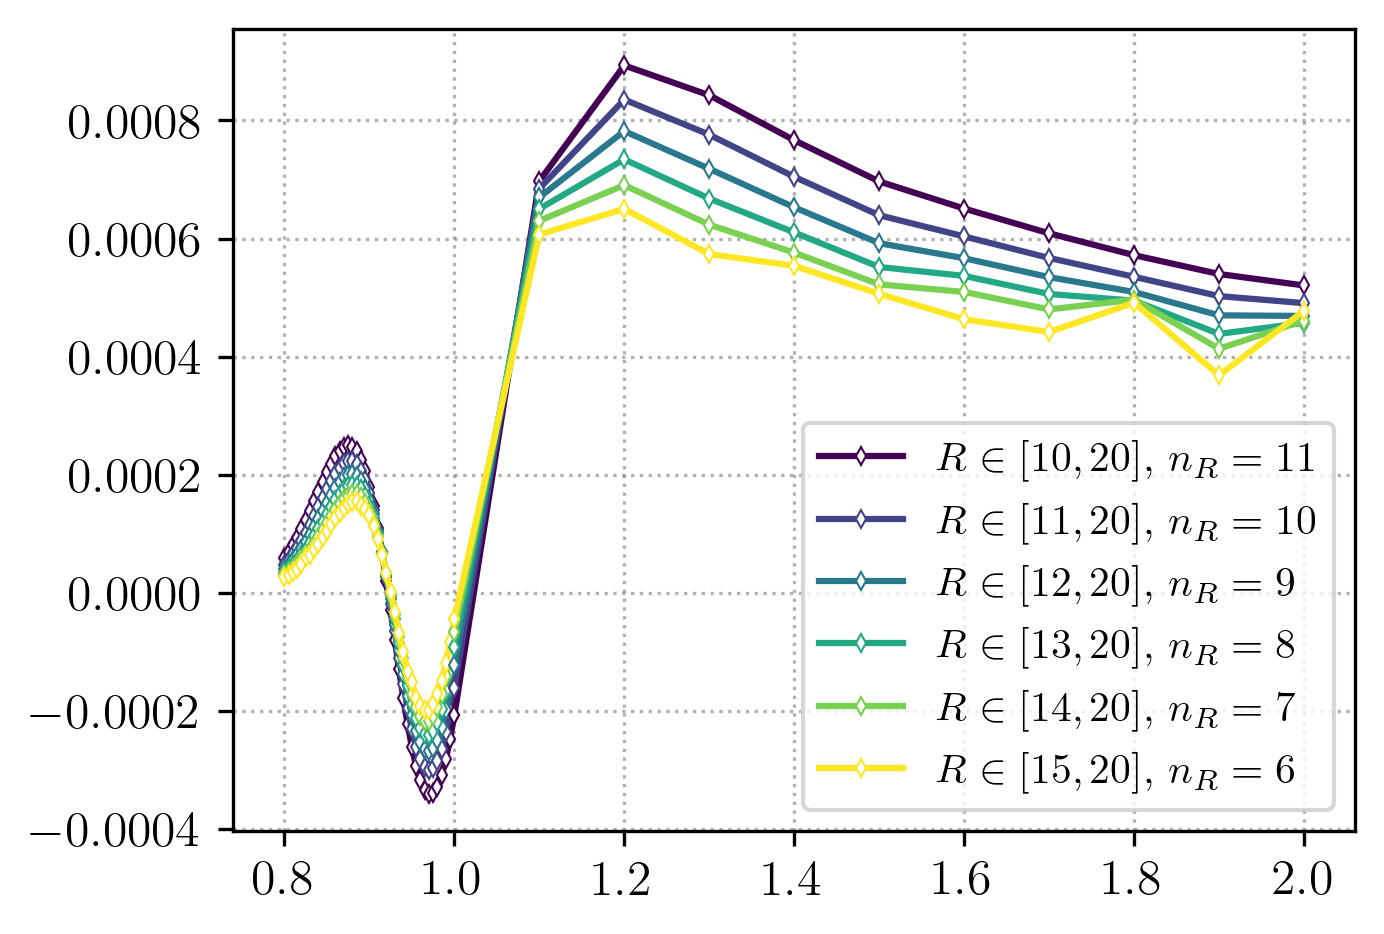

In [422]:
fit = 2
param = 0

fig, ax = plt.subplots(figsize=(4.5, 3))
ax.grid(color="gray", linestyle=":", alpha=0.6)

euclidean = True
manhatten = False

l = 5
h_i, h_f, npoints = 0.8, 1.0, 41
gs = np.linspace(h_i,h_f,npoints)
chis = [64,128]
# Rss = [12,13,14,15,16,17,18,19,20]
Rss = [10,11,12,13,14,15,16,17,18,19,20]

sigmas_on, sigmas_on_err, sigmas_on_ris, sigmas_on_ris_err, list_ris = fit_params_sys(Rss, l, L, chis, bc, sector, h_i, h_f, npoints, path, cx, cy, param, fit, ris=True)
print(sigmas_on_ris, np.asarray(sigmas_on_ris).shape)
Rss = [10,11,12,13,14,15,16,17,18,19,20]
cx = None
sigmas_off, sigmas_off_err, sigmas_off_ris, sigmas_off_ris_err, list_ris = fit_params_sys(Rss, l, L, chis, bc, sector, h_i, h_f, npoints, path, cx, cy, param, fit, euclidean=euclidean, manhatten=manhatten, ris=True)
print(sigmas_off_ris, np.asarray(sigmas_off_ris).shape)

# obs = np.array(sigmas_off) - np.array(sigmas_on)
# obs_err = np.array(sigmas_off_err) + np.array(sigmas_on_err)


# ax.plot(gs[0:], obs[0:], markersize=3, color="teal", marker='d', fillstyle=None, mew=0.5, mfc='w', label=f"$\\sigma_{{off}} - \\sigma_{{on}}$")
# ax.fill_between(x=gs[0:], y1=obs[0:]-obs_err[0:], y2=obs[0:]+obs_err[0:], color="teal", alpha=0.4)


i = 0
colors = create_sequential_colors(len(list_ris))
for sigmas_on_ri, sigmas_off_ri, ri in zip(sigmas_on_ris, sigmas_off_ris, list_ris):
    obs = np.array(sigmas_off_ri) - np.array(sigmas_on_ri)

    ax.plot(gs[0:], obs[0:], markersize=3, color=colors[i], marker='d', fillstyle=None, mew=0.5, mfc='w', label=f"$R \\in [{ri[0]},{ri[-1]}]$, $n_R={len(ri)}$")
    i += 1

l = 5
h_i, h_f, npoints = 1.0, 2.0, 11
gs = np.linspace(h_i,h_f,npoints)
chis = [64,128]
Rss = [10,11,12,13,14,15,16,17,18,19,20]

cx = None
sigmas_on, sigmas_on_err, sigmas_on_ris, sigmas_on_ris_err, list_ris = fit_params_sys(Rss, l, L, chis, bc, sector, h_i, h_f, npoints, path, cx, cy, param, fit, ris=True)
print(sigmas_on_ris, np.asarray(sigmas_on_ris).shape)
Rss = [10,11,12,13,14,15,16,17,18,19,20]
cx = None
sigmas_off, sigmas_off_err, sigmas_off_ris, sigmas_off_ris_err, list_ris = fit_params_sys(Rss, l, L, chis, bc, sector, h_i, h_f, npoints, path, cx, cy, param, fit, euclidean=euclidean, manhatten=manhatten, ris=True)

# obs = np.array(sigmas_off) - np.array(sigmas_on)
# obs_err = np.array(sigmas_off_err) + np.array(sigmas_on_err)

# ax.plot(gs[0:], obs[0:], markersize=3, color="teal", marker='d', fillstyle=None, mew=0.5, mfc='w')
# ax.fill_between(x=gs[0:], y1=obs[0:]-obs_err[0:], y2=obs[0:]+obs_err[0:], color="teal", alpha=0.4)


i = 0
colors = create_sequential_colors(len(list_ris))
for sigmas_on_ri, sigmas_off_ri, ri in zip(sigmas_on_ris, sigmas_off_ris, list_ris):
    obs = np.array(sigmas_off_ri) - np.array(sigmas_on_ri)

    ax.plot(gs[0:], obs[0:], markersize=3, color=colors[i], marker='d', fillstyle=None, mew=0.5, mfc='w')
    i += 1

ax.legend(fontsize=10)

[25, 26, 27, 28, 29, 30]
[26, 27, 28, 29, 30]
Weighted Average: 0.9955394700149398
Error in the Average: 3.940007436634039e-05
Weighted Average: 1.1951834178786263
Error in the Average: 2.536872223628358e-05
Weighted Average: 1.381819168740942
Error in the Average: 5.5601258747783336e-05
Weighted Average: 1.5551153917681266
Error in the Average: 8.366991541719988e-06
Weighted Average: 1.7137090298589985
Error in the Average: 1.468082501639959e-06
[[0.99553902 1.19518301 1.38181905 1.55511496 1.71370867]
 [0.9955396  1.19518482 1.38181941 1.55511581 1.71370964]] (2, 5)
[25, 26, 27, 28, 29, 30]
[26, 27, 28, 29, 30]
Weighted Average: 0.995571704602765
Error in the Average: 0.0001220331948489278
Weighted Average: 1.1952623567197314
Error in the Average: 4.622449997376244e-05
Weighted Average: 1.381898123860692
Error in the Average: 3.087137770242288e-05
Weighted Average: 1.5549724640324782
Error in the Average: 2.2843150798447336e-05
Weighted Average: 1.7136883017678726
Error in the Averag

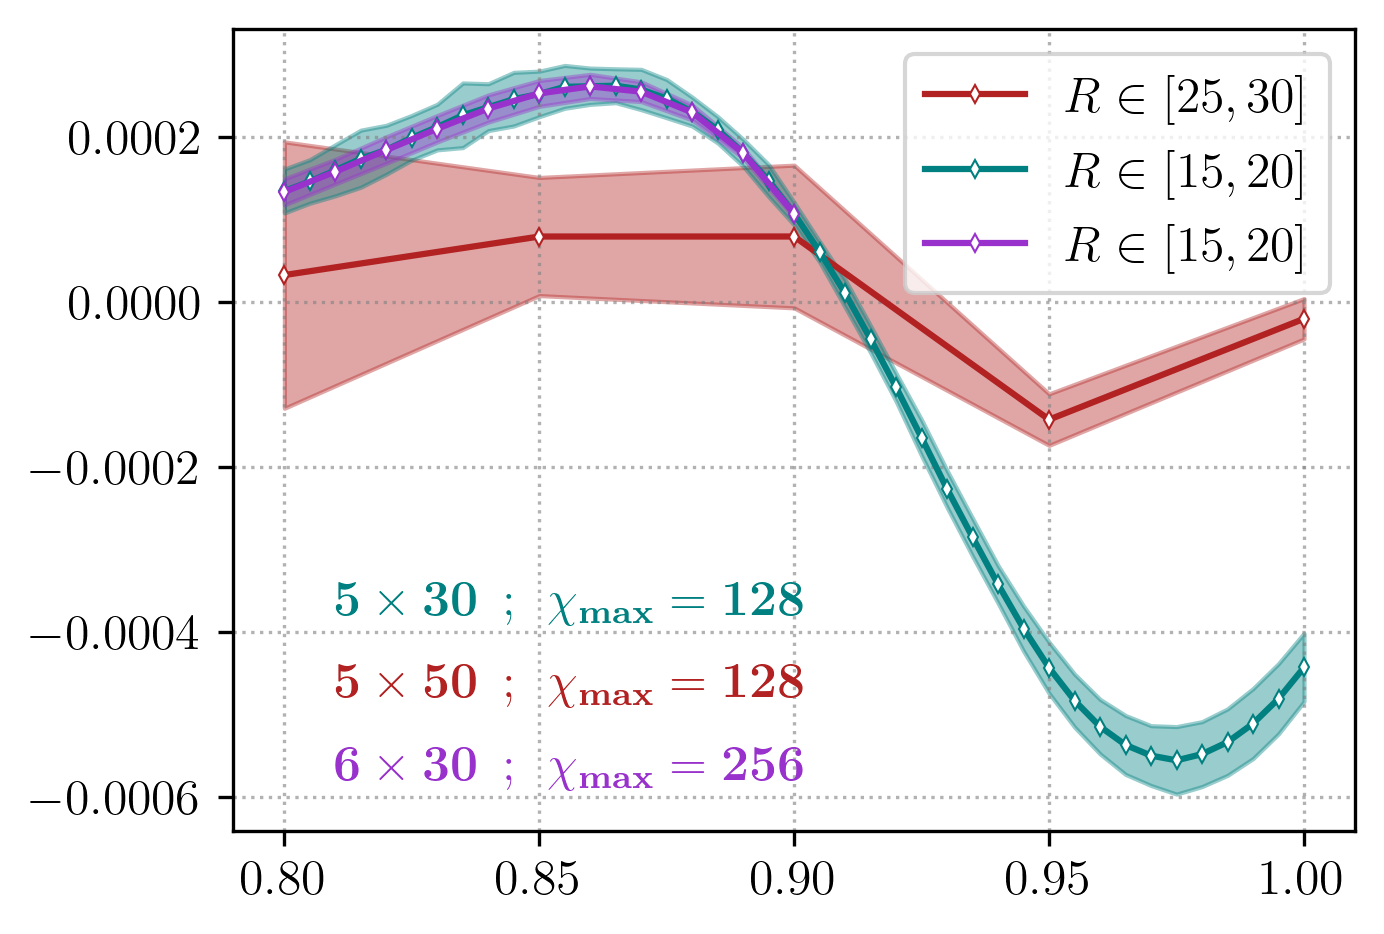

In [423]:
fit = 1
param = 0
fig, ax = plt.subplots(figsize=(4.5, 3))
ax.grid(color="gray", linestyle=":", alpha=0.6)

euclidean = True
manhatten = False

l = 5
L = 50
h_i, h_f, npoints = 0.8, 1.0, 5
gs = np.linspace(h_i,h_f,npoints)
chis = [64,128]
Rs = [25,26,27,28,29,30]
cx = None

sigmas_on, sigmas_on_err, sigmas_on_ris, sigmas_on_ris_err, list_ris = fit_params_sys(Rs, l, L, chis, bc, sector, h_i, h_f, npoints, path, cx, cy, param, fit, ris=True)
print(sigmas_on_ris, np.asarray(sigmas_on_ris).shape)
Rs = [25,26,27,28,29,30]
cx = None
sigmas_off, sigmas_off_err, sigmas_off_ris, sigmas_off_ris_err, list_ris = fit_params_sys(Rs, l, L, chis, bc, sector, h_i, h_f, npoints, path, cx, cy, param, fit, euclidean=euclidean, manhatten=manhatten, ris=True)
print(sigmas_off_ris, np.asarray(sigmas_off_ris).shape)

obs = np.array(sigmas_off) - np.array(sigmas_on)
obs_err = np.array(sigmas_off_err) + np.array(sigmas_on_err)

Rs = [25,26,27,28,29,30]

ax.plot(gs[0:], obs[0:], markersize=3, color="firebrick", marker='d', fillstyle=None, mew=0.5, mfc='w', label=f"$R \in [{Rs[0]},{Rs[-1]}]$")
ax.fill_between(x=gs[0:], y1=obs[0:]-obs_err[0:], y2=obs[0:]+obs_err[0:], color="firebrick", alpha=0.4)

l = 5
L = 30
h_i, h_f, npoints = 0.8, 1.0, 41
gs = np.linspace(h_i,h_f,npoints)
chis = [64,128]
# Rs = [12,13,14,15,16,17,18,19,20]
Rs = [15,16,17,18,19,20]

sigmas_on, sigmas_on_err, sigmas_on_ris, sigmas_on_ris_err, list_ris = fit_params_sys(Rs, l, L, chis, bc, sector, h_i, h_f, npoints, path, cx, cy, param, fit, ris=True)
print(sigmas_on_ris, np.asarray(sigmas_on_ris).shape)
Rs = [15,16,17,18,19,20]
cx = None
sigmas_off, sigmas_off_err, sigmas_off_ris, sigmas_off_ris_err, list_ris = fit_params_sys(Rs, l, L, chis, bc, sector, h_i, h_f, npoints, path, cx, cy, param, fit, euclidean=euclidean, manhatten=manhatten, ris=True)
print(sigmas_off_ris, np.asarray(sigmas_off_ris).shape)

obs = np.array(sigmas_off) - np.array(sigmas_on)
obs_err = np.array(sigmas_off_err) + np.array(sigmas_on_err)

Rs = [15,16,17,18,19,20]

ax.plot(gs[0:], obs[0:], markersize=3, color="teal", marker='d', fillstyle=None, mew=0.5, mfc='w', label=f"$R \in [{Rs[0]},{Rs[-1]}]$")
ax.fill_between(x=gs[0:], y1=obs[0:]-obs_err[0:], y2=obs[0:]+obs_err[0:], color="teal", alpha=0.4)


h_i, h_f, npoints = 0.8, 0.9, 11
gs = np.linspace(h_i,h_f,npoints)
chis = [128,256]
idx = 0
l, L = 6, 30
cx = None
Rs = [15,16,17,18,19,20]
sigmas_on, sigmas_on_err = fit_params_sys(Rs, l, L, chis, bc, sector, h_i, h_f, npoints, path, cx, cy, param, fit)
cx = None
Rs = [15,16,17,18,19,20]
sigmas_off, sigmas_off_err = fit_params_sys(Rs, l, L, chis, bc, sector, h_i, h_f, npoints, path, cx, cy, param, fit, euclidean=euclidean, manhatten=manhatten)

obs = np.array(sigmas_off) - np.array(sigmas_on)
obs_err = np.array(sigmas_off_err) + np.array(sigmas_on_err)

Rs = [15,16,17,18,19,20]
ax.plot(gs[idx:], obs[idx:], markersize=3, color="darkorchid", marker='d', fillstyle=None, mew=0.5, mfc='w', label=f"$R \in [{Rs[0]},{Rs[-1]}]$")
ax.fill_between(x=gs[idx:], y1=obs[idx:]-obs_err[idx:], y2=obs[idx:]+obs_err[idx:], color="darkorchid", alpha=0.4)
ax.legend()

ax.text(x=0.81, y=-0.00038, s="$\\bf{5 \\times 30 \\hspace{0.2cm} ; \\hspace{0.2cm} \\chi_{max}=128}$", color="teal")
ax.text(x=0.81, y=-0.00048, s="$\\bf{5 \\times 50 \\hspace{0.2cm} ; \\hspace{0.2cm} \\chi_{max}=128}$", color="firebrick")
ax.text(x=0.81, y=-0.00058, s="$\\bf{6 \\times 30 \\hspace{0.2cm} ; \\hspace{0.2cm} \\chi_{max}=256}$", color="darkorchid")
ax.legend()


# i = 0
# colors = create_sequential_colors(len(list_ris))
# for sigmas_on_ri, sigmas_off_ri, ri in zip(sigmas_on_ris, sigmas_off_ris, list_ris):
#     obs = np.array(sigmas_off_ri) - np.array(sigmas_on_ri)

#     ax.plot(gs[0:], obs[0:], markersize=3, color=colors[i], marker='d', fillstyle=None, mew=0.5, mfc='w', label=f"$R \\in [{ri[0]},{ri[-1]}]$, $n_R={len(ri)}$")
#     i += 1



sigma on 256

[15, 16, 17, 18, 19, 20]
Weighted Average: 0.9956493820098042
Error in the Average: 1.9499663188130688e-05
Weighted Average: 1.03659906955077
Error in the Average: 1.0291491215644997e-05
Weighted Average: 1.077028861534872
Error in the Average: 4.680385903044563e-06
Weighted Average: 1.1169385589121388
Error in the Average: 1.1783693071870903e-05
Weighted Average: 1.1563287887243328
Error in the Average: 6.858474170075499e-06
Weighted Average: 1.1952004645206886
Error in the Average: 1.1906965542773778e-05
Weighted Average: 1.2335550673328834
Error in the Average: 4.127629936997735e-06
Weighted Average: 1.2713936849925407
Error in the Average: 4.632555766442842e-06
Weighted Average: 1.3087175468358407
Error in the Average: 2.2790463272637374e-06
Weighted Average: 1.3455258650194575
Error in the Average: 7.268567592050473e-06
Weighted Average: 1.381815659476979
Error in the Average: 6.522515551462481e-06
[[0.99564938 1.03659907 1.07702886 1.11693856 1.15632879 1.19520046


/var/folders/d1/c6hqhfn161x458f4d0m3_rm80000gp/T/ipykernel_1308/54154181.py:95: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


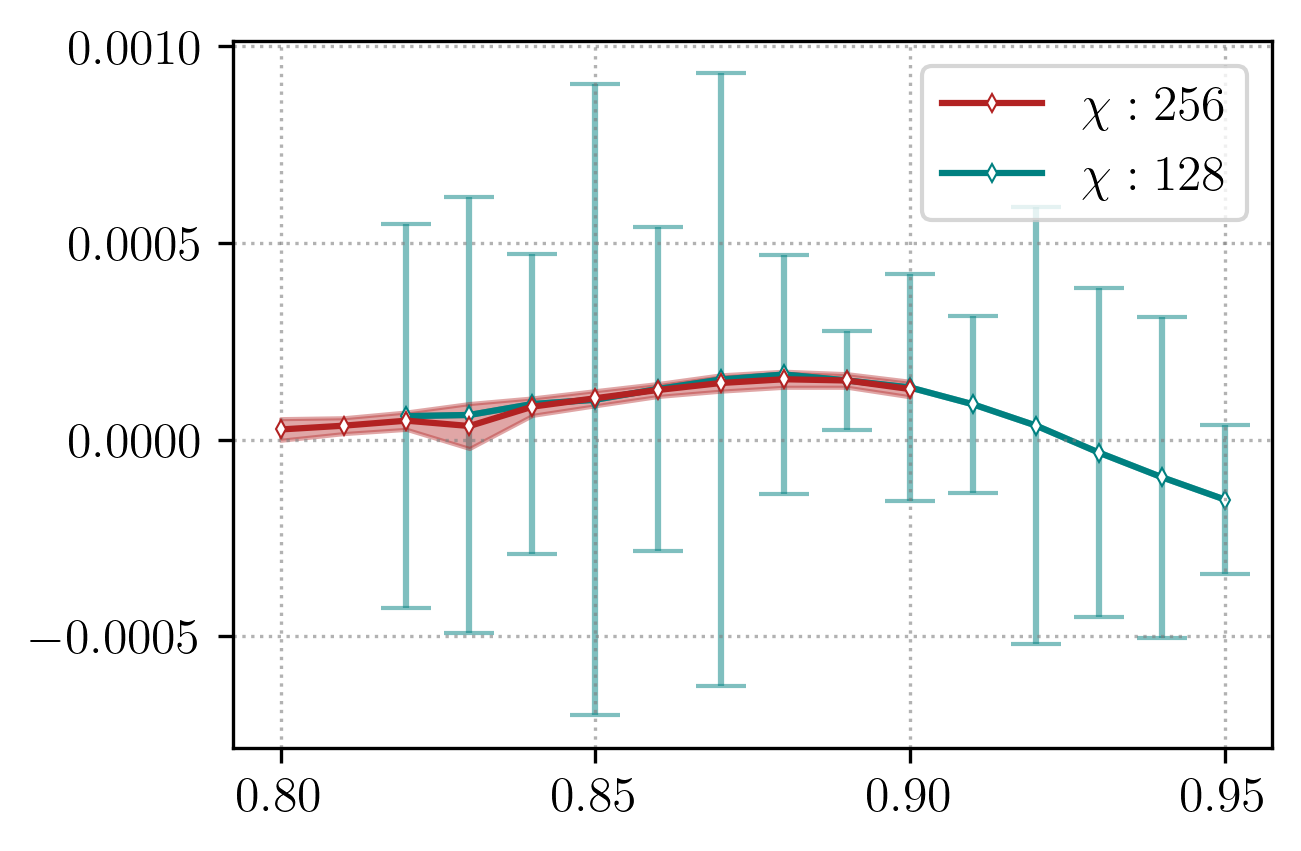

In [213]:
fit = 2
param = 0

l = 6
euclidean = True
manhatten = False
sector = "2_particle(s)_sector"

h_i, h_f, npoints = 0.8, 0.90, 11
gs = np.linspace(h_i,h_f,npoints)
chis = [128,256]
Rss = [15,16,17,18,19,20]

# l = 5
# h_i, h_f, npoints = 0.8, 1.0, 41
# gs = np.linspace(h_i,h_f,npoints)
# chis = [64,128]
# Rss = [13,14,15,16,17,18,19,20]
cx = None
print("\nsigma on 256\n")
sigmas_on, sigmas_on_err, sigmas_on_ris, list_Rs = fit_params_sys(Rss, l, L, chis, bc, sector, h_i, h_f, npoints, path, cx, cy, param, fit, ris=True)
# Rss = [13,14,15,16,17,18,19,20]
print(sigmas_on_ris)
# Rss = [12,13,14,15,16,17,19]
Rss = [15,16,17,18,19,20]
print("\nsigma off 256\n")
cx = None
sigmas_off, sigmas_off_err, sigmas_off_ris, _ = fit_params_sys(Rss, l, L, chis, bc, sector, h_i, h_f, npoints, path, cx, cy, param, fit, euclidean=euclidean, manhatten=manhatten, ris=True)

obs = np.array(sigmas_off) - np.array(sigmas_on)
obs_err = np.array(sigmas_off_err) + np.array(sigmas_on_err)

fig, ax = plt.subplots(figsize=(4.5, 3))
ax.grid(color="gray", linestyle=":", alpha=0.6)

ax.plot(gs[0:], obs[0:], markersize=3, color="firebrick", marker='d', fillstyle=None, mew=0.5, mfc='w', label=f"$\\chi: {chis[-1]}$")
# ax.plot(gs[0:], obs[0:], markersize=3, color="firebrick", marker='d', fillstyle=None, mew=0.5, mfc='w', label=f"$\\sigma_{{off}} - \\sigma_{{on}}$")
ax.fill_between(x=gs[0:], y1=obs[0:]-obs_err[0:], y2=obs[0:]+obs_err[0:], color="firebrick", alpha=0.4)
ax.legend()


h_i, h_f, npoints = 0.8, 0.90, 11
h_i, h_f, npoints = 0.8, 0.95, 16
# h_i, h_f, npoints = 0.6, 0.95, 15
gs = np.linspace(h_i,h_f,npoints)
chis = [64,128]
cx = None
idx = 2

Rss = [15,16,17,18,19,20]
# Rss = [12,13,14,15,16,17,19]
euclidean = True
manhatten = False


print("\nsigma on 128\n")
sigmas_on, sigmas_on_err, sigmas_on_ris, list_Rs = fit_params_sys(Rss, l, L, chis, bc, sector, h_i, h_f, npoints, path, cx, cy, param, fit, ris=True)
Rss = [15,16,17,18,19,20]
# Rss = [12,13,14,15,16,17,19]
print("\nsigma off 128\n")
cx = None
sigmas_off, sigmas_off_err, sigmas_off_ris, _ = fit_params_sys(Rss, l, L, chis, bc, sector, h_i, h_f, npoints, path, cx, cy, param, fit, euclidean=euclidean, manhatten=manhatten, ris=True)

obs = np.array(sigmas_off) - np.array(sigmas_on)
obs_err = np.array(sigmas_off_err) + np.array(sigmas_on_err)

ax.plot(gs[idx:], obs[idx:], markersize=3, color="teal", marker='d', fillstyle=None, mew=0.5, mfc='w', label=f"$\\chi: {chis[-1]}$", zorder=1)
ax.errorbar(x=gs[idx:], y=obs[idx:], yerr=obs_err[idx:], color="teal", alpha=0.5, capsize=6, zorder=0)


# h_i, h_f, npoints = 0.6, 0.95, 15
# gs = np.linspace(h_i,h_f,npoints)
# chis = [64,128]
# Rss = [12,13,14,15,16,17,19]
# euclidean = True
# manhatten = False


# print("\nsigma on 128\n")
# sigmas_on, sigmas_on_err, sigmas_on_ris, list_Rs = fit_params_sys(Rss, l, L, chis, bc, sector, h_i, h_f, npoints, path, cx, cy, param, fit, ris=True)
# Rss = [12,13,14,15,16,17,19]
# print("\nsigma off 128\n")
# cx = None
# sigmas_off, sigmas_off_err, sigmas_off_ris, _ = fit_params_sys(Rss, l, L, chis, bc, sector, h_i, h_f, npoints, path, cx, cy, param, fit, euclidean=euclidean, manhatten=manhatten, ris=True)

# obs = np.array(sigmas_off) - np.array(sigmas_on)
# obs_err = np.array(sigmas_off_err) + np.array(sigmas_on_err)

# ax.plot(gs[idx:], obs[2:], markersize=3, color="teal", marker='d', fillstyle=None, mew=0.5, mfc='w')
# # ax.plot(gs, obs, markersize=3, color="teal", marker='d', fillstyle=None, mew=0.5, mfc='w', label=f"$\\sigma_{{off}} - \\sigma_{{on}}$")
# # ax.fill_between(x=gs, y1=obs-obs_err, y2=obs+obs_err, color="teal", alpha=0.4)
# ax.errorbar(x=gs[2:], y=obs[2:], yerr=obs_err[2:], color="teal", alpha=0.5, capsize=6, zorder=0)

ax.legend()
fig.tight_layout()
fig.savefig(f"{path_figures}/figures/potential/string_tension_difference_on_off-axis_fit_{fit}_{l}x{L}_chis_128-256.pdf", bbox_inches="tight")


sigma on 128

[15, 16, 17, 18, 19, 20]
Weighted Average: 0.10284404955512996
Error in the Average: 0.023988344626499652
Weighted Average: 0.5583142280443657
Error in the Average: 0.0005599985809867841
Weighted Average: 0.9956618130943989
Error in the Average: 0.00016356861533637826
Weighted Average: 1.0365981969076976
Error in the Average: 0.00031237401298900703
Weighted Average: 1.0770306761124353
Error in the Average: 0.00029227258971244483
Weighted Average: 1.1169461379226473
Error in the Average: 0.00022952986237340575
Weighted Average: 1.1563319228413567
Error in the Average: 6.049897792430812e-05
Weighted Average: 1.1952063730148124
Error in the Average: 4.5791429579152045e-05
Weighted Average: 1.2335569173912522
Error in the Average: 0.00016373668417824037
Weighted Average: 1.2713946851226718
Error in the Average: 0.00031297297981666716
Weighted Average: 1.308717703980292
Error in the Average: 0.00010240187638094868
Weighted Average: 1.3455284852484712
Error in the Average: 3.8

/var/folders/d1/c6hqhfn161x458f4d0m3_rm80000gp/T/ipykernel_1308/2017095429.py:63: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


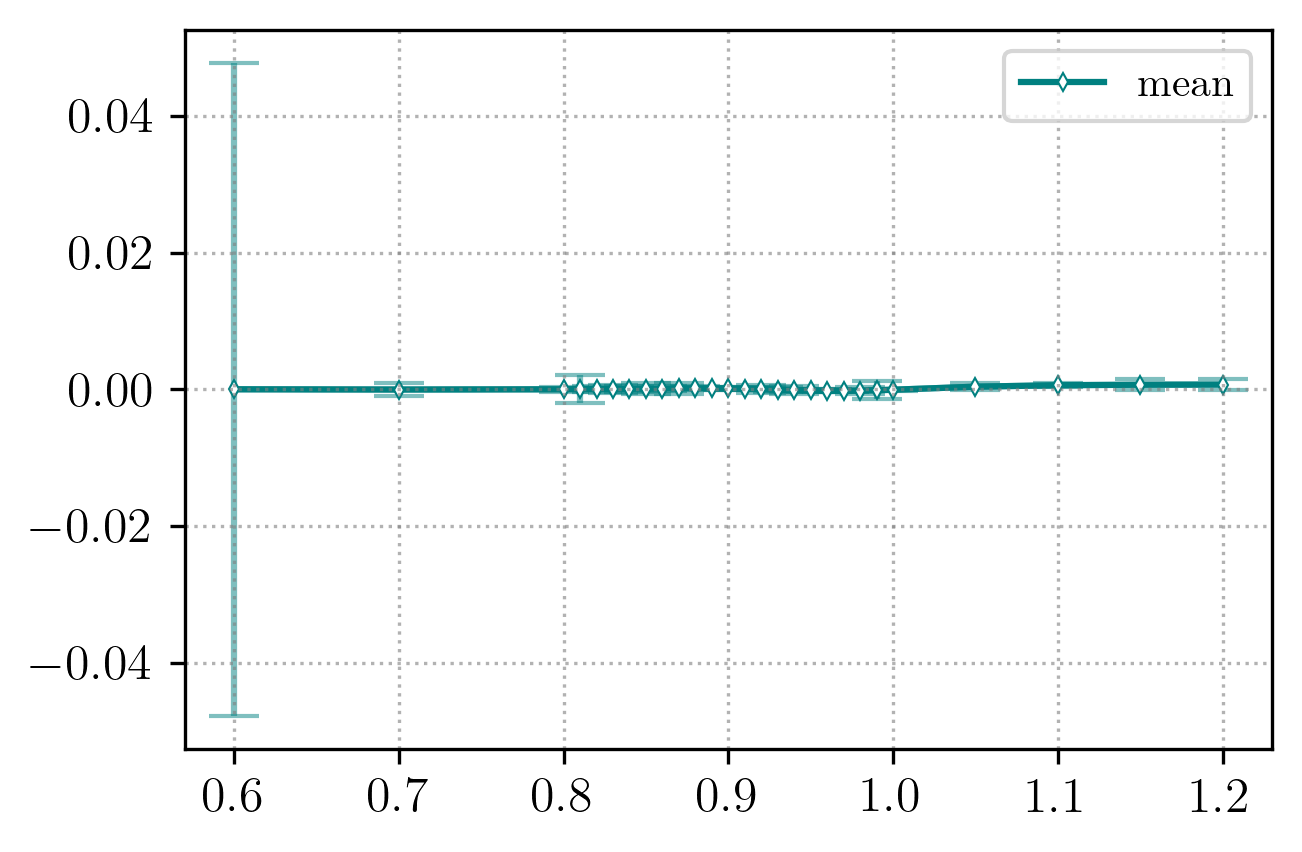

In [303]:
l = 6
h_i, h_f, npoints = 0.8, 0.90, 11
h_i, h_f, npoints = 0.8, 0.95, 16
# h_i, h_f, npoints = 0.6, 0.95, 15
gs = np.linspace(h_i,h_f,npoints)
chis = [64,128]
idx = 0

fig, ax = plt.subplots(figsize=(4.5, 3))
ax.grid(color="gray", linestyle=":", alpha=0.6)
fit = 2

euclidean = True
manhatten = False


h_i, h_f, npoints = 0.6, 0.7, 2
gs1 = np.linspace(h_i,h_f,npoints)

h_i, h_f, npoints = 0.8, 0.95, 16
gs2 = np.linspace(h_i,h_f,npoints)

h_i, h_f, npoints = 0.96, 1.0, 5
gs3 = np.linspace(h_i,h_f,npoints)

h_i, h_f, npoints = 1.05, 1.2, 4
gs4 = np.linspace(h_i,h_f,npoints)

gs = gs1.tolist() + gs2.tolist() + gs3.tolist() + gs4.tolist() 
chis = [64,128]
idx = 0

h_i, h_f, npoints = 0.6, 1.2, 27
print("\nsigma on 128\n")
cx = None
Rss = [15,16,17,18,19,20]
sigmas_on, sigmas_on_err, sigmas_on_ris, sigmas_on_ris_err, list_ris = fit_params_sys(Rss, l, L, chis, bc, sector, h_i, h_f, npoints, path, cx, cy, param, fit, ris=True)
# Rss = [12,13,14,15,16,17,19]
print("\nsigma off 128\n")
Rss = [15,16,17,18,19,20]
cx = None
sigmas_off, sigmas_off_err, sigmas_off_ris, sigmas_off_ris_err, _ = fit_params_sys(Rss, l, L, chis, bc, sector, h_i, h_f, npoints, path, cx, cy, param, fit, euclidean=euclidean, manhatten=manhatten, ris=True)

obs = np.array(sigmas_off) - np.array(sigmas_on)
obs_err = np.array(sigmas_off_err) + np.array(sigmas_on_err)

ax.plot(gs[idx:], obs[idx:], markersize=3, color="teal", marker='d', fillstyle=None, mew=0.5, mfc='w', label="mean", zorder=1)
ax.errorbar(x=gs[idx:], y=obs[idx:], yerr=obs_err[idx:], color="teal", alpha=0.5, capsize=6, zorder=0)
# ax.set_yscale('log')

# i = 0
# colors = create_sequential_colors(len(list_ris))
# for sigmas_on_ri, sigmas_off_ri, sigmas_on_ri_err, sigmas_off_ri_err, ri in zip(sigmas_on_ris, sigmas_off_ris, sigmas_on_ris_err, sigmas_off_ris_err, list_ris):
#     obs = np.array(sigmas_off_ri) - np.array(sigmas_on_ri)
#     obs_err = np.array(sigmas_off_ri_err) + np.array(sigmas_on_ri_err)

#     ax.plot(gs[0:], obs[0:], markersize=3, color=colors[i], marker='d', fillstyle=None, mew=0.5, mfc='w', label=f"$R \\in [{ri[0]},{ri[-1]}]$, $n_R={len(ri)}$")
#     # ax.errorbar(x=gs[idx:], y=obs[idx:], yerr=obs_err[idx:], color=colors[i], alpha=0.5, capsize=6, zorder=0)
#     i += 1

ax.legend(fontsize=10)

fig.tight_layout()
fig.savefig(f"{path_figures}/figures/potential/string_tension_difference_on_off-axis_fit_{fit}_different_Rs_set_{l}x{L}_chis_128.pdf", bbox_inches="tight")

In [224]:
## unify energies
from qs_mps.utils import get_cx

l = 6
R = 18
h_i, h_f, npoints = 0.8, 0.85, 2
cx = get_cx(L,R)
cy = [0,0]
chi = 256

energy_80_85_R_20 = np.load(
    f"{path}/results/energy_data/energy_Z2_dual_direct_lattice_{l}x{L}_{sector}_bc_{bc}_{cx}-{cy}_h_{h_i}-{h_f}_delta_{npoints}_chi_{chi}.npy"
)

h_i, h_f, npoints = 0.9, 0.9, 1
energy_90_R_20 = np.load(
    f"{path}/results/energy_data/energy_Z2_dual_direct_lattice_{l}x{L}_{sector}_bc_{bc}_{cx}-{cy}_h_{h_i}-{h_f}_delta_{npoints}_chi_{chi}.npy"
)
h_i, h_f, npoints = 0.81, 0.84, 4
energy_81_84_R_20 = np.load(
    f"{path}/results/energy_data/energy_Z2_dual_direct_lattice_{l}x{L}_{sector}_bc_{bc}_{cx}-{cy}_h_{h_i}-{h_f}_delta_{npoints}_chi_{chi}.npy"
)

h_i, h_f, npoints = 0.86, 0.89, 4
energy_86_89_R_20 = np.load(
    f"{path}/results/energy_data/energy_Z2_dual_direct_lattice_{l}x{L}_{sector}_bc_{bc}_{cx}-{cy}_h_{h_i}-{h_f}_delta_{npoints}_chi_{chi}.npy"
)

# h_i, h_f, npoints = 0.91, 0.94, 4
# energy_91_94_R_20 = np.load(
#     f"{path}/results/energy_data/energy_Z2_dual_direct_lattice_{l}x{L}_{sector}_bc_{bc}_{cx}-{cy}_h_{h_i}-{h_f}_delta_{npoints}_chi_{chi}.npy"
# )

# h_i, h_f, npoints = 0.8, 0.9, 11
# energy_80_90_R_20 = [energy_80_85_R_20[0]] + energy_81_84_R_20.tolist() + [energy_80_85_R_20[1]] + energy_86_89_R_20.tolist() + energy_90_R_20.tolist()
# print(len(energy_80_90_R_20), energy_80_90_R_20)
# np.save(f"{path}/results/energy_data/energy_Z2_dual_direct_lattice_{l}x{L}_{sector}_bc_{bc}_{cx}-{cy}_h_{h_i}-{h_f}_delta_{npoints}_chi_{chi}.npy", energy_80_90_R_20)

In [ ]:
R = 15
cx = get_cx(L,R)
cy = [0,0]
chi = 256

h_i, h_f, npoints = 0.6, 0.95, 15
energy_60_95_R_17 = np.load(
    f"{path}/results/energy_data/energy_Z2_dual_direct_lattice_{l}x{L}_{sector}_bc_{bc}_{cx}-{cy}_h_{h_i}-{h_f}_delta_{npoints}_chi_{chi}.npy"
)
h_i, h_f, npoints = 0.81, 0.84, 4
energy_81_84_R_17 = np.load(
    f"{path}/results/energy_data/energy_Z2_dual_direct_lattice_{l}x{L}_{sector}_bc_{bc}_{cx}-{cy}_h_{h_i}-{h_f}_delta_{npoints}_chi_{chi}.npy"
)

h_i, h_f, npoints = 0.86, 0.89, 4
energy_86_89_R_17 = np.load(
    f"{path}/results/energy_data/energy_Z2_dual_direct_lattice_{l}x{L}_{sector}_bc_{bc}_{cx}-{cy}_h_{h_i}-{h_f}_delta_{npoints}_chi_{chi}.npy"
)
h_i, h_f, npoints = 0.91, 0.94, 4
energy_91_94_R_17 = np.load(
    f"{path}/results/energy_data/energy_Z2_dual_direct_lattice_{l}x{L}_{sector}_bc_{bc}_{cx}-{cy}_h_{h_i}-{h_f}_delta_{npoints}_chi_{chi}.npy"
)
# h_i, h_f, npoints = 0.8, 0.9, 11
# energy_80_90_R_17 = [energy_60_95_R_17[8]] + energy_81_84_R_17.tolist() + [energy_60_95_R_17[10]] + energy_86_89_R_17.tolist() + [energy_60_95_R_17[12]]
# print(len(energy_80_90_R_17), energy_80_90_R_17)
# np.save(f"{path}/results/energy_data/energy_Z2_dual_direct_lattice_{l}x{L}_{sector}_bc_{bc}_{cx}-{cy}_h_{h_i}-{h_f}_delta_{npoints}_chi_{chi}.npy", energy_80_90_R_17)

In [ ]:
vac = None
chi = 128

# h_i, h_f, npoints = 0.6, 0.95, 15
# energy_vacuum_60_95 = np.load(
#     f"{path}/results/energy_data/energy_Z2_dual_direct_lattice_{l}x{L}_vacuum_sector_bc_{bc}_{vac}-{vac}_h_{h_i}-{h_f}_delta_{npoints}_chi_{chi}.npy"
# )

vac = np.nan
h_i, h_f, npoints = 0.81, 0.84, 4
h_i, h_f, npoints = 0.6, 0.9, 31
# energy_vacuum_81_84 = np.load(
energy_vacuum_60_90 = np.load(
    f"{path}/results/energy_data/energy_Z2_dual_direct_lattice_{l}x{L}_vacuum_sector_bc_{bc}_{vac}-{vac}_h_{h_i}-{h_f}_delta_{npoints}_chi_{chi}.npy"
)

# h_i, h_f, npoints = 0.86, 0.89, 4
h_i, h_f, npoints = 0.9, 1.0, 11
# energy_vacuum_86_89 = np.load(
energy_vacuum_90_100 = np.load(
    f"{path}/results/energy_data/energy_Z2_dual_direct_lattice_{l}x{L}_vacuum_sector_bc_{bc}_{vac}-{vac}_h_{h_i}-{h_f}_delta_{npoints}_chi_{chi}.npy"
)

# h_i, h_f, npoints = 0.8, 0.95, 16
# energy_vacuum_80_95 = energy_vacuum_60_90[20:].tolist() + energy_vacuum_90_100[1:6].tolist()
# print(len(energy_vacuum_80_95), energy_vacuum_80_95)
# print(energy_vacuum_60_90[20:], energy_vacuum_90_100[:6].tolist())
# np.save(f"{path}/results/energy_data/energy_Z2_dual_direct_lattice_{l}x{L}_vacuum_sector_bc_{bc}_{vac}-{vac}_h_{h_i}-{h_f}_delta_{npoints}_chi_{chi}.npy", energy_vacuum_80_95)

h_i, h_f, npoints = 0.8, 0.9, 11
# energy_vacuum_80_90 = [energy_vacuum_60_95[8]] + energy_vacuum_81_84.tolist() + [energy_vacuum_60_95[10]] + energy_vacuum_86_89.tolist() + [energy_vacuum_60_95[12]]
energy_vacuum_80_90 = energy_vacuum_60_90[20:]
print(len(energy_vacuum_80_90), energy_vacuum_80_90)
np.save(f"{path}/results/energy_data/energy_Z2_dual_direct_lattice_{l}x{L}_vacuum_sector_bc_{bc}_{vac}-{vac}_h_{h_i}-{h_f}_delta_{npoints}_chi_{chi}.npy", energy_vacuum_80_90)

11 [-337.2869593  -339.29319093 -341.38137988 -343.54642299 -345.78360294
 -348.08855354 -350.45722865 -352.88587437 -355.37100406 -357.90937583
 -360.49797226]


In [766]:
R = 20
cx = get_cx(L,R)
cy = [0,0]
chi = 64

h_i, h_f, npoints = 0.6, 0.9, 31
energy_60_90_R_17 = np.load(
    f"{path}/results/energy_data/energy_Z2_dual_direct_lattice_{l}x{L}_{sector}_bc_{bc}_{cx}-{cy}_h_{h_i}-{h_f}_delta_{npoints}_chi_{chi}.npy"
)
h_i, h_f, npoints = 0.9, 1.0, 11
energy_90_100_R_17 = np.load(
    f"{path}/results/energy_data/energy_Z2_dual_direct_lattice_{l}x{L}_{sector}_bc_{bc}_{cx}-{cy}_h_{h_i}-{h_f}_delta_{npoints}_chi_{chi}.npy"
)

# h_i, h_f, npoints = 0.8, 0.95, 16
# energy_80_95_R_17 = energy_60_90_R_17[20:].tolist() + energy_90_100_R_17[1:6].tolist()
# print(len(energy_80_95_R_17), energy_80_95_R_17)
# print(energy_60_90_R_17[20:], energy_90_100_R_17[:6].tolist())
# np.save(f"{path}/results/energy_data/energy_Z2_dual_direct_lattice_{l}x{L}_{sector}_bc_{bc}_{cx}-{cy}_h_{h_i}-{h_f}_delta_{npoints}_chi_{chi}.npy", energy_80_95_R_17)

h_i, h_f, npoints = 0.8, 0.9, 11
energy_80_90_R_17 = energy_60_90_R_17[20:]
print(len(energy_80_90_R_17), energy_80_90_R_17)
print(energy_60_90_R_17[20:])
np.save(f"{path}/results/energy_data/energy_Z2_dual_direct_lattice_{l}x{L}_{sector}_bc_{bc}_{cx}-{cy}_h_{h_i}-{h_f}_delta_{npoints}_chi_{chi}.npy", energy_80_90_R_17)

11 [-316.99884335 -318.19576656 -319.485693   -320.86353843 -322.32456561
 -323.8644477  -325.47914736 -327.16493493 -328.9183809  -330.73626548
 -332.61563123]
[-316.99884335 -318.19576656 -319.485693   -320.86353843 -322.32456561
 -323.8644477  -325.47914736 -327.16493493 -328.9183809  -330.73626548
 -332.61563123]


In [257]:
R = 15
cx = get_cx(L,R)
cy = [0,0]
chi = 128

h_i, h_f, npoints = 0.6, 0.7, 2
energy_60_70_R = np.load(
    f"{path}/results/energy_data/energy_Z2_dual_direct_lattice_{l}x{L}_{sector}_bc_{bc}_{cx}-{cy}_h_{h_i}-{h_f}_delta_{npoints}_chi_{chi}.npy"
)
h_i, h_f, npoints = 0.8, 0.95, 16
energy_80_95_R = np.load(
    f"{path}/results/energy_data/energy_Z2_dual_direct_lattice_{l}x{L}_{sector}_bc_{bc}_{cx}-{cy}_h_{h_i}-{h_f}_delta_{npoints}_chi_{chi}.npy"
)
h_i, h_f, npoints = 0.96, 1.0, 5
energy_96_100_R = np.load(
    f"{path}/results/energy_data/energy_Z2_dual_direct_lattice_{l}x{L}_{sector}_bc_{bc}_{cx}-{cy}_h_{h_i}-{h_f}_delta_{npoints}_chi_{chi}.npy"
)
h_i, h_f, npoints = 1.05, 1.2, 4
energy_105_120_R = np.load(
    f"{path}/results/energy_data/energy_Z2_dual_direct_lattice_{l}x{L}_{sector}_bc_{bc}_{cx}-{cy}_h_{h_i}-{h_f}_delta_{npoints}_chi_{chi}.npy"
)

# h_i, h_f, npoints = 0.8, 0.95, 16
# energy_80_95_R = energy_60_90_R[20:].tolist() + energy_90_100_R[1:6].tolist()
# print(len(energy_80_95_R), energy_80_95_R)
# print(energy_60_90_R[20:], energy_90_100_R[:6].tolist())
# np.save(f"{path}/results/energy_data/energy_Z2_dual_direct_lattice_{l}x{L}_{sector}_bc_{bc}_{cx}-{cy}_h_{h_i}-{h_f}_delta_{npoints}_chi_{chi}.npy", energy_80_95_R)

h_i, h_f, npoints = 0.6, 1.2, 27
energy_60_120_R = energy_60_70_R.tolist() + energy_80_95_R.tolist() + energy_96_100_R.tolist() + energy_105_120_R.tolist()
np.save(f"{path}/results/energy_data/energy_Z2_dual_direct_lattice_{l}x{L}_{sector}_bc_{bc}_{cx}-{cy}_h_{h_i}-{h_f}_delta_{npoints}_chi_{chi}.npy", energy_60_120_R)

In [264]:
cy = [0,0]
chi = 64

vac = None
h_i, h_f, npoints = 0.6, 0.7, 2
energy_60_70_vac = np.load(
    f"{path}/results/energy_data/energy_Z2_dual_direct_lattice_{l}x{L}_vacuum_sector_bc_{bc}_{vac}-{vac}_h_{h_i}-{h_f}_delta_{npoints}_chi_{chi}.npy"
)
vac = np.nan
h_i, h_f, npoints = 0.8, 0.95, 16
energy_80_95_vac = np.load(
    f"{path}/results/energy_data/energy_Z2_dual_direct_lattice_{l}x{L}_vacuum_sector_bc_{bc}_{vac}-{vac}_h_{h_i}-{h_f}_delta_{npoints}_chi_{chi}.npy"
)
vac = None
h_i, h_f, npoints = 0.96, 1.0, 5
energy_96_100_vac = np.load(
    f"{path}/results/energy_data/energy_Z2_dual_direct_lattice_{l}x{L}_vacuum_sector_bc_{bc}_{vac}-{vac}_h_{h_i}-{h_f}_delta_{npoints}_chi_{chi}.npy"
)
vac = np.nan
h_i, h_f, npoints = 1.05, 1.2, 4
energy_105_120_vac = np.load(
    f"{path}/results/energy_data/energy_Z2_dual_direct_lattice_{l}x{L}_vacuum_sector_bc_{bc}_{vac}-{vac}_h_{h_i}-{h_f}_delta_{npoints}_chi_{chi}.npy"
)
# h_i, h_f, npoints = 0.8, 0.95, 16
# energy_80_95_vac = energy_60_90_vac[20:].tolist() + energy_90_100_vac[1:6].tolist()
# print(len(energy_80_95_vac), energy_80_95_vac)
# print(energy_60_90_vac[20:], energy_90_100_vac[:6].tolist())
# np.save(f"{path}/results/energy_data/energy_Z2_dual_direct_lattice_{l}x{L}_vacuum_sector_bc_{bc}_{vac}-{vac}_h_{h_i}-{h_f}_delta_{npoints}_chi_{chi}.npy", energy_80_95_vac)

h_i, h_f, npoints = 0.6, 1.2, 27
energy_60_120_vac = energy_60_70_vac.tolist() + energy_80_95_vac.tolist() + energy_96_100_vac.tolist() + energy_105_120_vac.tolist()
np.save(f"{path}/results/energy_data/energy_Z2_dual_direct_lattice_{l}x{L}_vacuum_sector_bc_{bc}_{vac}-{vac}_h_{h_i}-{h_f}_delta_{npoints}_chi_{chi}.npy", energy_60_120_vac)

[10, 12, 13, 14, 15, 16, 17, 19]
[12, 13, 14, 15, 16, 17, 19]
[13, 14, 15, 16, 17, 19]
Weighted Average: 0.9956367093110354
Error in the Average: 5.573876142763573e-06
Weighted Average: 1.1951778643617277
Error in the Average: 4.851903218852794e-06
Weighted Average: 1.3818111110585338
Error in the Average: 1.0630329826690032e-06
[15, 16, 17, 18, 19, 20]
Weighted Average: 0.995674923107789
Error in the Average: 8.211316135265528e-06
Weighted Average: 1.195305478399308
Error in the Average: 7.395458266248035e-06
Weighted Average: 1.3819439763225554
Error in the Average: 1.3615046095600843e-05
[10, 12, 13, 14, 15, 16, 17, 19]
[12, 13, 14, 15, 16, 17, 19]
[13, 14, 15, 16, 17, 19]
Weighted Average: 0.9956367093110354
Error in the Average: 5.573876142763573e-06
Weighted Average: 1.1951778643617277
Error in the Average: 4.851903218852794e-06
Weighted Average: 1.3818111110585338
Error in the Average: 1.0630329826690032e-06
[15, 16, 17, 18, 19, 20]
Weighted Average: 0.995674923107789
Error in t

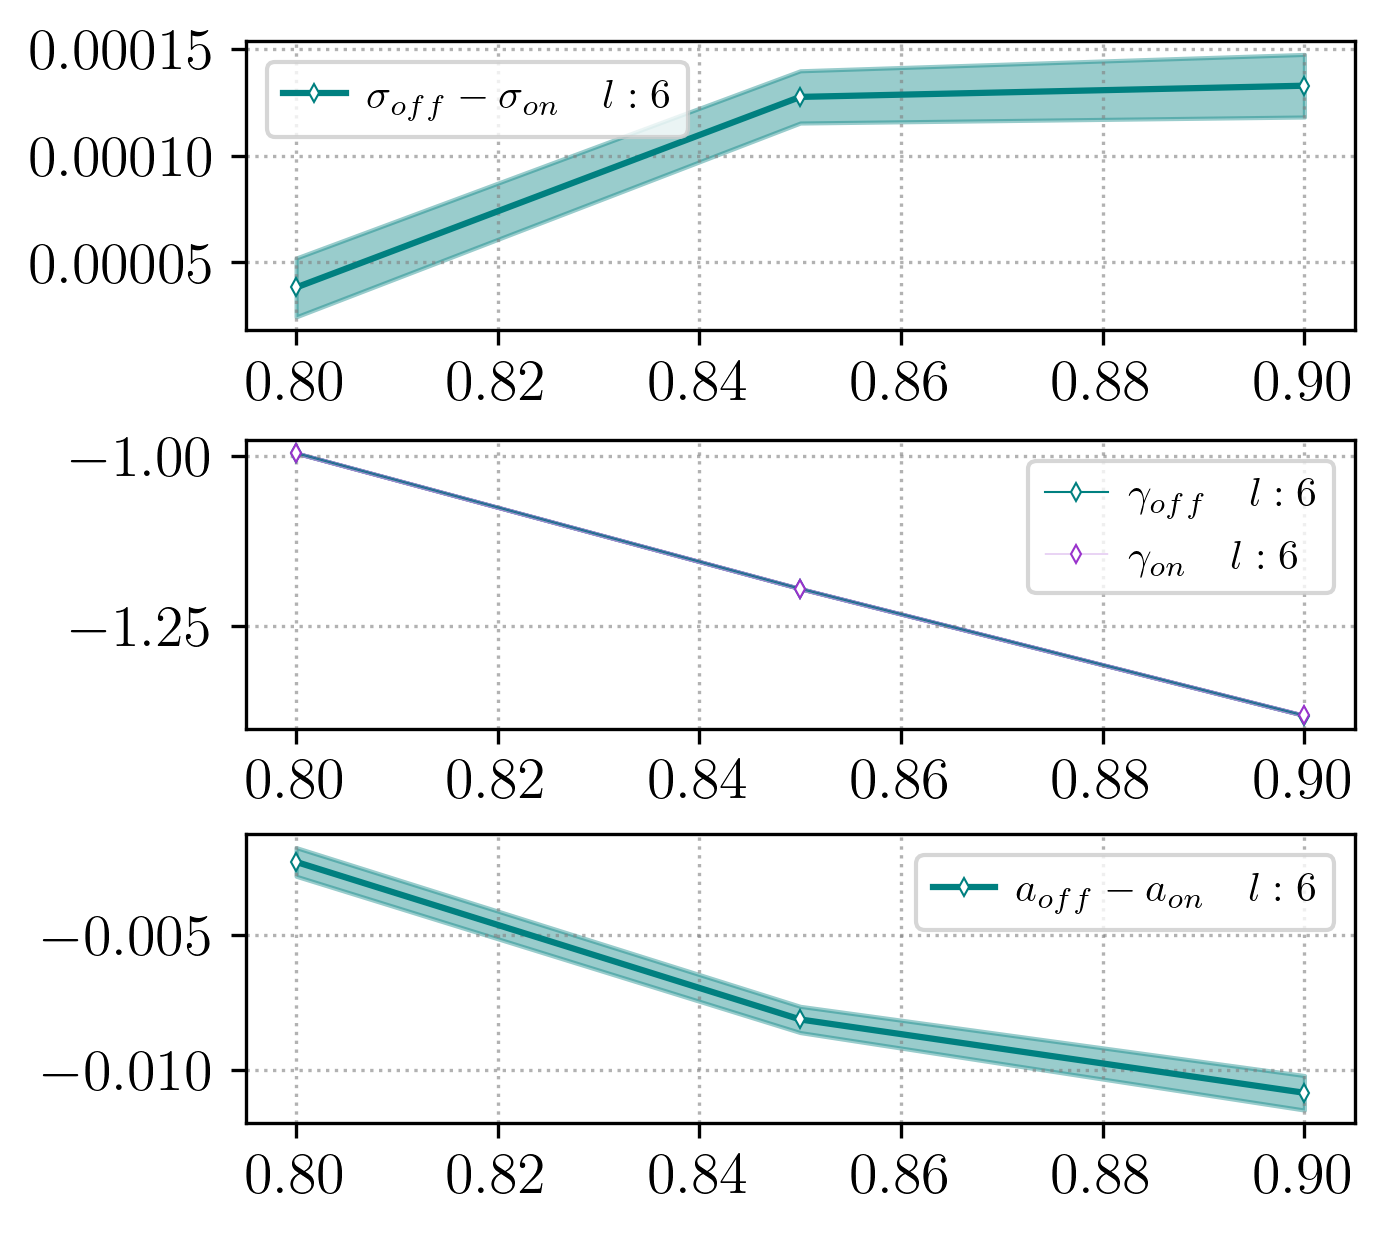

In [344]:
fit = 2
l = 6
h_i, h_f, npoints = 0.6, 0.95, 15
gs = np.linspace(h_i,h_f,npoints)
chis = [128,256]
# chis = [64,128]
Rss = [10,12,13,14,15,16,17,19]
euclidean = True
manhatten = False

# l = 5
# h_i, h_f, npoints = 0.8, 1.0, 41
# gs = np.linspace(h_i,h_f,npoints)
# chis = [64,128]
# Rss = [13,14,15,16,17,18,19,20]

h_i, h_f, npoints = 0.8, 0.9, 3
gs = np.linspace(h_i,h_f,npoints)

param = 0
sigmas_on, sigmas_on_err, sigmas_on_ris, list_Rs = fit_params_sys(Rss, l, L, chis, bc, sector, h_i, h_f, npoints, path, cx, cy, param, fit, ris=True)
Rss = [10,12,13,14,15,16,17,19]

fit = 2
param = 0
h_i, h_f, npoints = 0.8, 0.9, 3
gs = np.linspace(h_i,h_f,npoints)
Rss = [15,16,17,18,19,20]
sigmas_off, sigmas_off_err, sigmas_off_ris, _ = fit_params_sys(Rss, l, L, chis, bc, sector, h_i, h_f, npoints, path, cx, cy, param, fit, euclidean=euclidean, manhatten=manhatten, ris=True)

obs = np.array(sigmas_off) - np.array(sigmas_on)
obs_err = np.array(sigmas_off_err) + np.array(sigmas_on_err)

fig, axs = plt.subplots(3,1, figsize=(4.5, 4))
for ax in axs:
    ax.grid(color="gray", linestyle=":", alpha=0.6)

axs[0].plot(gs[0:], obs[0:], markersize=3, color="teal", marker='d', fillstyle=None, mew=0.5, mfc='w', label=f"$\\sigma_{{off}} - \\sigma_{{on}} \\quad l: {l}$")
# axs[0].plot(gs[0:], obs[0:], markersize=3, color="teal", marker='d', fillstyle=None, mew=0.5, mfc='w', label=f"$\\sigma_{{off}} - \\sigma_{{on}}$")
axs[0].fill_between(x=gs[0:], y1=obs[0:]-obs_err[0:], y2=obs[0:]+obs_err[0:], color="teal", alpha=0.4)
axs[0].legend()

# param = 1
# Rss = [10,12,13,14,15,16,17,19]
# lusch_on, lusch_on_err, lusch_on_ris, list_Rs = fit_params_sys(Rss, l, L, chis, bc, sector, h_i, h_f, npoints, path, cx, cy, param, fit, ris=True)
# Rss = [10,12,13,14,15,16,17,19]
# lusch_off, lusch_off_err, lusch_off_ris, _ = fit_params_sys(Rss, l, L, chis, bc, sector, h_i, h_f, npoints, path, cx, cy, param, fit, euclidean=euclidean, manhatten=manhatten, ris=True)

# obs = np.array(lusch_off) - np.array(lusch_on)
# obs_err = np.array(lusch_off_err) + np.array(lusch_on_err)

# axs[1].plot(gs[0:], obs[0:], markersize=3, color="teal", marker='d', fillstyle=None, mew=0.5, mfc='w', label=f"$\\gamma_{{off}} - \\gamma_{{on}} \\quad l: {l}$")
# # axs[0].plot(gs[0:], obs[0:], markersize=3, color="teal", marker='d', fillstyle=None, mew=0.5, mfc='w', label=f"$\\sigma_{{off}} - \\sigma_{{on}}$")
# axs[1].fill_between(x=gs[0:], y1=obs[0:]-obs_err[0:], y2=obs[0:]+obs_err[0:], color="teal", alpha=0.4)
# axs[1].legend()

chis = [128,256]
param = 0
Rss = [10,12,13,14,15,16,17,19]
sigmas_on, sigmas_on_err, sigmas_on_ris, list_Rs = fit_params_sys(Rss, l, L, chis, bc, sector, h_i, h_f, npoints, path, cx, cy, param, fit, ris=True)

fit = 2
param = 0
h_i, h_f, npoints = 0.8, 0.9, 3
gs = np.linspace(h_i,h_f,npoints)
Rss = [15,16,17,18,19,20]
sigmas_off, sigmas_off_err, sigmas_off_ris, _ = fit_params_sys(Rss, l, L, chis, bc, sector, h_i, h_f, npoints, path, cx, cy, param, fit, euclidean=euclidean, manhatten=manhatten, ris=True)

obs_off = np.array(sigmas_off)
obs_on = np.array(sigmas_on)
obs_err_off = np.array(sigmas_off_err)
obs_err_on = np.array(sigmas_on_err)

axs[1].plot(gs[0:], -obs_off[0:], markersize=3, color="teal", marker='d', linewidth=0.5, fillstyle=None, mew=0.5, mfc='w', label=f"$\\gamma_{{off}} \\quad l: {l}$")
axs[1].fill_between(x=gs[0:], y1=-obs_off[0:]-obs_err_off[0:], y2=-obs_off[0:]+obs_err_off[0:], color="teal", alpha=0.4)

# h_i, h_f, npoints = 0.6, 0.95, 15
# gs = np.linspace(h_i,h_f,npoints)

axs[1].plot(gs[0:], -obs_on[0:], markersize=3, color="darkorchid", marker='d', linewidth=0.1, fillstyle=None, mew=0.5, mfc='w', label=f"$\\gamma_{{on}} \\quad l: {l}$")
axs[1].fill_between(x=gs[0:], y1=-obs_on[0:]-obs_err_on[0:], y2=-obs_on[0:]+obs_err_on[0:], color="darkorchid", alpha=0.4)

axs[1].legend()

h_i, h_f, npoints = 0.8, 0.9, 3
gs = np.linspace(h_i,h_f,npoints)

param = -1
Rss = [10,12,13,14,15,16,17,19]
const_on, const_on_err, const_on_ris, list_Rs = fit_params_sys(Rss, l, L, chis, bc, sector, h_i, h_f, npoints, path, cx, cy, param, fit, ris=True)
Rss = [10,12,13,14,15,16,17,19]
Rss = [15,16,17,18,19,20]
const_off, const_off_err, const_off_ris, _ = fit_params_sys(Rss, l, L, chis, bc, sector, h_i, h_f, npoints, path, cx, cy, param, fit, euclidean=euclidean, manhatten=manhatten, ris=True)

obs = np.array(const_off) - np.array(const_on)
obs_err = np.array(const_off_err) + np.array(const_on_err)

axs[2].plot(gs[0:], obs[0:], markersize=3, color="teal", marker='d', fillstyle=None, mew=0.5, mfc='w', label=f"$a_{{off}} - a_{{on}} \\quad l: {l}$")
# axs[0].plot(gs[0:], obs[0:], markersize=3, color="teal", marker='d', fillstyle=None, mew=0.5, mfc='w', label=f"$\\sigma_{{off}} - \\sigma_{{on}}$")
axs[2].fill_between(x=gs[0:], y1=obs[0:]-obs_err[0:], y2=obs[0:]+obs_err[0:], color="teal", alpha=0.4)
axs[2].legend()

[15, 16, 17, 18, 19, 20]
[16, 17, 18, 19, 20]
Weighted Average: 0.9956039553304852
Error in the Average: 7.370061484818923e-06
Weighted Average: 1.036550686658304
Error in the Average: 5.91815025663172e-06
Weighted Average: 1.076978057200136
Error in the Average: 6.169270947132676e-06
Weighted Average: 1.1168870692870712
Error in the Average: 6.856726740013073e-06
Weighted Average: 1.156279709381435
Error in the Average: 5.909057610949202e-06
Weighted Average: 1.195156740755132
Error in the Average: 5.683865586532996e-06
Weighted Average: 1.2335205185052465
Error in the Average: 4.096857771748959e-06
Weighted Average: 1.2713713937709519
Error in the Average: 2.9806324393245914e-06
Weighted Average: 1.3087094580305272
Error in the Average: 1.4206165289024916e-06
Weighted Average: 1.3455322672150245
Error in the Average: 1.3760249569715673e-06
Weighted Average: 1.3818339763673877
Error in the Average: 2.13216993643226e-06
[15, 16, 17, 18, 19, 20]
[16, 17, 18, 19, 20]
Weighted Average: 0.

/Users/fradm/Desktop/qs-mps/src/qs_mps/applications/Z2/relevant_observables.py:502: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, pcov = curve_fit(potential_fit_3, Rs, potentials, sigma=errors, p0=guess)
/Users/fradm/Desktop/qs-mps/src/qs_mps/applications/Z2/utils.py:80: RuntimeWarning: invalid value encountered in scalar divide
  av = np.sum(np.asarray(data) * weights) / np.sum(weights)
/Users/fradm/Desktop/qs-mps/src/qs_mps/applications/Z2/utils.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  av_err = np.sqrt(1 / np.sum(weights))


(0.79, 0.905)

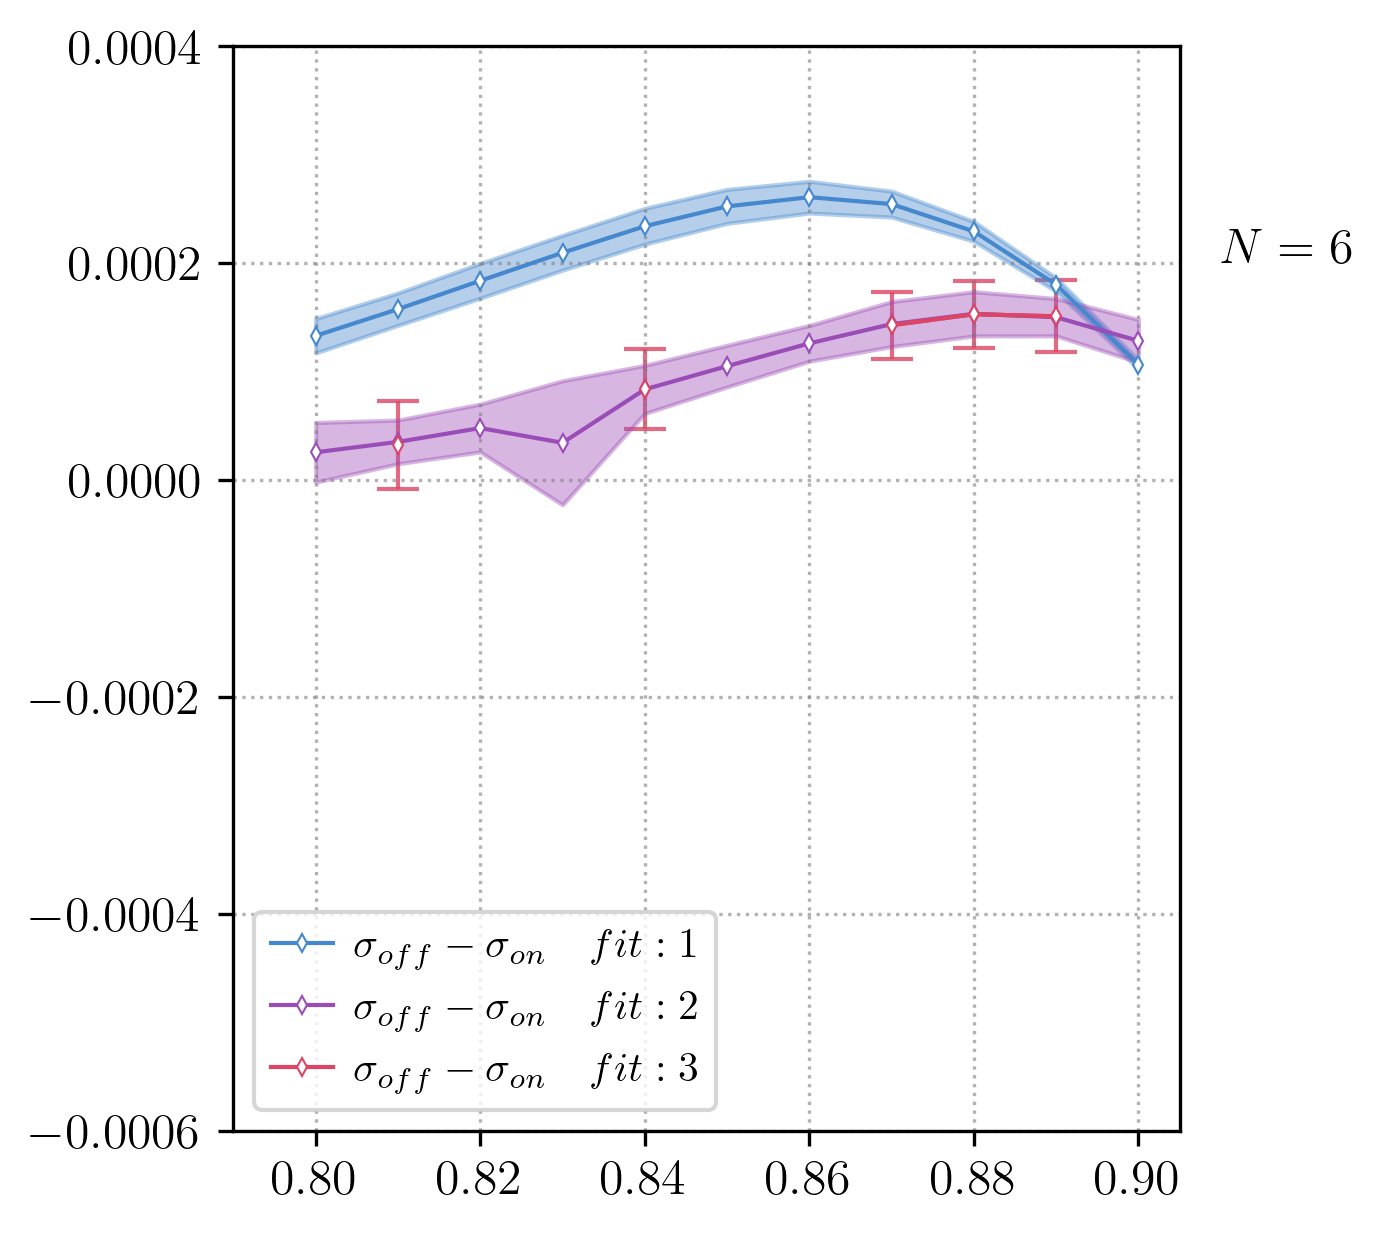

In [772]:
fit = 1
l = 6
h_i, h_f, npoints = 0.8, 0.9, 11
gs = np.linspace(h_i,h_f,npoints)
chis = [128,256]
# chis = [64,128]
Rss = [10,12,13,14,15,16,17,19]
euclidean = True
manhatten = False

# l = 5
# h_i, h_f, npoints = 0.8, 1.0, 41
# gs = np.linspace(h_i,h_f,npoints)
# chis = [64,128]
# Rss = [10,11,12,13,14,15,16,17,18,19,20]
colors = ["#4688CE","#9B4DB7","#DC4563"]
fig, ax = plt.subplots(figsize=(4.5, 4))
ax.grid(color="gray", linestyle=":", alpha=0.6)

for fit in range(1,4):
    param = 0
    Rss = [10,12,13,14,15,16,17,19]
    Rss = [15,16,17,18,19,20]
    # Rss = [10,11,12,13,14,15,16,17,18,19,20]
    sigmas_on, sigmas_on_err, sigmas_on_ris, list_Rs = fit_params_sys(Rss, l, L, chis, bc, sector, h_i, h_f, npoints, path, cx, cy, param, fit, ris=True)
    Rss = [10,12,13,14,15,16,17,19]
    Rss = [15,16,17,18,19,20]
    # Rss = [10,11,12,13,14,15,16,17,18,19,20]
    sigmas_off, sigmas_off_err, sigmas_off_ris, _ = fit_params_sys(Rss, l, L, chis, bc, sector, h_i, h_f, npoints, path, cx, cy, param, fit, euclidean=euclidean, manhatten=manhatten, ris=True)

    obs = np.array(sigmas_off) - np.array(sigmas_on)
    obs_err = np.array(sigmas_off_err) + np.array(sigmas_on_err)

    ax.plot(gs[0:], obs[0:], markersize=3, color=colors[fit-1], marker='d', linewidth=1, fillstyle=None, mew=0.5, mfc='w', label=f"$\\sigma_{{off}} - \\sigma_{{on}} \\quad fit: {fit}$")
    # ax.plot(gs[0:], obs[0:], markersize=3, color=colors[fit-1], marker='d', linewidth=1, fillstyle=None, mew=0.5, mfc='w', label=f"$\\sigma_{{off}} - \\sigma_{{on}}$")
    if fit == 1 or fit == 2:
        ax.fill_between(x=gs[0:], y1=obs[0:]-obs_err[0:], y2=obs[0:]+obs_err[0:], color=colors[fit-1], alpha=0.4)
    if fit == 3:
        ax.errorbar(x=gs[0:], y=obs[0:], yerr=obs_err[0:], color=colors[fit-1],linewidth=1, capsize=5, alpha=0.8, zorder=0)

# l = 5
# h_i, h_f, npoints = 0.2, 1.0, 21
# gs = np.linspace(h_i,h_f,npoints)
# chis = [64,128]
# Rss = [10,11,12,13,14,15,16,17,18,19,20]

# for fit in range(1,4):
#     param = 0
#     # Rss = [10,12,13,14,15,16,17,19]
#     Rss = [10,11,12,13,14,15,16,17,18,19,20]
#     sigmas_on, sigmas_on_err, sigmas_on_ris, list_Rs = fit_params_sys(Rss, l, L, chis, bc, sector, h_i, h_f, npoints, path, cx, cy, param, fit, ris=True)
#     # Rss = [10,12,13,14,15,16,17,19]
#     Rss = [10,11,12,13,14,15,16,17,18,19,20]
#     sigmas_off, sigmas_off_err, sigmas_off_ris, _ = fit_params_sys(Rss, l, L, chis, bc, sector, h_i, h_f, npoints, path, cx, cy, param, fit, euclidean=euclidean, manhatten=manhatten, ris=True)

#     obs = np.array(sigmas_off) - np.array(sigmas_on)
#     obs_err = np.array(sigmas_off_err) + np.array(sigmas_on_err)

#     ax.plot(gs[12:16], obs[12:16], markersize=3, color=colors[fit-1], marker='d', linewidth=1, fillstyle=None, mew=0.5, mfc='w')
#     # ax.plot(gs[12:16], obs[12:16], markersize=3, color=colors[fit-1], marker='d', fillstyle=None, mew=0.5, mfc='w', label=f"$\\sigma_{{off}} - \\sigma_{{on}}$")
#     ax.fill_between(x=gs[12:16], y1=obs[12:16]-obs_err[12:16], y2=obs[12:16]+obs_err[12:16], color=colors[fit-1], alpha=0.4)
#     # ax.errorbar(x=gs[12:16], y=obs[12:16], yerr=obs_err[12:16], color=colors[fit-1], linewidth=1, capsize=5, alpha=0.8, zorder=0)

ax.legend()
ax.text(x=0.91, y=0.0002, s=f"$N={l}$")
ax.set_ylim(-0.0006,0.0004)
ax.set_xlim(left=0.79)

[10, 12, 13, 14, 15, 16, 17, 19]
[12, 13, 14, 15, 16, 17, 19]
[13, 14, 15, 16, 17, 19]
[14, 15, 16, 17, 19]
Weighted Average: -0.7934710730218008
Error in the Average: 0.1832487650618623
Weighted Average: 0.6701734447773411
Error in the Average: 0.023620401429090616
Weighted Average: 0.3764928108262098
Error in the Average: 0.005449274467241072
Weighted Average: 0.2843973315068155
Error in the Average: 0.0030035460685079868
Weighted Average: 0.27285740537348174
Error in the Average: 0.0016352139478427162
Weighted Average: 0.2748850842249924
Error in the Average: 0.0012848946130781642
Weighted Average: 0.2819107895019624
Error in the Average: 0.0014047698855665339
Weighted Average: 0.29244248574552606
Error in the Average: 0.0014236833192133654
Weighted Average: 0.3081677793091442
Error in the Average: 0.0015791194896390645
Weighted Average: 0.3271432986739889
Error in the Average: 0.0014537109243877872
Weighted Average: 0.3441290180774783
Error in the Average: 0.0010356536201664914
Wei

/Users/fradm/Desktop/qs-mps/src/qs_mps/applications/Z2/relevant_observables.py:502: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, pcov = curve_fit(potential_fit_3, Rs, potentials, sigma=errors, p0=guess)


(-1.0, 0.0)

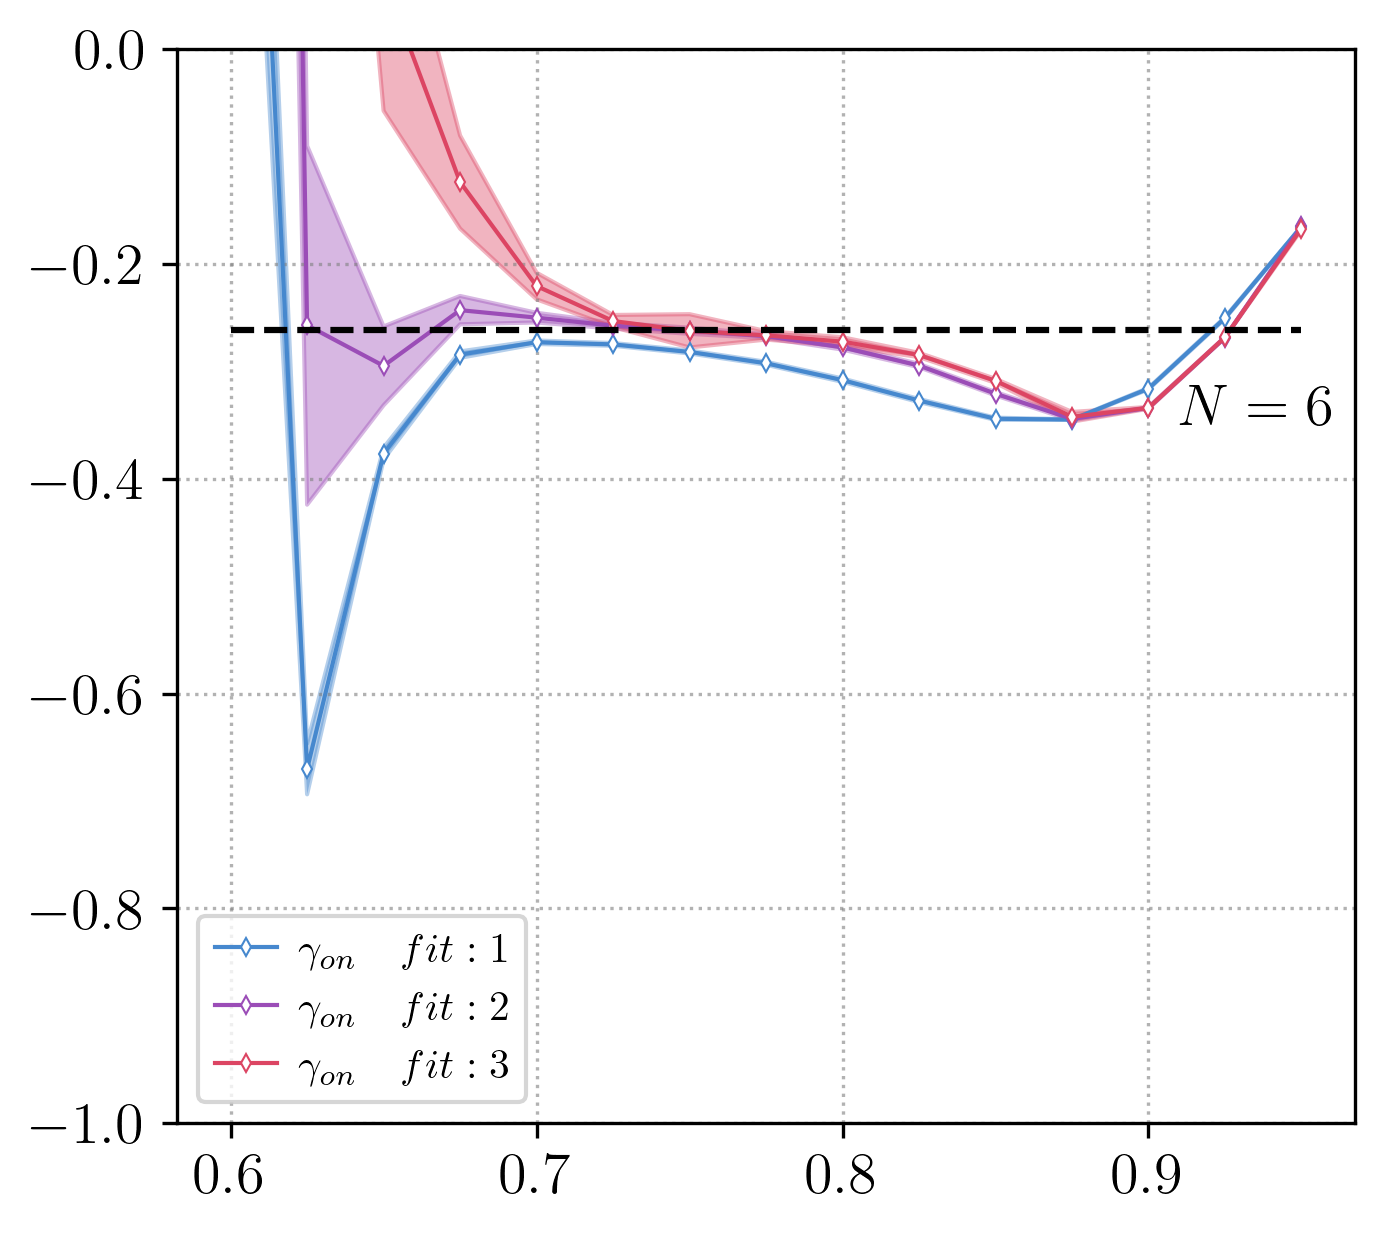

In [346]:
fit = 1
l = 6
h_i, h_f, npoints = 0.6, 0.95, 15
gs = np.linspace(h_i,h_f,npoints)
chis = [128,256]
# chis = [64,128]
Rss = [10,12,13,14,15,16,17,19]
euclidean = True
manhatten = False

# l = 5
# h_i, h_f, npoints = 0.8, 1.0, 41
# gs = np.linspace(h_i,h_f,npoints)
# chis = [64,128]
# Rss = [10,11,12,13,14,15,16,17,18,19,20]
colors = ["#4688CE","#9B4DB7","#DC4563"]
fig, ax = plt.subplots(figsize=(4.5, 4))
ax.grid(color="gray", linestyle=":", alpha=0.6)

for fit in range(1,4):
    param = 1
    Rss = [10,12,13,14,15,16,17,19]
    # Rss = [10,11,12,13,14,15,16,17,18,19,20]
    sigmas_on, sigmas_on_err, sigmas_on_ris, list_Rs = string_tension_mean(Rss, l, L, chis, bc, sector, h_i, h_f, npoints, path, cx, cy, param, fit, ris=True)
    # Rss = [10,11,12,13,14,15,16,17,18,19,20]
    # sigmas_off, sigmas_off_err, sigmas_off_ris, _ = string_tension_mean(Rss, l, L, chis, bc, sector, h_i, h_f, npoints, path, cx, cy, param, fit, euclidean=euclidean, manhatten=manhatten, ris=True)

    obs = -np.array(sigmas_on)
    obs_err = np.array(sigmas_on_err)

    ax.plot(gs[0:], obs[0:], markersize=3, color=colors[fit-1], marker='d', linewidth=1, fillstyle=None, mew=0.5, mfc='w', label=f"$\\gamma_{{on}} \\quad fit: {fit}$")
    # ax.plot(gs[0:], obs[0:], markersize=3, color=colors[fit-1], marker='d', linewidth=1, fillstyle=None, mew=0.5, mfc='w', label=f"$\\sigma_{{off}} - \\sigma_{{on}}$")
    if fit == 1 or fit == 2:
        ax.fill_between(x=gs[0:], y1=obs[0:]-obs_err[0:], y2=obs[0:]+obs_err[0:], color=colors[fit-1], alpha=0.4)
    if fit == 3:
        # ax.errorbar(x=gs[0:], y=obs[0:], yerr=obs_err[0:], color=colors[fit-1],linewidth=1, capsize=5, alpha=0.8, zorder=0)
        ax.fill_between(x=gs[0:], y1=obs[0:]-obs_err[0:], y2=obs[0:]+obs_err[0:], color=colors[fit-1], alpha=0.4)

ax.hlines(y=-np.pi/12, xmin=gs[0], xmax=gs[-1], color='k', linestyle='--')
ax.legend()
ax.text(x=0.91, y=-0.35, s=f"$N={l}$")
ax.set_ylim(-1,0)


sigma on 256

[15, 16, 17, 18, 19, 20]
Weighted Average: 0.9956493820098042
Error in the Average: 1.9499663188130688e-05
Weighted Average: 1.03659906955077
Error in the Average: 1.0291491215644997e-05
Weighted Average: 1.077028861534872
Error in the Average: 4.680385903044563e-06
Weighted Average: 1.1169385589121388
Error in the Average: 1.1783693071870903e-05
Weighted Average: 1.1563287887243328
Error in the Average: 6.858474170075499e-06
Weighted Average: 1.1952004645206886
Error in the Average: 1.1906965542773778e-05
Weighted Average: 1.2335550673328834
Error in the Average: 4.127629936997735e-06
Weighted Average: 1.2713936849925407
Error in the Average: 4.632555766442842e-06
Weighted Average: 1.3087175468358407
Error in the Average: 2.2790463272637374e-06
Weighted Average: 1.3455258650194575
Error in the Average: 7.268567592050473e-06
Weighted Average: 1.381815659476979
Error in the Average: 6.522515551462481e-06
[[1.71368199 1.99462342 2.24615516 2.48110786 2.70590858 2.92410729


/var/folders/d1/c6hqhfn161x458f4d0m3_rm80000gp/T/ipykernel_1308/1870086714.py:44: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/var/folders/d1/c6hqhfn161x458f4d0m3_rm80000gp/T/ipykernel_1308/1870086714.py:71: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/var/folders/d1/c6hqhfn161x458f4d0m3_rm80000gp/T/ipykernel_1308/1870086714.py:98: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


Weighted Average: 0.2546947792644185
Error in the Average: 0.09781595704587812
Weighted Average: -0.20346620902853194
Error in the Average: 0.18127184526752335
Weighted Average: -0.5876549665777107
Error in the Average: 0.15867149805256775
[[1.71368199 1.99462342 2.24615516 2.48110786 2.70590858 2.92410729
  3.13781702 3.34836841 3.55663511 3.76321164 3.96851321]
 [1.7136882  1.99462306 2.24615513 2.4811078  2.70590843 2.92410726
  3.13781702 3.34836842 3.55663521 3.76321176 3.96851324]
 [1.71369324 1.99462053 2.24615527 2.48110775 2.70590858 2.9241071
  3.13781712 3.34836812 3.5566351  3.76321157 3.9685132 ]
 [1.71369748 1.99462052 2.24615502 2.48110773 2.70590837 2.9241074
  3.13781682 3.34836824 3.55663532 3.76321155 3.96851316]
 [1.71370099 1.99462018 2.24615534 2.48110775 2.70590845 2.92410728
  3.13781685 3.34836824 3.55663491 3.76321113 3.96851304]
 [1.71370385 1.99462163 2.24615505 2.48110762 2.70590854 2.92410333
  3.1378171  3.34836801 3.55663466 3.76321125 3.96851251]]

sigm

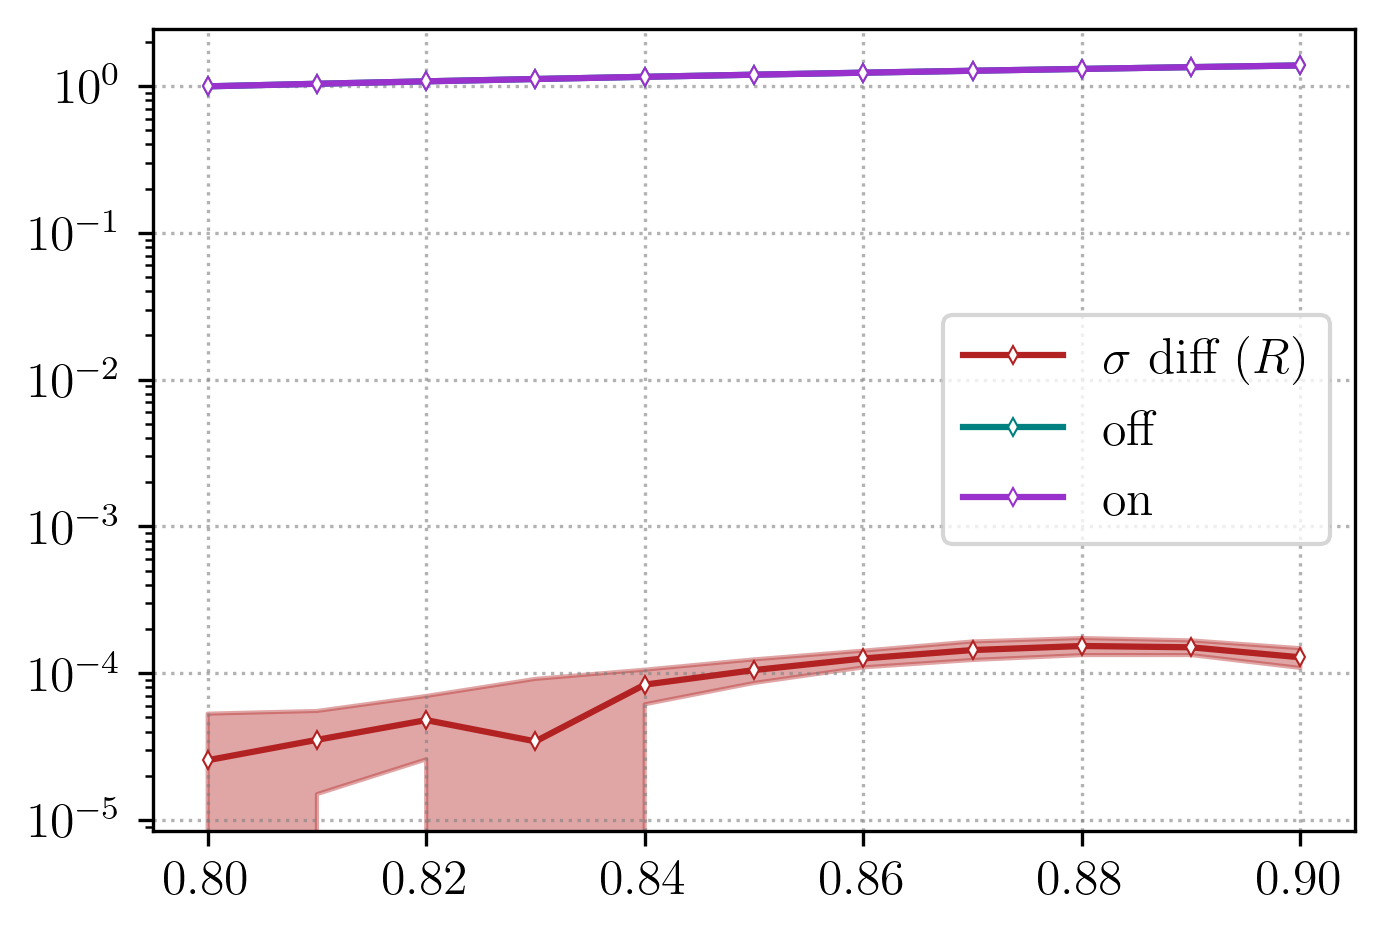

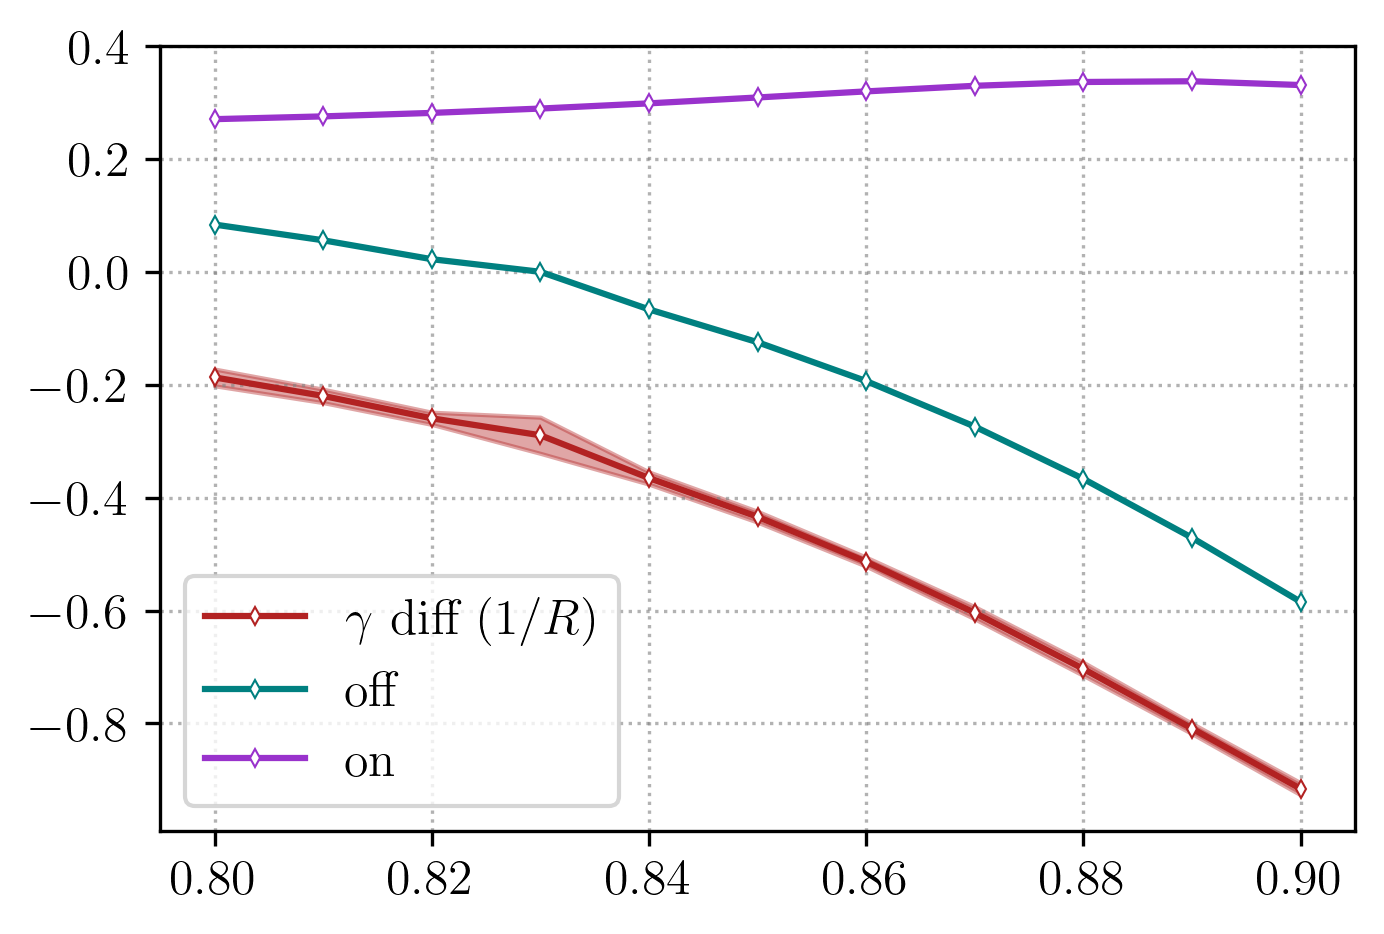

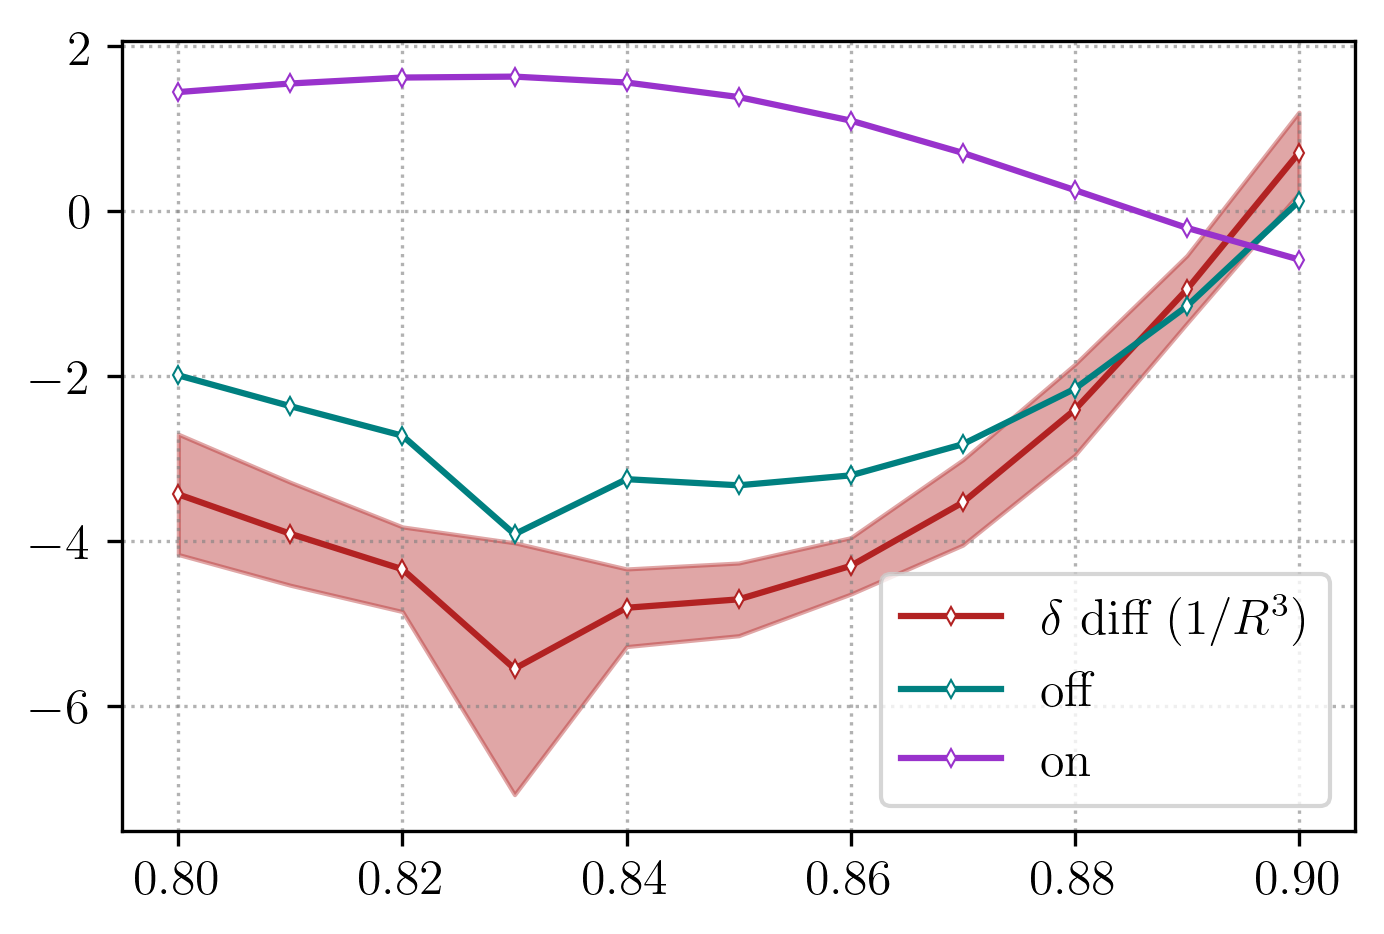

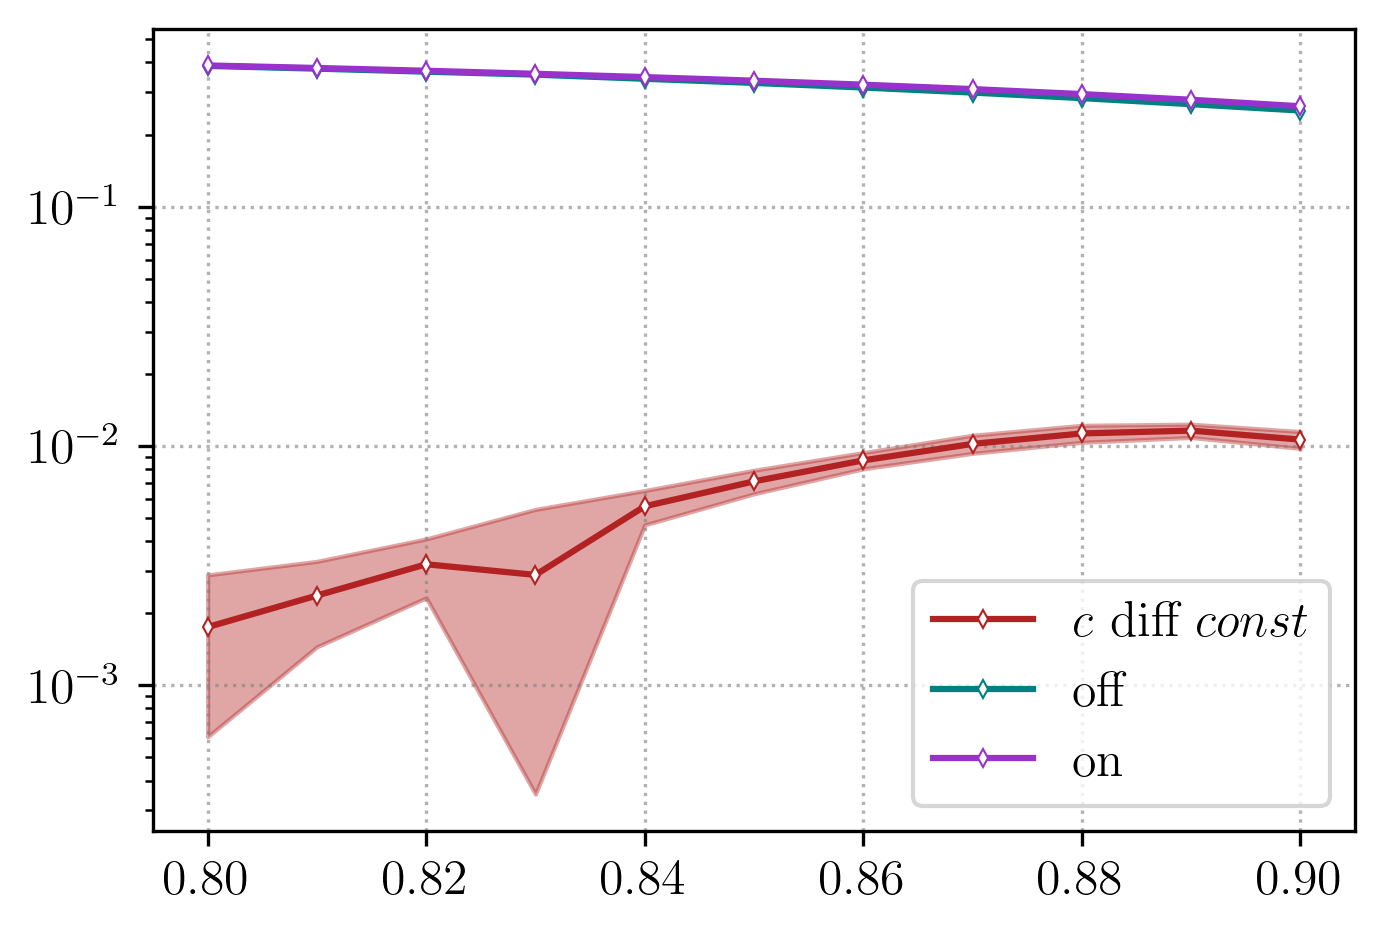

In [288]:
fit = 2

l = 6
euclidean = True
manhatten = False
sector = "2_particle(s)_sector"

h_i, h_f, npoints = 0.8, 0.90, 11
gs = np.linspace(h_i,h_f,npoints)
chis = [128,256]
Rss = [15,16,17,18,19,20]

# l = 5
# h_i, h_f, npoints = 0.8, 1.0, 41
# gs = np.linspace(h_i,h_f,npoints)
# chis = [64,128]
# Rss = [13,14,15,16,17,18,19,20]
param = 0

cx = None
print("\nsigma on 256\n")
sigmas_on, sigmas_on_err= fit_params_sys(Rss, l, L, chis, bc, sector, h_i, h_f, npoints, path, cx, cy, param, fit, ris=False)
# Rss = [13,14,15,16,17,18,19,20]
print(sigmas_on_ris)
# Rss = [12,13,14,15,16,17,19]
Rss = [15,16,17,18,19,20]
print("\nsigma off 256\n")
cx = None
sigmas_off, sigmas_off_err= fit_params_sys(Rss, l, L, chis, bc, sector, h_i, h_f, npoints, path, cx, cy, param, fit, euclidean=euclidean, manhatten=manhatten, ris=False)

obs = np.array(sigmas_off) - np.array(sigmas_on)
obs_err = np.array(sigmas_off_err) + np.array(sigmas_on_err)

fig, ax = plt.subplots(figsize=(4.5, 3))
ax.grid(color="gray", linestyle=":", alpha=0.6)

ax.plot(gs[0:], obs[0:], markersize=3, color="firebrick", marker='d', fillstyle=None, mew=0.5, mfc='w', label=f"$\\sigma$ diff $(R)$")
ax.plot(gs[0:], sigmas_off[0:], markersize=3, color="teal", marker='d', fillstyle=None, mew=0.5, mfc='w', label=f"off")
ax.plot(gs[0:], sigmas_on[0:], markersize=3, color="darkorchid", marker='d', fillstyle=None, mew=0.5, mfc='w', label=f"on")
ax.set_yscale('log')
# ax.plot(gs[0:], obs[0:], markersize=3, color="firebrick", marker='d', fillstyle=None, mew=0.5, mfc='w', label=f"$\\sigma_{{off}} - \\sigma_{{on}}$")
ax.fill_between(x=gs[0:], y1=obs[0:]-obs_err[0:], y2=obs[0:]+obs_err[0:], color="firebrick", alpha=0.4)
ax.legend()
fig.show()

param = 1

cx = None
print("\nsigma on 256\n")
sigmas_on, sigmas_on_err= fit_params_sys(Rss, l, L, chis, bc, sector, h_i, h_f, npoints, path, cx, cy, param, fit, ris=False)
# Rss = [13,14,15,16,17,18,19,20]
print(sigmas_on_ris)
# Rss = [12,13,14,15,16,17,19]
Rss = [15,16,17,18,19,20]
print("\nsigma off 256\n")
cx = None
sigmas_off, sigmas_off_err= fit_params_sys(Rss, l, L, chis, bc, sector, h_i, h_f, npoints, path, cx, cy, param, fit, euclidean=euclidean, manhatten=manhatten, ris=False)

obs = np.array(sigmas_off) - np.array(sigmas_on)
obs_err = np.array(sigmas_off_err) + np.array(sigmas_on_err)

fig, ax = plt.subplots(figsize=(4.5, 3))
ax.grid(color="gray", linestyle=":", alpha=0.6)

ax.plot(gs[0:], obs[0:], markersize=3, color="firebrick", marker='d', fillstyle=None, mew=0.5, mfc='w', label=f"$\\gamma$ diff $(1/R)$")
ax.plot(gs[0:], sigmas_off[0:], markersize=3, color="teal", marker='d', fillstyle=None, mew=0.5, mfc='w', label=f"off")
ax.plot(gs[0:], sigmas_on[0:], markersize=3, color="darkorchid", marker='d', fillstyle=None, mew=0.5, mfc='w', label=f"on")
# ax.plot(gs[0:], obs[0:], markersize=3, color="firebrick", marker='d', fillstyle=None, mew=0.5, mfc='w', label=f"$\\sigma_{{off}} - \\sigma_{{on}}$")
ax.fill_between(x=gs[0:], y1=obs[0:]-obs_err[0:], y2=obs[0:]+obs_err[0:], color="firebrick", alpha=0.4)
ax.legend()
fig.show()

param = 2

cx = None
print("\nsigma on 256\n")
sigmas_on, sigmas_on_err= fit_params_sys(Rss, l, L, chis, bc, sector, h_i, h_f, npoints, path, cx, cy, param, fit, ris=False)
# Rss = [13,14,15,16,17,18,19,20]
print(sigmas_on_ris)
# Rss = [12,13,14,15,16,17,19]
Rss = [15,16,17,18,19,20]
print("\nsigma off 256\n")
cx = None
sigmas_off, sigmas_off_err= fit_params_sys(Rss, l, L, chis, bc, sector, h_i, h_f, npoints, path, cx, cy, param, fit, euclidean=euclidean, manhatten=manhatten, ris=False)

obs = np.array(sigmas_off) - np.array(sigmas_on)
obs_err = np.array(sigmas_off_err) + np.array(sigmas_on_err)

fig, ax = plt.subplots(figsize=(4.5, 3))
ax.grid(color="gray", linestyle=":", alpha=0.6)

ax.plot(gs[0:], obs[0:], markersize=3, color="firebrick", marker='d', fillstyle=None, mew=0.5, mfc='w', label=f"$\\delta$ diff $(1/R^3)$")
ax.plot(gs[0:], sigmas_off[0:], markersize=3, color="teal", marker='d', fillstyle=None, mew=0.5, mfc='w', label=f"off")
ax.plot(gs[0:], sigmas_on[0:], markersize=3, color="darkorchid", marker='d', fillstyle=None, mew=0.5, mfc='w', label=f"on")
# ax.plot(gs[0:], obs[0:], markersize=3, color="firebrick", marker='d', fillstyle=None, mew=0.5, mfc='w', label=f"$\\sigma_{{off}} - \\sigma_{{on}}$")
ax.fill_between(x=gs[0:], y1=obs[0:]-obs_err[0:], y2=obs[0:]+obs_err[0:], color="firebrick", alpha=0.4)
ax.legend()
fig.show()

param = 3

cx = None
print("\nsigma on 256\n")
sigmas_on, sigmas_on_err= fit_params_sys(Rss, l, L, chis, bc, sector, h_i, h_f, npoints, path, cx, cy, param, fit, ris=False)
# Rss = [13,14,15,16,17,18,19,20]
print(sigmas_on_ris)
# Rss = [12,13,14,15,16,17,19]
Rss = [15,16,17,18,19,20]
print("\nsigma off 256\n")
cx = None
sigmas_off, sigmas_off_err= fit_params_sys(Rss, l, L, chis, bc, sector, h_i, h_f, npoints, path, cx, cy, param, fit, euclidean=euclidean, manhatten=manhatten, ris=False)

obs = abs(np.array(sigmas_off) - np.array(sigmas_on))
obs_err = abs(np.array(sigmas_off_err) + np.array(sigmas_on_err))

fig, ax = plt.subplots(figsize=(4.5, 3))
ax.grid(color="gray", linestyle=":", alpha=0.6)

ax.plot(gs[0:], obs[0:], markersize=3, color="firebrick", marker='d', fillstyle=None, mew=0.5, mfc='w', label=f"$c$ diff $const$")
ax.plot(gs[0:], sigmas_off[0:], markersize=3, color="teal", marker='d', fillstyle=None, mew=0.5, mfc='w', label=f"off")
ax.plot(gs[0:], sigmas_on[0:], markersize=3, color="darkorchid", marker='d', fillstyle=None, mew=0.5, mfc='w', label=f"on")
ax.set_yscale('log')
# ax.plot(gs[0:], obs[0:], markersize=3, color="firebrick", marker='d', fillstyle=None, mew=0.5, mfc='w', label=f"$\\sigma_{{off}} - \\sigma_{{on}}$")
ax.fill_between(x=gs[0:], y1=obs[0:]-obs_err[0:], y2=obs[0:]+obs_err[0:], color="firebrick", alpha=0.4)
ax.legend()

## Transverse evolution

In [ ]:
def load_el_field_chis(l,L,R,bc,sector,model,h_i,h_ev,delta,steps,path):
    ele_fields = []
    for chi in chis:
        elf = np.load(
            f"{path}/results/electric_field/electric_field_quench_dynamics_{model}_direct_lattice_{l}x{L}_{sector}_bc_{bc}_R_{R}_h_{h_i}-{h_ev}_delta_{delta}_trotter_steps_{steps}_chi_{chi}.npy")
        ele_fields.append(elf)
    return ele_fields

In [391]:
of = 0.2
R = 10
steps = 400
delta = 0.01
h_i, h_ev = 0.75, 0.75
l = 5
chis = [64,128]

elfs = load_el_field_chis(l,L,R,bc,sector,model,h_i,h_ev,delta,steps,path)
elf = elfs[-1]

[-2, -1, 0, 1, 2]


/var/folders/d1/c6hqhfn161x458f4d0m3_rm80000gp/T/ipykernel_4422/2759059416.py:39: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
/var/folders/d1/c6hqhfn161x458f4d0m3_rm80000gp/T/ipykernel_4422/2759059416.py:39: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


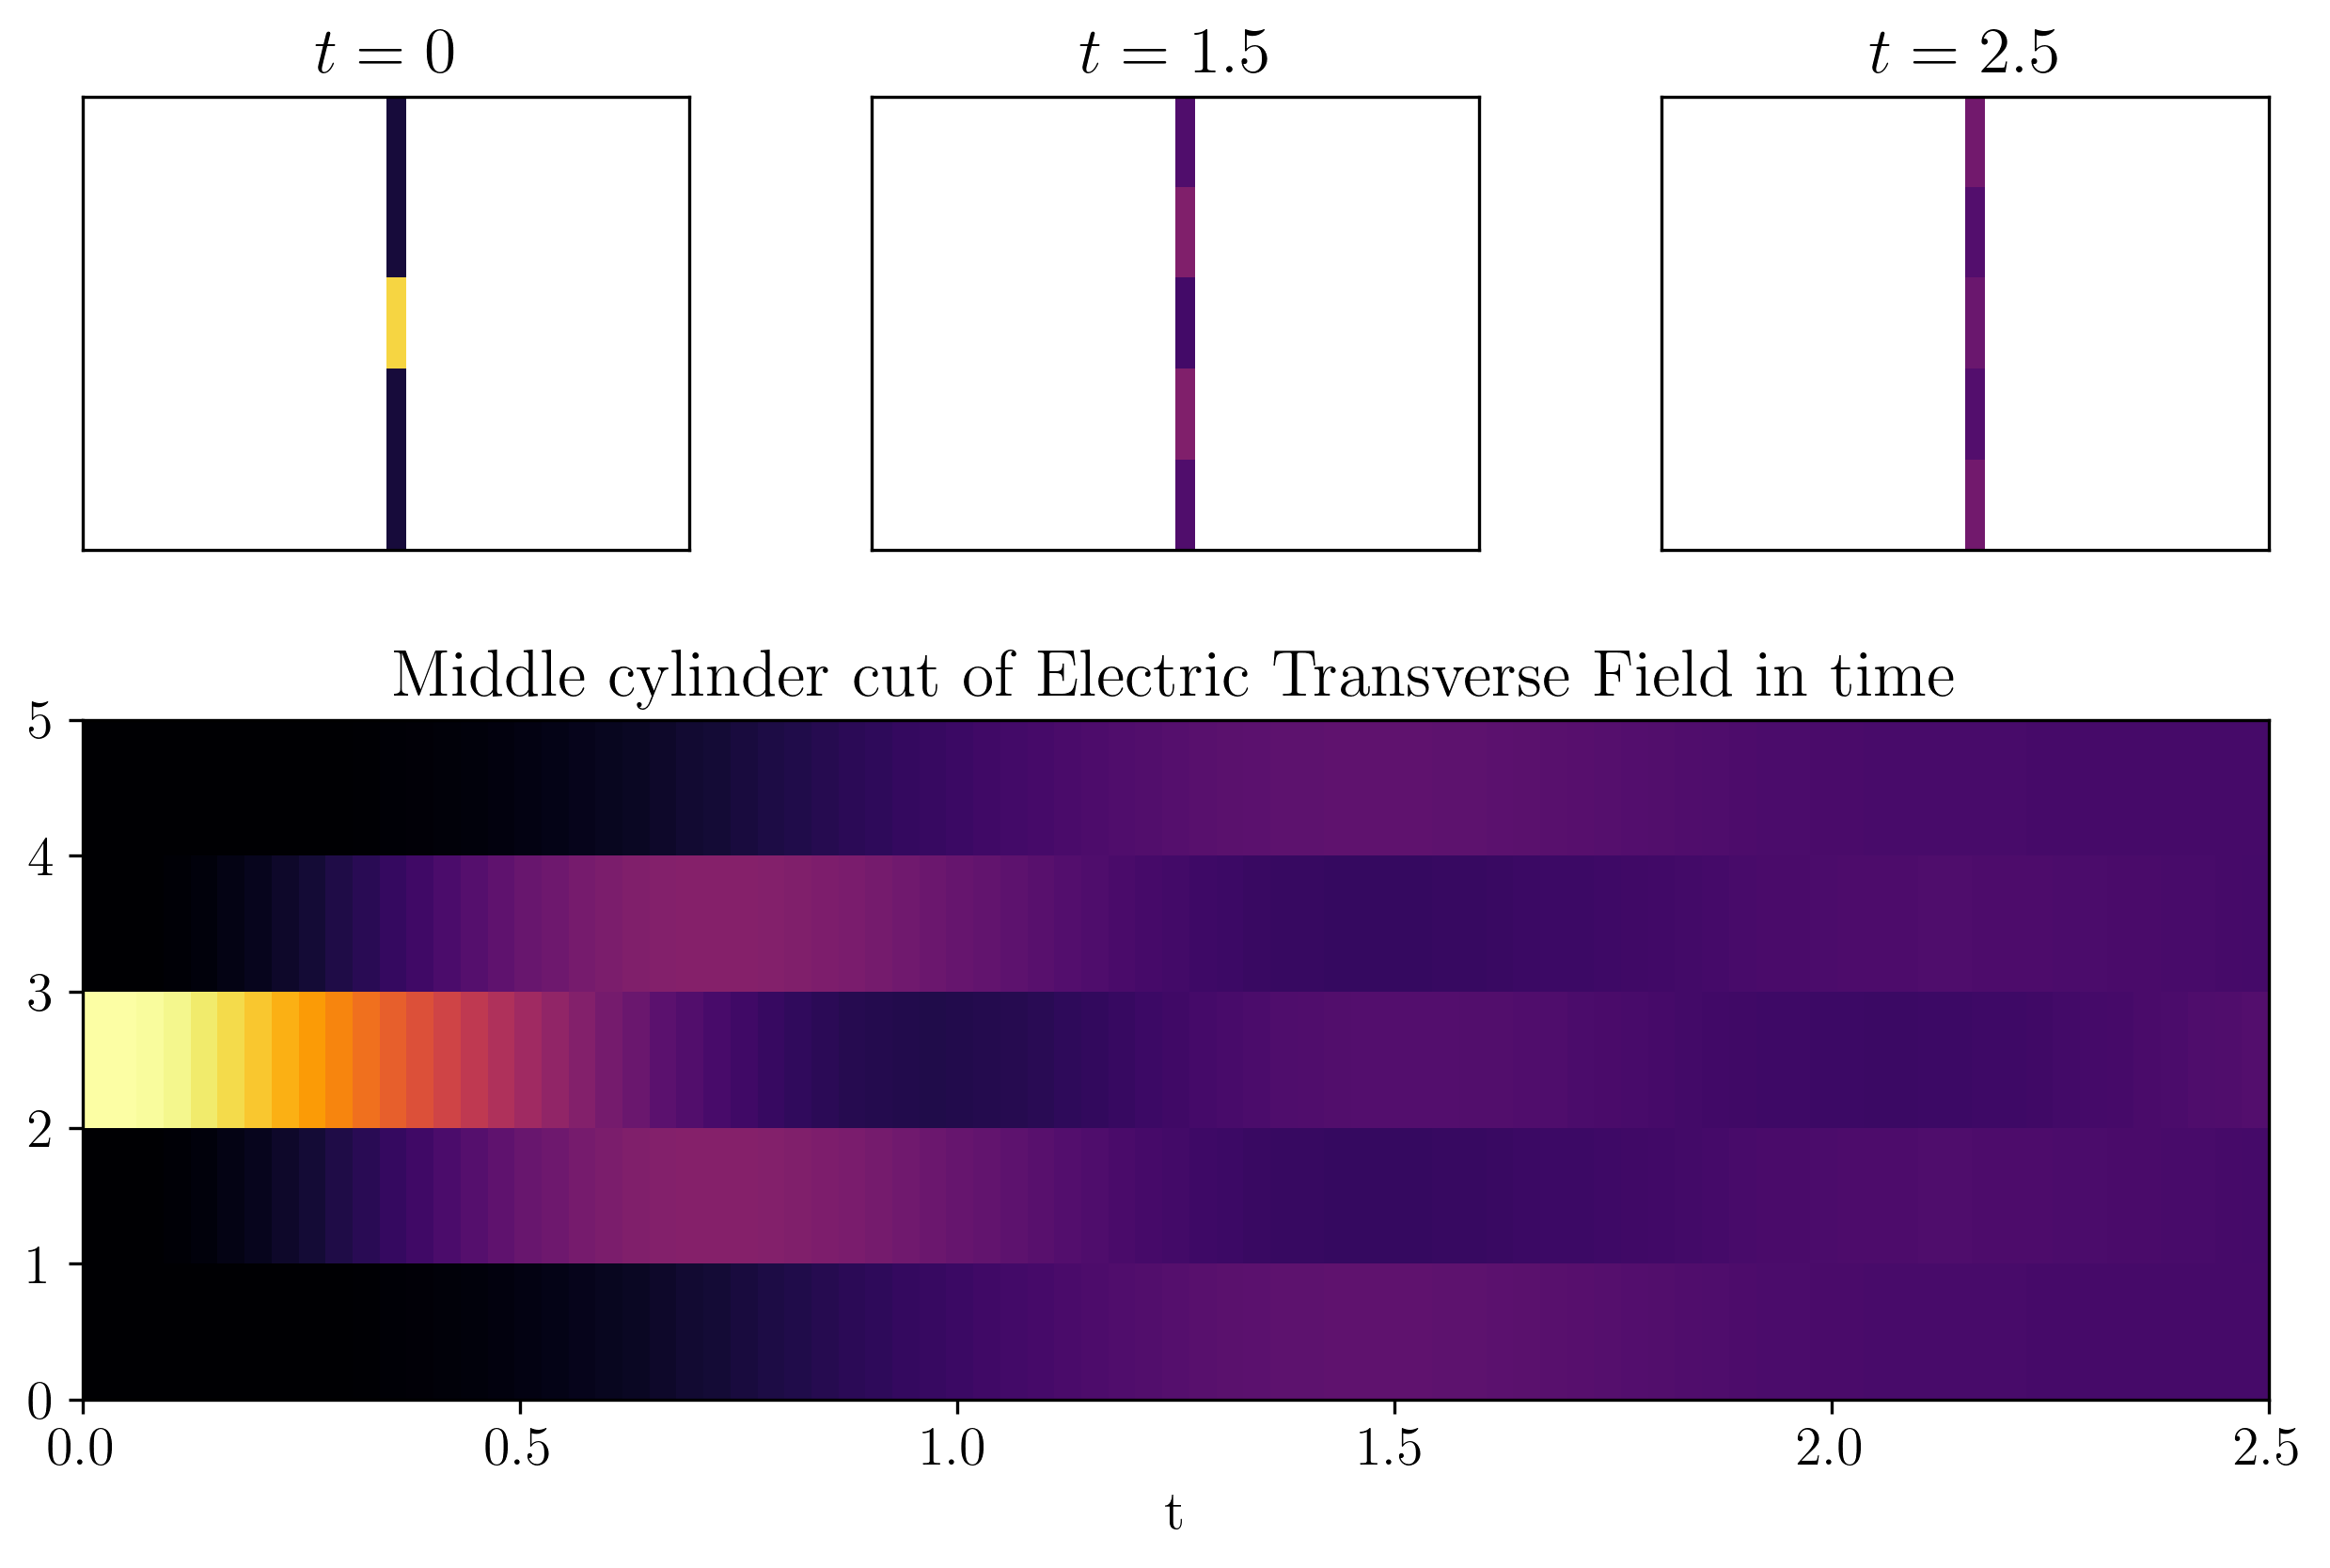

In [392]:
import matplotlib.gridspec as gridspec
import numpy as np

# Dummy data setup (replace with your actual data)
nx, ny = 30, 5  # grid size
times = [0, 1.5, 2.5]

arr = [*range(-(ny - 1)//2, ny//2 + 1)]
of = 0.2

if (ny%2) == 0:
    arr.pop(0)
print(arr)

data = [[(1-np.asarray(elf[int(t/delta*of)][0::2,1::2])[x])/2 for x in arr] for t in times]
cut_data = np.asarray([[(1-np.asarray(elf[i][0::2,2*(nx//2)+1])[x])/2 for x in arr] for i in range(int(steps*of)+1)]).T

# Create the figure and subplots
fig = plt.figure(figsize=(10, 6))
gs = gridspec.GridSpec(2, 1, height_ratios=[1, 1.5], hspace=0.3)

# Top row: 3 snapshots
gs_top = gridspec.GridSpecFromSubplotSpec(1, 3, subplot_spec=gs[0], wspace=0.3)
for i, (t, d) in enumerate(zip(times, data)):
    ax = fig.add_subplot(gs_top[i])
    im = ax.imshow(d, aspect='auto', origin='lower', cmap='inferno', vmin=0, vmax=1)
    # ax.axvline(nx // 2, color='green')  # vertical cut line
    ax.set_title(rf"$t = {t}$")
    ax.set_xticks([])
    ax.set_yticks([])

# Bottom plot: evolution of the middle slice
ax_bottom = fig.add_subplot(gs[1])
im2 = ax_bottom.imshow(cut_data, aspect='auto', origin='lower',
                       extent=[times[0], times[-1], 0, ny], cmap='inferno')
ax_bottom.set_title("Middle cylinder cut of Electric Transverse Field in time")
ax_bottom.set_xlabel("t")

plt.tight_layout()
plt.show()


/var/folders/d1/c6hqhfn161x458f4d0m3_rm80000gp/T/ipykernel_4422/2938594499.py:56: UserWarning: The figure layout has changed to tight
  fig.tight_layout(rect=[0, 0, 0.92, 1])  # leave space on the right for the colorbar


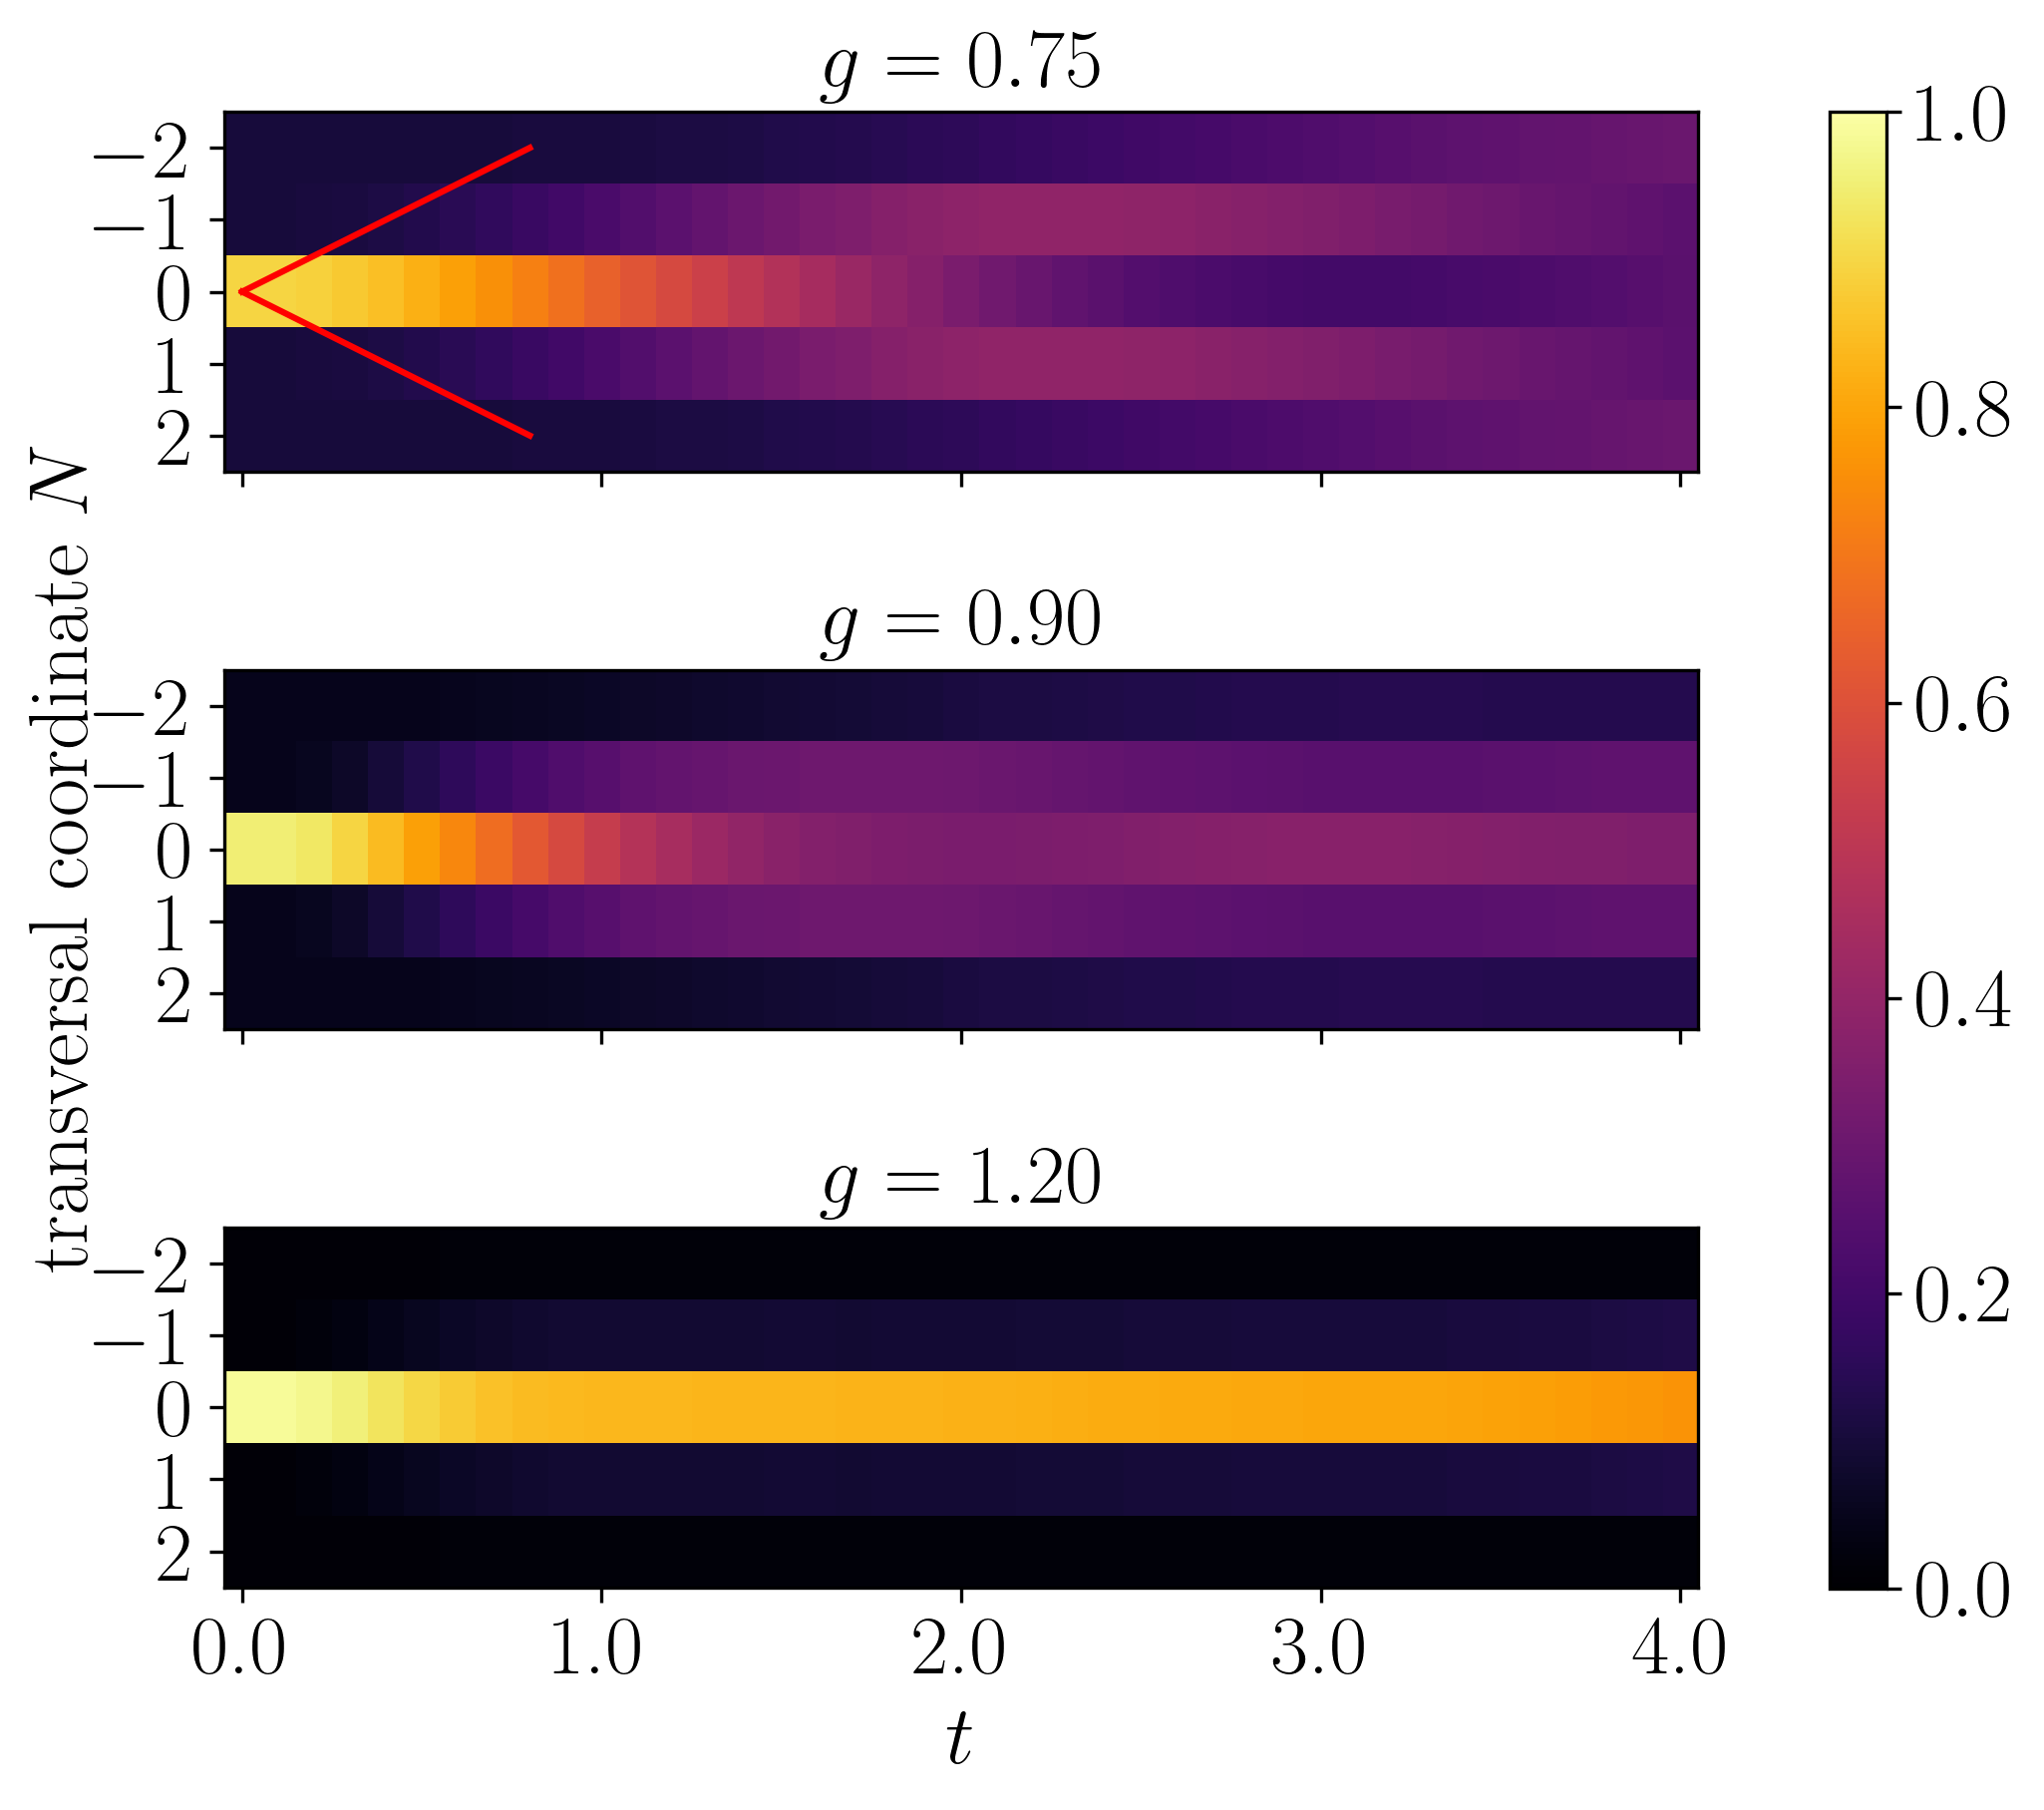

In [505]:
fig, axs = plt.subplots(3,1, figsize=(6.4,6.4), sharex=True)

def velocity(xs,a,N):
    return np.array([a*x if a*x <= N//2 else np.nan for x in xs])
    
coupls = []
of = 0.2
R = 10
steps = 400
delta = 0.01
his = [0.75]
coupls.append(his)
l = 5
chis = [128]

i = 0
for h_i in his:
    h_ev = h_i
    elfs = load_el_field_chis(l,L,R,bc,sector,model,h_i,h_ev,delta,steps,path)
    elf = elfs[-1]
    cut_data = np.asarray([[(1-np.asarray(elf[i][0::2,2*(nx//2)+1])[x])/2 for x in arr] for i in range(int(steps*of)+1)]).T
    
    axs[i].imshow(cut_data, vmin=0, vmax=1, cmap='inferno', aspect=2)

    xs = np.arange((int(steps*of)+1))
    axs[i].set_xticks(ticks=xs[::len(xs)//4], labels=delta*np.arange((int(steps)+1))[::steps//4], fontsize=20)
    axs[i].set_yticks(ticks=[0,1,2,3,4], labels=[f"$-2$",f"$-1$",f"$0$",f"$1$",f"$2$"], fontsize=20)
    axs[i].set_title(f"$g = {h_i:.2f}$", fontsize=20)
    axs[i].plot(xs, velocity(xs,1/4,N=l) + l//2, 'r')
    axs[i].plot(xs, - velocity(xs,1/4,N=l) + l//2, 'r')
    i += 1


steps = 200
delta = 0.02
his = [0.9,1.2]
coupls.append(his)
for h_i in his:
    h_ev = h_i
    elfs = load_el_field_chis(l,L,R,bc,sector,model,h_i,h_ev,delta,steps,path)
    elf = elfs[-1]
    cut_data = np.asarray([[(1-np.asarray(elf[i][0::2,2*(nx//2)+1])[x])/2 for x in arr] for i in range(int(steps*of)+1)]).T

    im = axs[i].imshow(cut_data, vmin=0, vmax=1, cmap='inferno', aspect=2)

    xs = np.arange((int(steps*of)+1))
    axs[i].set_xticks(ticks=xs[::len(xs)//4], labels=delta*np.arange((int(steps)+1))[::steps//4], fontsize=20)
    axs[i].set_yticks(ticks=[0,1,2,3,4], labels=[f"$-2$",f"$-1$",f"$0$",f"$1$",f"$2$"], fontsize=20)
    axs[i].set_title(f"$g = {h_i:.2f}$", fontsize=20)
    i += 1

axs[-1].set_xlabel(r'$t$', fontsize=20)

# fig.tight_layout()

fig.tight_layout(rect=[0, 0, 0.92, 1])  # leave space on the right for the colorbar
fig.text(0, 0.522, r"transversal coordinate $N$", va='center', rotation='vertical', fontsize=20)

# Create a new axis for the colorbar
cbar_ax = fig.add_axes([0.94, 0.143, 0.03, 0.771])  # [left, bottom, width, height]
cbar = fig.colorbar(im, cax=cbar_ax)
cbar.ax.tick_params(labelsize=20)
# cbar.set_label(r'$E_{\mathrm{cut}}$')

fig.savefig(f"{path_figures}/figures/fluxtube/electric_field_cuts_in_time_{l}x{L}_R_{R}_gs_{coupls}.pdf", bbox_inches="tight")

In [408]:
xs = np.arange((int(steps*of)+1))
xs[::len(xs)//5]

array([ 0,  8, 16, 24, 32, 40])

In [494]:
def velocity(xs,a,N):
    return [a*x if a*x < N else N for x in xs]

xs = np.linspace(0.1,2, 100)
velocity(xs,3,N=5)

[0.30000000000000004,
 0.3575757575757576,
 0.41515151515151516,
 0.4727272727272728,
 0.5303030303030303,
 0.5878787878787879,
 0.6454545454545455,
 0.703030303030303,
 0.7606060606060605,
 0.8181818181818181,
 0.8757575757575757,
 0.9333333333333333,
 0.990909090909091,
 1.0484848484848486,
 1.106060606060606,
 1.1636363636363636,
 1.2212121212121212,
 1.2787878787878788,
 1.3363636363636364,
 1.393939393939394,
 1.4515151515151516,
 1.5090909090909093,
 1.5666666666666664,
 1.624242424242424,
 1.6818181818181817,
 1.7393939393939393,
 1.7969696969696969,
 1.8545454545454545,
 1.9121212121212117,
 1.9696969696969693,
 2.027272727272727,
 2.0848484848484845,
 2.142424242424242,
 2.1999999999999997,
 2.2575757575757573,
 2.315151515151515,
 2.3727272727272726,
 2.4303030303030297,
 2.4878787878787874,
 2.545454545454545,
 2.6030303030303026,
 2.66060606060606,
 2.718181818181818,
 2.7757575757575754,
 2.833333333333333,
 2.8909090909090907,
 2.9484848484848483,
 3.006060606060606,
 3.0

## Plottone

[-1, 0, 1, 2]
[-1, 0, 1, 2]
[-1, 0, 1, 2]
[-1, 0, 1, 2]
[-1, 0, 1, 2]
[-1, 0, 1, 2]
[-1, 0, 1, 2]
[-1, 0, 1, 2]
[-1, 0, 1, 2]
[-1, 0, 1, 2]
[-1, 0, 1, 2]
[-1, 0, 1, 2]
[-1, 0, 1, 2]
[-1, 0, 1, 2]
[-1, 0, 1, 2]
[-1, 0, 1, 2]
[-1, 0, 1, 2]
[-1, 0, 1, 2]
[-1, 0, 1, 2]
[-1, 0, 1, 2]
[-1, 0, 1, 2]
[-1, 0, 1, 2]
[-1, 0, 1, 2]
[-1, 0, 1, 2]
[-1, 0, 1, 2]
[-1, 0, 1, 2]
[-1, 0, 1, 2]
[-1, 0, 1, 2]
[-1, 0, 1, 2]
[-1, 0, 1, 2]
[-1, 0, 1, 2]
[-1, 0, 1, 2]
[-1, 0, 1, 2]
[-1, 0, 1, 2]
[-1, 0, 1, 2]
[-1, 0, 1, 2]
[-1, 0, 1, 2]
[-1, 0, 1, 2]
[-1, 0, 1, 2]
[-1, 0, 1, 2]
[-1, 0, 1, 2]
[-1, 0, 1, 2]
[-1, 0, 1, 2]
[-1, 0, 1, 2]
[-1, 0, 1, 2]
[-1, 0, 1, 2]
[-1, 0, 1, 2]
[-1, 0, 1, 2]
[-1, 0, 1, 2]
[-1, 0, 1, 2]
[-1, 0, 1, 2]
[-1, 0, 1, 2]
[-1, 0, 1, 2]
[-1, 0, 1, 2]
[-1, 0, 1, 2]
[-1, 0, 1, 2]
[-1, 0, 1, 2]
[-1, 0, 1, 2]
[-1, 0, 1, 2]
[-1, 0, 1, 2]
[-1, 0, 1, 2]
[-1, 0, 1, 2]
[-1, 0, 1, 2]
[-1, 0, 1, 2]
[-1, 0, 1, 2]
[-1, 0, 1, 2]
[-1, 0, 1, 2]
[-1, 0, 1, 2]
[-1, 0, 1, 2]
[-1, 0, 1, 2]
[-1, 0, 1, 2]
[-1, 0

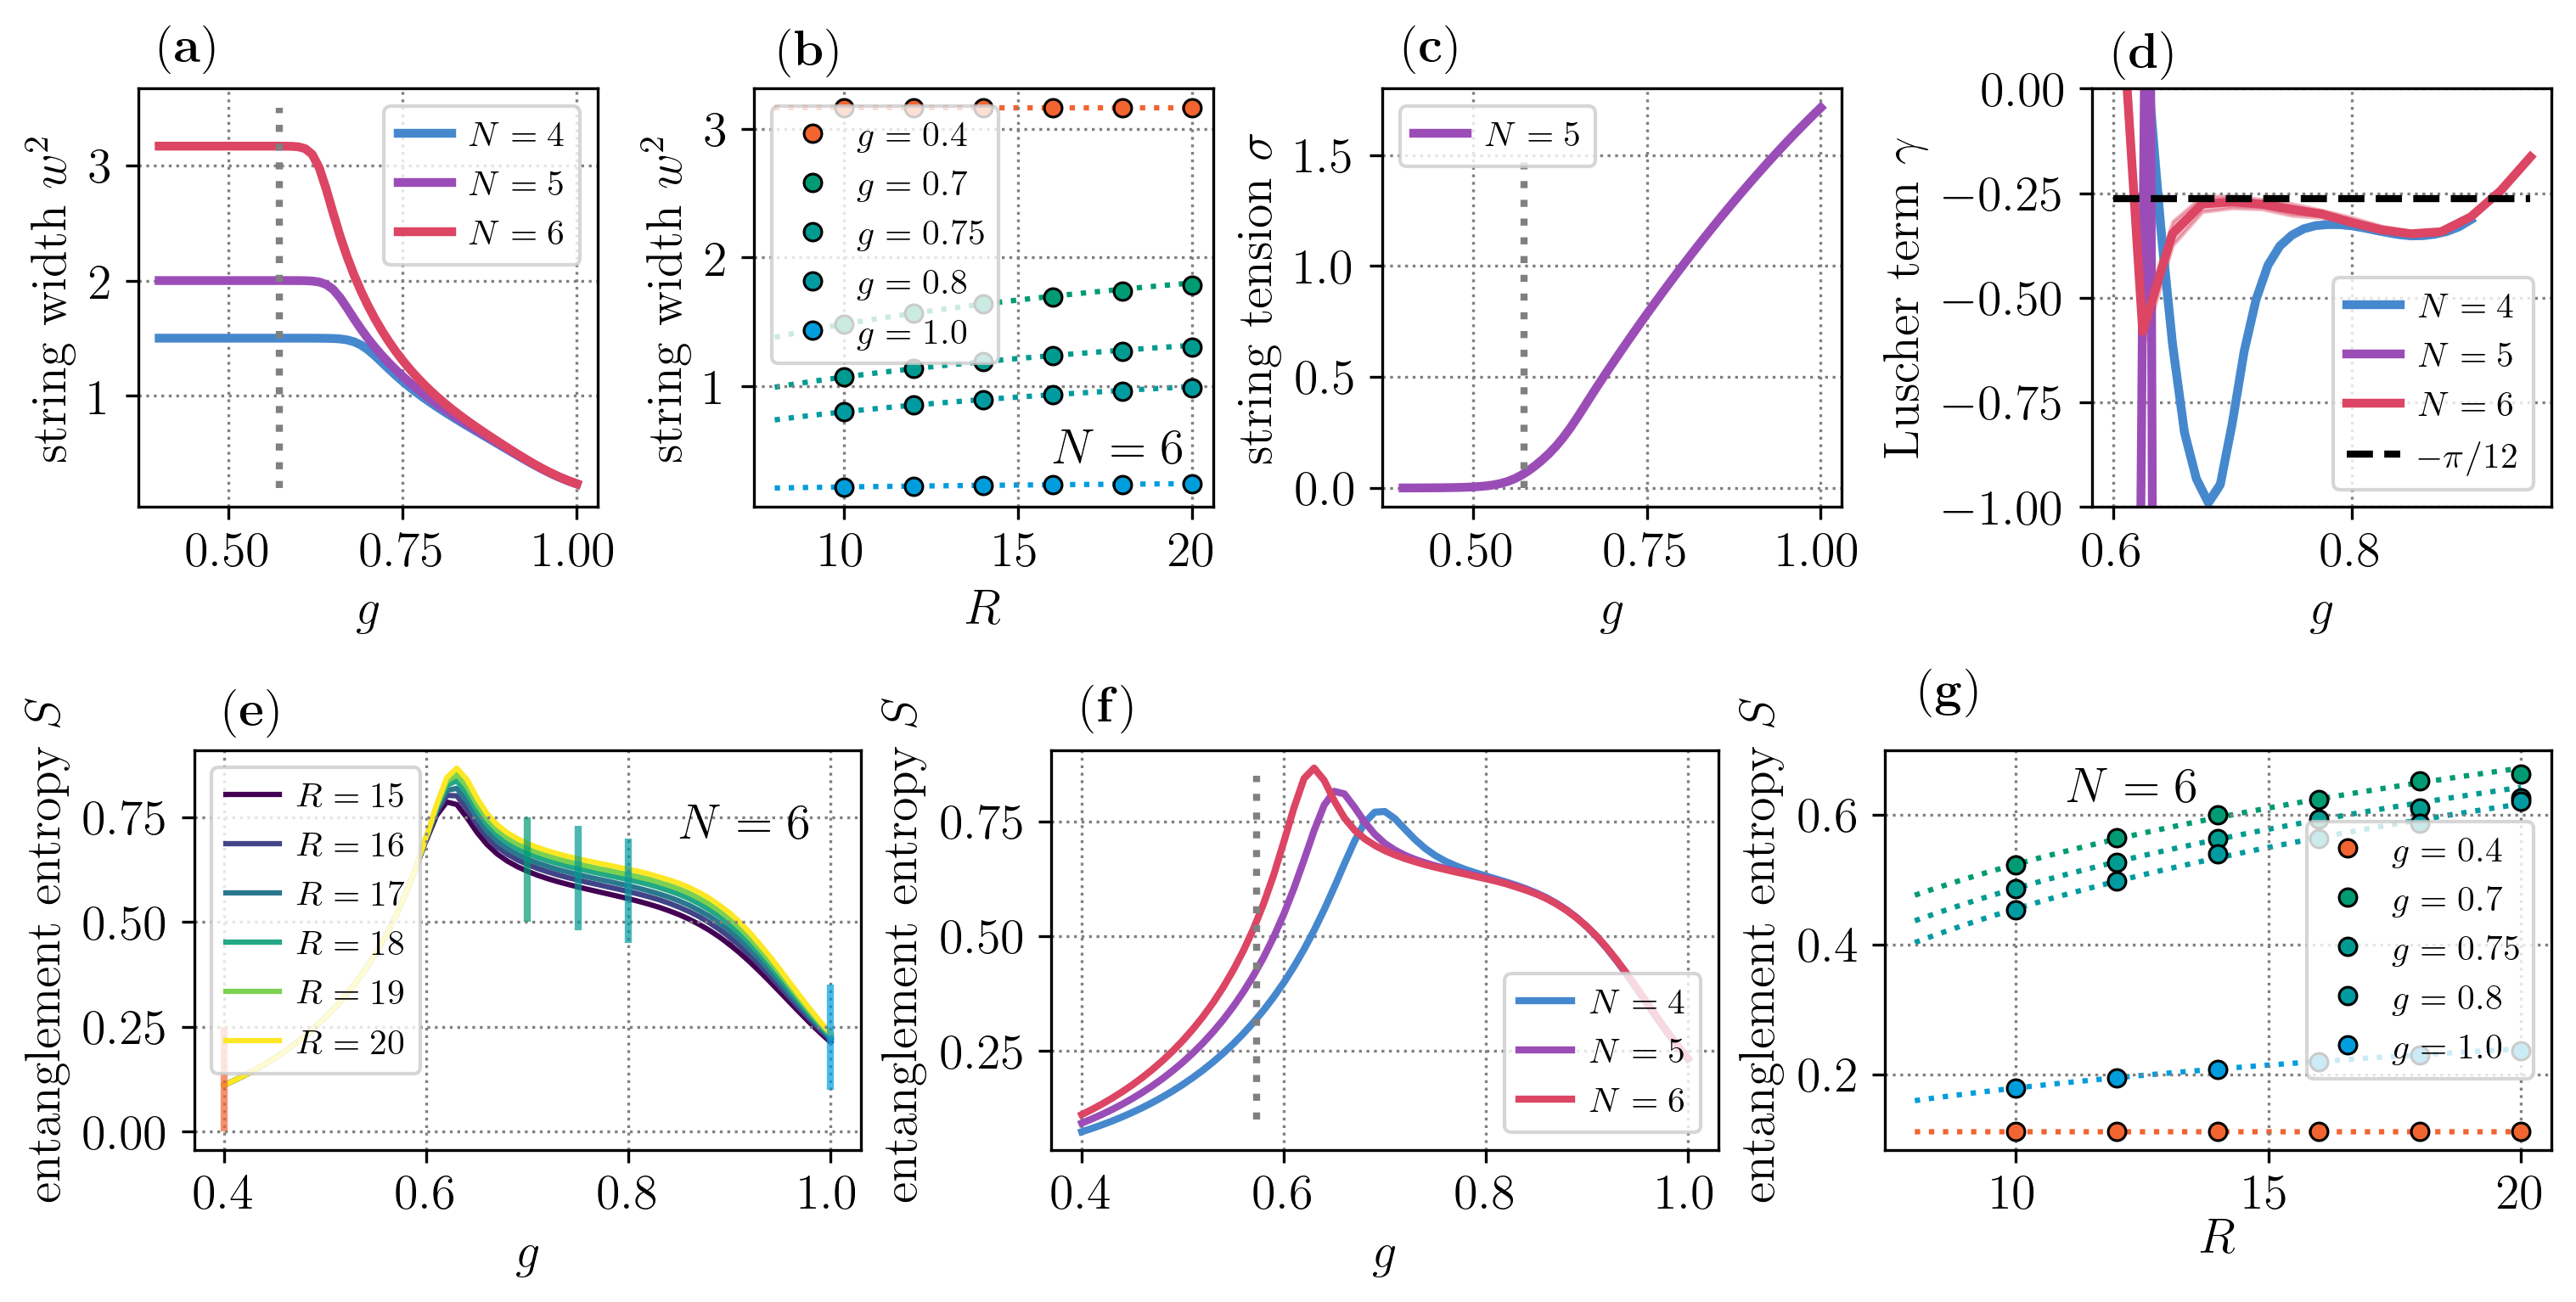

In [616]:
marker_opts = dict(
    marker='o',
    markeredgecolor='k',
    markeredgewidth=0.75,
    markersize=5,
    linestyle='',
)
##################################################################
# A
##################################################################

def string_width_g_plot(ax):
    ax.grid(color="gray", linestyle=":")

    colors = ["#4688CE","#9B4DB7","#DC4563"]
    R_max = [20,20,20]
    h_i, h_f, npoints = 0.4, 1.0, 61
    gs = np.linspace(h_i, h_f, npoints)
    chis = [64,128]

    # String width vs coupling
    i = 0
    for N in [4, 5, 6]:
        Rmax = R_max[i]
        string_width, _ = string_width_varying_g(gs, Rmax, N, L, chis, bc, sector, h_i, h_f, npoints, path, occupation=True)
        print(f"N = {N}, Rmax = {Rmax}")
        ax.plot(gs, string_width, color=colors[i], label=f"$N = {N}$", linewidth=2.5)
        i += 1
    ax.legend()
    ax.set_xlabel("$g$")
    ax.set_ylabel("string width $w^2$")
    theor_gc = 1 / np.sqrt(3.04438)
    ax.vlines(theor_gc, 0.2, 3.5, 'grey', ':', linewidth=2)
    ax.text(0.4, 3.9, "$\\bf{(a)}$")

##################################################################
# B
##################################################################

def string_width_R_plot(ax):
    ax.grid(color="gray", linestyle=":")

    colors = ["#F26430", "#009B72", "#009B90", "#009BA1", "#009DDC"]
    h_i, h_f, npoints = 0.4, 1.0, 61
    chis = [64,128]

    # String width vs separation R
    k = 0
    coupls = [0.4, 0.7, 0.75, 0.8, 1.0]
    Rs = [10,12,14,16,18,20]

    def log_fit(R, a, b):
        return a*np.log(R) + b

    for g in coupls:
        string_width, string_width_err = string_width_varying_R(g, Rs, N, L, chis, bc, sector, h_i, h_f, npoints, path, occupation=True)
        ax.plot(Rs, string_width, color=colors[k], label=f"$g = {g}$", **marker_opts)
        
        plog, clog = curve_fit(log_fit, Rs, string_width, sigma=string_width_err)
        x_fit = np.linspace(8,20)
        ax.plot(x_fit, log_fit(x_fit,*plog), color=colors[k], linestyle=':', zorder=0)
        k += 1

    ax.set_xlabel("$R$")
    ax.set_ylabel("string width $w^2$")
    ax.legend(loc="upper left")
    ax.text(16, 0.4, f"$N = {N}$")
    ax.text(8.1, 3.5, "$\\bf{(b)}$")

##################################################################
# C
##################################################################

def string_tension_g_plot(ax):
    ax.grid(color="gray", linestyle=":")

    colors = ["#4688CE","#9B4DB7","#DC4563"]
    h_i, h_f, npoints = 0.4, 1.0, 61
    gs = np.linspace(h_i, h_f, npoints)
    chis = [64,128]
    Rss = [18,20,22,24]
    N = 5
    # String width vs coupling
    i = 1
    string_tension, string_tension_err = fit_params_sys(Rss, N, L, chis, bc, sector, h_i, h_f, npoints, path, cx=None, cy=None, param=0, fit=1)
    ax.plot(gs, string_tension, color=colors[i], label=f"$N = {N}$", linewidth=2.5)
    ax.fill_between(gs, y1=np.asarray(string_tension) - np.asarray(string_tension_err), y2=np.asarray(string_tension) + np.asarray(string_tension_err), color=colors[i], alpha=0.4)
    ax.legend()
    ax.set_xlabel("$g$")
    ax.set_ylabel("string tension $\\sigma$")
    theor_gc = 1 / np.sqrt(3.04438)
    ax.vlines(theor_gc, 0, 1.5, 'grey', ':', linewidth=2)
    ax.text(0.4, 1.92, "$\\bf{(c)}$")

##################################################################
# D
##################################################################

def luscher_g_plot(ax):
    ax.grid(color="gray", linestyle=":")

    colors = ["#4688CE","#9B4DB7","#DC4563"]
    h_i, h_f, npoints = 0.6, 0.9, 31
    gs = np.linspace(h_i,h_f,npoints)
    chis = [32,64,128,256]
    fit = 1
    # String width vs coupling
    for i, N in enumerate([4,5]):
        if N == 4:
            Rs = [7,8,9,10,11,12,14,16,18,20,22]
        elif N == 5:
            Rs = [7,8,9,10,11,13,15,17,19,21]
        luscher_term, luscher_term_err = fit_params_sys(Rs, N, L, chis, bc, sector, h_i, h_f, npoints, path, cx=None, cy=None, param=1, fit=fit)
        ax.plot(gs, -np.asarray(luscher_term), color=colors[i], label=f"$N = {N}$", linewidth=2.5)
        ax.fill_between(gs, y1=-np.asarray(luscher_term) - np.asarray(luscher_term_err), y2=-np.asarray(luscher_term) + np.asarray(luscher_term_err), color=colors[i], alpha=0.4)
    
    h_i, h_f, npoints = 0.6, 0.95, 15
    gs = np.linspace(h_i,h_f,npoints)
    chis = [32,64,128,256]
    Rs = [7,8,9,10,11,12,13,14,15,16,17,19,21]
    N = 6
    i += 1
    
    luscher_term, luscher_term_err = fit_params_sys(Rs, N, L, chis, bc, sector, h_i, h_f, npoints, path, cx=None, cy=None, param=1, fit=fit)
    ax.plot(gs, -np.asarray(luscher_term), color=colors[i], label=f"$N = {N}$", linewidth=2.5)
    ax.fill_between(gs, y1=-np.asarray(luscher_term) - np.asarray(luscher_term_err), y2=-np.asarray(luscher_term) + np.asarray(luscher_term_err), color=colors[i], alpha=0.4)
    ax.hlines(-np.pi/12, xmin=gs[0], xmax=gs[-1], linewidth=2, linestyle='--', color='k', label="$-\\pi/12$")

    ax.legend()
    ax.set_xlabel("$g$")
    ax.set_ylabel("Luscher term $\\gamma$")
    ax.set_ylim((-1,0))
    ax.text(0.6, 0.05, "$\\bf{(d)}$")

##################################################################
# E
##################################################################

def ee_g_plot(ax):

    N = 6
    ax.grid(color="gray", linestyle=":")
    chi = 128
    npoints, h_i, h_f = 31, 0.6, 0.9 
    gs = np.linspace(h_i,h_f,npoints)
    Rs = [15,16,17,18,19,20]
    colors = create_sequential_colors(len(Rs))
    for i, R in enumerate(Rs):
        s_pbc = entropy(R,N,L,chi,bc,sector,h_i,h_f,npoints,path)
        ax.plot(gs,s_pbc, color=colors[i], linewidth=1.5, linestyle='-', label=f"$R={R}$", zorder=0)

    npoints, h_i, h_f = 21, 0.4, 0.6 
    gs = np.linspace(h_i,h_f,npoints)
    for i, R in enumerate(Rs):
        s_pbc = entropy(R,N,L,chi,bc,sector,h_i,h_f,npoints,path)
        ax.plot(gs,s_pbc, color=colors[i], linewidth=1.5, linestyle='-', zorder=0)

    npoints, h_i, h_f = 11, 0.9, 1.0 
    gs = np.linspace(h_i,h_f,npoints)
    for i, R in enumerate(Rs):
        s_pbc = entropy(R,N,L,chi,bc,sector,h_i,h_f,npoints,path)
        ax.plot(gs,s_pbc, color=colors[i], linewidth=1.5, linestyle='-', zorder=0)

    colors = ["#F26430", "#009B72", "#009B90", "#009BA1", "#009DDC"]
    ranges = [(0.00,0.25),(0.50,0.75),(0.48,0.73),(0.45,0.70),(0.10,0.35)]
    for i in range(len(coupls)):
        ax.vlines(coupls[i], ranges[i][0], ranges[i][1], linestyle='-', color=colors[i], alpha=0.7, linewidth=2)

    # Add the legend to the main plot instead
    ax.set_xlabel(r"$g$")
    ax.set_ylabel("entanglement entropy $S$")
    ax.text(0.85, 0.7, f"$N = {N}$")
    ax.legend(loc='upper left')
    ax.text(0.4, 0.97, "$\\bf{(e)}$")

##################################################################
# F
##################################################################

def ee_g_N_plot(ax):
    ax.grid(color="gray", linestyle=":")
    colors = ["#4688CE","#9B4DB7","#DC4563"]

    # String width vs coupling
    i = 0
    for N in [4, 5, 6]:
        Rmax = R_max[i]
        if N == 6:
            h_i,h_f,npoints=0.4,0.6,21
            s_pbc1 = entropy(R,N,L,chi,bc,sector,h_i,h_f,npoints,path)

            h_i,h_f,npoints=0.6,0.9,31
            s_pbc2 = entropy(R,N,L,chi,bc,sector,h_i,h_f,npoints,path)

            h_i,h_f,npoints=0.9,1.0,11
            s_pbc3 = entropy(R,N,L,chi,bc,sector,h_i,h_f,npoints,path)

            gs = np.linspace(0.4,0.6,21).tolist() + np.linspace(0.6,0.9,31)[1:].tolist() + np.linspace(0.9,1.0,11)[1:].tolist()
            s_pbc = s_pbc1 + s_pbc2[1:] + s_pbc3[1:]
        else:
            h_i, h_f, npoints = 0.4, 1.0, 61
            gs = np.linspace(h_i,h_f,npoints)
            s_pbc = entropy(R,N,L,chi,bc,sector,h_i,h_f,npoints,path)
        print(f"N = {N}, Rmax = {Rmax}")
        # axs[0].plot(gs,s_pbc, color=colors[i], linewidth=2, markersize=5, linestyle='-', label=f"$N: {N}, \chi: {chi}$")
        ax.plot(gs, s_pbc, color=colors[i], label=f"$N = {N}$", linewidth=2)
        i += 1
    ax.legend(loc="lower right")
    ax.set_xlabel("$g$")
    ax.set_ylabel("entanglement entropy $S$")
    ax.vlines(theor_gc, 0.1, 0.85, 'grey', ':', linewidth=2)
    ax.text(0.4, 0.97, "$\\bf{(f)}$")

##################################################################
# G
##################################################################

def ee_R_plot(ax):
    ax.grid(color="gray", linestyle=":")
    colors = ["#F26430", "#009B72", "#009B90", "#009BA1", "#009DDC"]

    # String width vs separation R
    k = 0
    coupls = [0.4, 0.7, 0.75, 0.8, 1.0]
    idxs = [0, 10, 15, 20, 10]
    his = [0.4,0.6,0.6,0.6,0.9]
    hfs = [0.6,0.9,0.9,0.9,1.0]
    npointss = [21,31,31,31,11]
    Rs = [10,12,14,16,18,20]

    def log_fit(R, a, b):
        return a*np.log(R) + b

    for g, h_i, h_f, npoints, idx in zip(coupls, his, hfs, npointss, idxs):

        entrs_g_max = [entropy(R,N,L,chis[1],bc,sector,h_i,h_f,npoints,path)[idx] for R in Rs]
        entrs_g_min = [entropy(R,N,L,chis[0],bc,sector,h_i,h_f,npoints,path)[idx] for R in Rs]
        entrs_g = entrs_g_max.copy()
        entrs_g_err = [np.abs(entrs_g_max[i] - entrs_g_min[i]) for i in range(len(Rs))]
        ax.plot(Rs, entrs_g, color=colors[k], label=f"$g = {g}$", **marker_opts)
        
        plog, clog = curve_fit(log_fit, Rs, entrs_g, sigma=entrs_g_err)
        x_fit = np.linspace(8,20)
        ax.plot(x_fit, log_fit(x_fit,*plog), color=colors[k], linestyle=':', zorder=0)
        k += 1

    ax.set_xlabel(r"$R$", labelpad=0)
    ax.set_ylabel("entanglement entropy $S$")
    ax.text(11, 0.62, f"$N = {N}$")
    ax.legend()
    ax.text(8.1, 0.77, "$\\bf{(g)}$")

import matplotlib.pyplot as plt
import numpy as np


np.random.seed(19680808)
# gridspec inside gridspec
fig = plt.figure(layout="constrained", figsize=(10, 5), facecolor=None)
subfigs = fig.subfigures(2, 1)

axsUp = subfigs[0].subplots(1, 4)
# subfigs[0].set_facecolor('0.75')
for i, ax in enumerate(axsUp):

    if i == 0:
        string_width_g_plot(ax)
    elif i == 1:
        string_width_R_plot(ax)
    elif i == 2:
        string_tension_g_plot(ax)
    else:
       luscher_g_plot(ax)

axsDown = subfigs[1].subplots(1,3)
for i, ax in enumerate(axsDown):
    if i == 0:
        ee_g_plot(ax)
    elif i == 1:
        ee_g_N_plot(ax)
    elif i == 2:
        ee_R_plot(ax)

# fig.tight_layout()
fig.savefig(f"{path_figures}/figures/fluxtube/roughening_region_results.pdf", bbox_inches='tight', format='pdf')

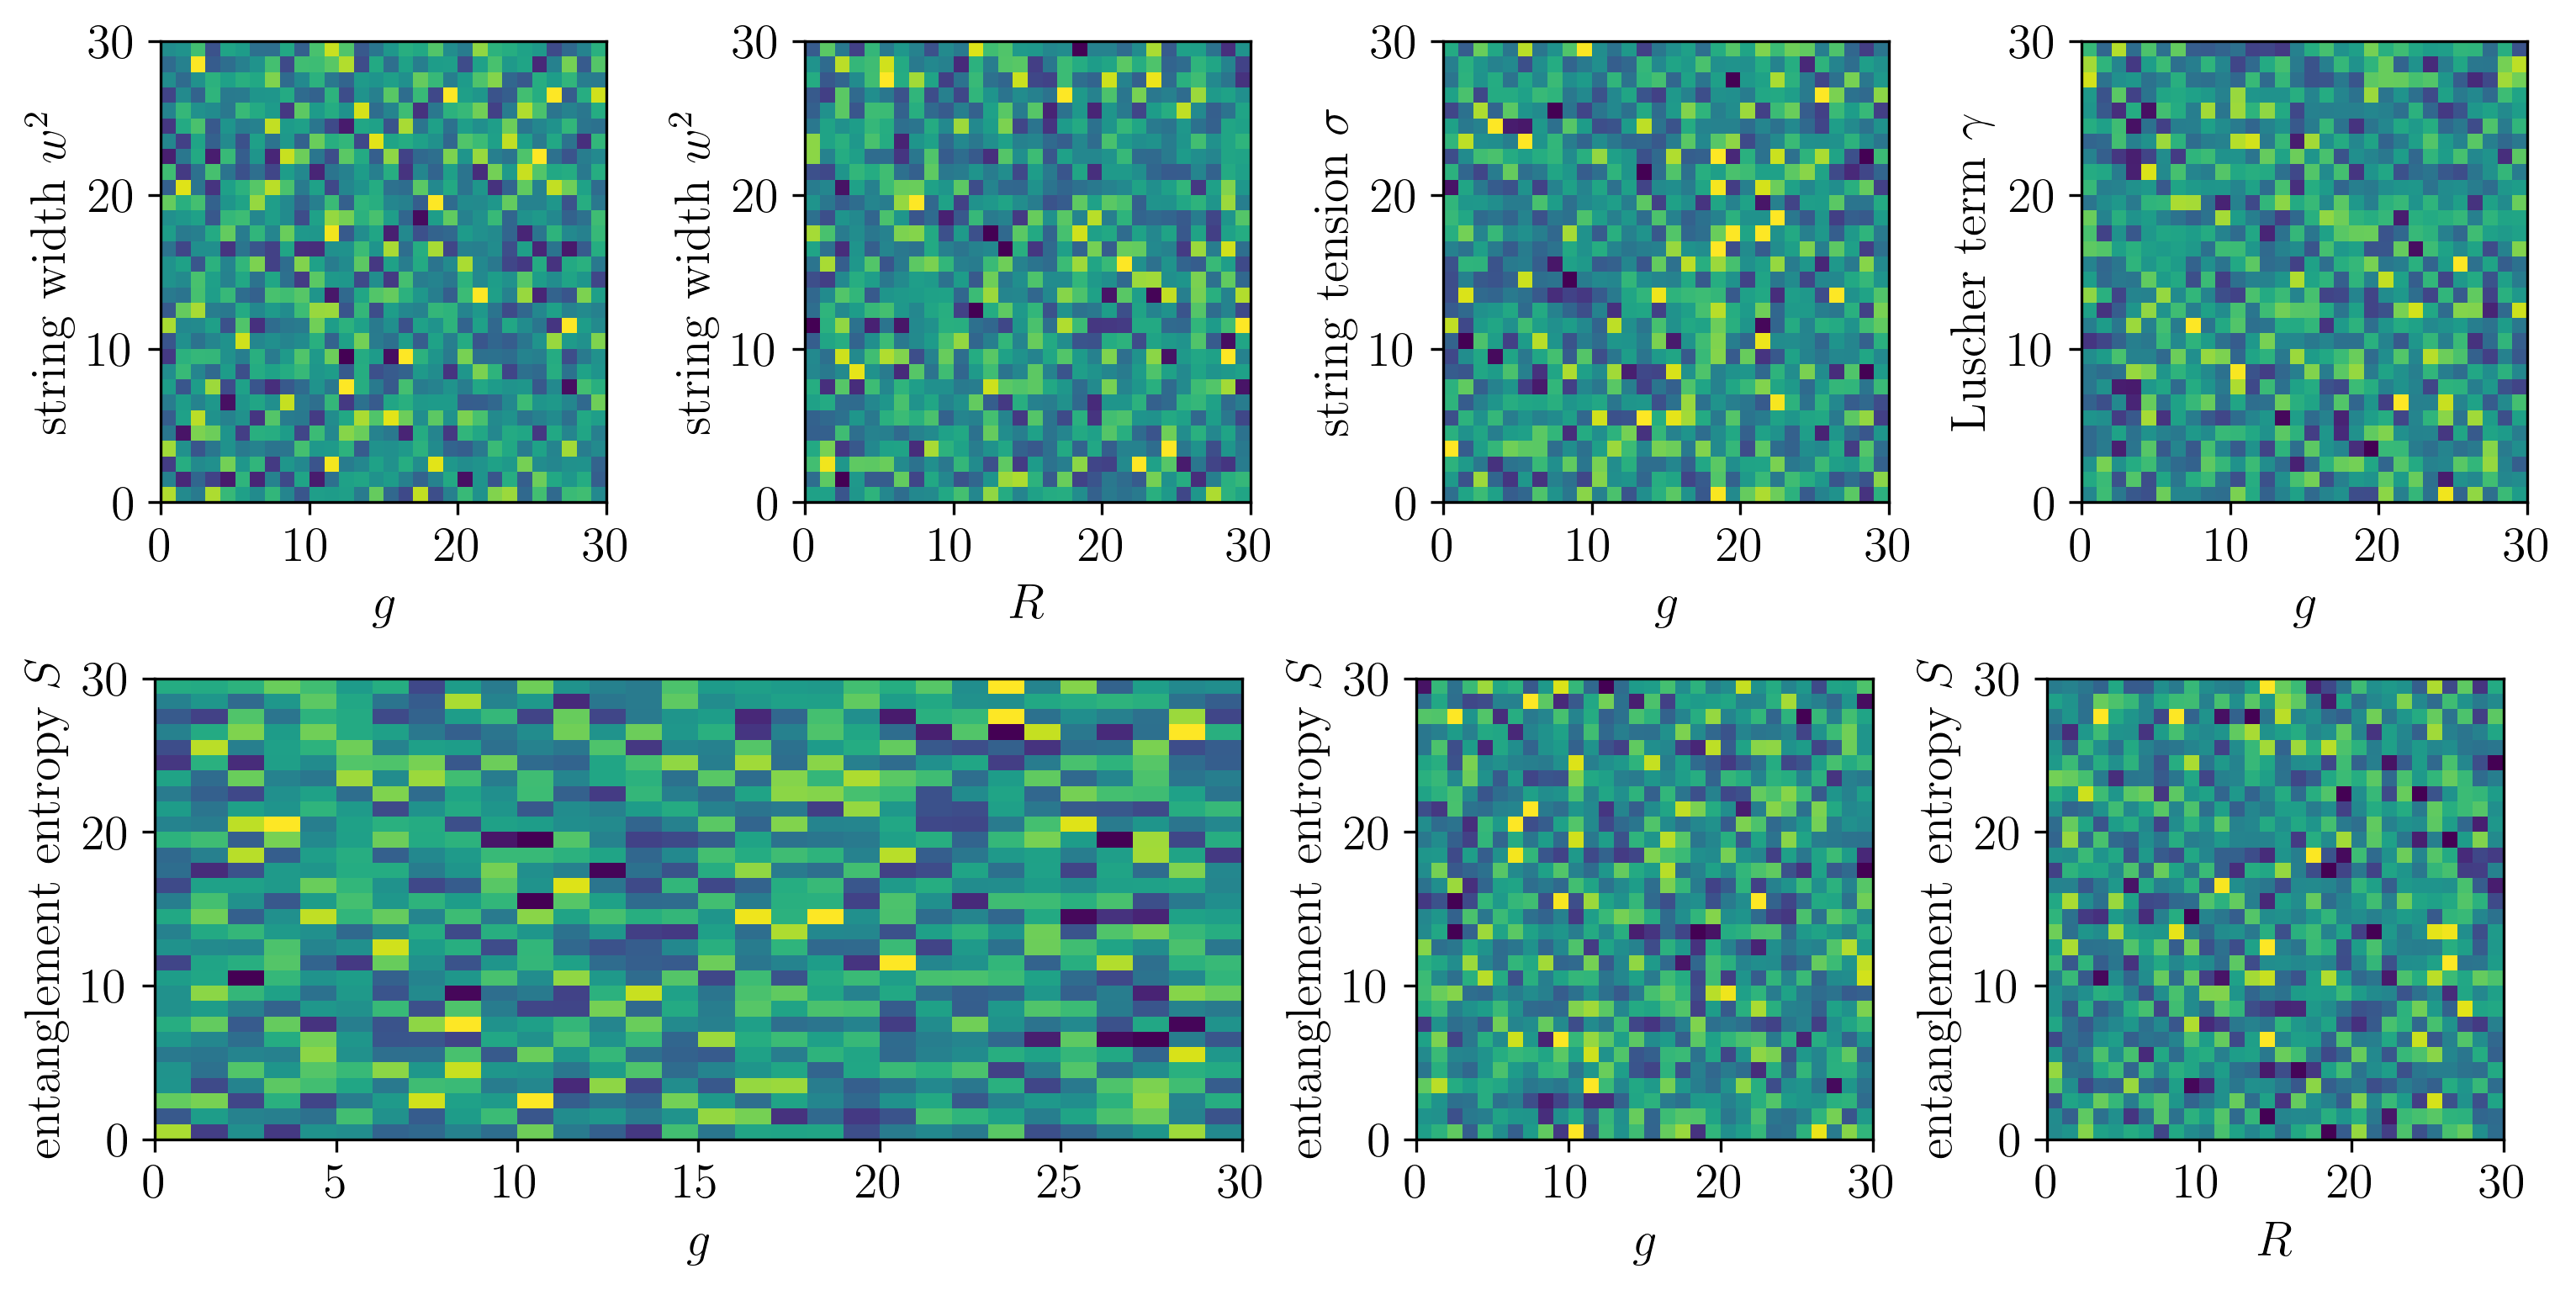

In [557]:
import matplotlib.pyplot as plt
import numpy as np

def example_plot(ax):
    pc = ax.pcolormesh(np.random.randn(30, 30), vmin=-2.5, vmax=2.5)
    return pc

np.random.seed(19680808)

fig = plt.figure(layout="constrained", figsize=(10, 5))

# Split the figure into two subfigures (top and bottom)
subfigs = fig.subfigures(2, 1, height_ratios=[1, 1])

# --- Top row with 4 subplots and spacing ---
axsUp = subfigs[0].subplots(1, 4, gridspec_kw={'wspace': 0.1})  # Correct spacing here
for i, ax in enumerate(axsUp):
    pc = example_plot(ax)
    ax.set_xlabel(r'$R$' if i == 1 else r'$g$')
    if i < 2:
        ax.set_ylabel('string width $w^2$')
    elif i == 2:
        ax.set_ylabel('string tension $\\sigma$')
    else:
        ax.set_ylabel('Luscher term $\\gamma$')

# --- Bottom row with 3 subplots: 1 + (1+1) ---
subfigsnest = subfigs[1].subfigures(1, 2, wspace=0)  # No wspace here

# Left subplot
axsDownLeft = subfigsnest[0].subplots(1)
example_plot(axsDownLeft)
axsDownLeft.set_xlabel(r'$g$')
axsDownLeft.set_ylabel('entanglement entropy $S$')

fig_kw={'figsize':(5,2.5)}

# Right two subplots with spacing
axsDownRight = subfigsnest[1].subplots(1, 2, gridspec_kw={'wspace': 0.0, 'hspace':2})  # Correct spacing here
for nn, ax in enumerate(axsDownRight):
    example_plot(ax)
    ax.set_xlabel(r'$g$' if nn == 0 else r'$R$')
    ax.set_ylabel('entanglement entropy $S$')

plt.show()
